# Credit Risk Analysis

## Problem Statement

We are supposed to analyse the dataset given and provide insights from it about loan defaulters i.e. the factors causing loan default. This analysis is being done to analyse the risk associated with loan lending to the customers in future.

We will implement Exploratory Data Analysis(EDA) on the dataset to gain knowledge and give appropriate insights for better business in the future.

#### Step-1: 
- Importing Necessary modules
- Loading the datasets
- Reading datasets and gain an overview on it

In [1]:
#importing libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Filter out warnings to ignore them
warnings.filterwarnings('ignore')

In [2]:
#Load the datasets
#Display the first 5 rows to get a preview of the data structure
#we first load the 'previous_application' file with name'prev'
prev=pd.read_csv('previous_application.csv')
prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [3]:
prev.shape

(1670214, 37)

In [4]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Here we can observe that the 'previous_application.csv' or prev dataset contains 1670214 rows and 37 columns (1670214, 37)

In [6]:
#we then load 'application_data' with name 'current'
current=pd.read_csv('application_data.csv')
current.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [7]:
current.shape

(307511, 122)

In [8]:
current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
current.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Here we can observe that the 'application_data.csv' or current dataset contains 307511 rows and 122 columns (307511, 122)

#### Step-2:
- Merge the two datasets 'prev' and 'current' for better analysis.
- Observe the merged dataset

In [10]:
# Merge 'prev' DataFrame with 'current' DataFrame based on 'SK_ID_CURR'
# Using 'inner' join to retain only common rows between the two DataFrames
merged = current.merge(prev, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [11]:
#displaying first 5 rows of the merged column
merged.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 158 columns]

In [12]:
#Know the number of rows and columns from the merged column
merged.shape 

(1413701, 158)

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [14]:
# Count the occurrences of each unique value in the 'SK_ID_CURR' column of the DataFrame 'prev'
prev['SK_ID_CURR'].value_counts().head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

We can conclude that the merged data has dimention (1413701, 158), which is too big to start the analysis with

#### Step-3: 
- Clean the 'merged' dataset by eliminating the columns having more than 50% null values
- Drop the duplicating rows
- Observe the merged dataset after cleaning

In [15]:
#To know how many null values are present in the merged data
merged.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE_x              0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 158, dtype: int64

In [16]:
#calculating null value percentage 
(merged.isnull().sum()/len(prev))*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               33.594857
DAYS_LAST_DUE_1ST_VERSION    33.594857
DAYS_LAST_DUE                33.594857
DAYS_TERMINATION             33.594857
NFLAG_INSURED_ON_APPROVAL    33.594857
Length: 158, dtype: float64

In [17]:
#removing those columns from the merged dataset which has more than 50% null values
missing_percentage=(merged.isnull().sum()/len(merged))*100
merged_cleaned=merged.loc[:,missing_percentage<50]

In [18]:
#To know the number of rows and columns from the cleaned dataset
merged_cleaned.shape

(1413701, 120)

In [19]:
merged_cleaned.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=120)

In [20]:
merged_cleaned.head(60)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0       100002       1           Cash loans           M            N   
1       100003       0           Cash loans           F            N   
2       100003       0           Cash loans           F            N   
3       100003       0           Cash loans           F            N   
4       100004       0      Revolving loans           M            Y   
5       100006       0           Cash loans           F            N   
6       100006       0           Cash loans           F            N   
7       100006       0           Cash loans           F            N   
8       100006       0           Cash loans           F            N   
9       100006       0           Cash loans           F            N   
10      100006       0           Cash loans           F            N   
11      100006       0           Cash loans           F            N   
12      100006       0           Cash loans           F            N   
13      100006       0           Cash loans           F            N   
14      100007       0           Cash loans           M            N   
15      100007       0           Cash loans           M            N   
16      100007       0           Cash loans           M            N   
17      100007       0           Cash loans           M            N   
18      100007       0           Cash loans           M            N   
19      100007       0           Cash loans           M            N   
20      100008       0           Cash loans           M            N   
21      100008       0           Cash loans           M            N   
22      100008       0           Cash loans           M            N   
23      100008       0           Cash loans           M            N   
24      100008       0           Cash loans           M            N   
25      100009       0           Cash loans           F            Y   
26      100009       0           Cash loans           F            Y   
27      100009       0           Cash loans           F            Y   
28      100009       0           Cash loans           F            Y   
29      100009       0           Cash loans           F            Y   
30      100009       0           Cash loans           F            Y   
31      100009       0           Cash loans           F            Y   
32      100010       0           Cash loans           M            Y   
33      100011       0           Cash loans           F            N   
34      100011       0           Cash loans           F            N   
35      100011       0           Cash loans           F            N   
36      100011       0           Cash loans           F            N   
37      100012       0      Revolving loans           M            N   
38      100012       0      Revolving loans           M            N   
39      100012       0      Revolving loans           M            N   
40      100012       0      Revolving loans           M            N   
41      100014       0           Cash loans           F            N   
42      100014       0           Cash loans           F            N   
43      100015       0           Cash loans           F            N   
44      100016       0           Cash loans           F            N   
45      100016       0           Cash loans           F            N   
46      100016       0           Cash loans           F            N   
47      100016       0           Cash loans           F            N   
48      100017       0           Cash loans           M            Y   
49      100017       0           Cash loans           M            Y   
50      100018       0           Cash loans           F            N   
51      100018       0           Cash loans           F            N   
52      100018       0           Cash loans           F            N   
53      100018       0           Cash loans           F            N   
54      100019       0           Cash loans 

In [21]:
#removing those columns from the dataset where we have duplicate rows
merged_cleaned = merged_cleaned.drop_duplicates()

In [22]:
merged_cleaned.shape

(1413701, 120)

In [23]:
#observing column 'DAYS_BIRTH' from the cleaned dataset
merged_cleaned['DAYS_BIRTH'].head(10)

0    -9461
1   -16765
2   -16765
3   -16765
4   -19046
5   -19005
6   -19005
7   -19005
8   -19005
9   -19005
Name: DAYS_BIRTH, dtype: int64

According to the description of the data 'DAYS_BIRTH' shoes Client's age in days at the time of application. Here it is a negative value which is confusing, for clarity and ease of understanding, we are converting these values into years. -round() function to transform the negative values into positive ones.

In [24]:
# Convert the values in the 'DAYS_BIRTH' column from days to years and display the first few rows
merged_cleaned['DAYS_BIRTH'] = -round(merged_cleaned['DAYS_BIRTH'] / 365, 0)
merged_cleaned['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    46.0
3    46.0
4    52.0
Name: DAYS_BIRTH, dtype: float64

In [19]:
#same is done for 'DAYS_REGISTRATION' ,'DAYS_TERMINATION','DAYS_FIRST_DRAWING', 'DAYS_ID_PUBLISH' column

In [25]:
# Convert the values in the 'DAYS_REGISTRATION' column from days to years and display the first few rows
merged_cleaned['DAYS_REGISTRATION'] = -round(merged_cleaned['DAYS_REGISTRATION'] / 365, 0)
merged_cleaned['DAYS_REGISTRATION'].head()

0    10.0
1     3.0
2     3.0
3     3.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [26]:
# Convert the values in the 'DAYS_FIRST_DRAWING' column from days to years and display the first few rows
merged_cleaned['DAYS_FIRST_DRAWING'] = round(merged_cleaned['DAYS_FIRST_DRAWING'] / 365, 0)
merged_cleaned['DAYS_FIRST_DRAWING'].head()

0    1001.0
1    1001.0
2    1001.0
3    1001.0
4    1001.0
Name: DAYS_FIRST_DRAWING, dtype: float64

In [27]:
# Convert the values in the 'DAYS_TERMINATION' column from days to years and display the first few rows
merged_cleaned['DAYS_TERMINATION'] = -round(merged_cleaned['DAYS_TERMINATION'] / 365, 0)
merged_cleaned['DAYS_TERMINATION'].head()

0    0.0
1    1.0
2    2.0
3    5.0
4    2.0
Name: DAYS_TERMINATION, dtype: float64

In [28]:
# Convert the values in the 'DAYS_ID_PUBLISH' column from days to years and display the first few rows
merged_cleaned['DAYS_ID_PUBLISH'] = -round(merged_cleaned['DAYS_ID_PUBLISH'] / 365, 0)
merged_cleaned['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    1.0
3    1.0
4    7.0
Name: DAYS_ID_PUBLISH, dtype: float64

#### Task-4: 
- Calculating data imbalance from 'merged_cleaned' on Target

In [29]:
#Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
# Calculate the ratio of records with 'TARGET' value equal to 0 to records with 'TARGET' value equal to 1
(merged_cleaned['TARGET'] == 0).sum() / (merged_cleaned['TARGET'] == 1).sum()

10.553620464203988

In [23]:
#we observe that there is data imbalance in the dataset

#### Task-5:
- Performing EDA on various types of data

#### Task-5.1 : Analysing Categorical data

In [30]:
#due to data imbalance we create two subsets, one where TARGET=0 and another where TARGET=1
#Target variable:
#1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
#0 - all other cases

# Create a subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 0
target_0 = merged_cleaned.loc[merged_cleaned['TARGET'] == 0]

# Create a subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 1
target_1 = merged_cleaned.loc[merged_cleaned['TARGET'] == 1]

In [31]:
#Viewing all the columns with Object datatype 
merged_cleaned.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_y',
       'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_y', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [26]:
#selected columns from the object datatype

#'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY''NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
#'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE','EMERGENCYSTATE_MODE'

In [32]:
#creating new dataset named 'merged_cleaned_categorical' which contains all the columns with categorical data
merged_cleaned_categorical=merged_cleaned[['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE']]

#### Task-5.1.1 : Univariate analysis of the categorical columns

we need to plot three different types of visualisation for univariate analysis of each selected categorical column:
- pie plot
- count plot
- bar plot

In [33]:
#parameters: 'dataset' - entire dataset , 'column' - column for which visualisation is needed
#target_0 - subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 0 
#target_1 - subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 1
def plot(dataset,target_0,target_1, column):
    fig = plt.figure(figsize=(13,10))
    
    #Create a subplot for the pie chart
    plt.subplot(221)
    dataset[column].value_counts().plot.pie(autopct="%1.0f%%")
    plt.title(f'Plotting data for {column}')

    # Create a subplot for the countplot
    plt.subplot(222)
    sns.countplot(x=column, hue='TARGET', data=dataset)
    plt.xticks(rotation=45)
    plt.title(f'Plotting data for target')

    # Create a subplot for the bar plot
    x=plt.subplot(223)
    #for percentage distribution of the dataset
    sub_data=pd.DataFrame({'Target=0':((target_0[column].value_counts())/len(target_0))*100,'Target=1':((target_1[column].value_counts())/len(target_1))*100})
    sub_data.plot.barh(ax=x)
    plt.title(f'Plotting data for target in percentage')
    
    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()

Plotting column NAME_CONTRACT_TYPE_x


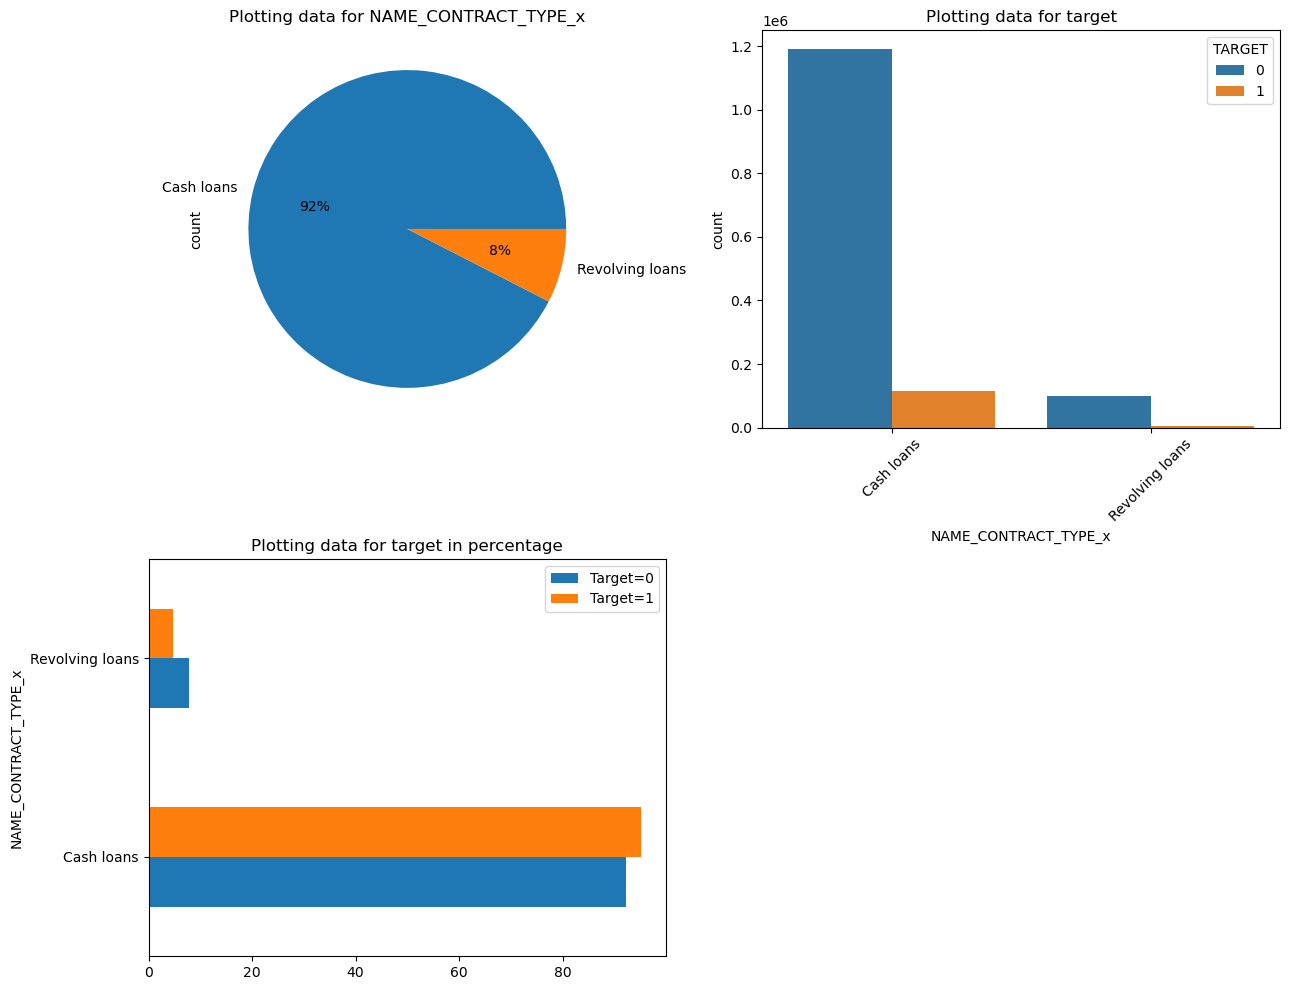



Plotting column CODE_GENDER


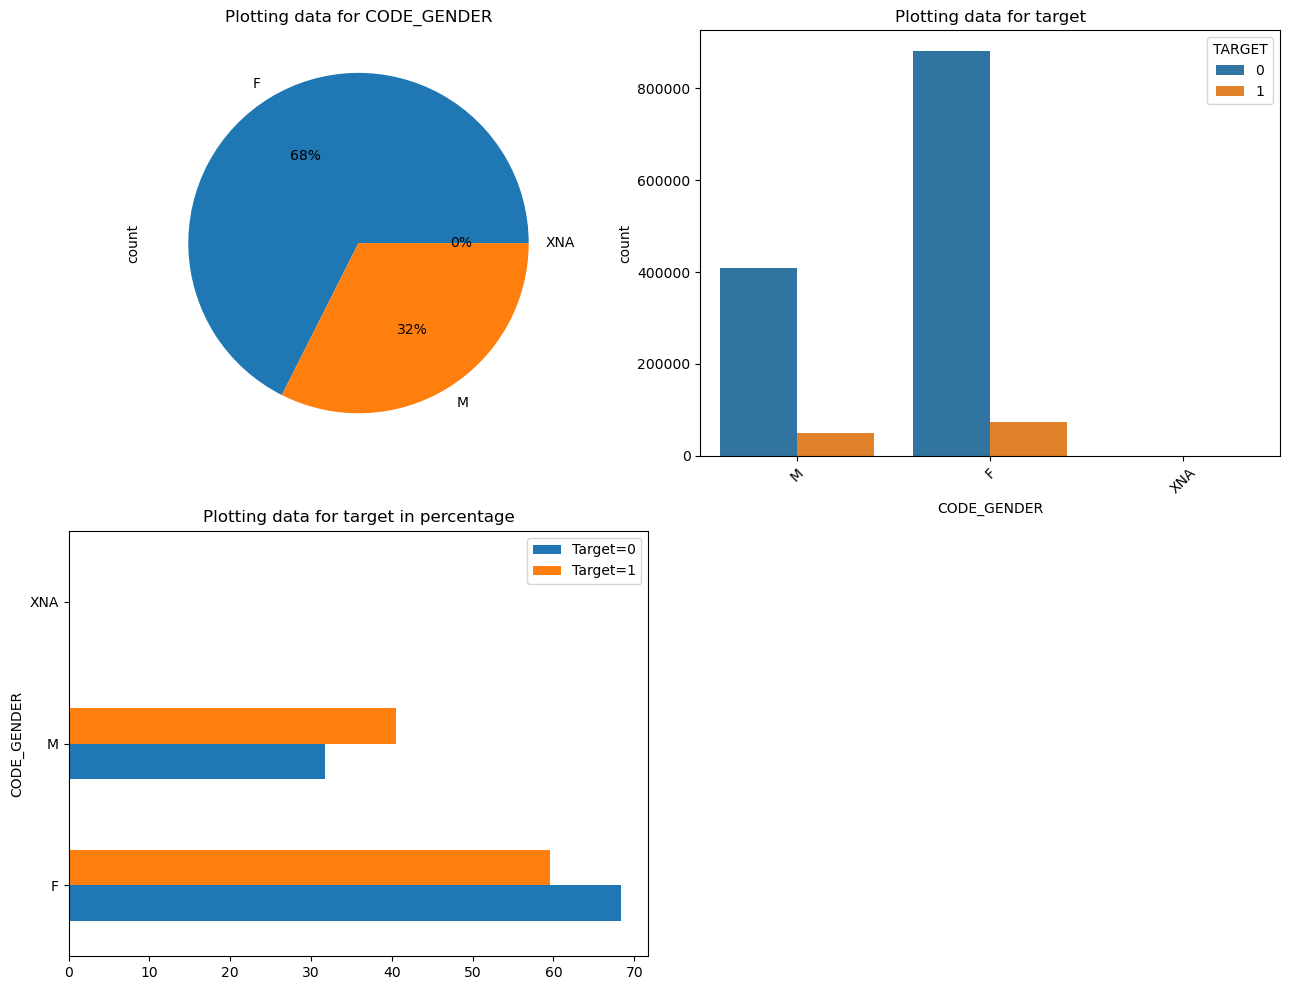



Plotting column FLAG_OWN_CAR


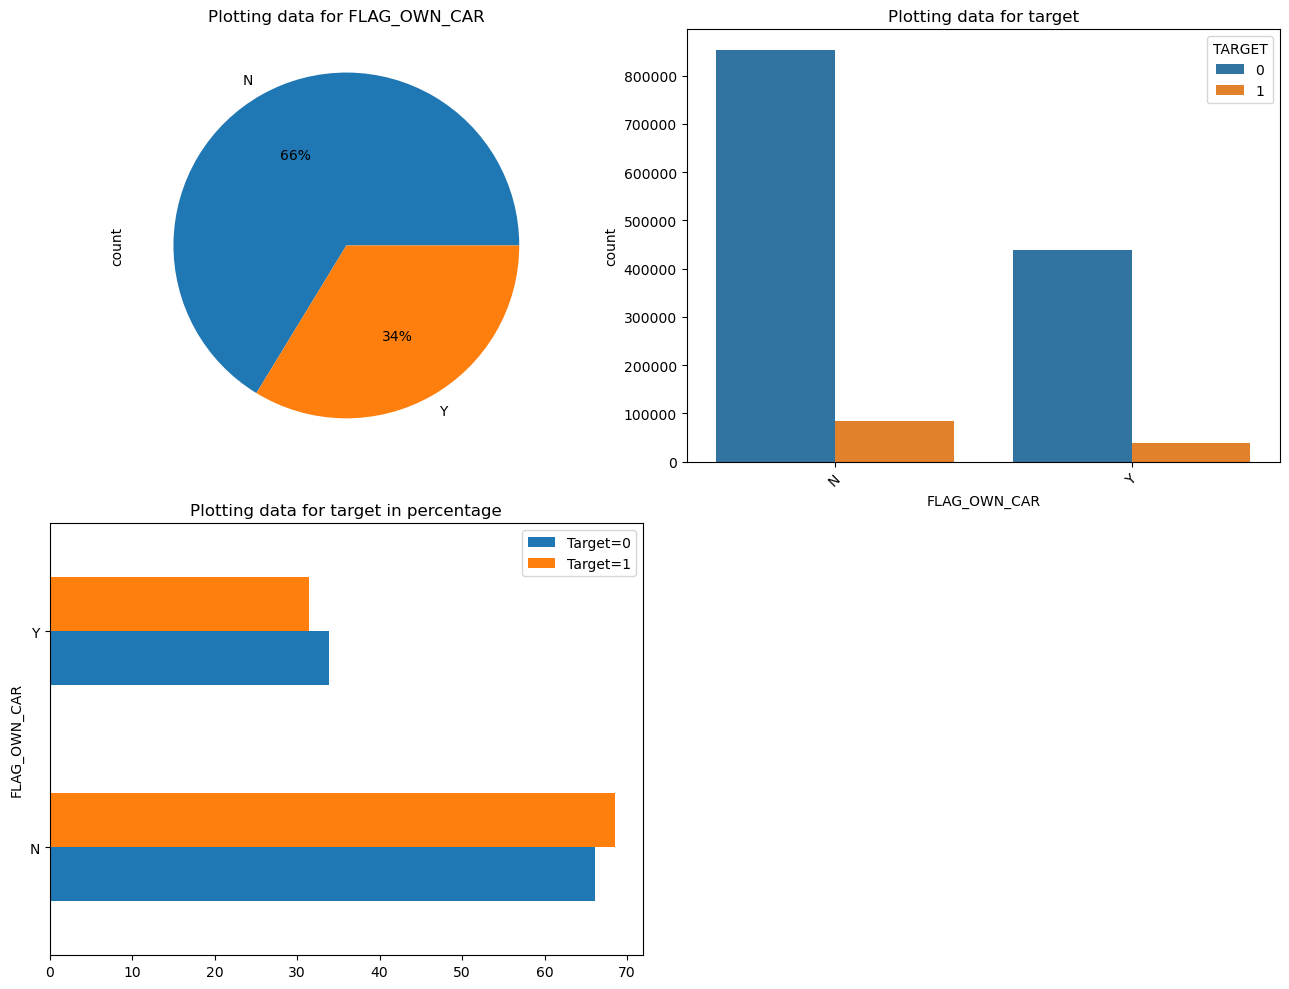



Plotting column FLAG_OWN_REALTY


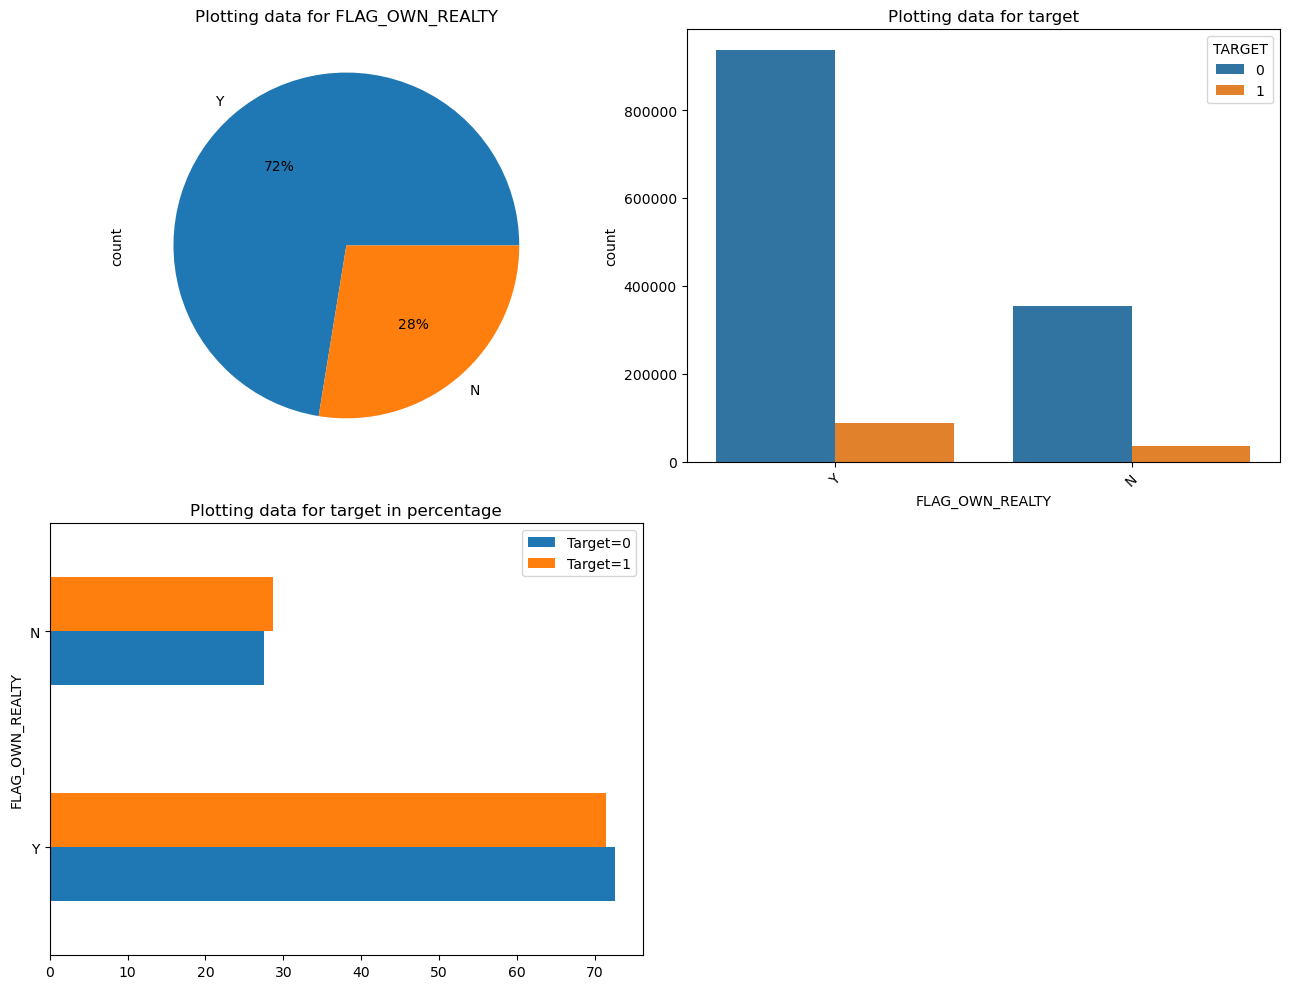



Plotting column NAME_TYPE_SUITE_x


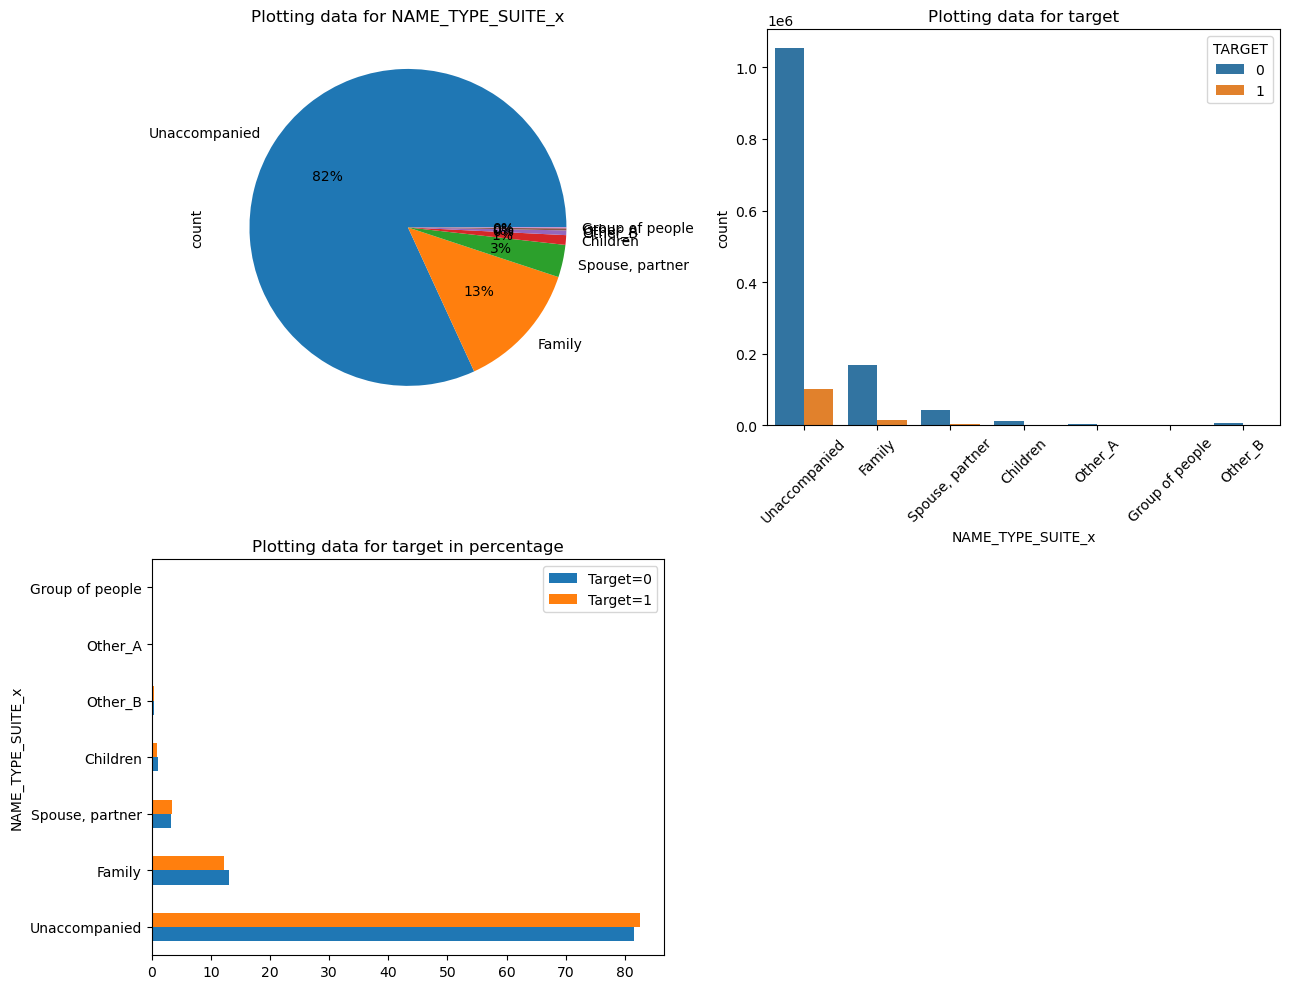



Plotting column NAME_INCOME_TYPE


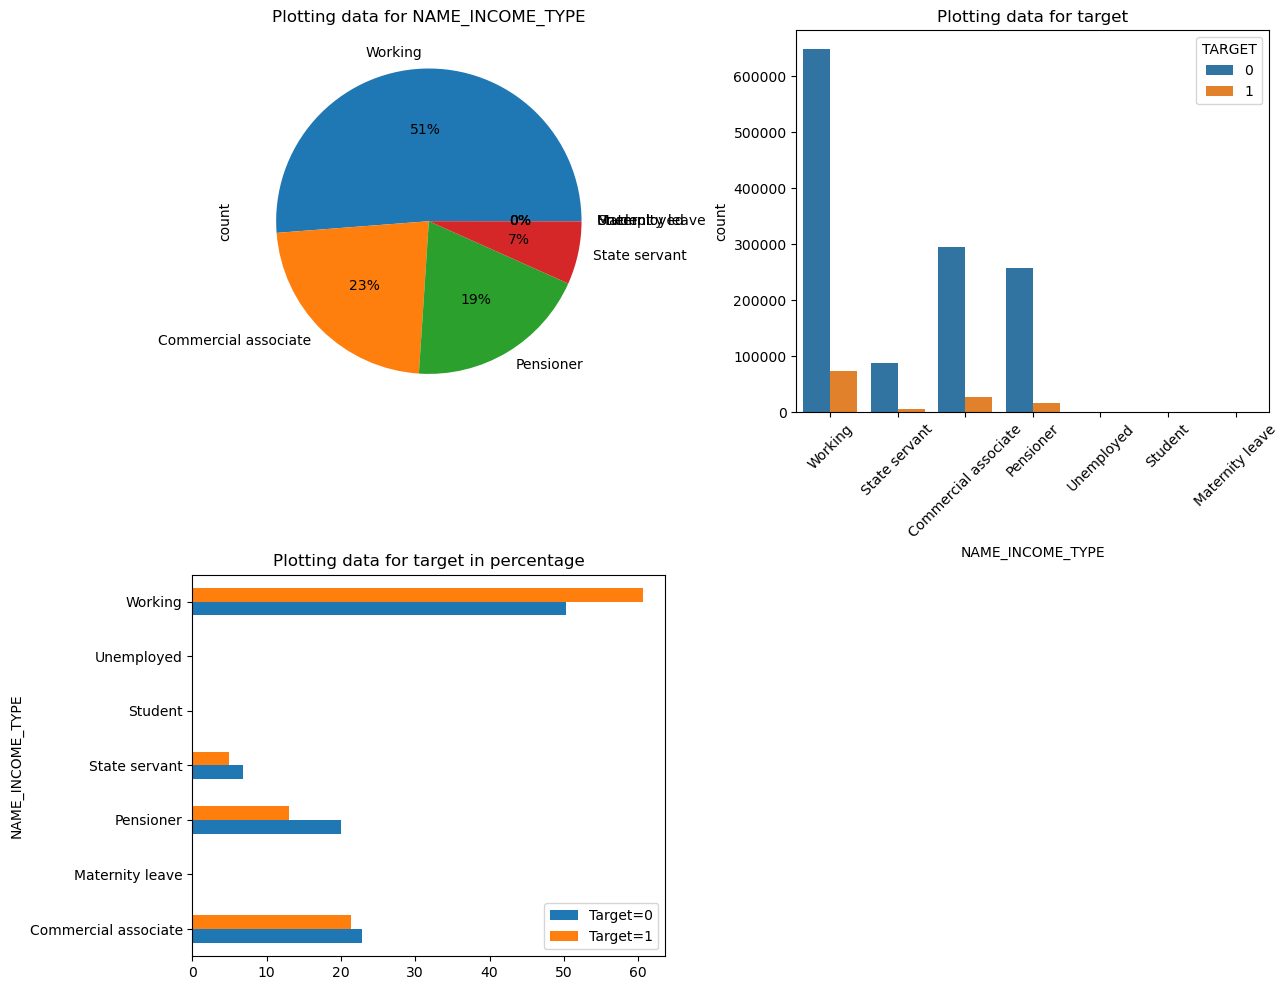



Plotting column NAME_EDUCATION_TYPE


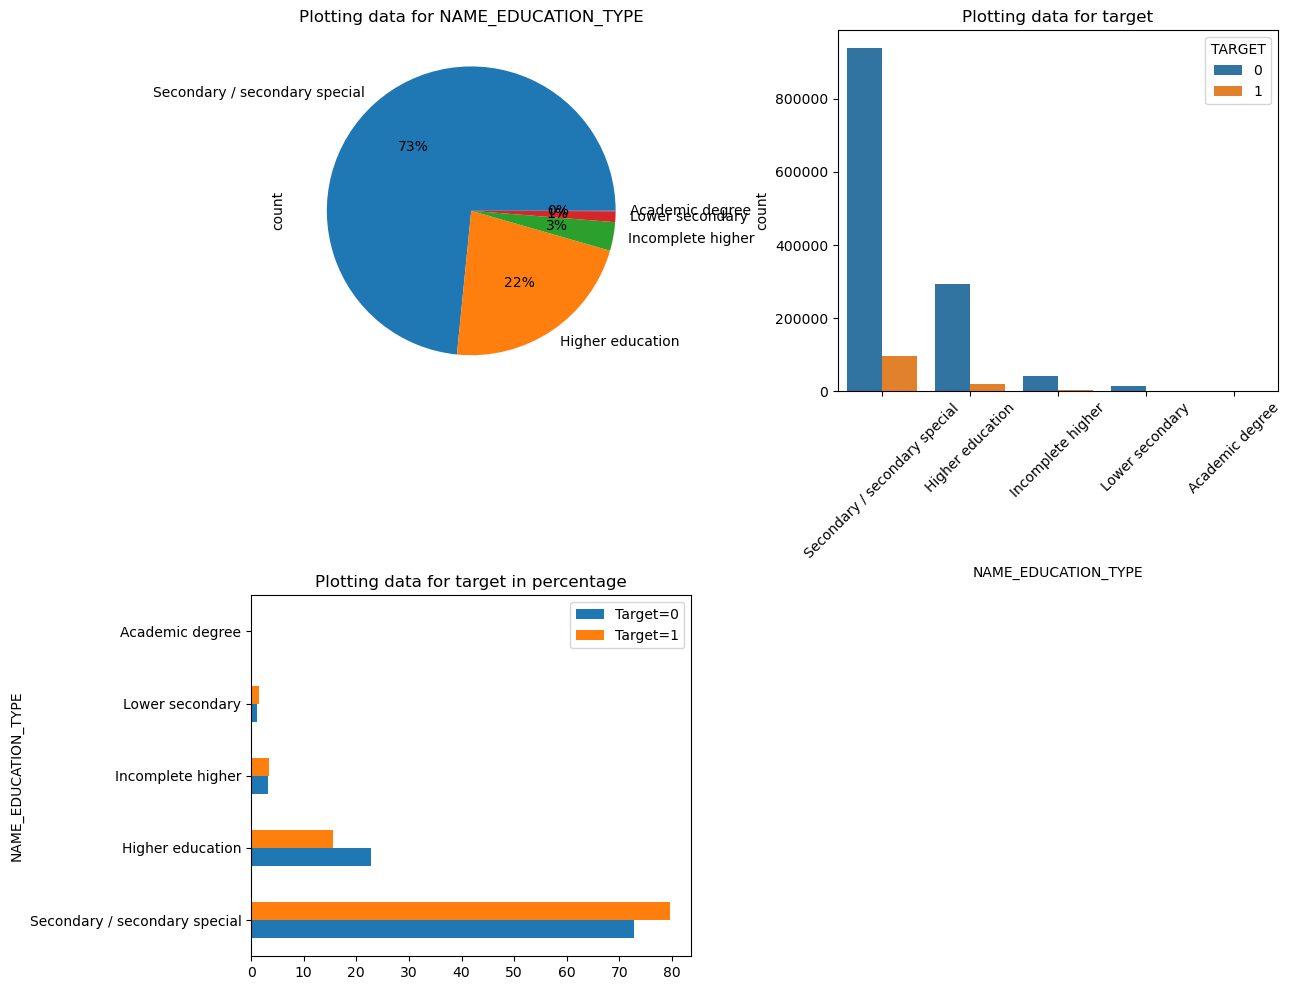



Plotting column NAME_FAMILY_STATUS


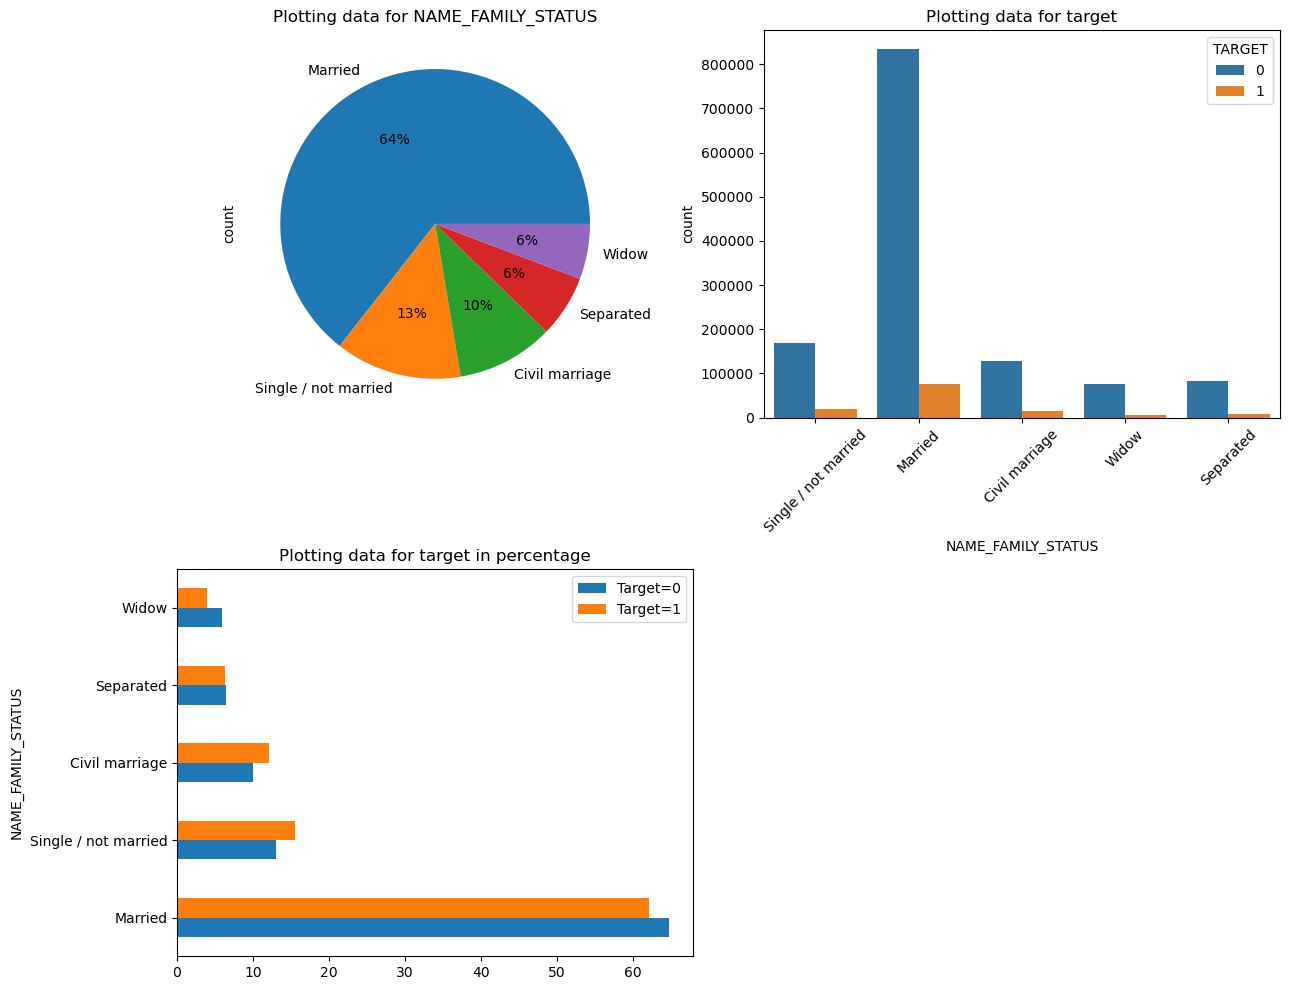



Plotting column NAME_HOUSING_TYPE


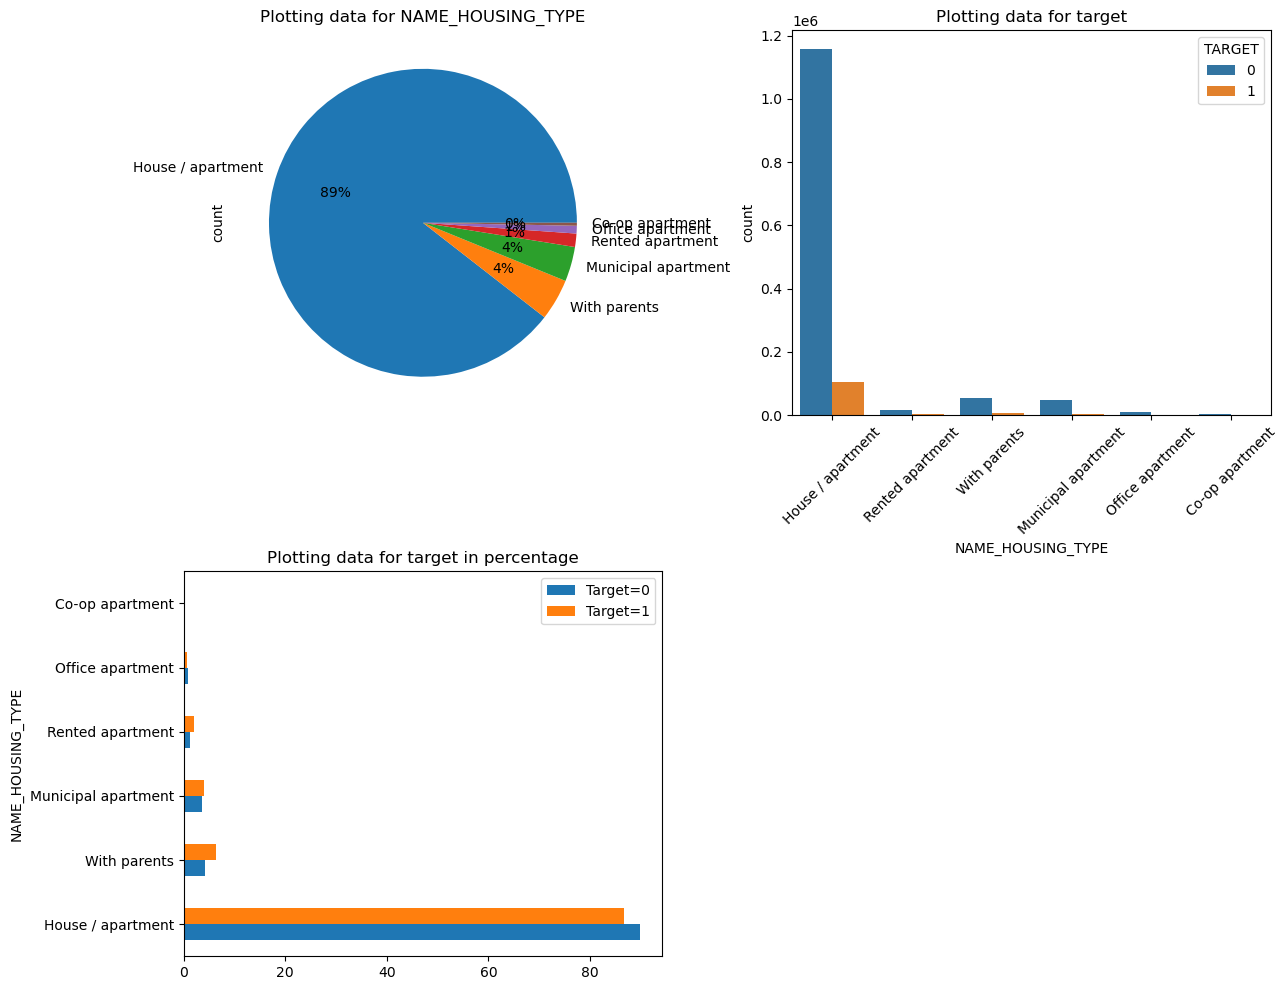



Plotting column OCCUPATION_TYPE


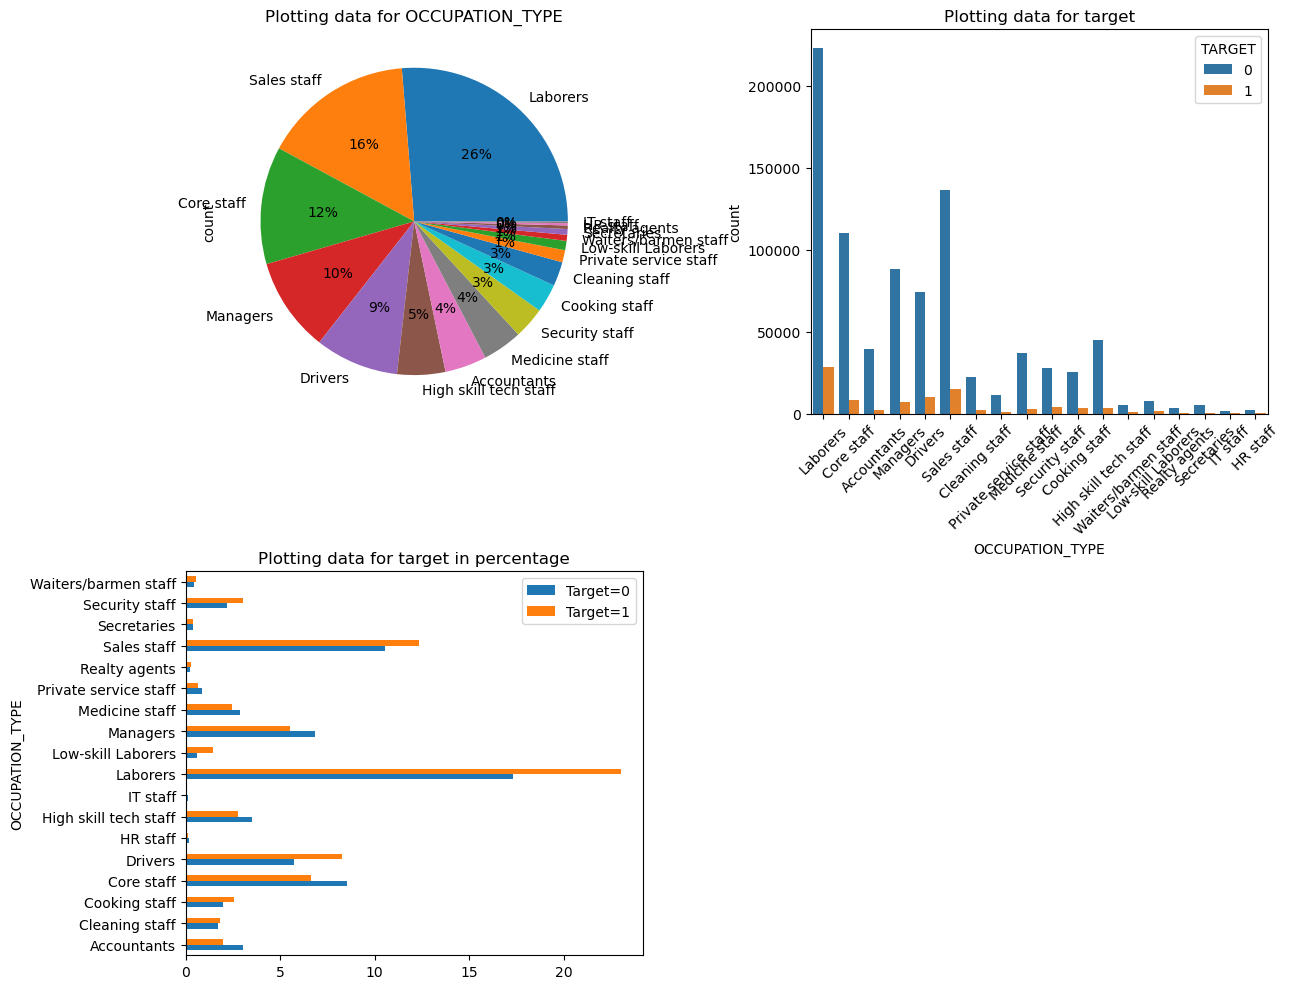



Plotting column WEEKDAY_APPR_PROCESS_START_x


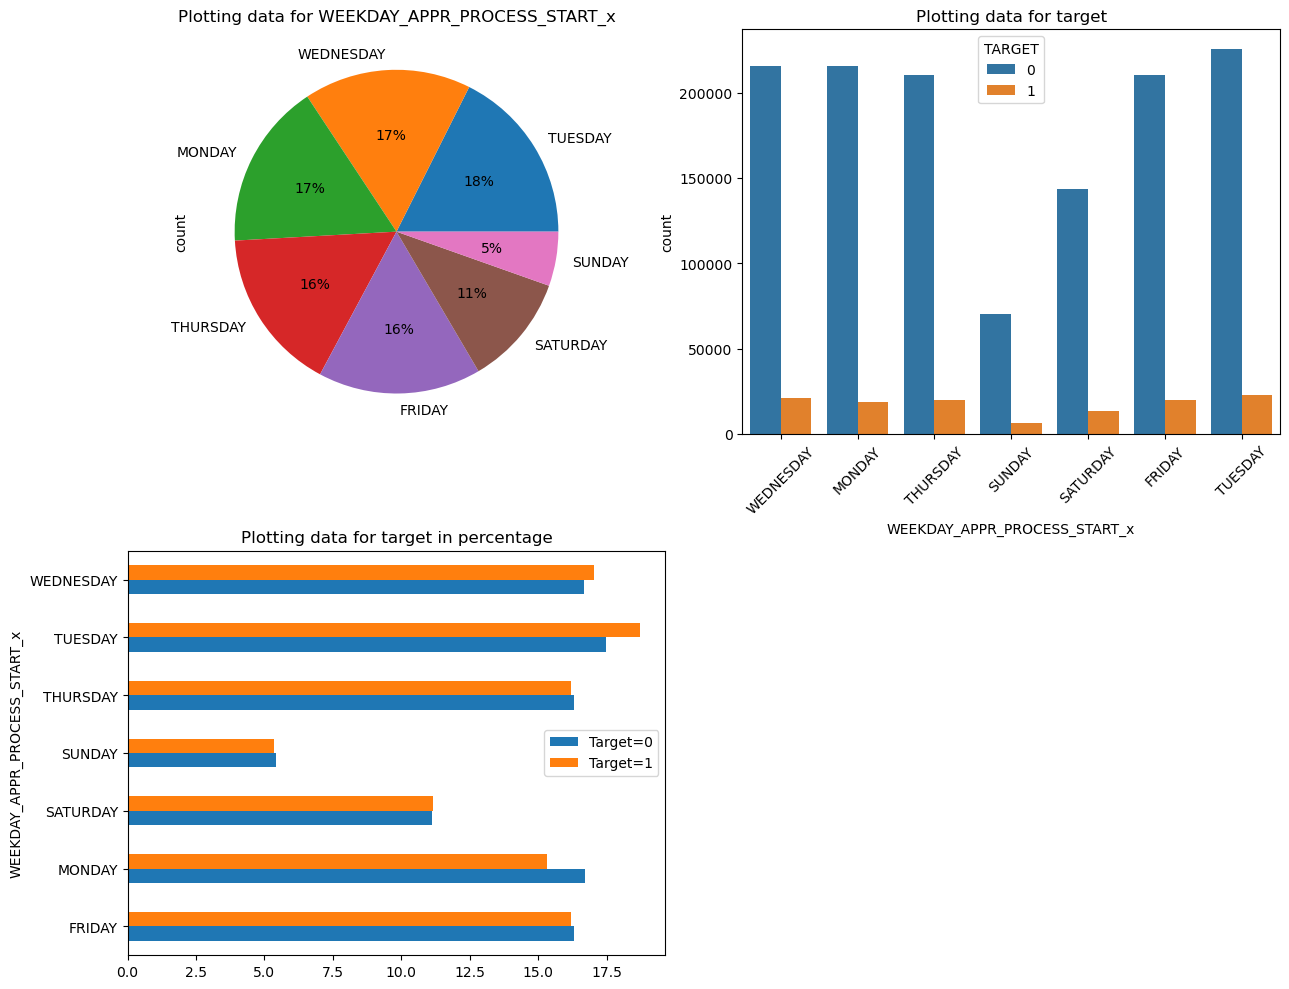



Plotting column ORGANIZATION_TYPE


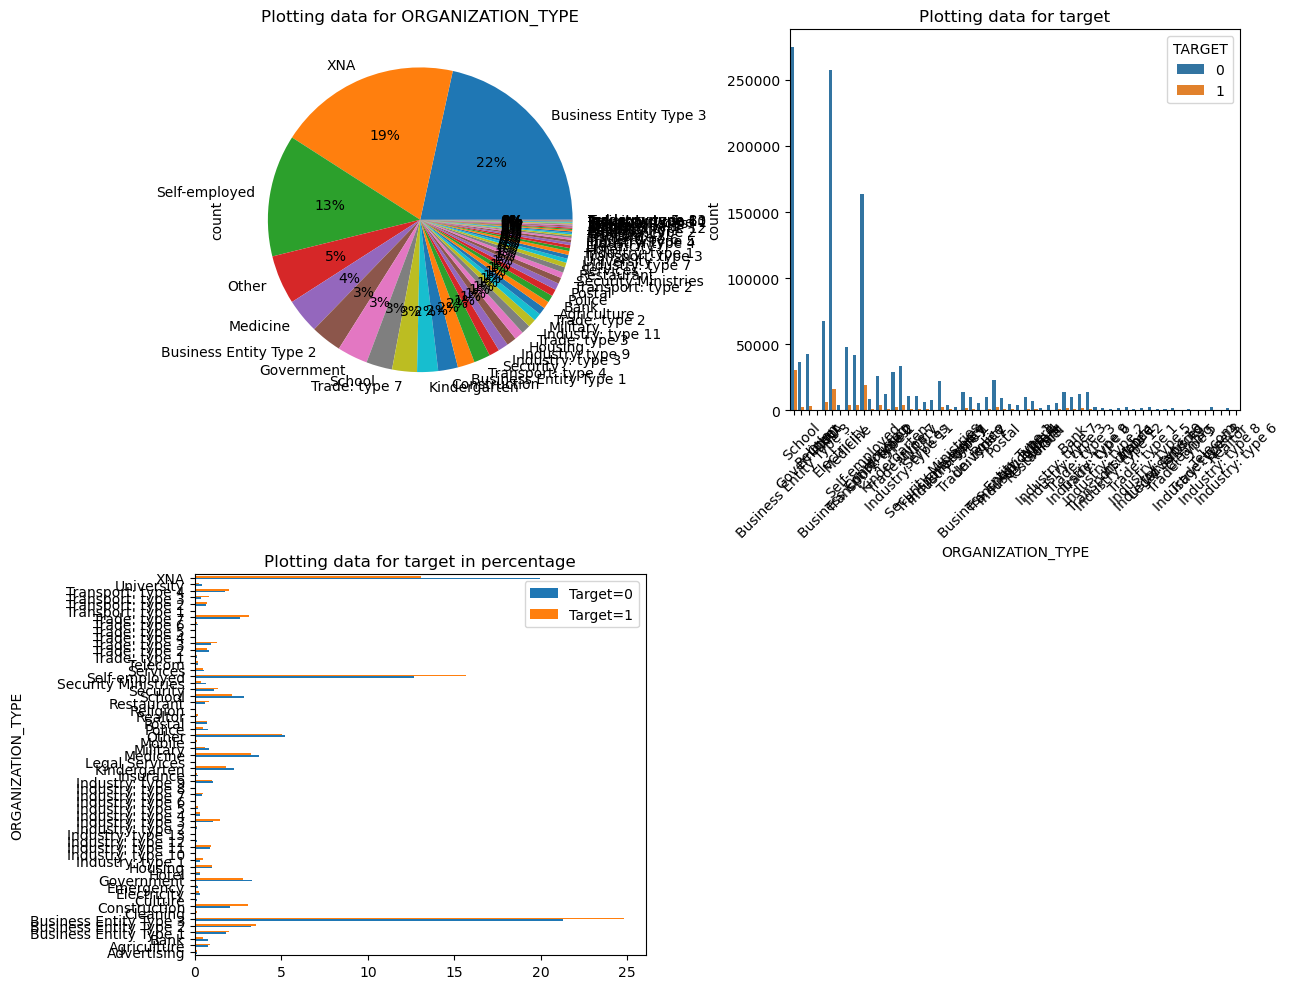



Plotting column EMERGENCYSTATE_MODE


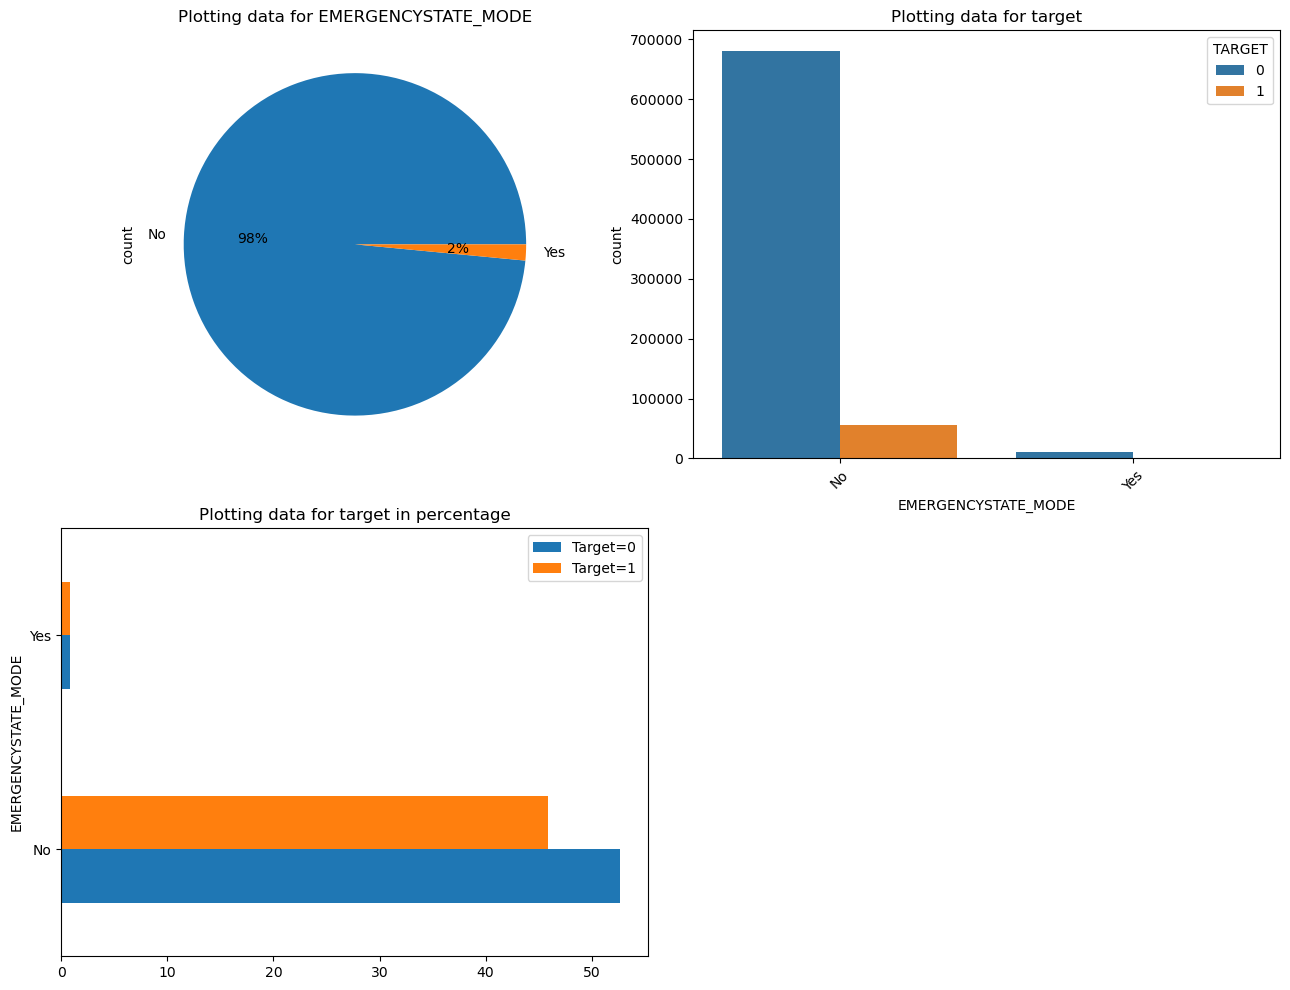

In [34]:
for column in merged_cleaned_categorical:
    # Indicates the column currently being plotted.
    print(f"Plotting column {column}")

    # Generate visualizations for the current column against the TARGET variable.
    plot(merged_cleaned,target_0,target_1, column)

    print('\n')

Insights:
- Gender (CODE_GENDER):
We can see than fewer men take loans compared to women, but the proportion of male defaulters is significantly higher. This makes gender an important factor to consider in loan risk assessment.

- Income Type (NAME_INCOME_TYPE):
Pensioners have a lower default rate, showing that even with a fixed or smaller income, they are more reliable in repaying loans.

- Education Level (NAME_EDUCATION_TYPE):
Most loans are taken by people with secondary education, but their default rate is much higher compared to those with higher education. This indicates that education level plays a key role in loan repayment ability.

- Family Status (NAME_FAMILY_STATUS):
Married people apply for loans the most and are less likely to default. On the other hand, singles and those in civil marriages have higher default rates, suggesting marital status affects repayment behavior.

- Occupation (OCCUPATION_TYPE):
Laborers and office staff apply for loans frequently, but managers and high-skilled tech workers are the most reliable in repaying them. This shows occupation type is an important factor in predicting loan default risk.

#### Task-5.2 : Analysing Numerical data

In [35]:
#Viewing all the columns with numerical datatype 
merged_cleaned.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'LIVINGAREA_MEDI', 'TOTALAREA_MODE', '

In [36]:
#storing all the numerical data into 'merged_cleaned_numerical' dataset from 'merged_cleaned'
merged_cleaned_numerical=merged_cleaned.select_dtypes(include=['int64', 'float64']).columns

#### Task-5.2.1 : Univariate Analysis for Numerical data

we need to plot three different types of visualisation for univariate analysis of each numerical column:
- Histogram
- Box Plot
- Scatter Plot

In [37]:
#parameters: 'dataset' - entire dataset , 'column' - column for which visualisation is needed
#target_0 - subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 0 
#target_1 - subset of the DataFrame 'merged_cleaned' containing records where the 'TARGET' column is equal to 1

def plot_numerical(dataset,target_0,target_1, column):
    fig = plt.figure(figsize=(13,10))
    
    #Create a subplot for histogram
    plt.subplot(221)
    plt.hist(target_0[column], label='Target=0')  # Histogram for category '0'
    plt.hist(target_1[column], label='Target=1')  # Histogram for category '1'
    plt.title(f'Plotting Histogram for {column}')
    plt.legend()  # Add a legend to distinguish between categories
    # plt.show()  # Display the histogram

    # Create a subplot for boxplot
    plt.subplot(222)
    sns.boxplot(data=dataset[column])
    plt.title(f'Plotting Boxplot for outliers in {column}')

    # Create a subplot for scatter plot
    plt.subplot(223)
    plt.scatter(dataset.index, dataset[column])
    plt.title(f'Plotting scatter plot for {column}')
    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()


Plotting column SK_ID_CURR


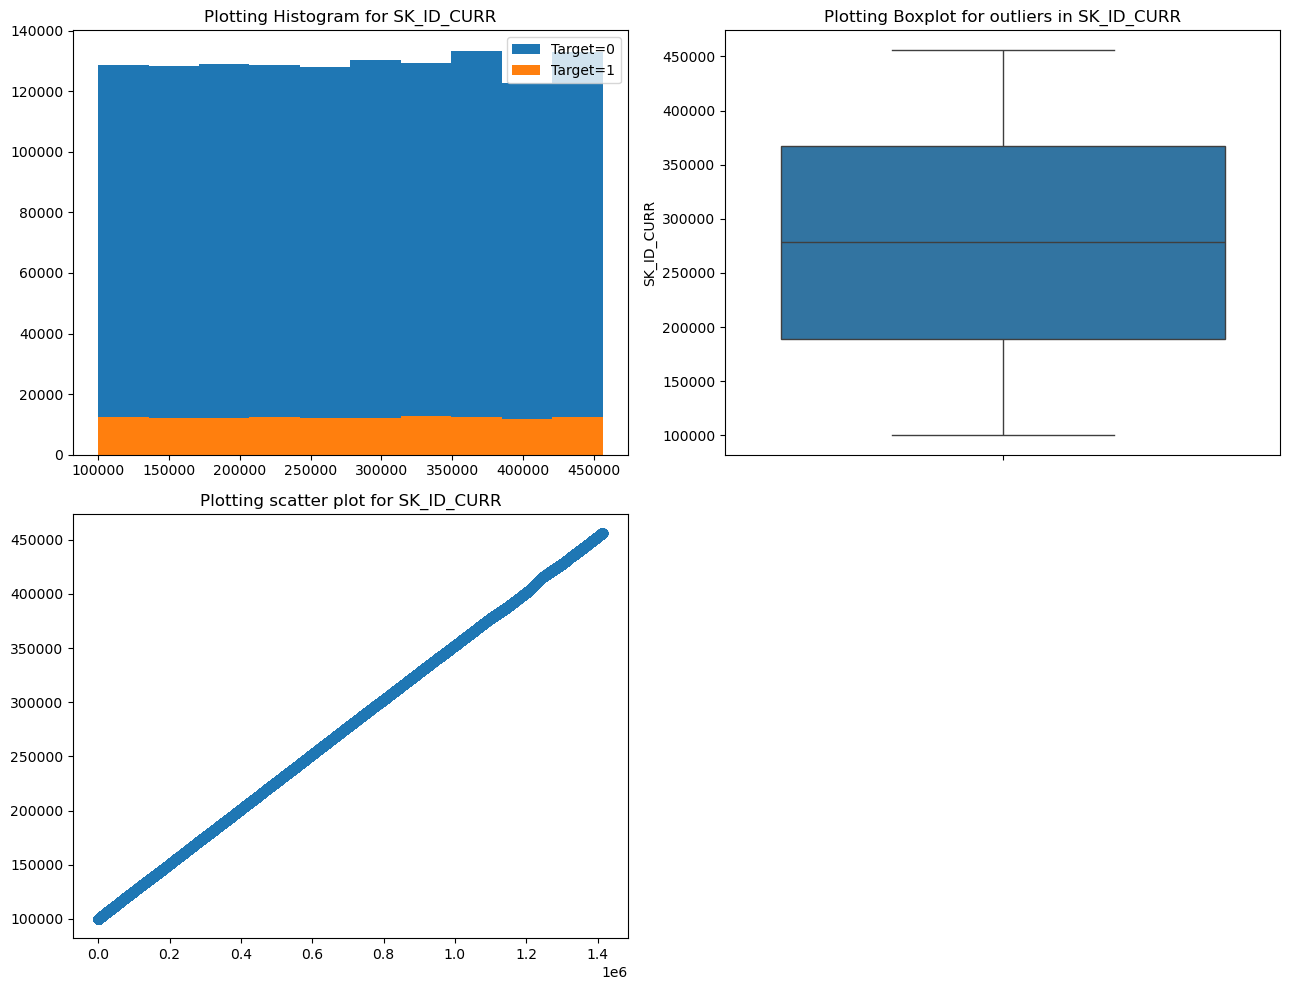



Plotting column TARGET


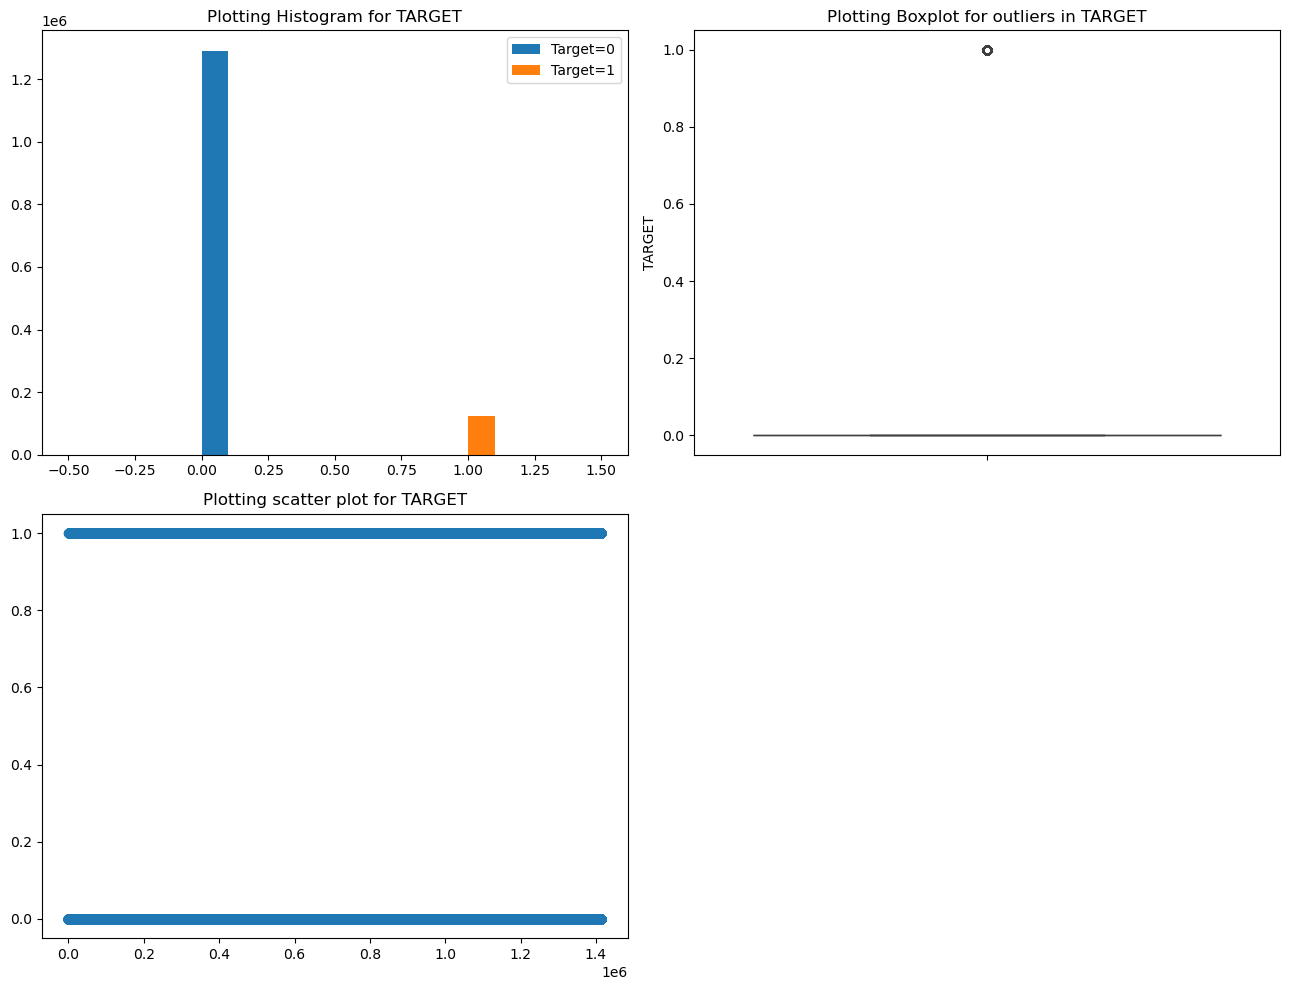



Plotting column CNT_CHILDREN


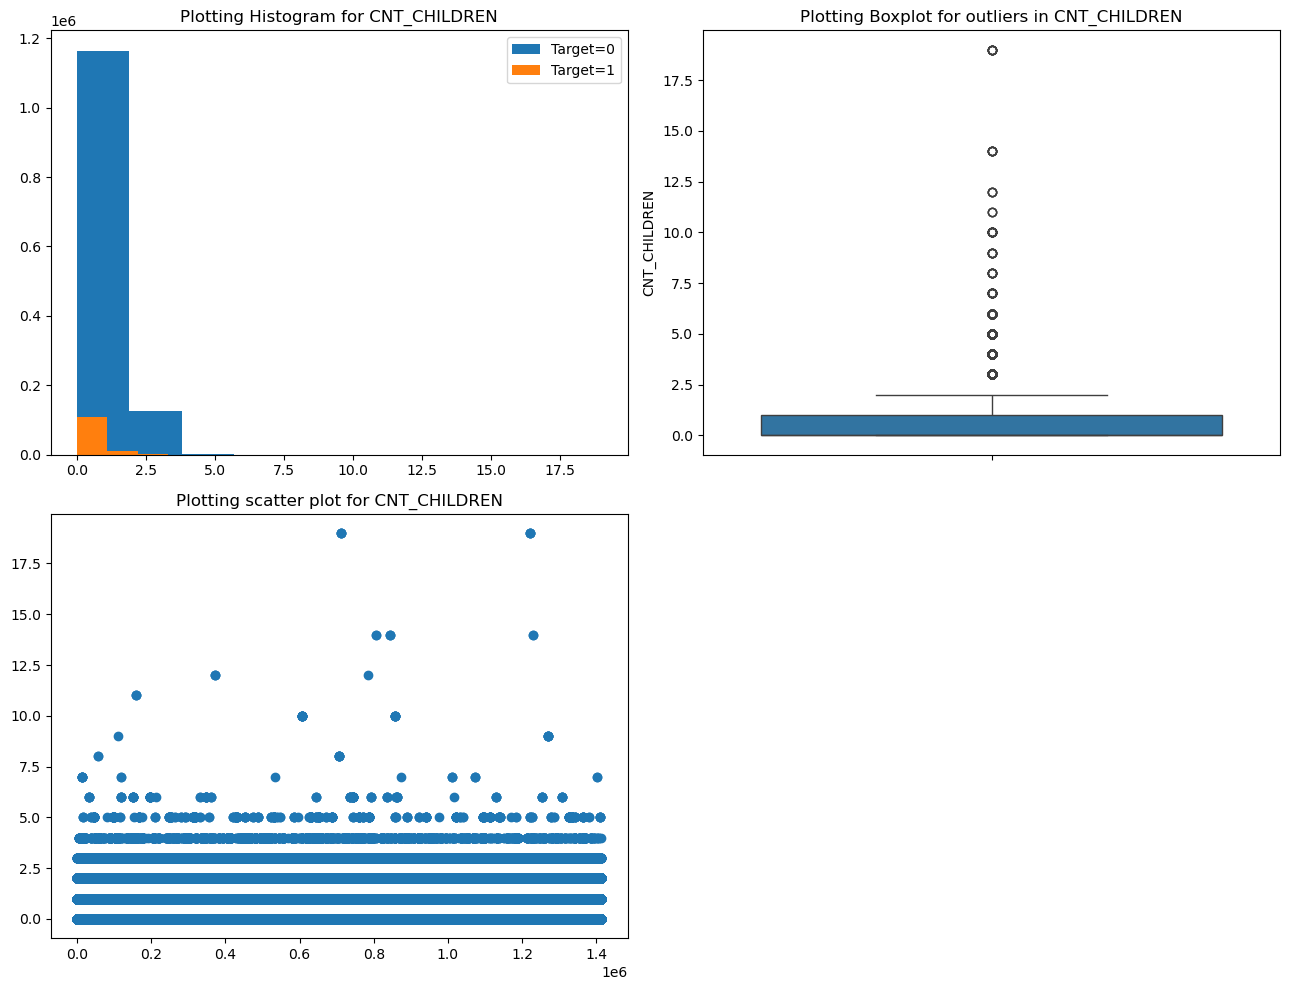



Plotting column AMT_INCOME_TOTAL


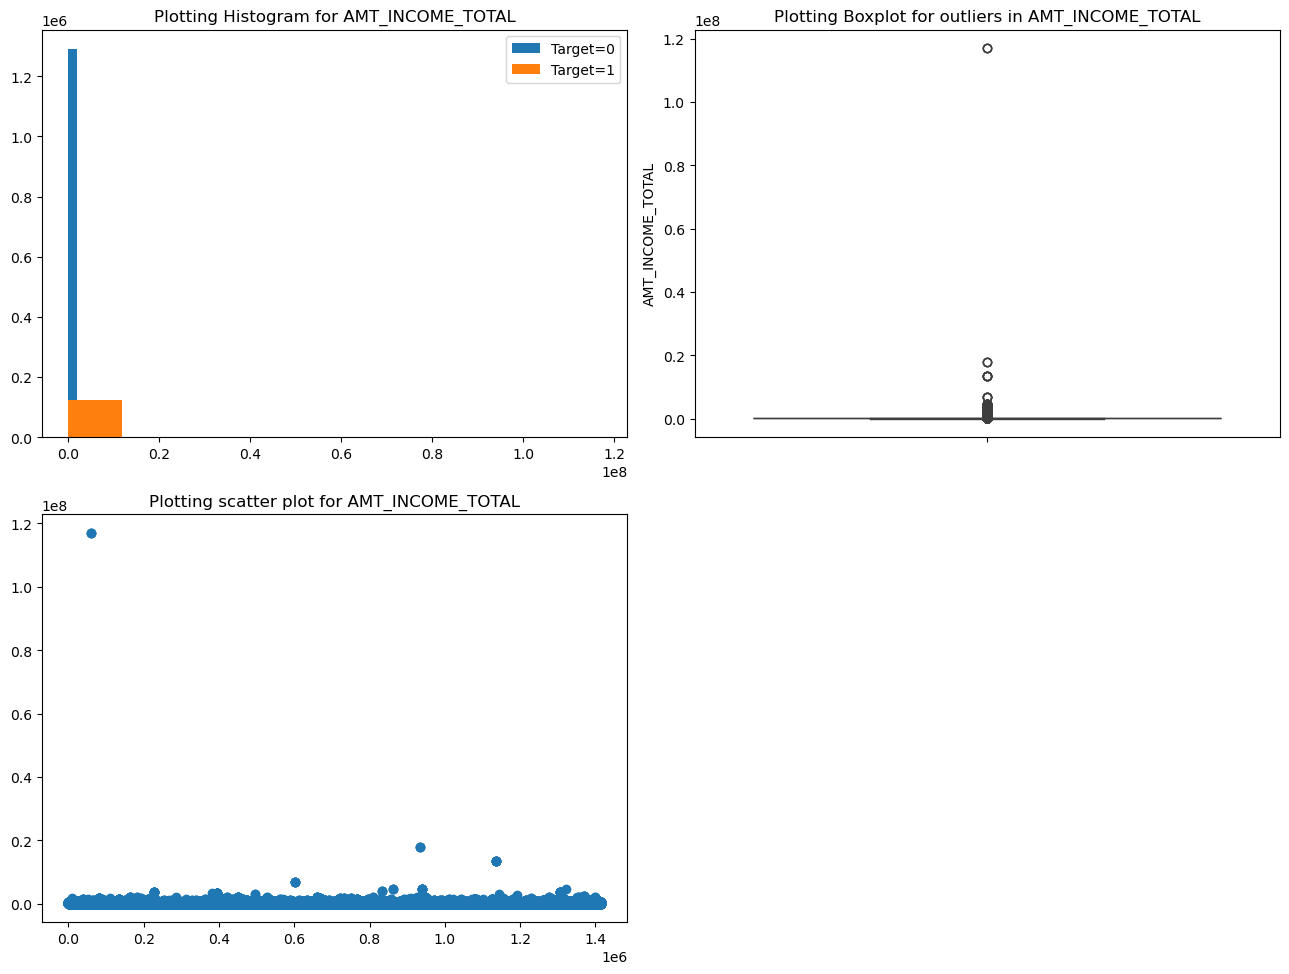



Plotting column AMT_CREDIT_x


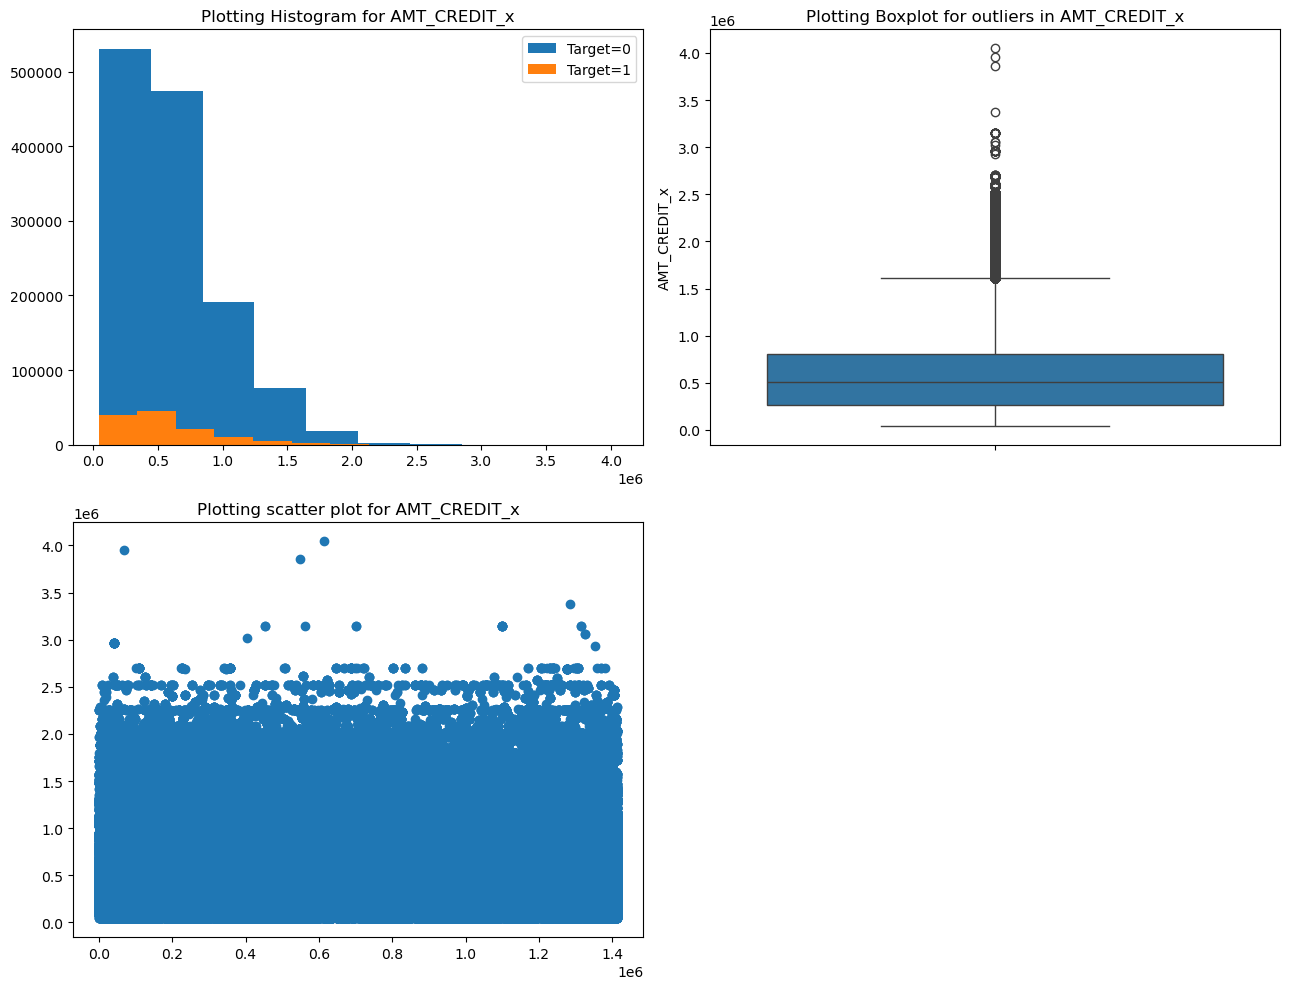



Plotting column AMT_ANNUITY_x


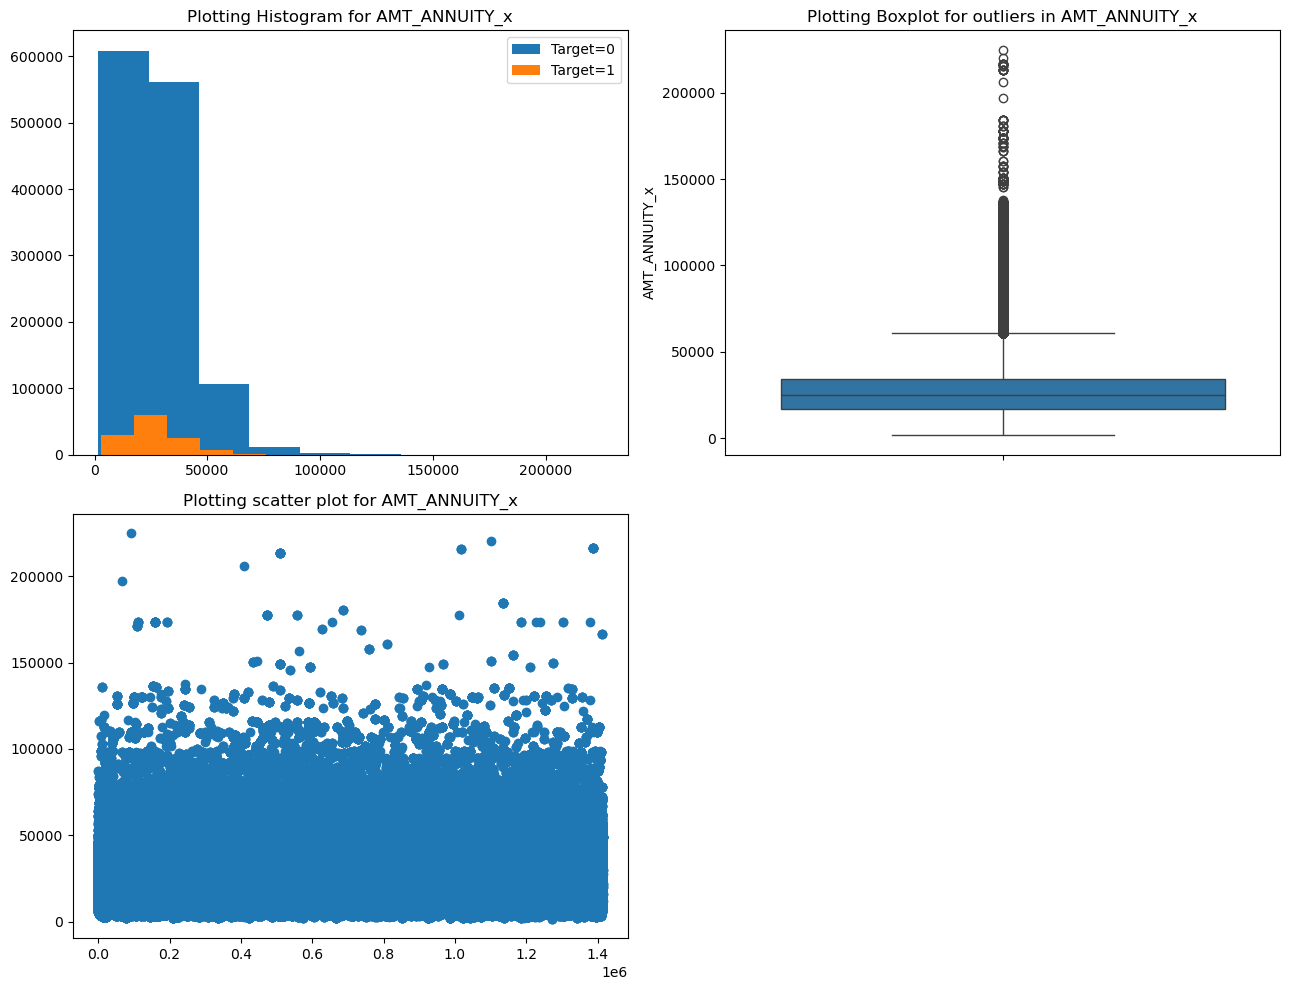



Plotting column AMT_GOODS_PRICE_x


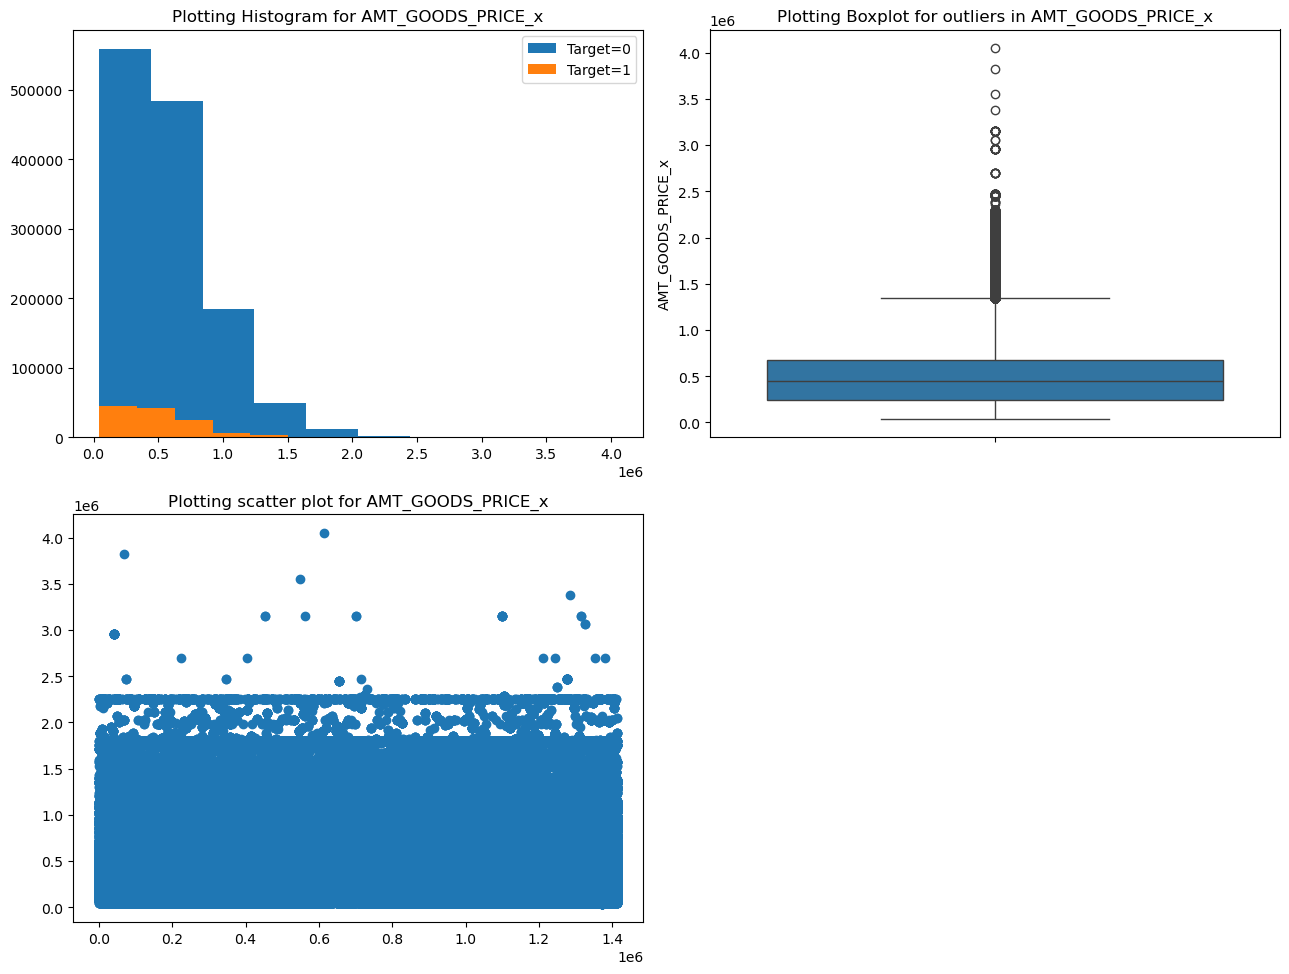



Plotting column REGION_POPULATION_RELATIVE


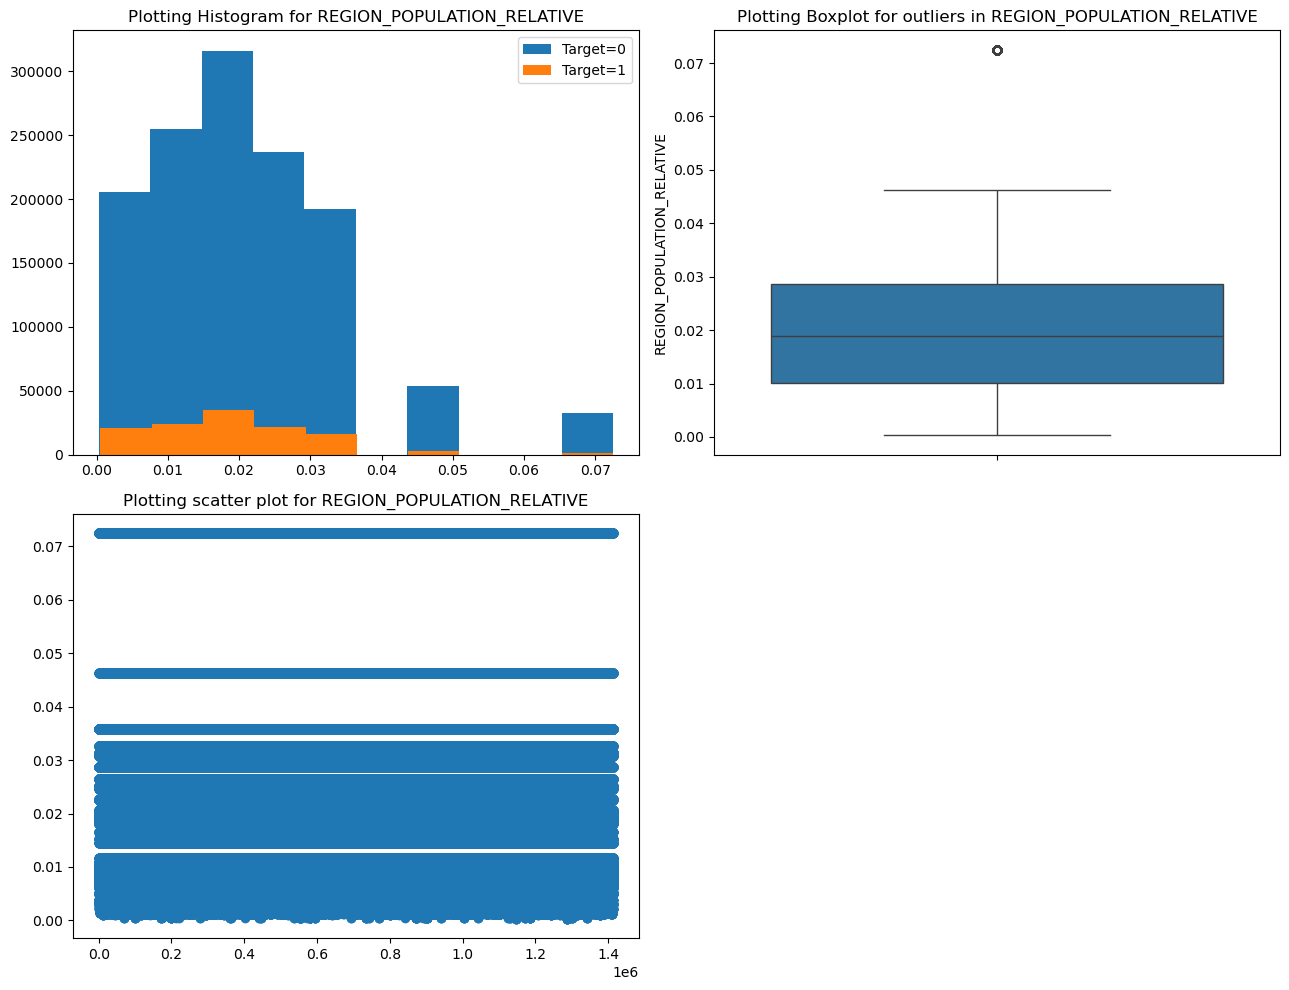



Plotting column DAYS_BIRTH


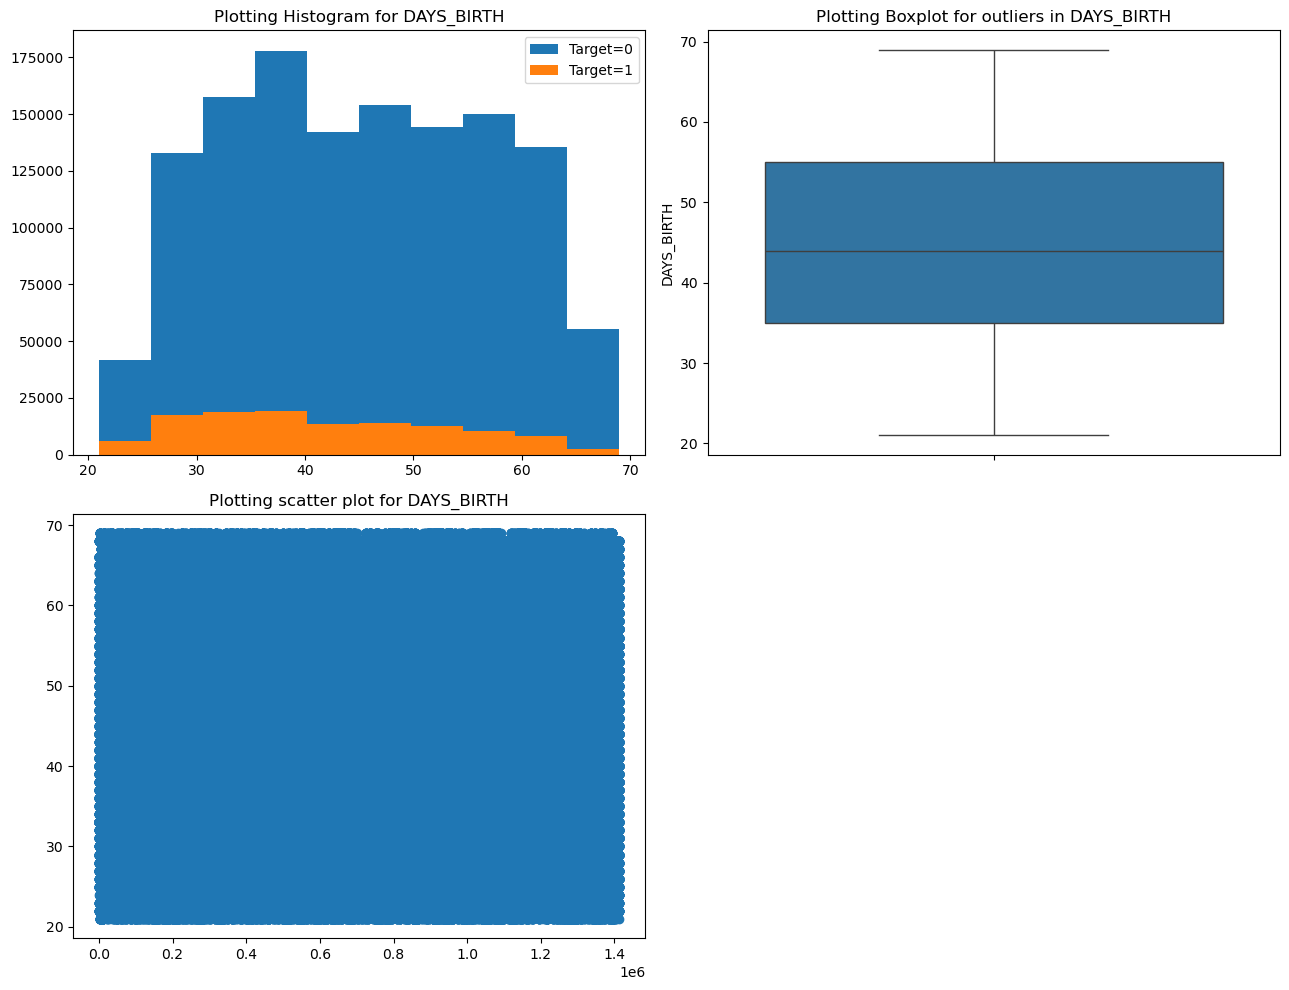



Plotting column DAYS_EMPLOYED


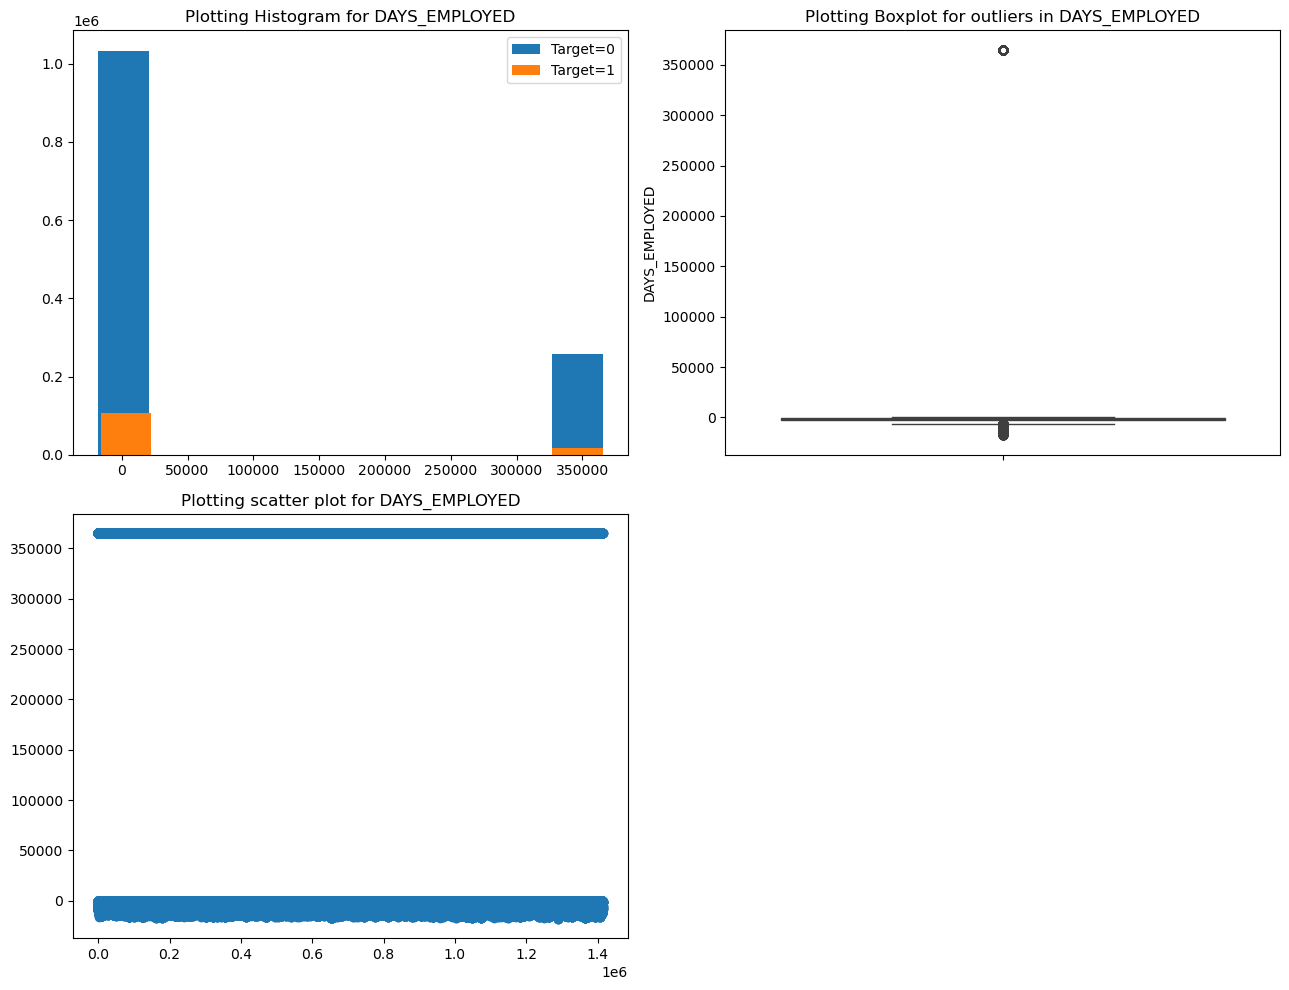



Plotting column DAYS_REGISTRATION


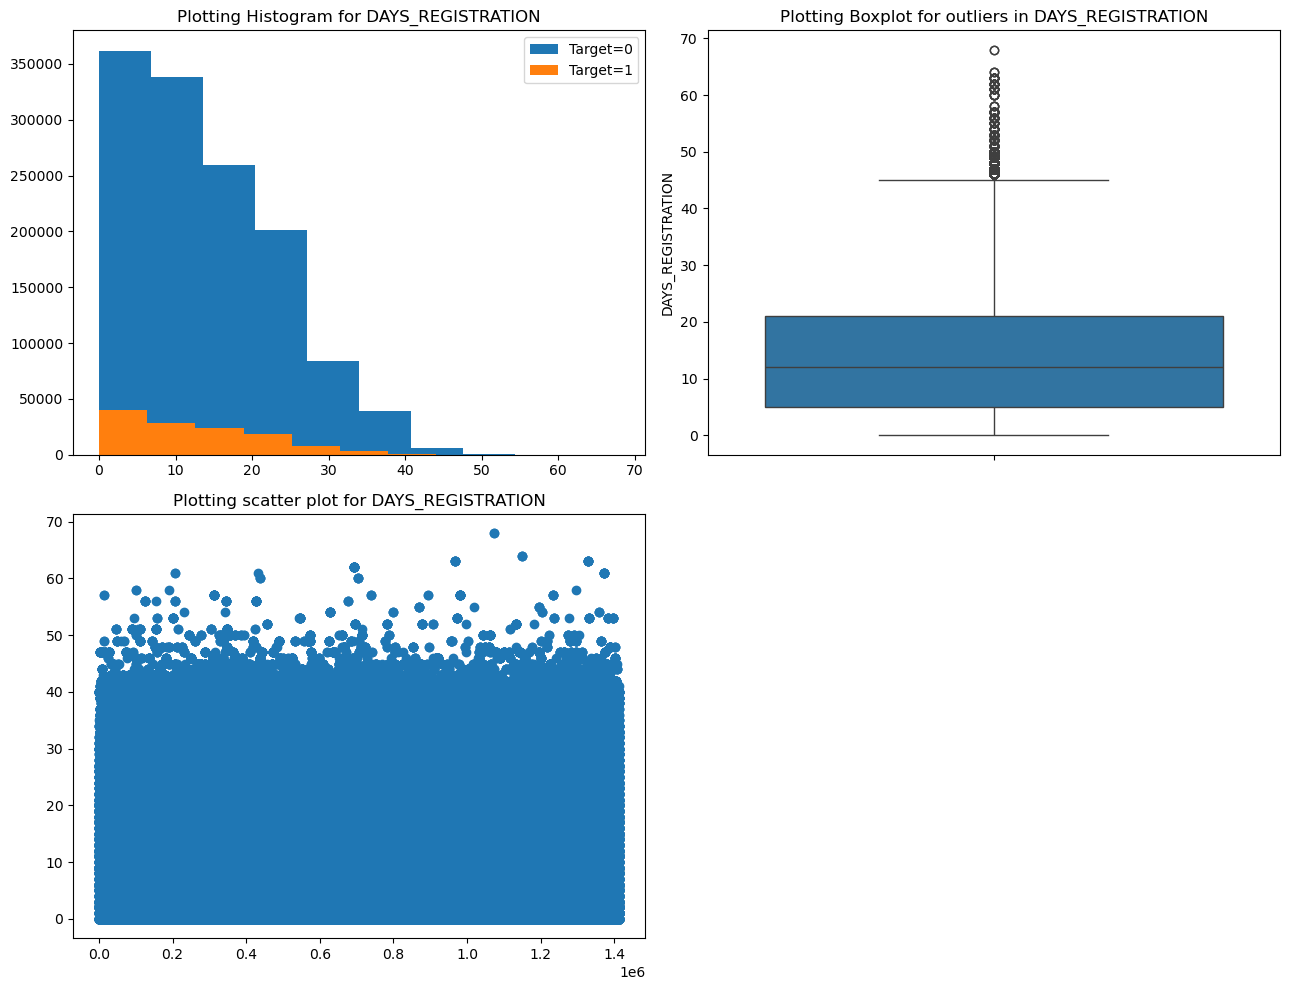



Plotting column DAYS_ID_PUBLISH


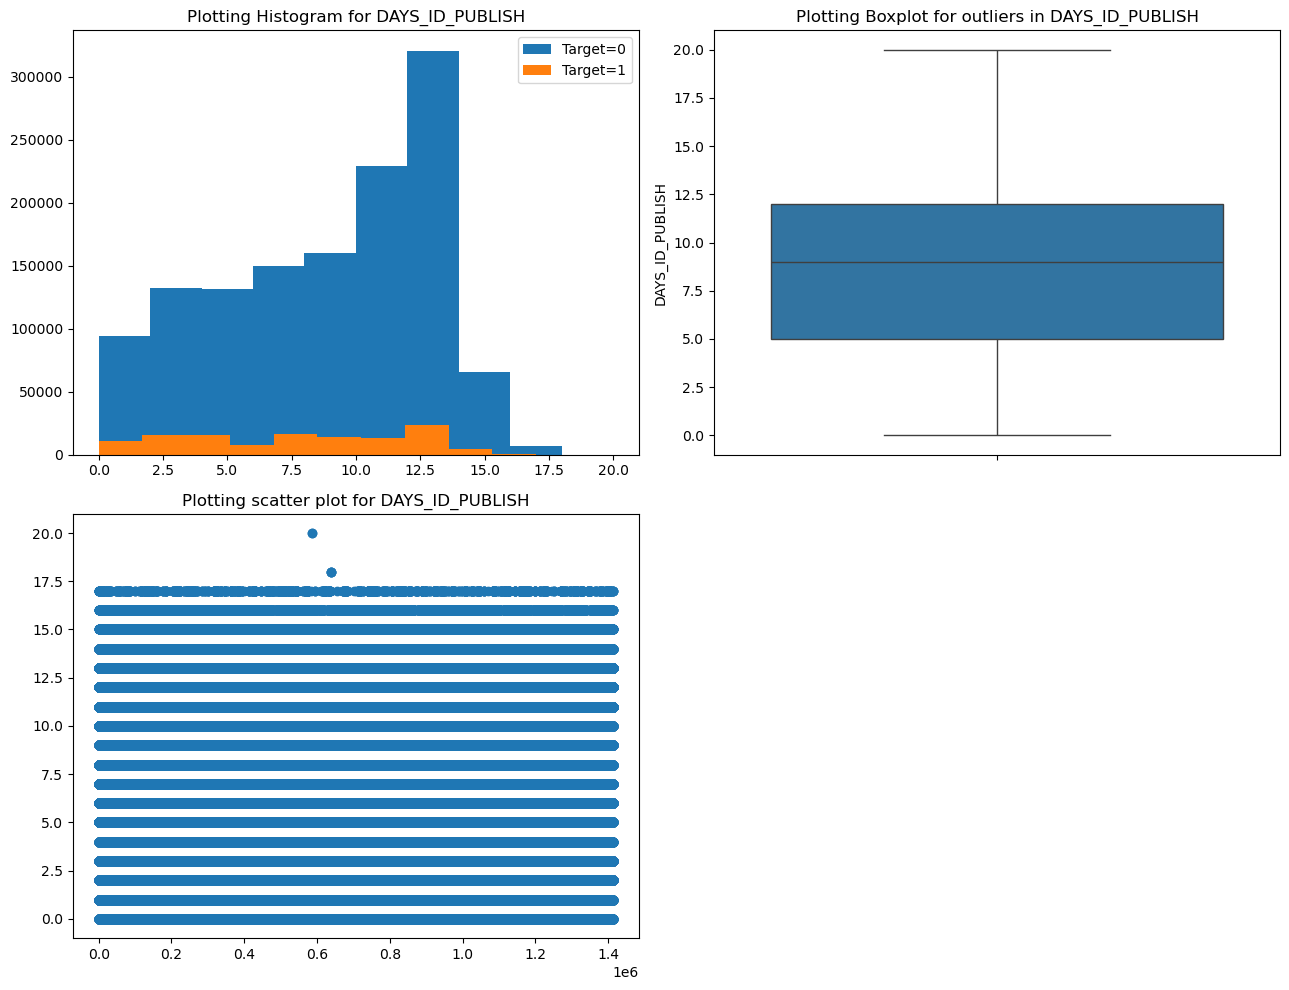



Plotting column FLAG_MOBIL


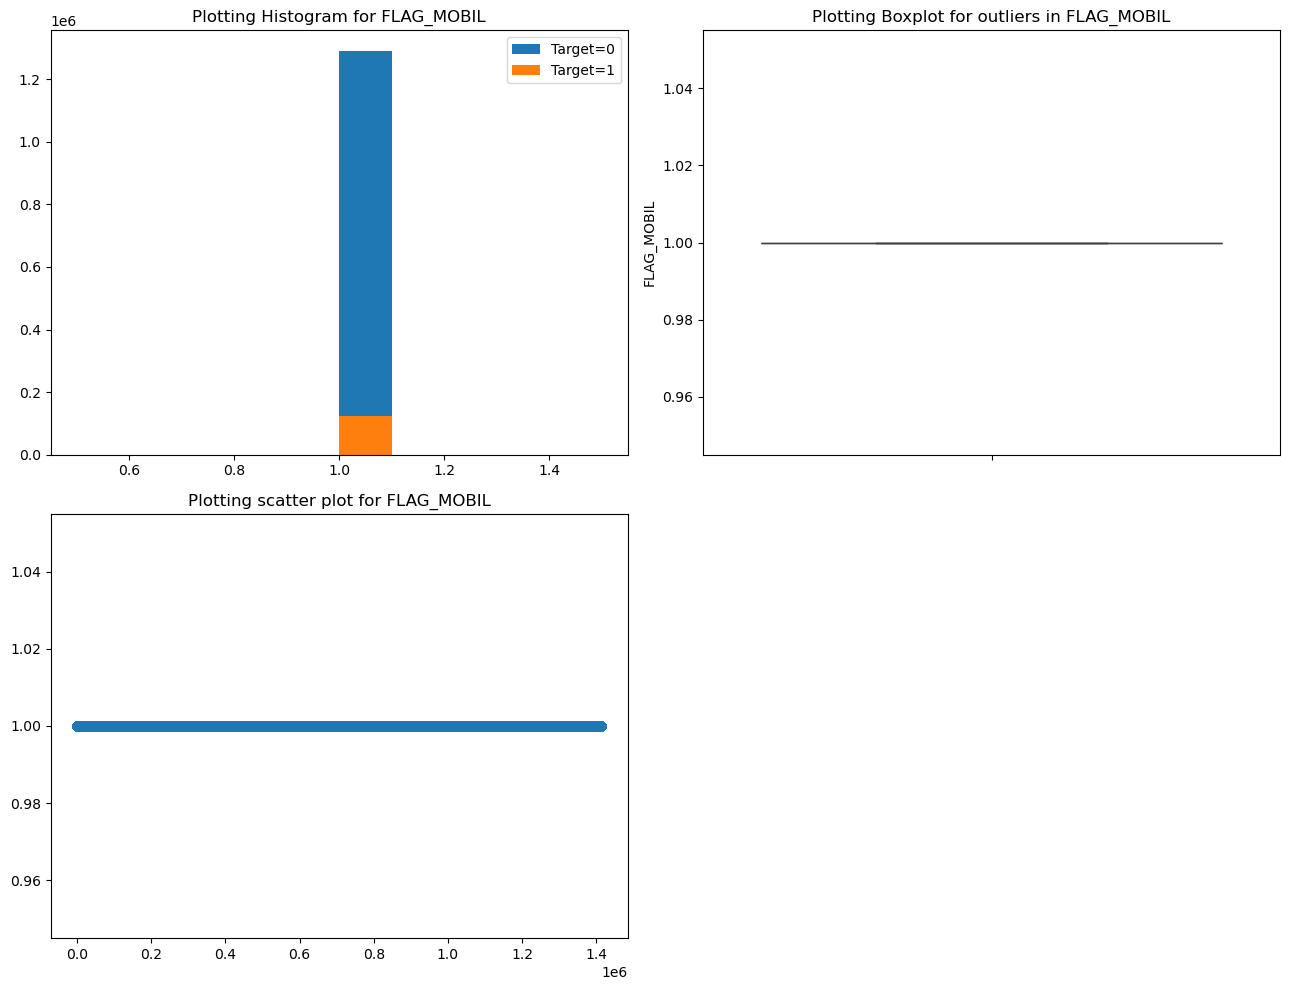



Plotting column FLAG_EMP_PHONE


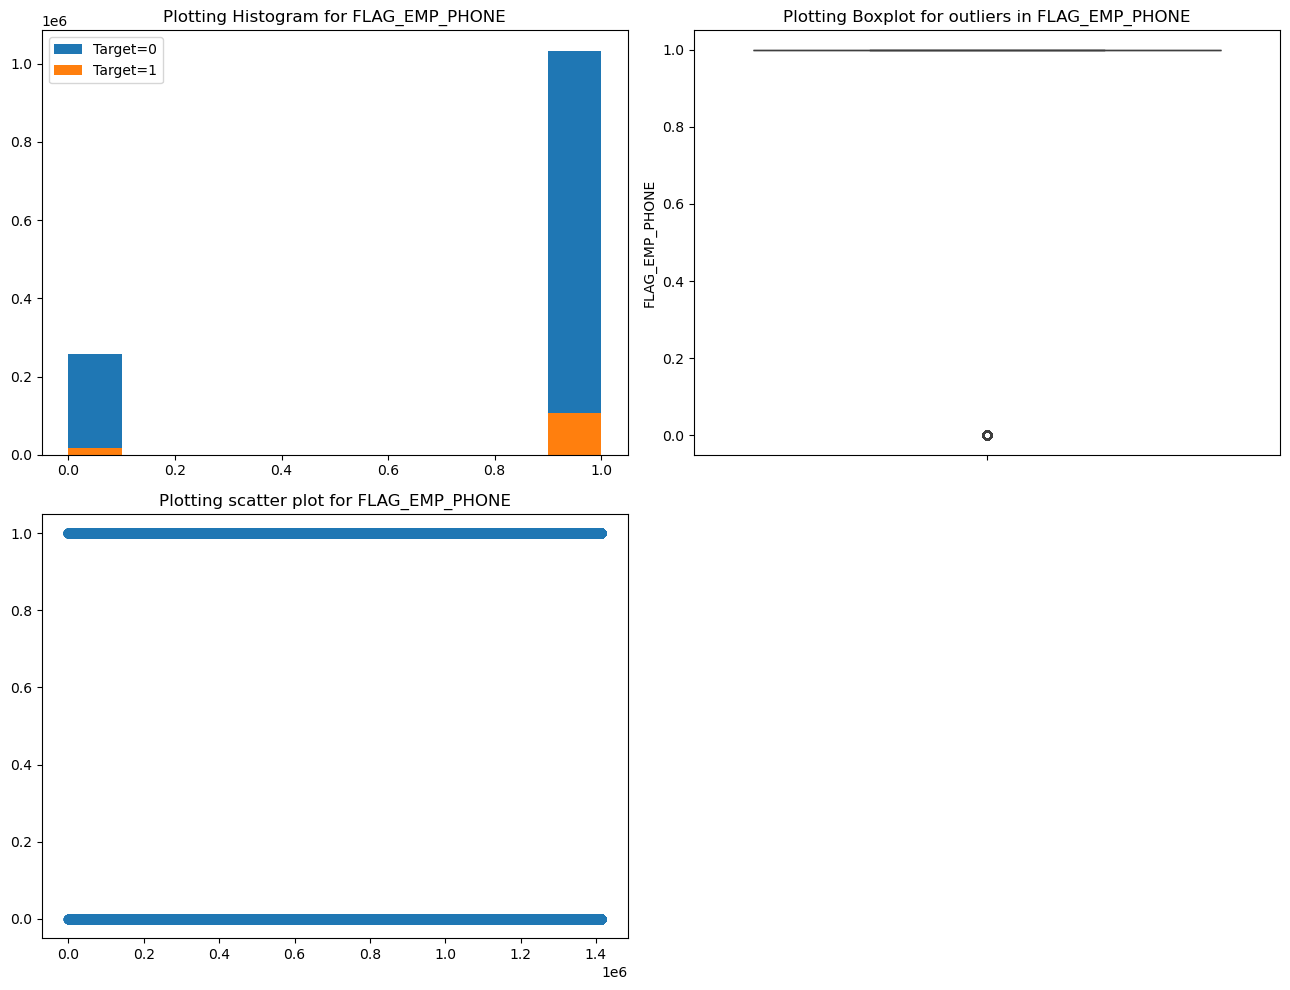



Plotting column FLAG_WORK_PHONE


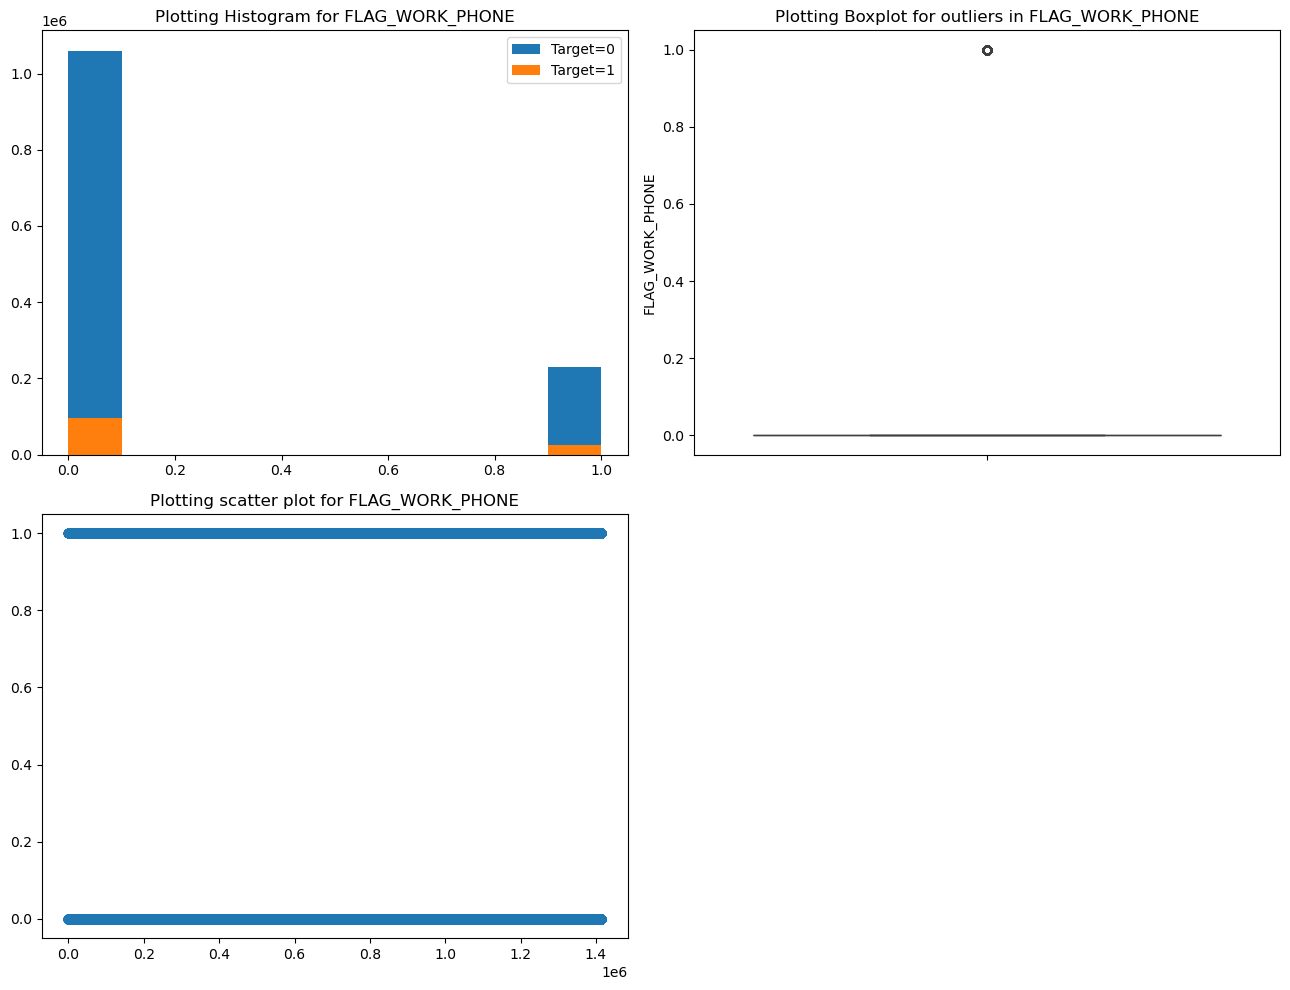



Plotting column FLAG_CONT_MOBILE


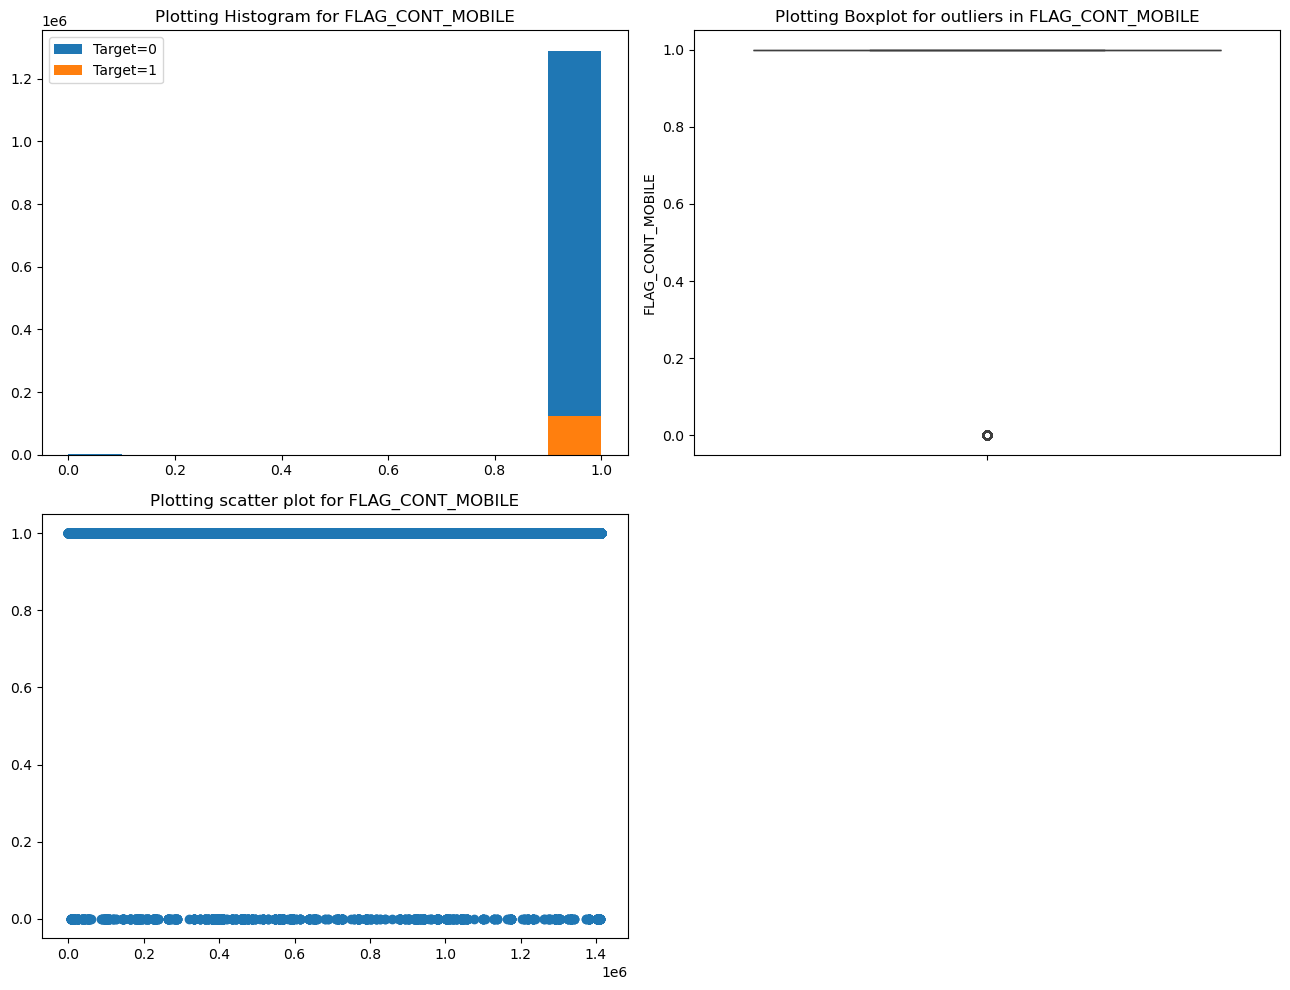



Plotting column FLAG_PHONE


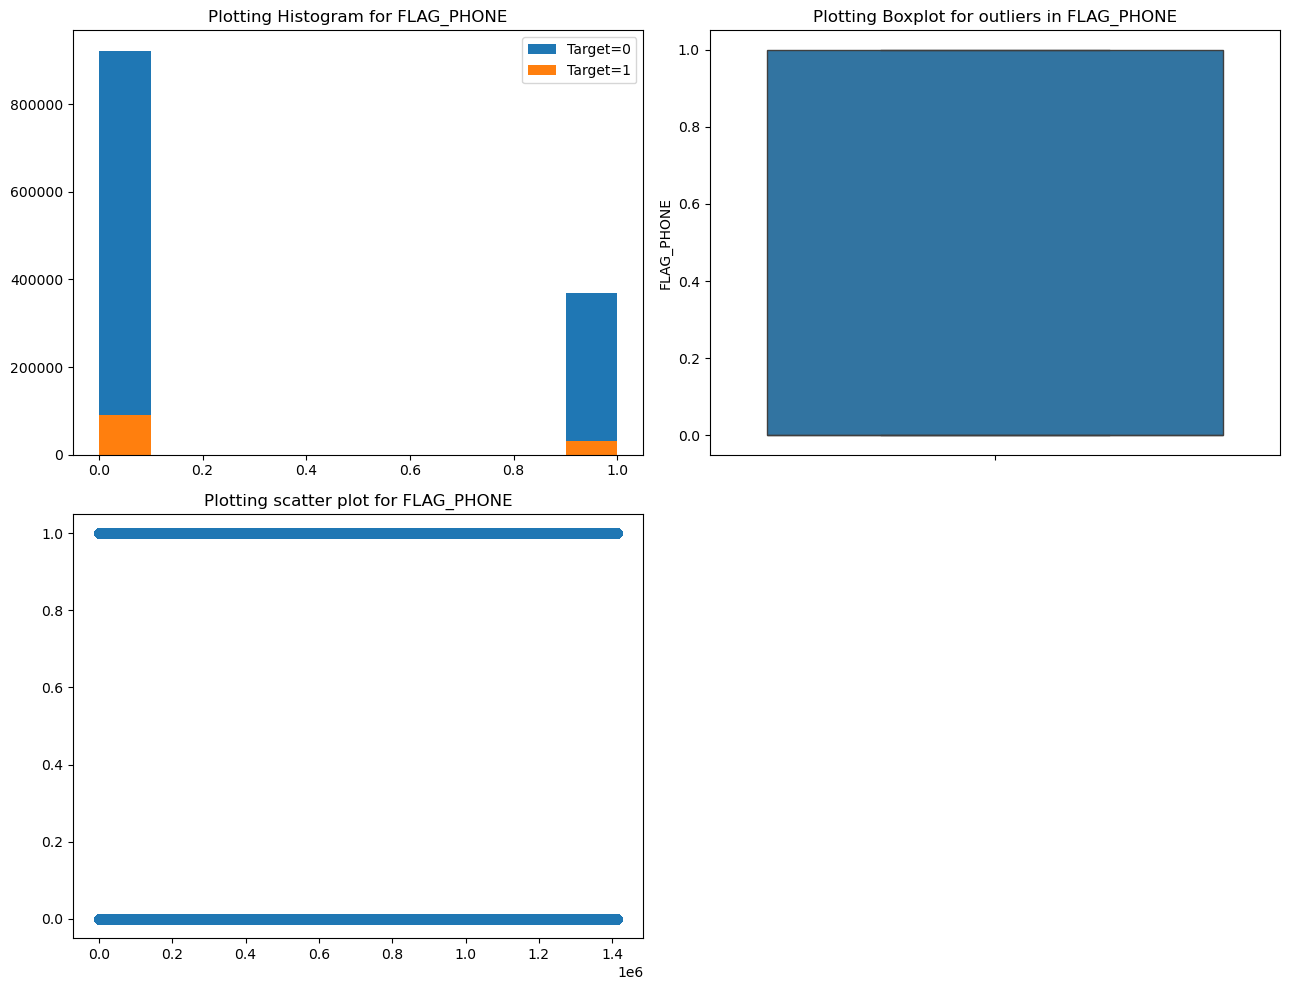



Plotting column FLAG_EMAIL


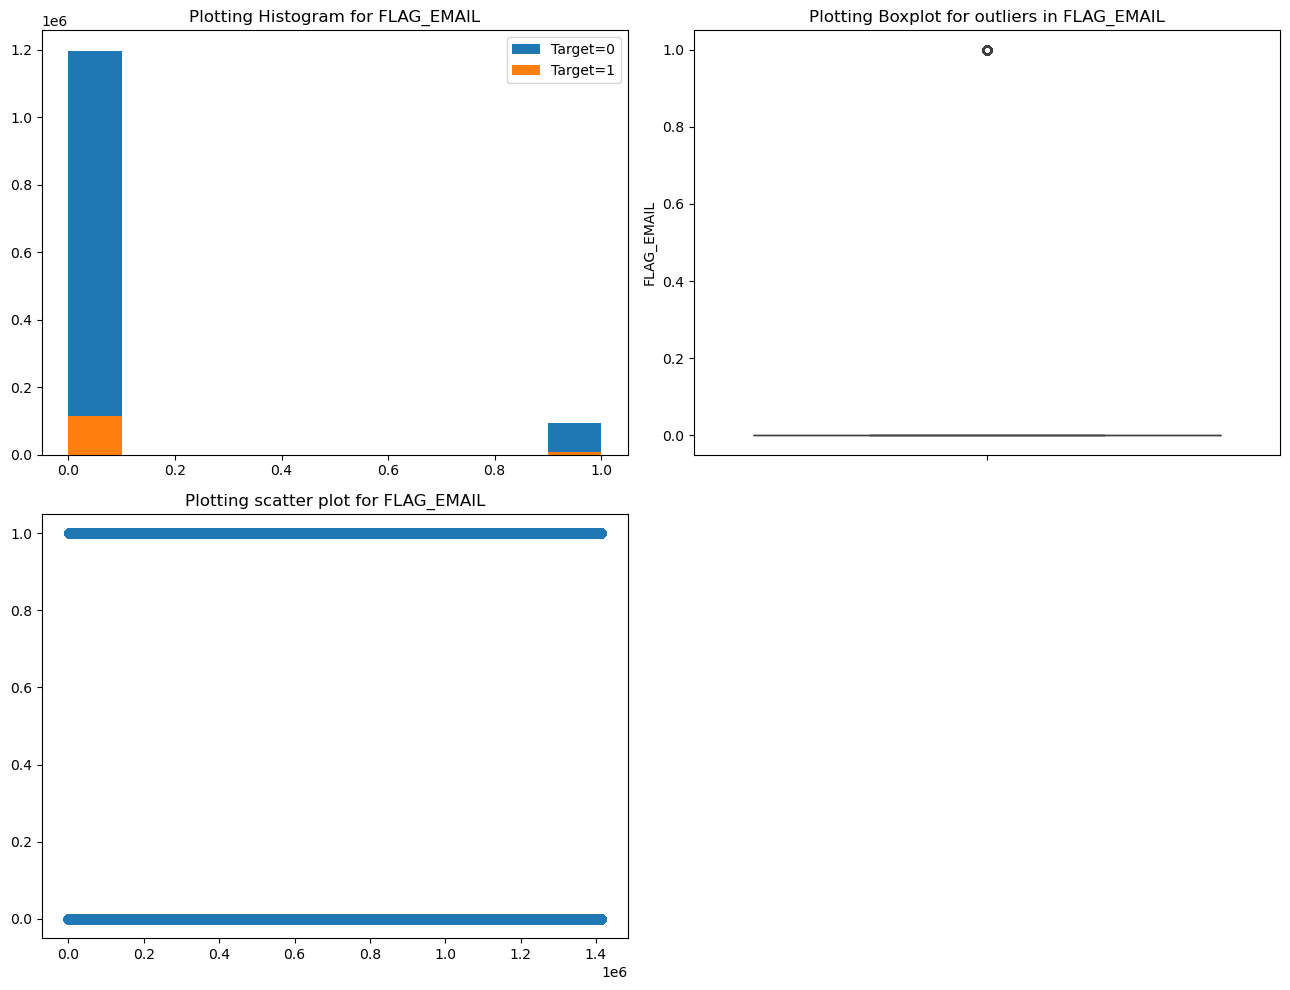



Plotting column CNT_FAM_MEMBERS


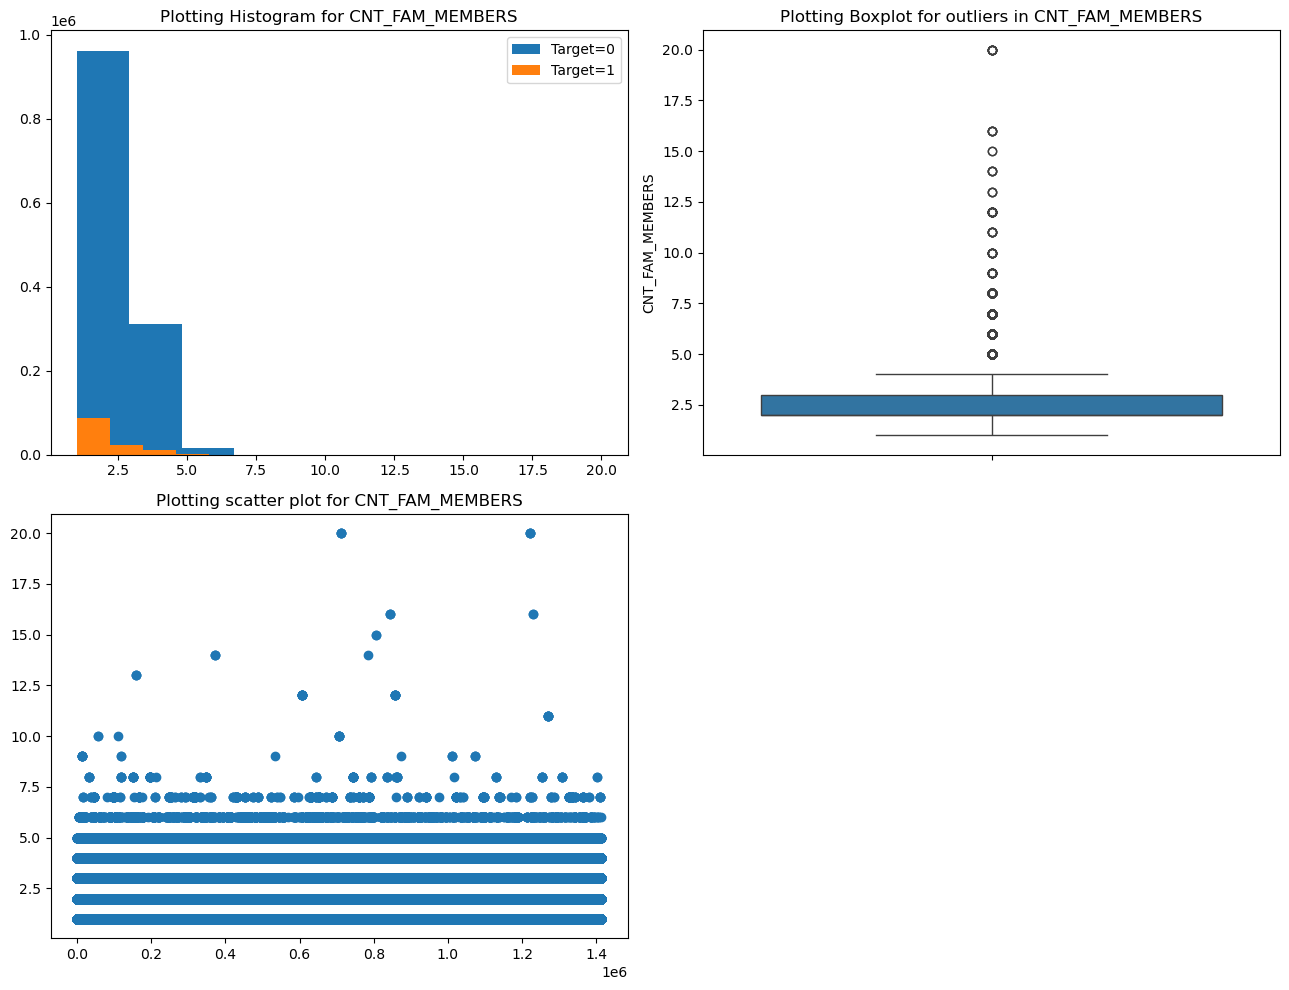



Plotting column REGION_RATING_CLIENT


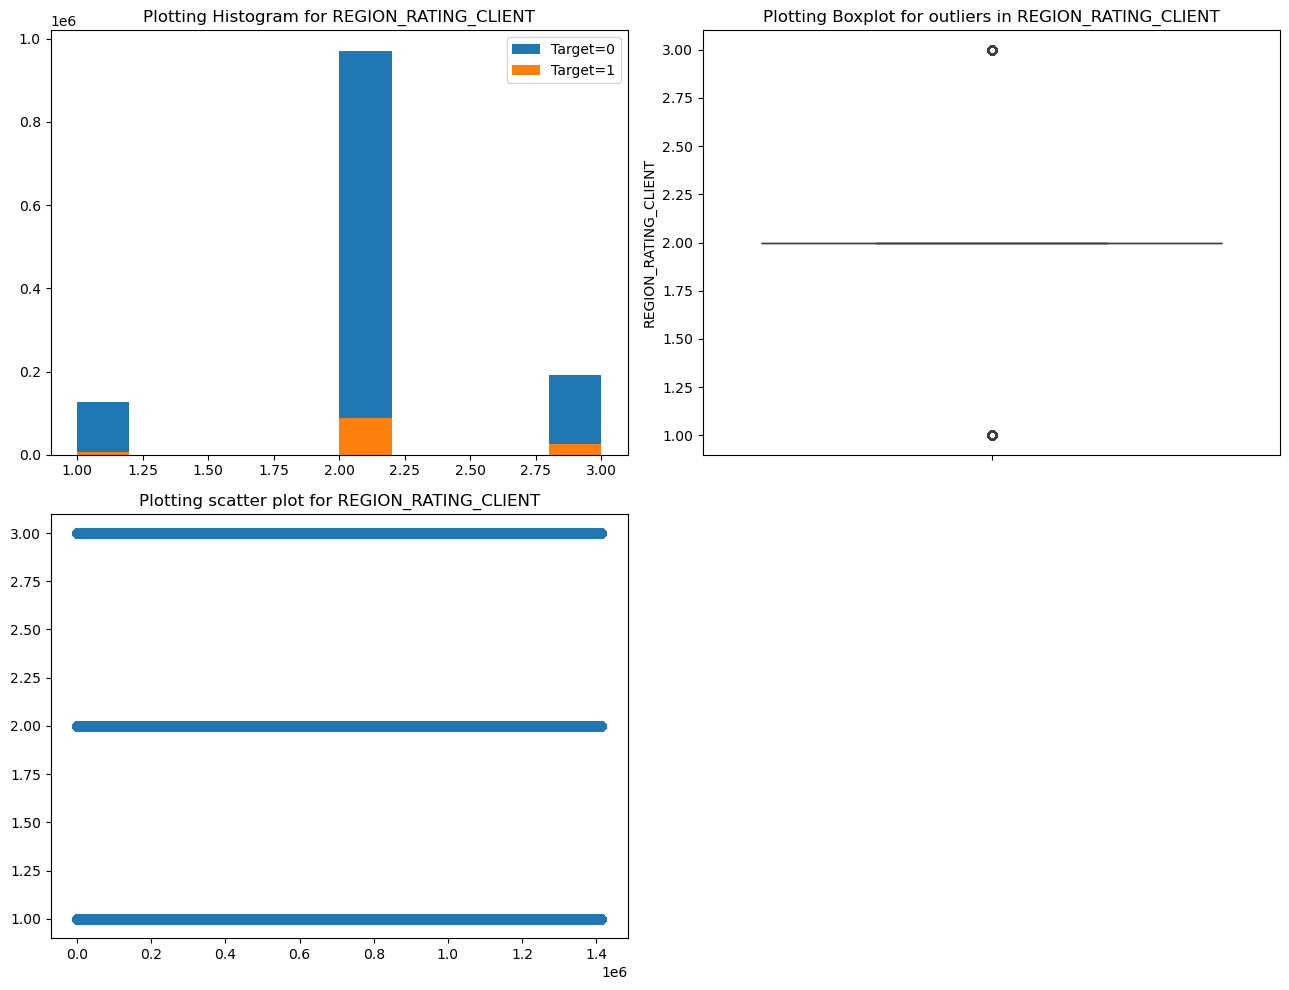



Plotting column REGION_RATING_CLIENT_W_CITY


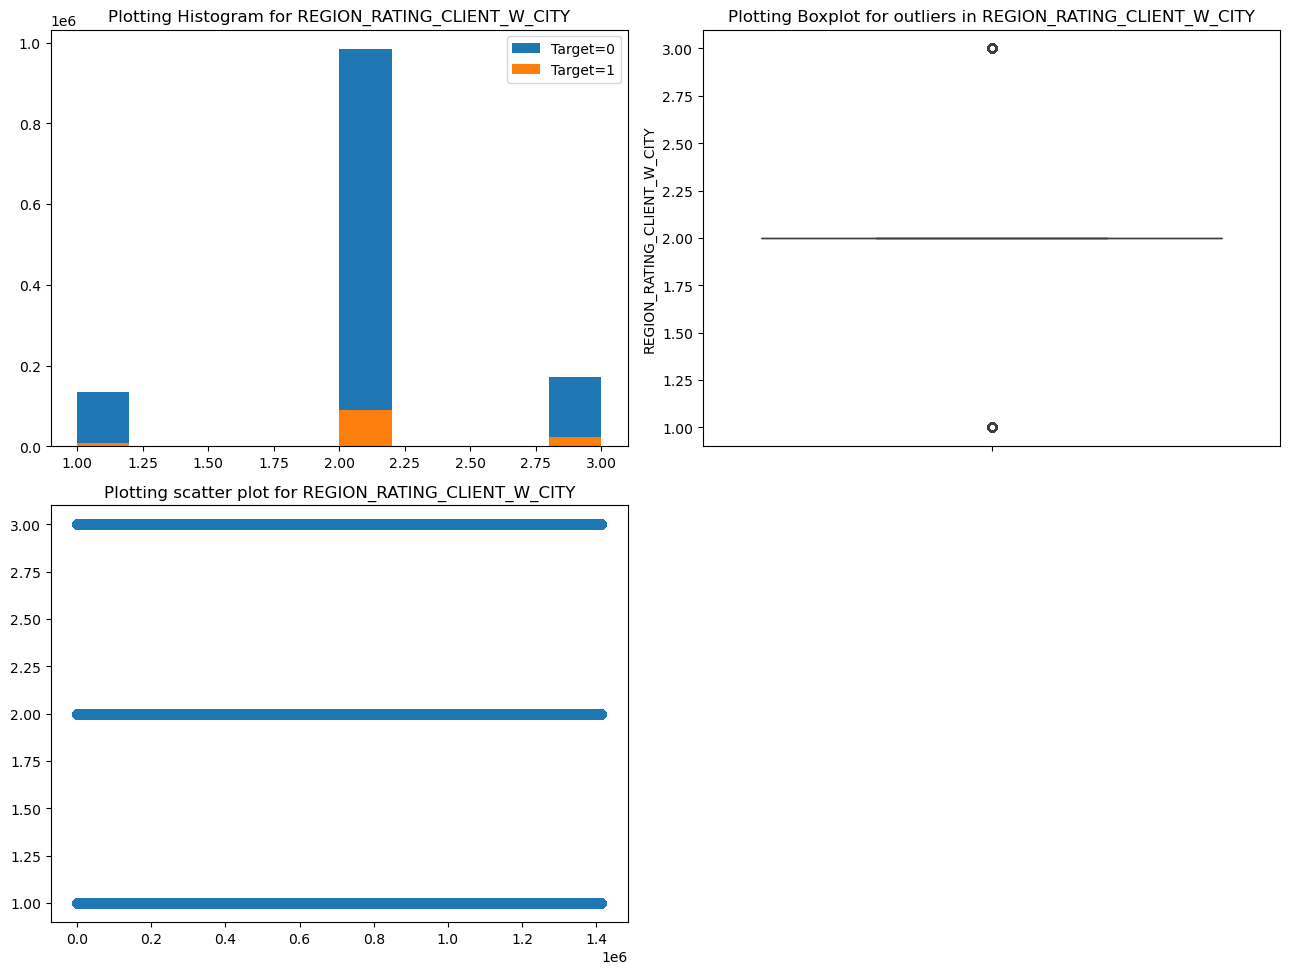



Plotting column HOUR_APPR_PROCESS_START_x


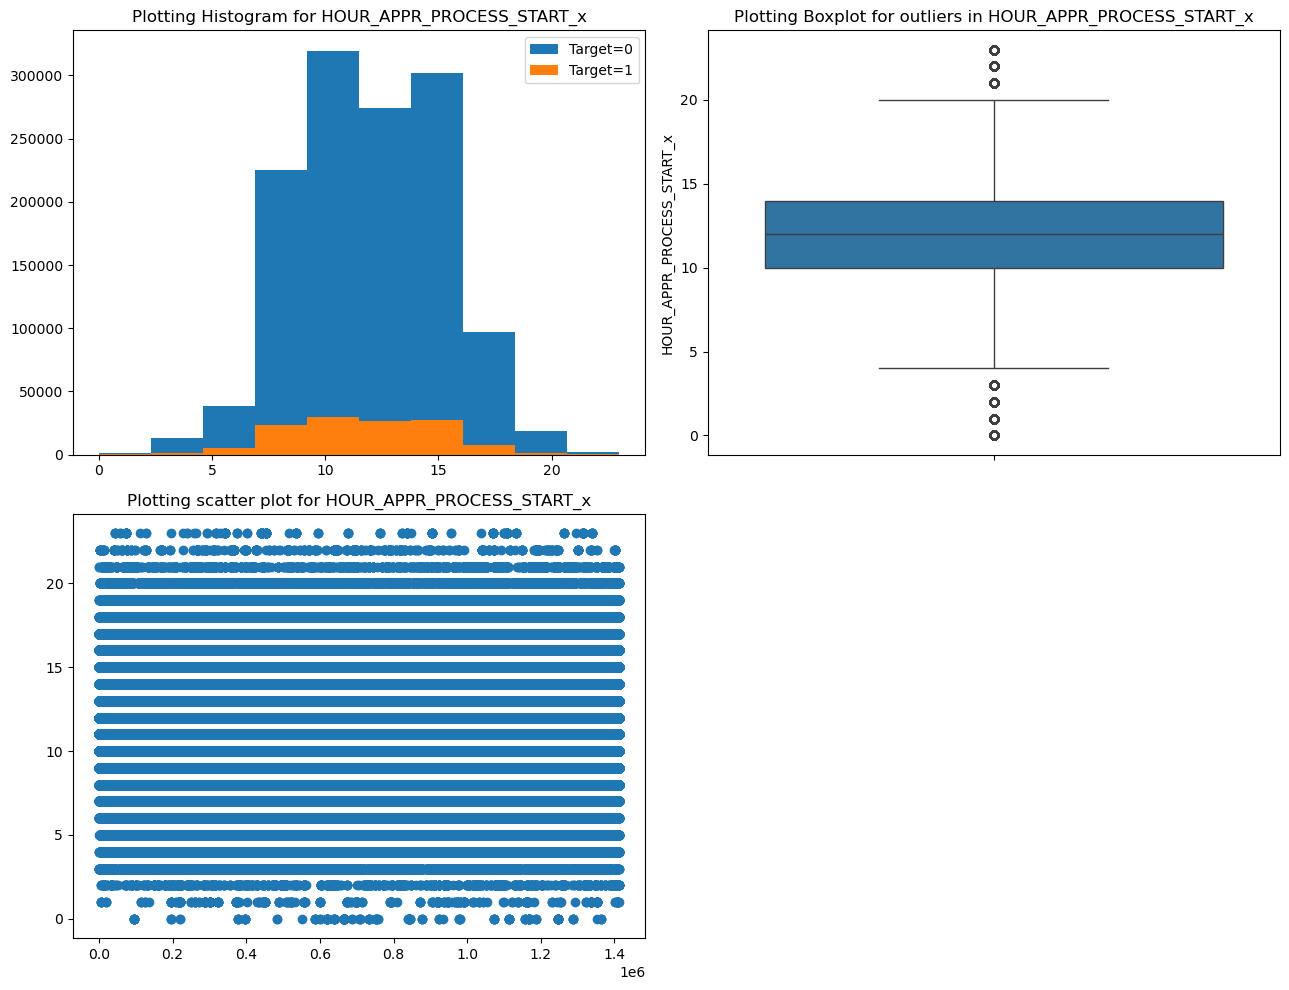



Plotting column REG_REGION_NOT_LIVE_REGION


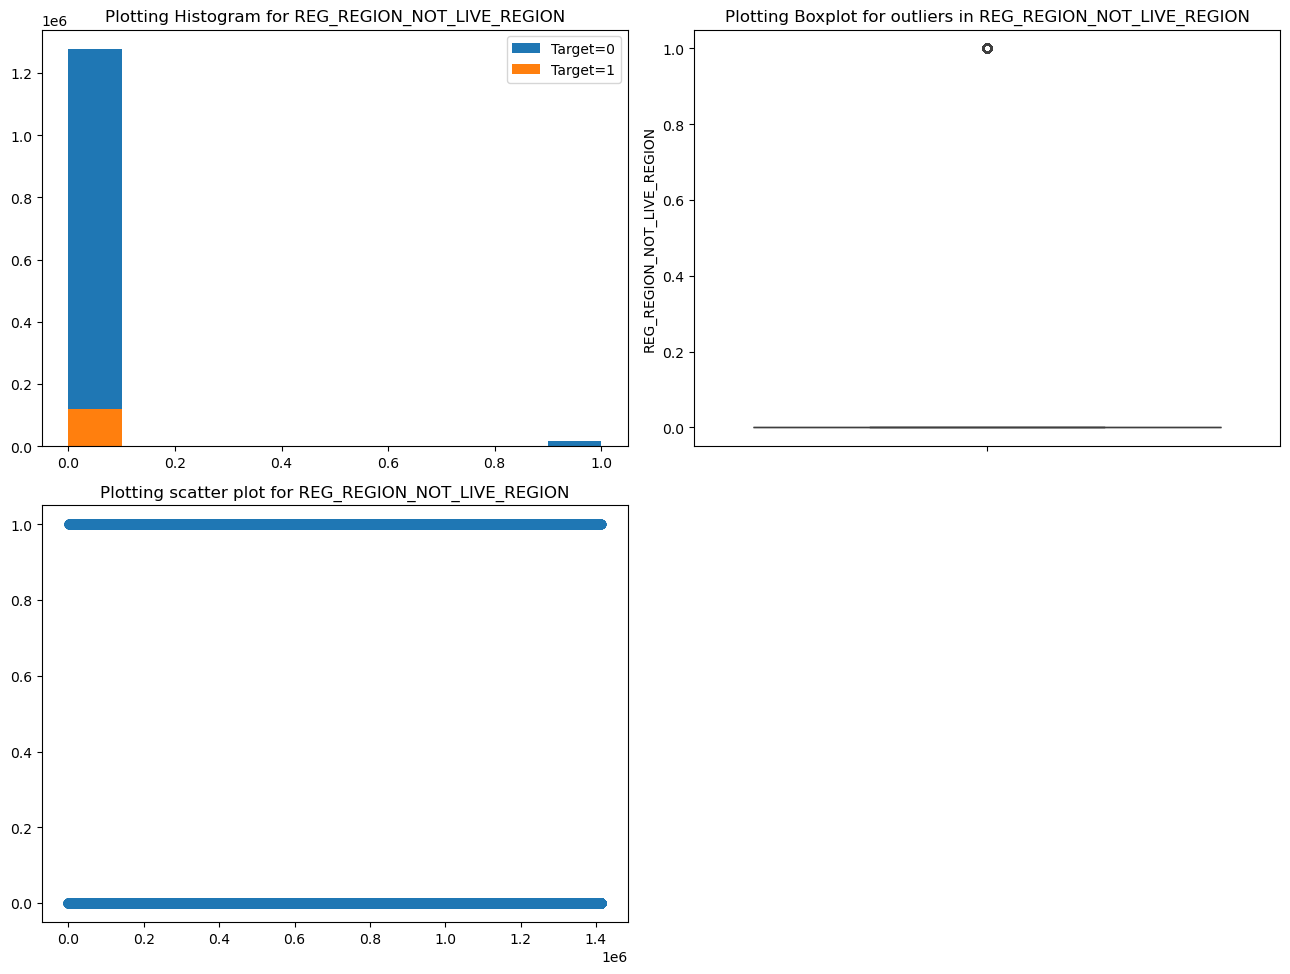



Plotting column REG_REGION_NOT_WORK_REGION


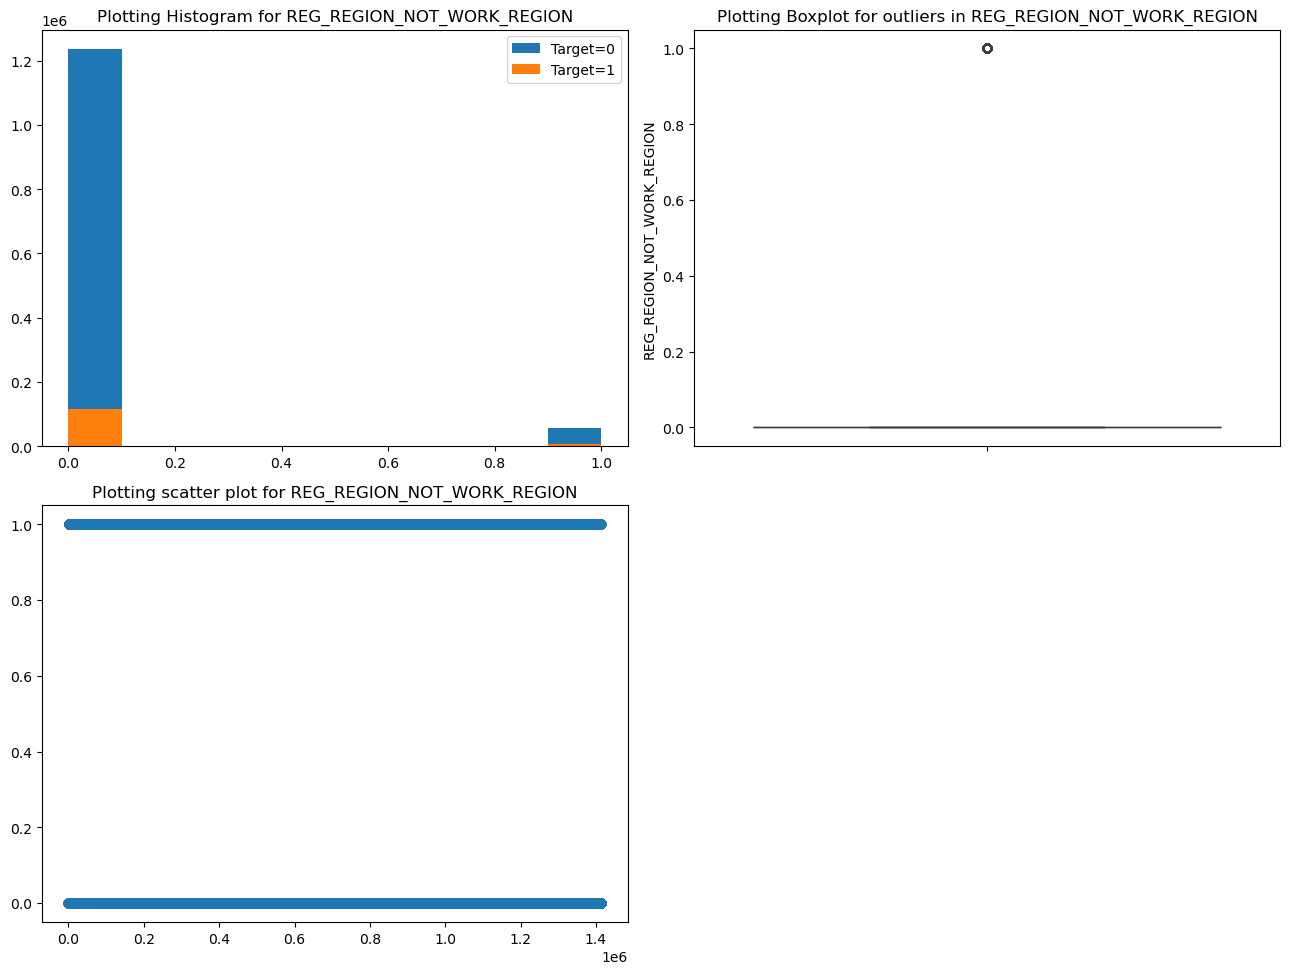



Plotting column LIVE_REGION_NOT_WORK_REGION


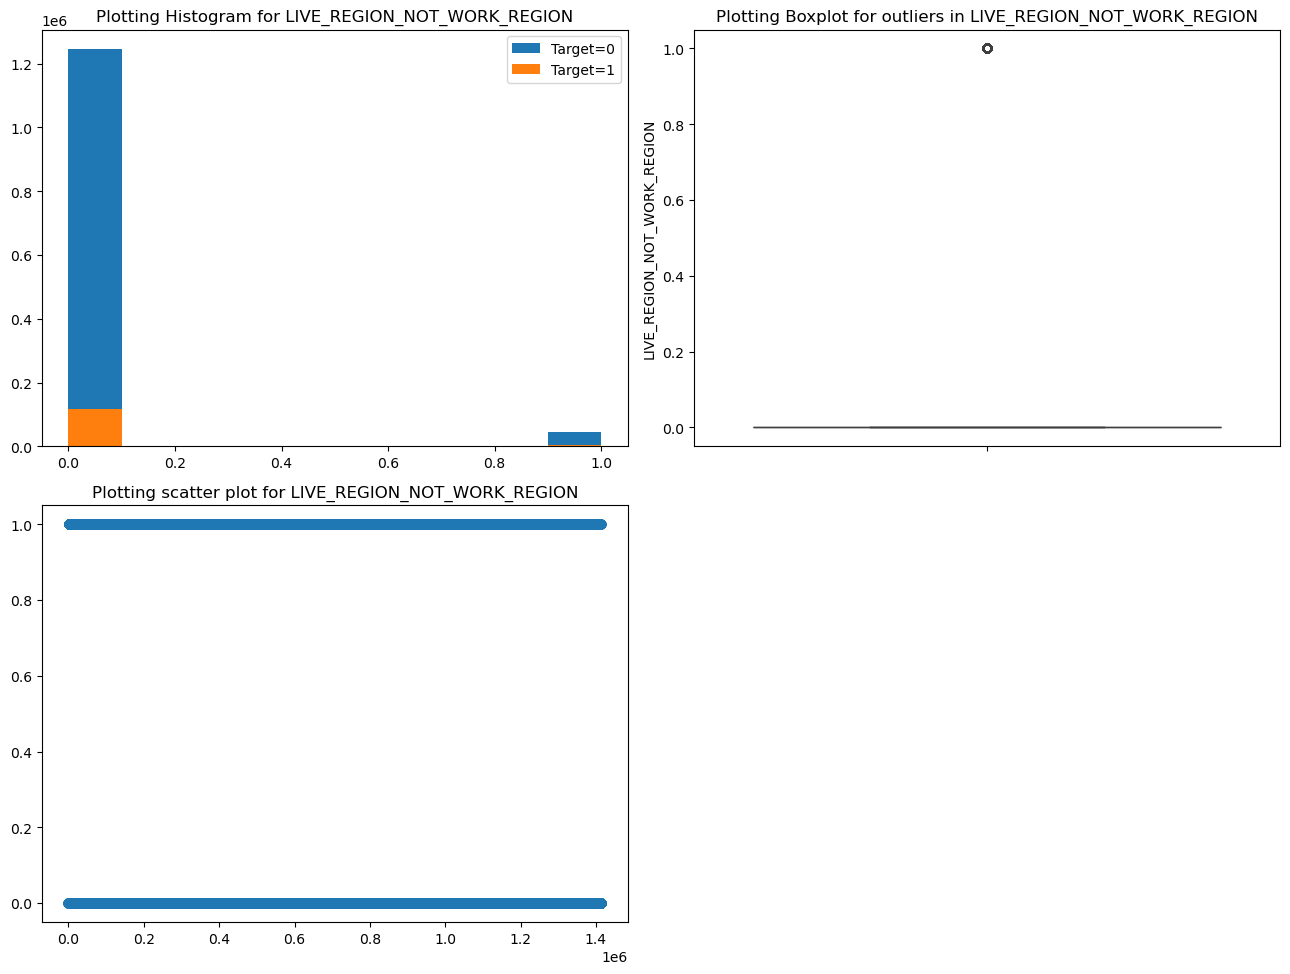



Plotting column REG_CITY_NOT_LIVE_CITY


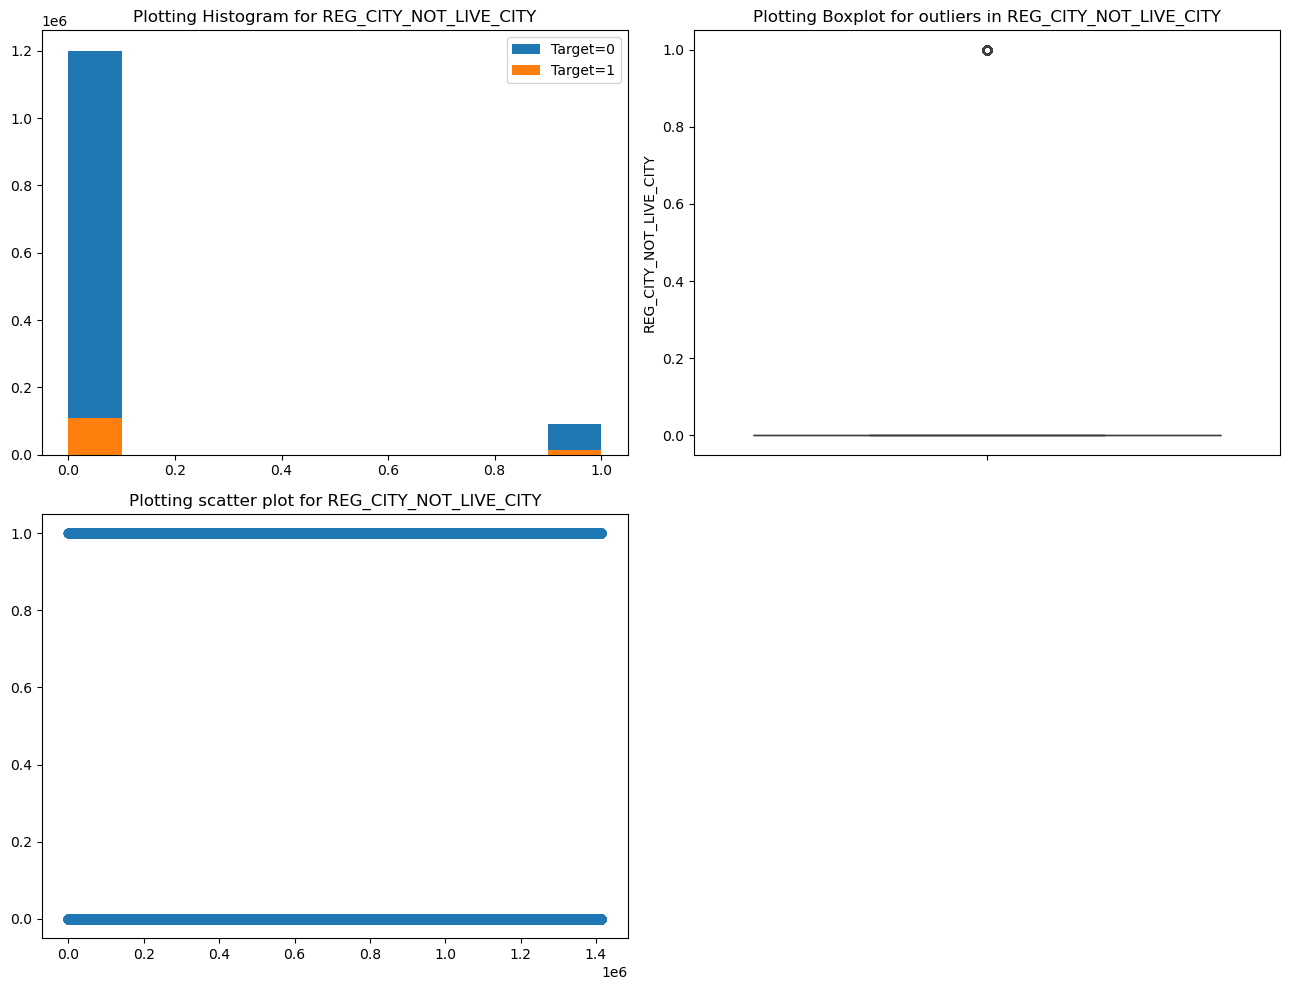



Plotting column REG_CITY_NOT_WORK_CITY


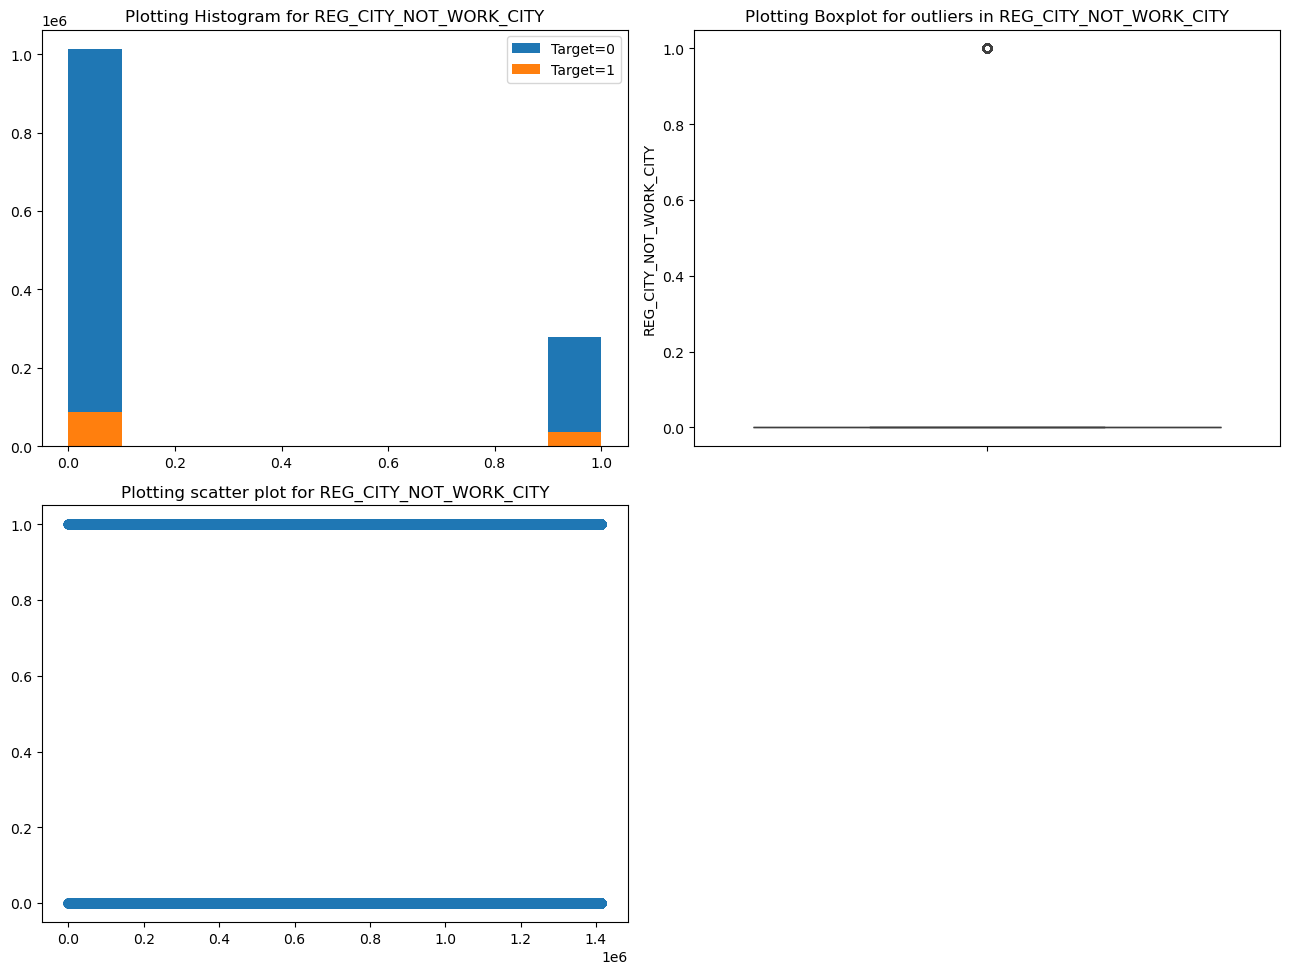



Plotting column LIVE_CITY_NOT_WORK_CITY


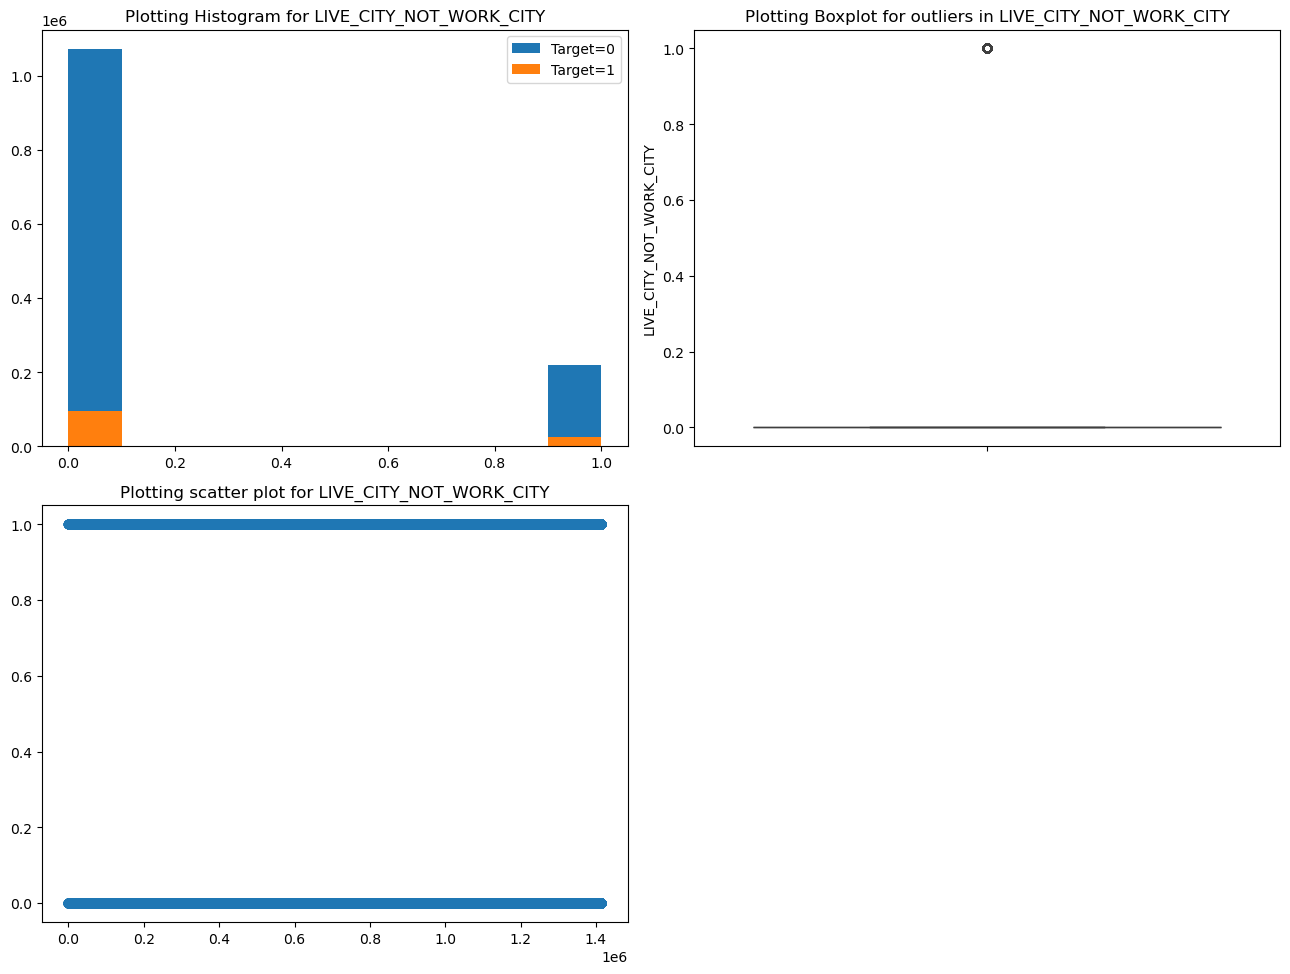



Plotting column EXT_SOURCE_2


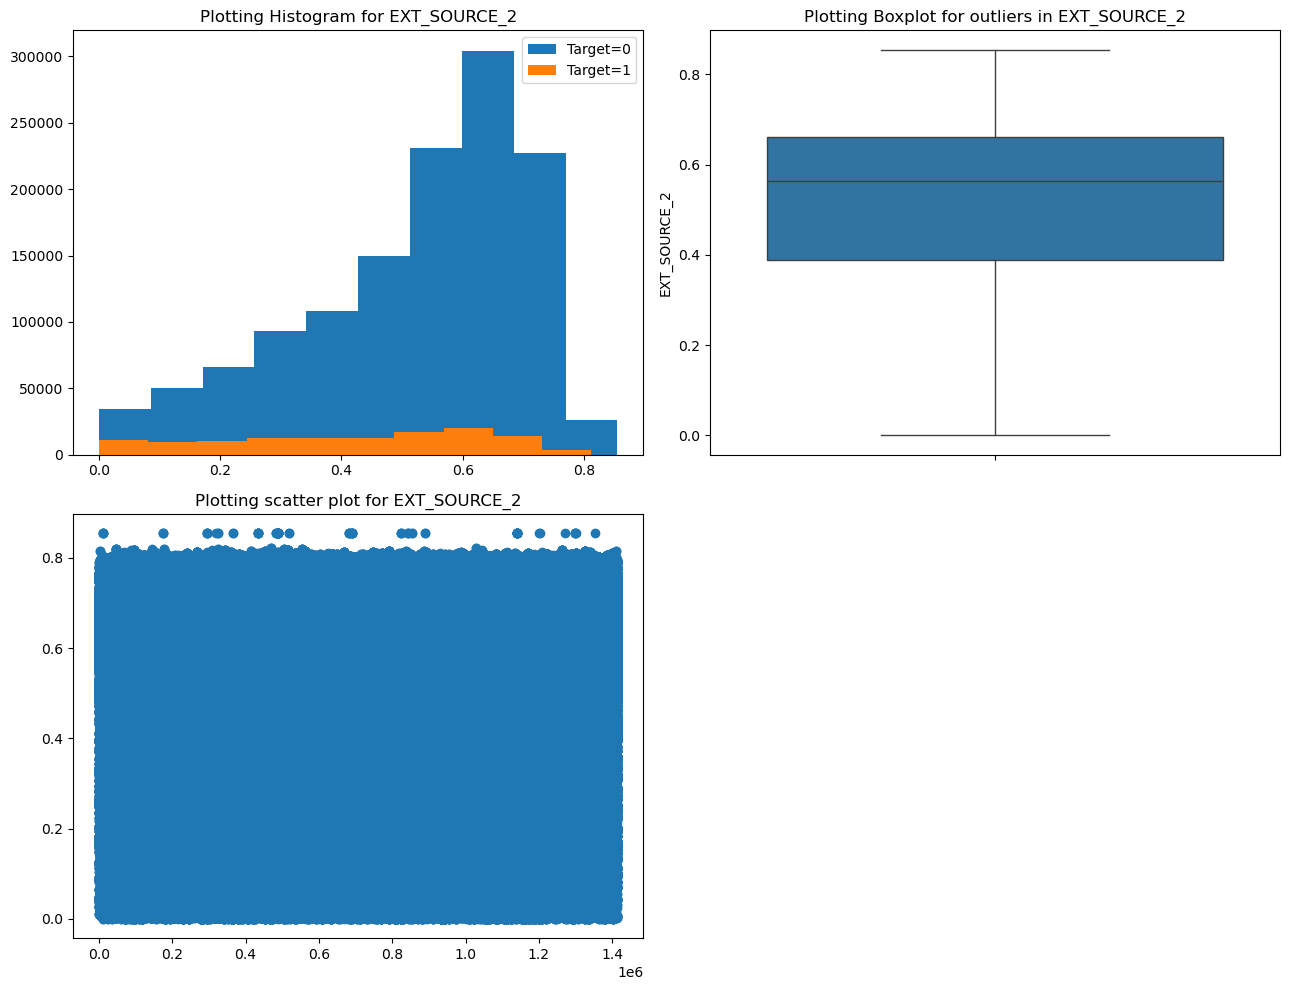



Plotting column EXT_SOURCE_3


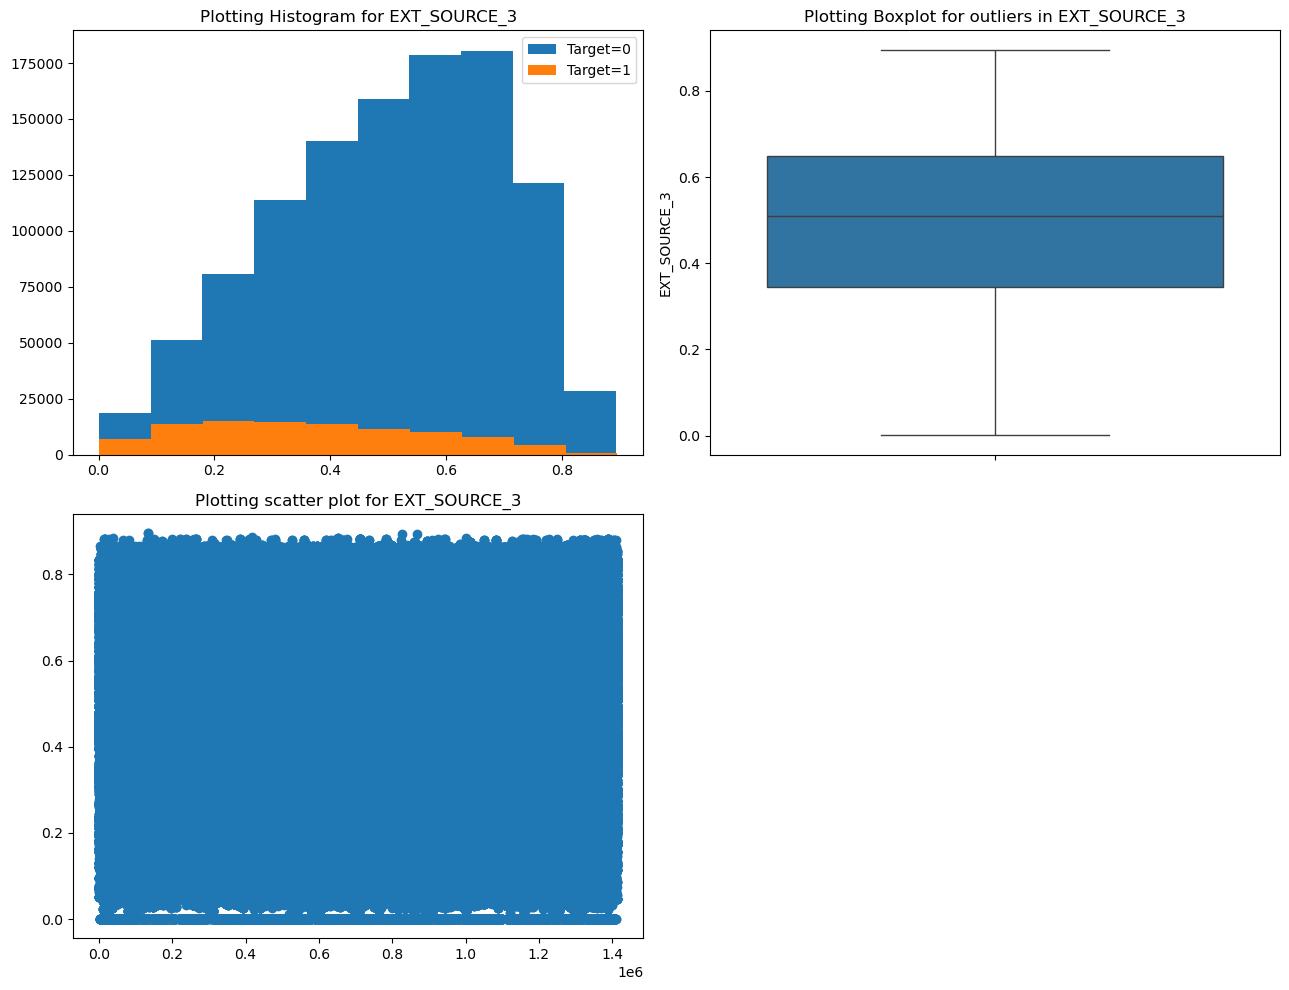



Plotting column YEARS_BEGINEXPLUATATION_AVG


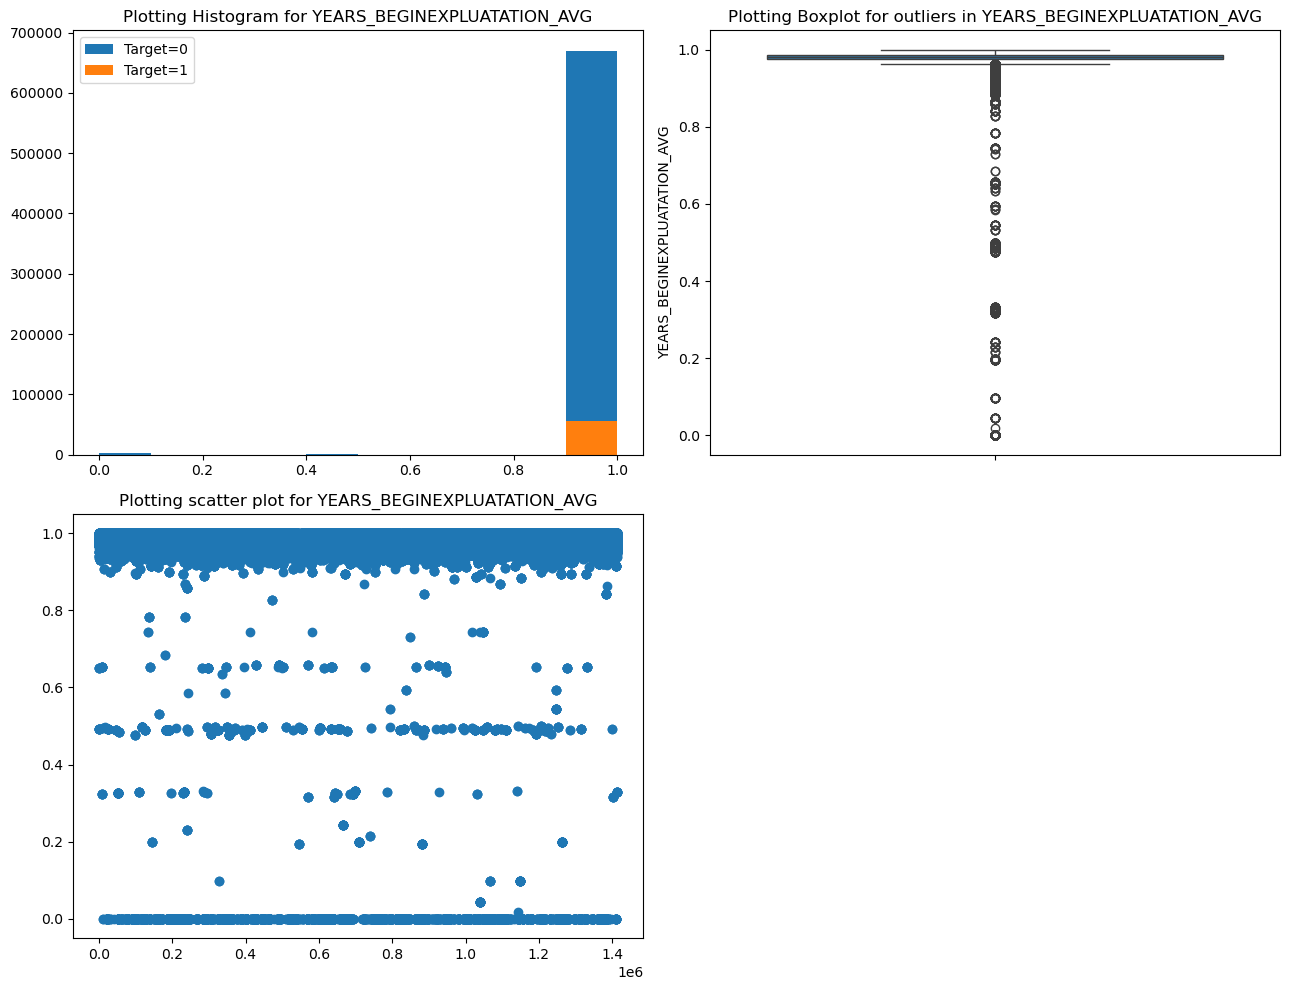



Plotting column ENTRANCES_AVG


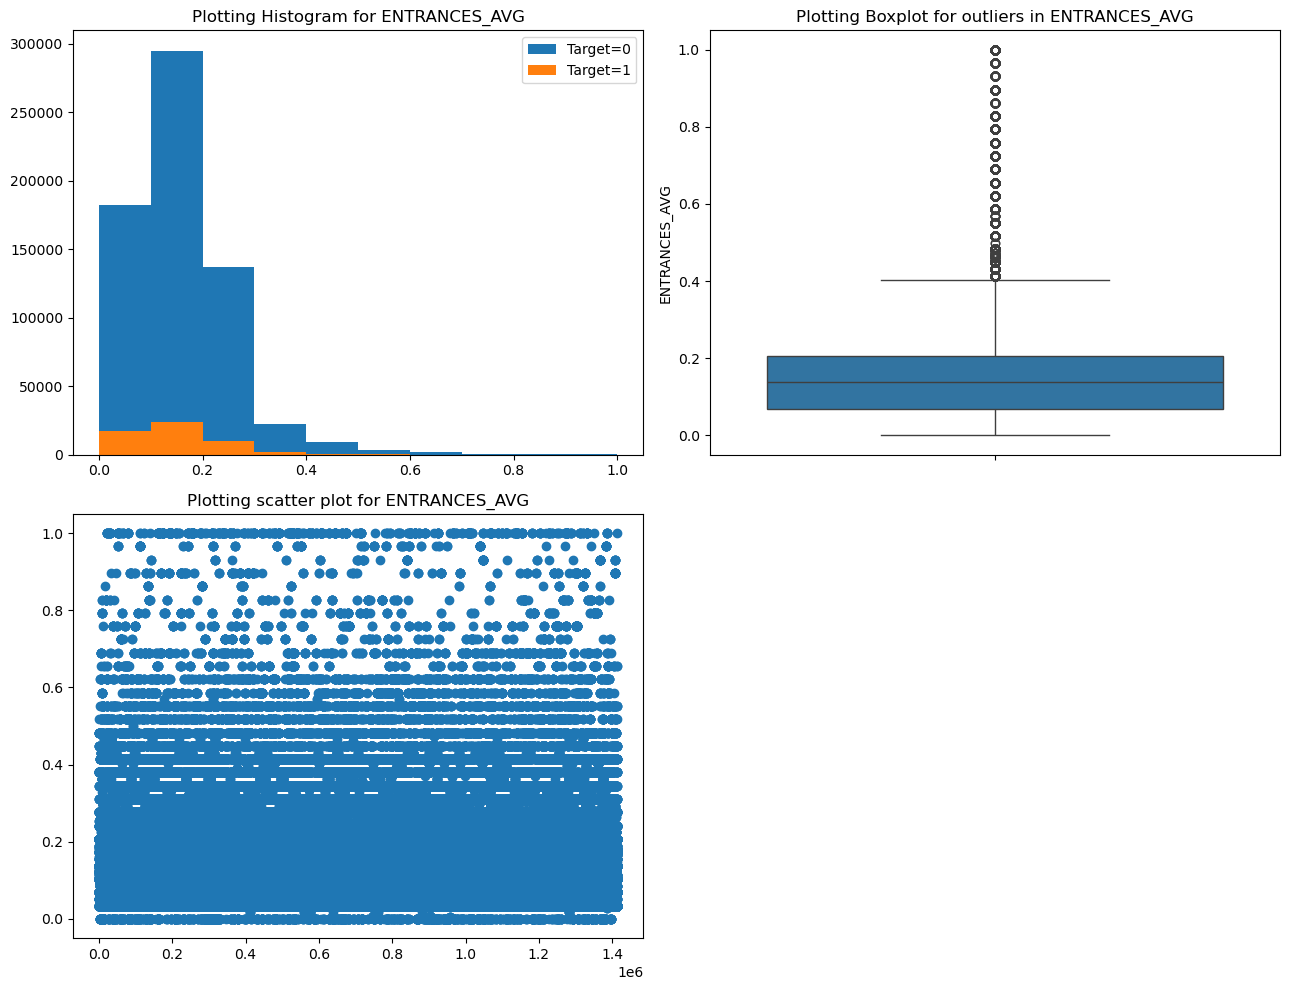



Plotting column FLOORSMAX_AVG


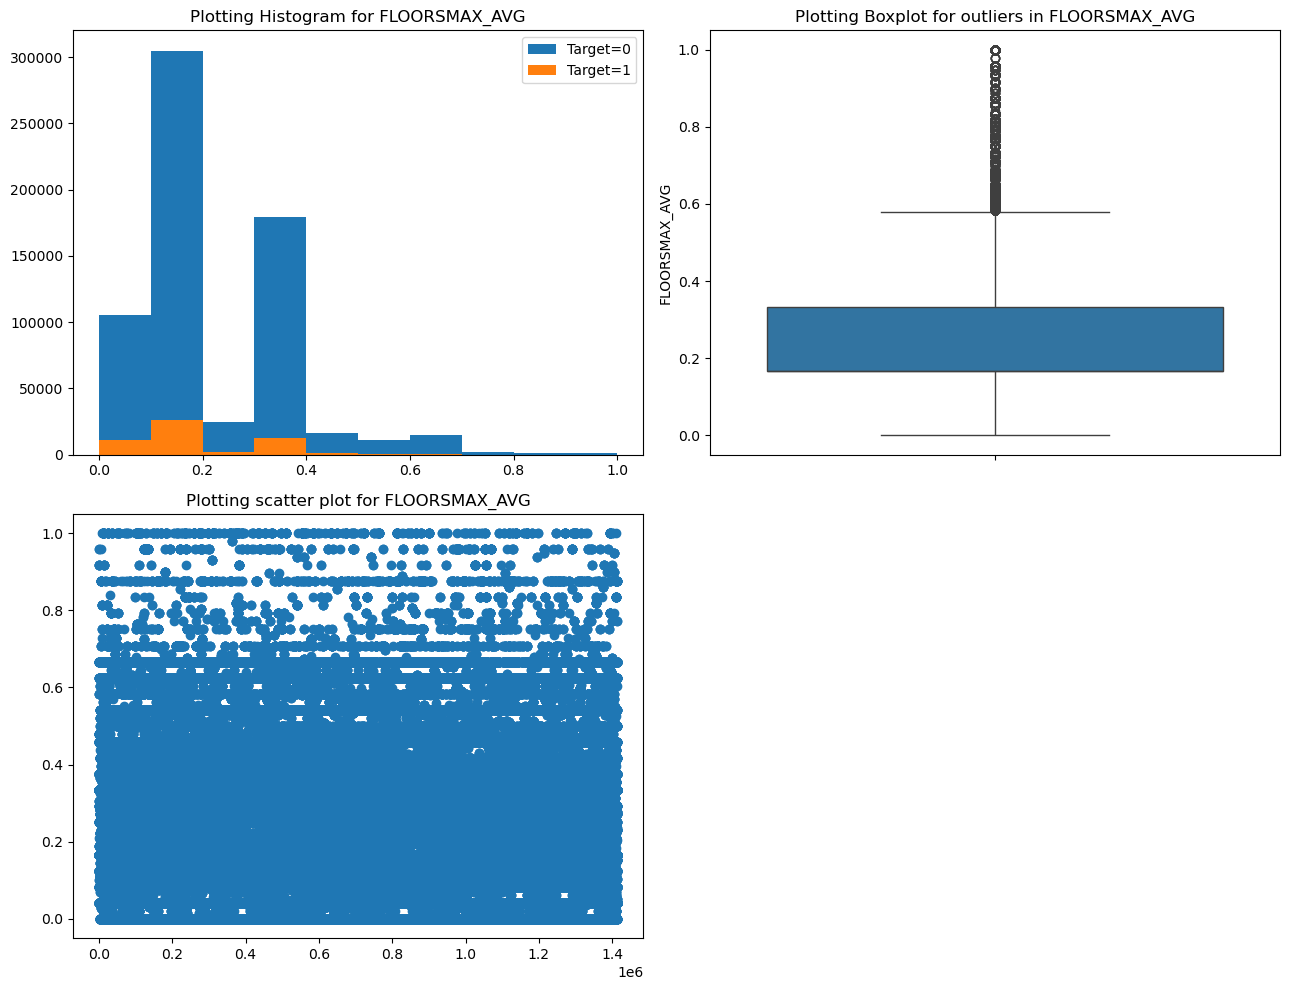



Plotting column LIVINGAREA_AVG


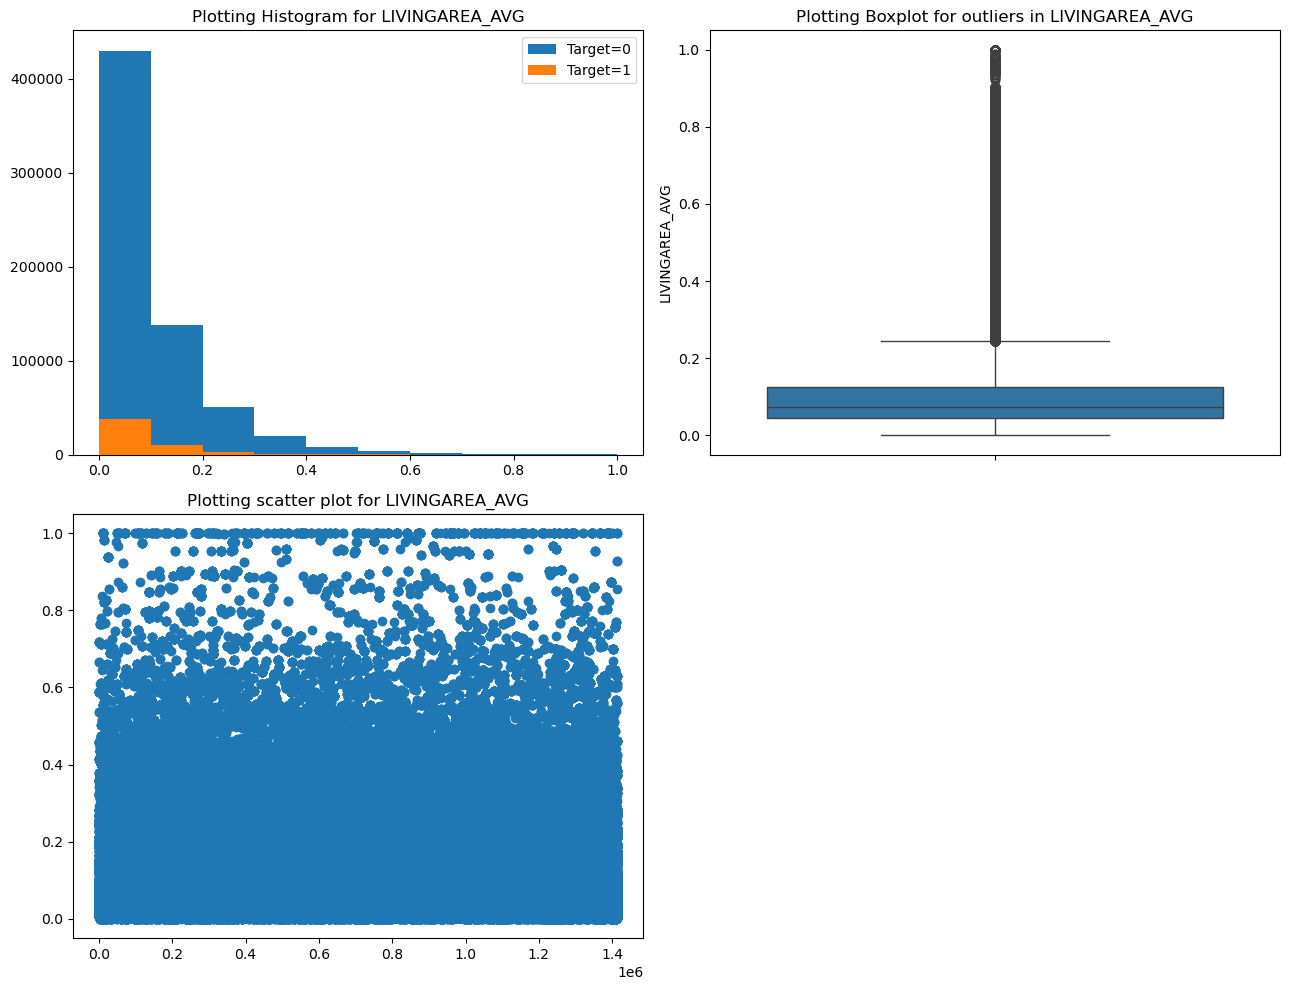



Plotting column YEARS_BEGINEXPLUATATION_MODE


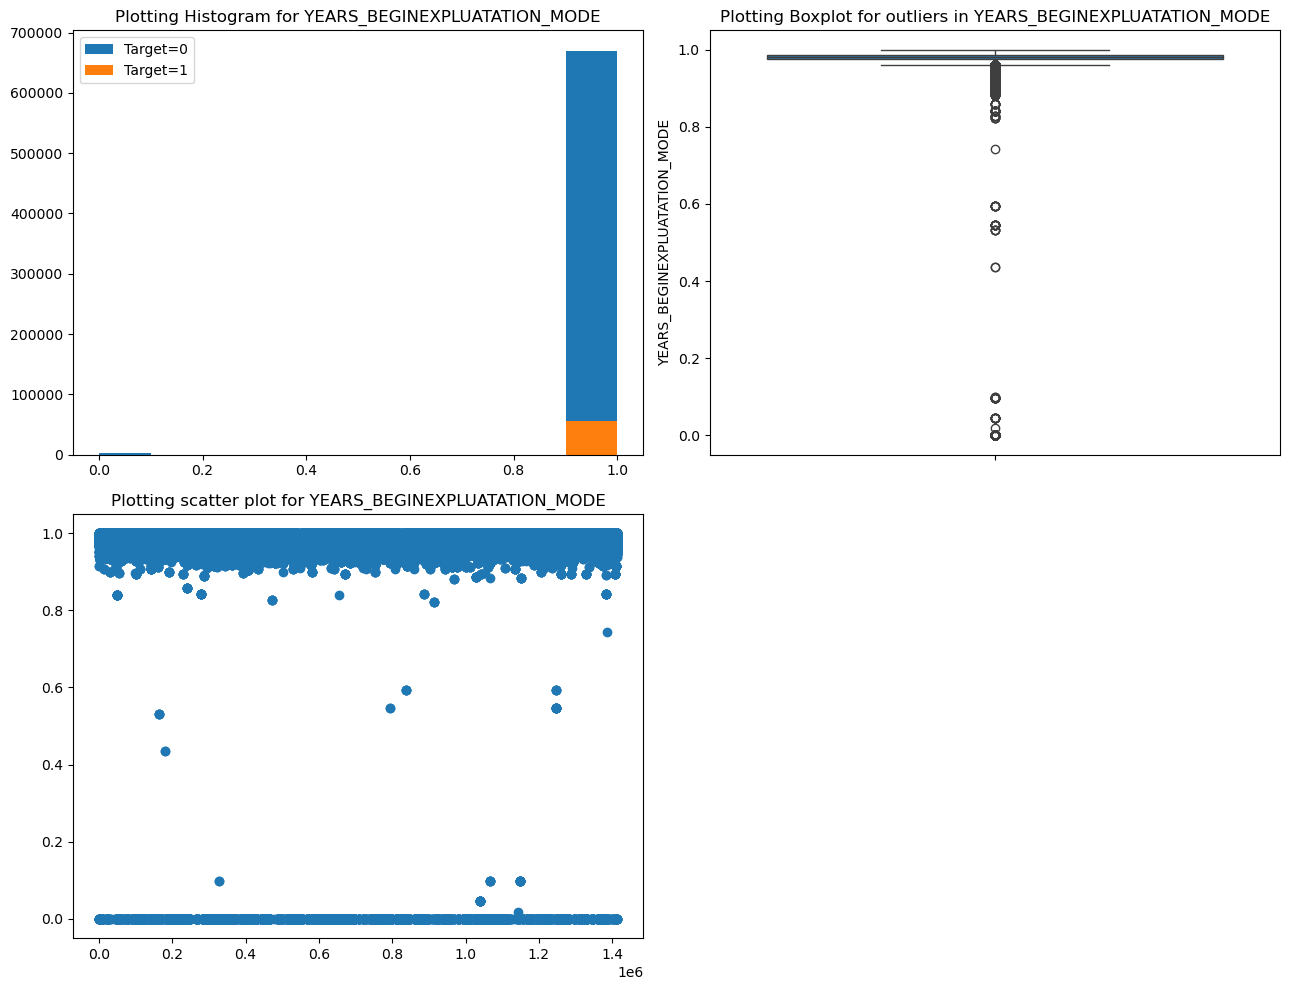



Plotting column ENTRANCES_MODE


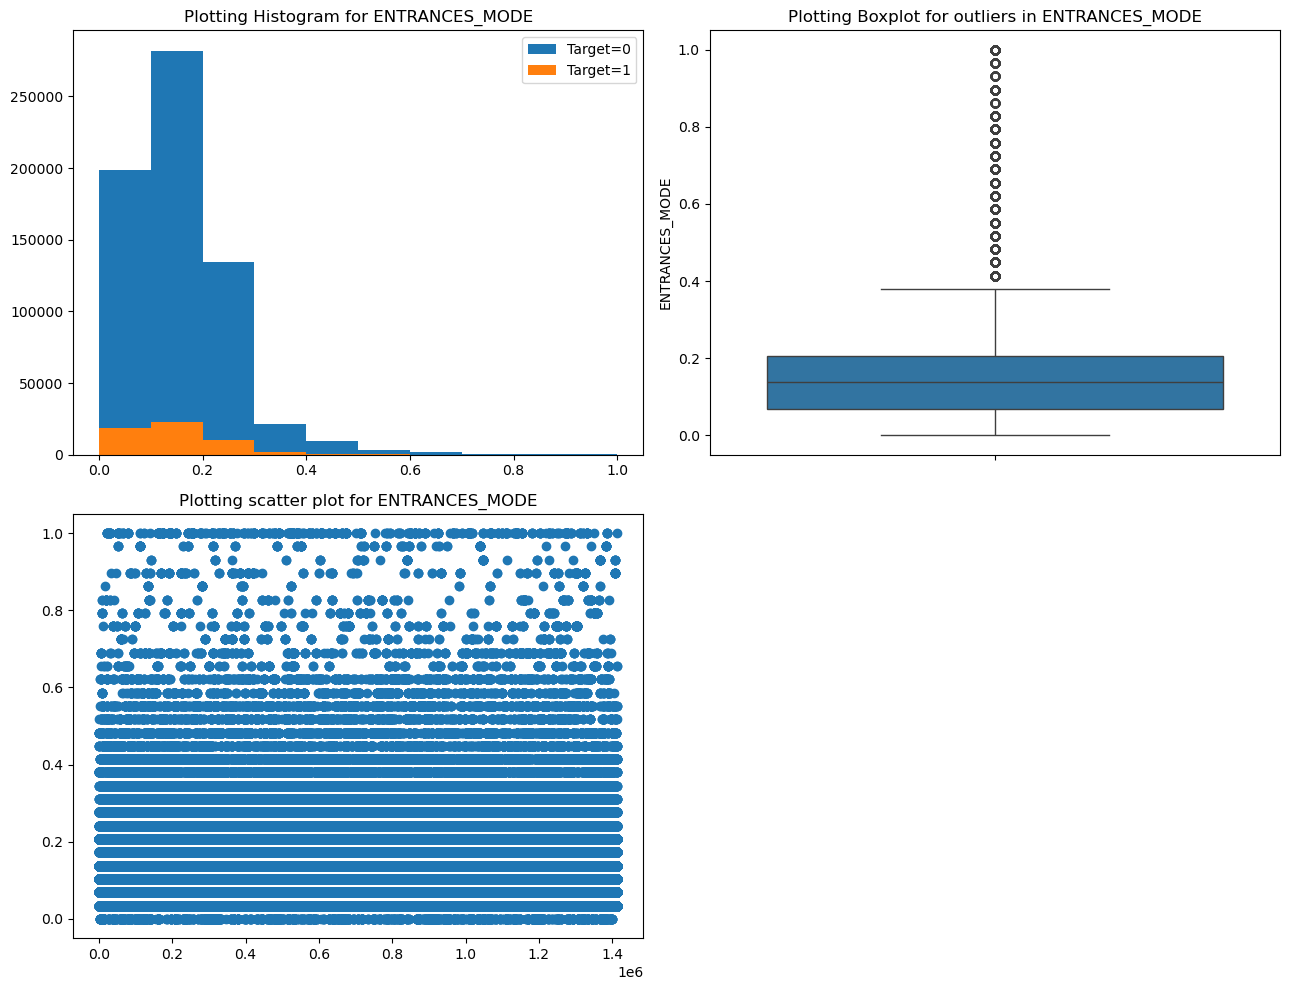



Plotting column FLOORSMAX_MODE


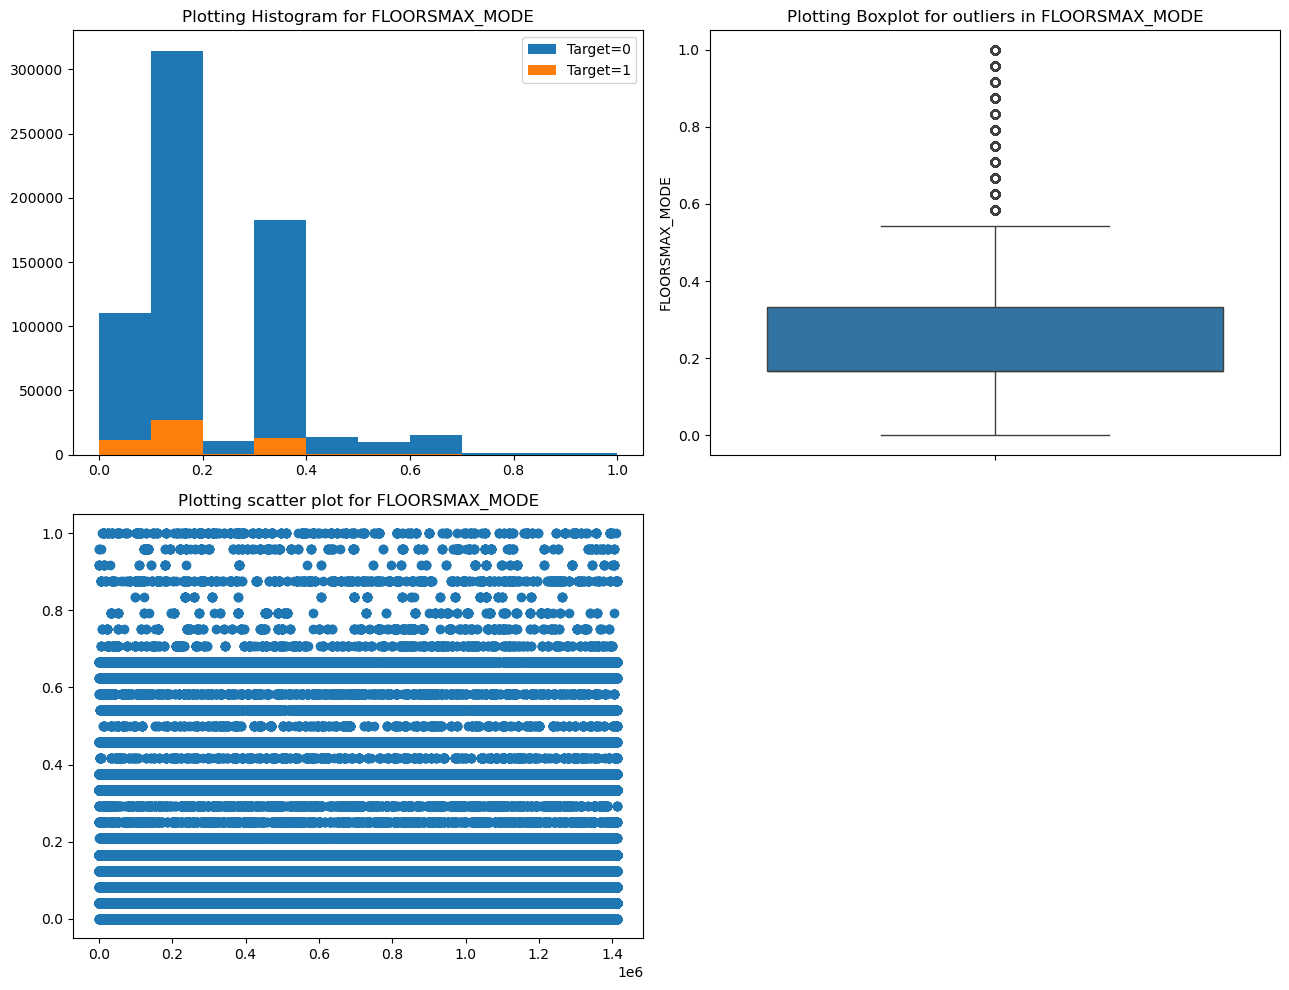



Plotting column LIVINGAREA_MODE


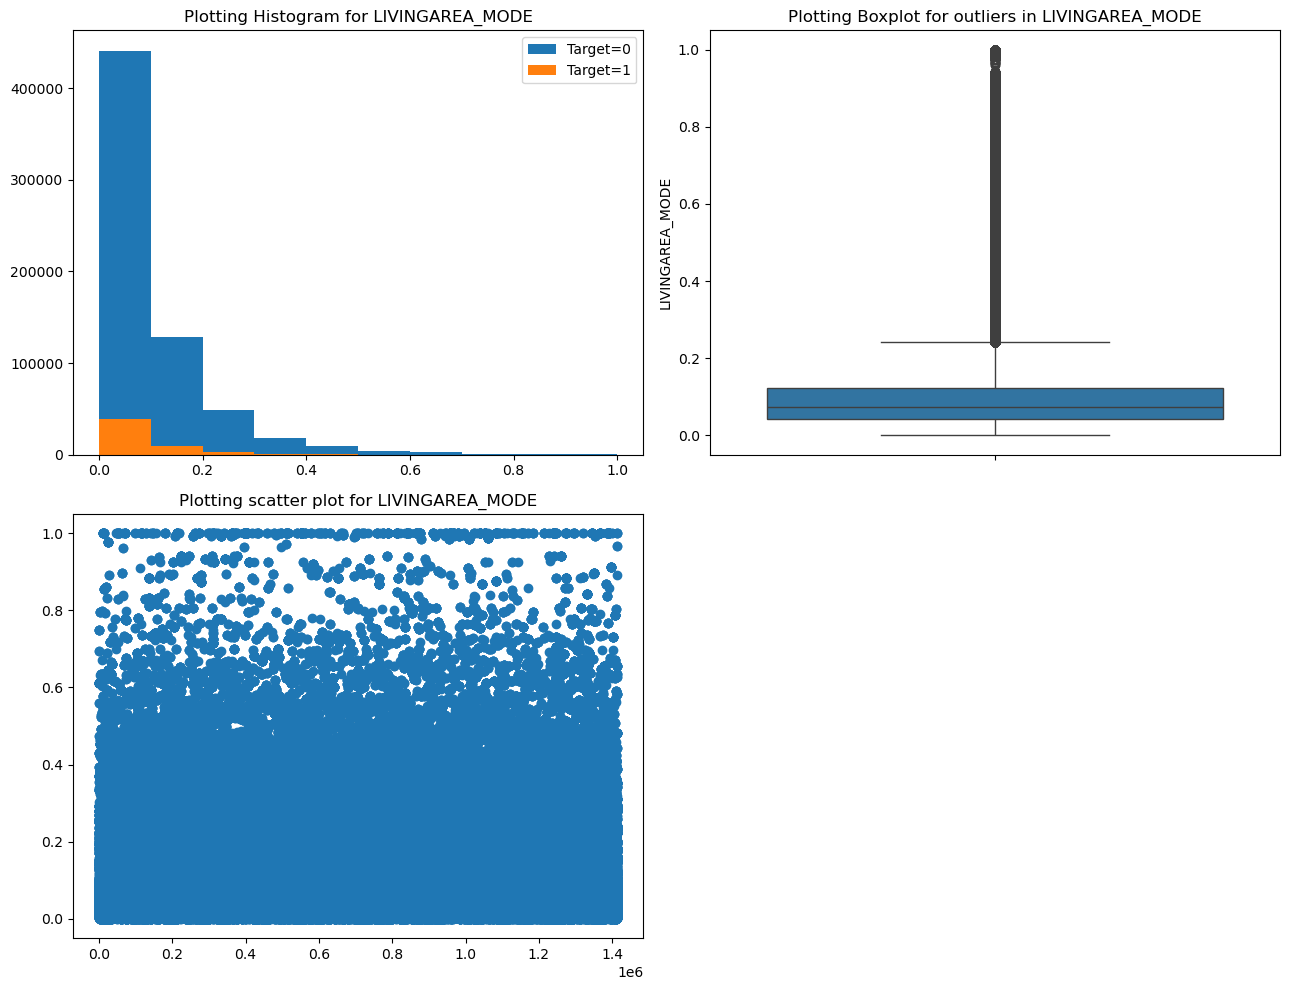



Plotting column YEARS_BEGINEXPLUATATION_MEDI


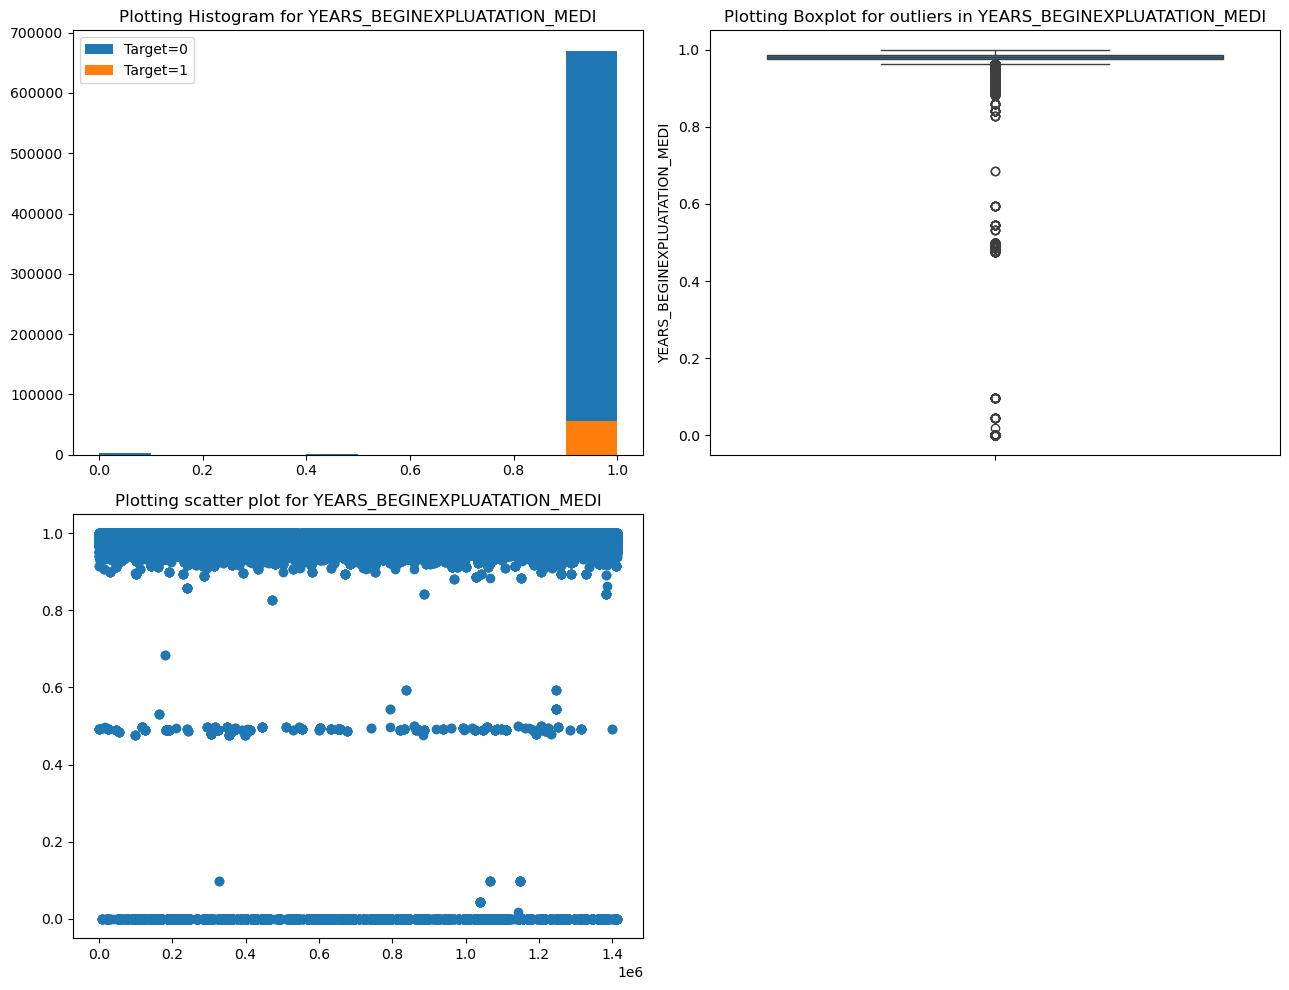



Plotting column ENTRANCES_MEDI


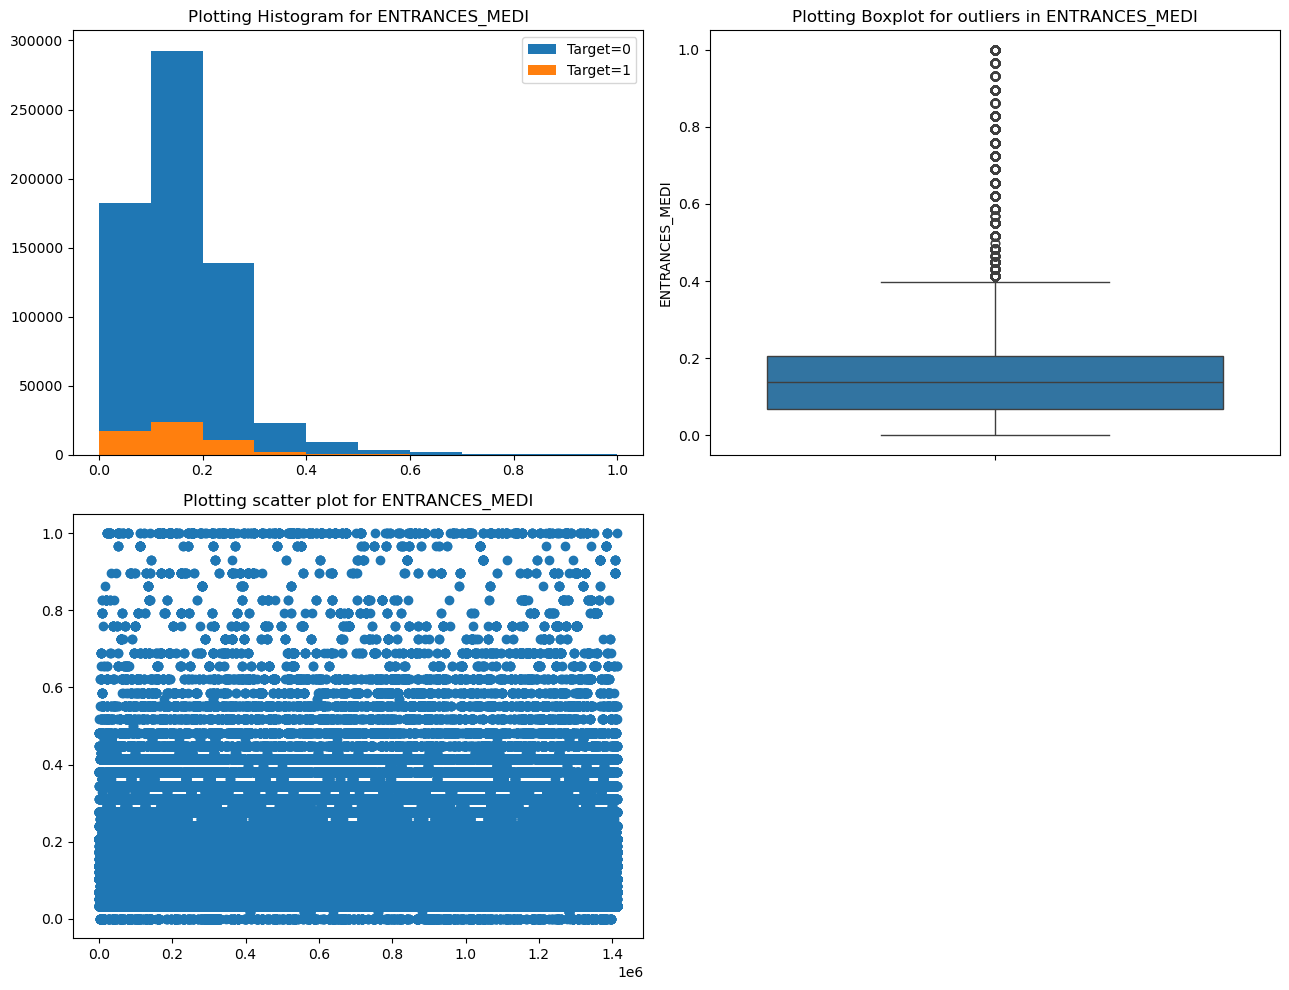



Plotting column FLOORSMAX_MEDI


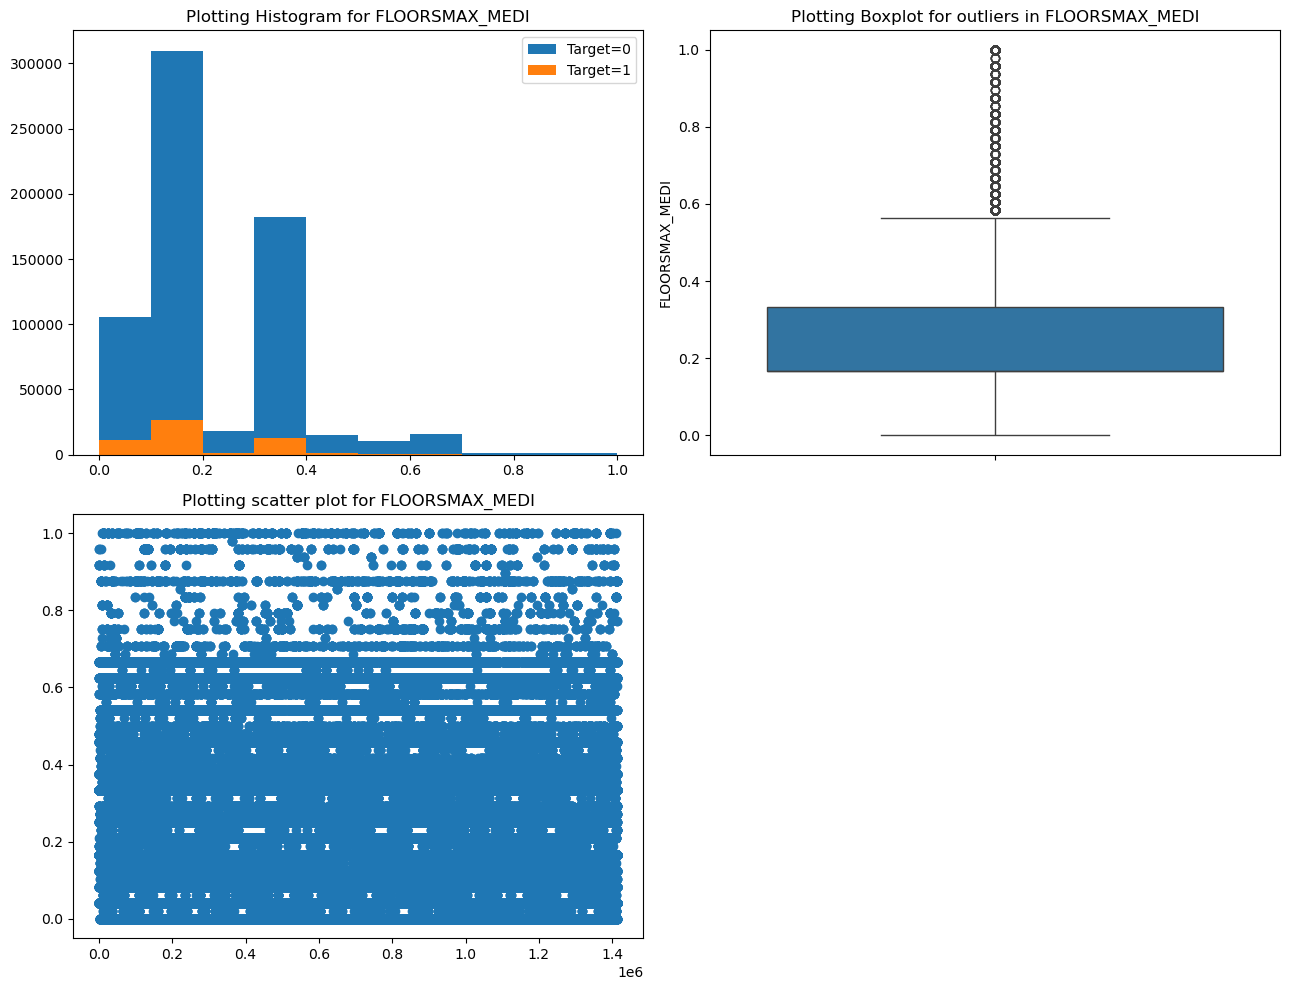



Plotting column LIVINGAREA_MEDI


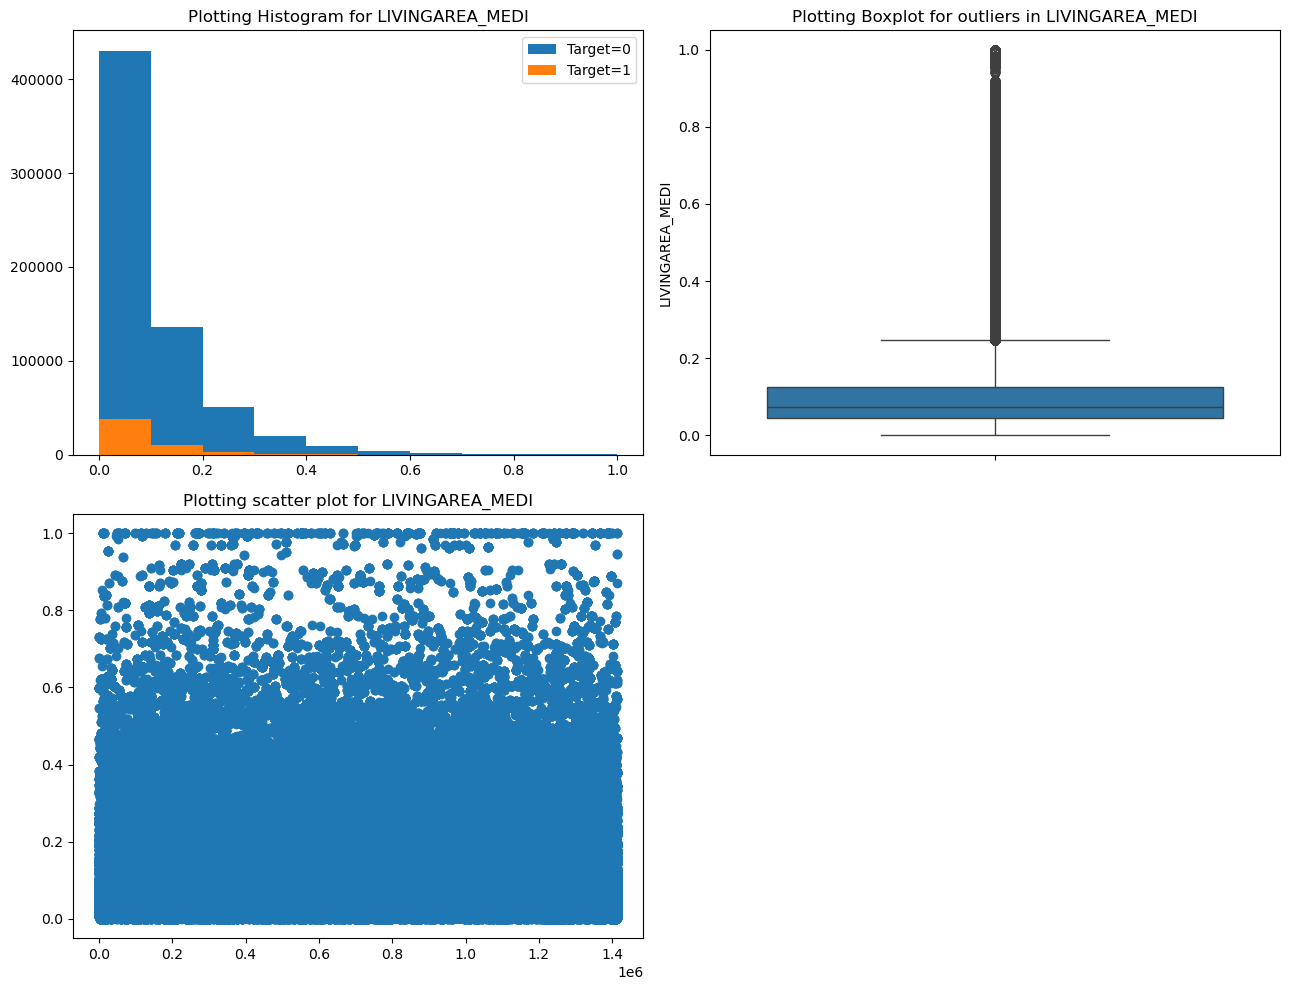



Plotting column TOTALAREA_MODE


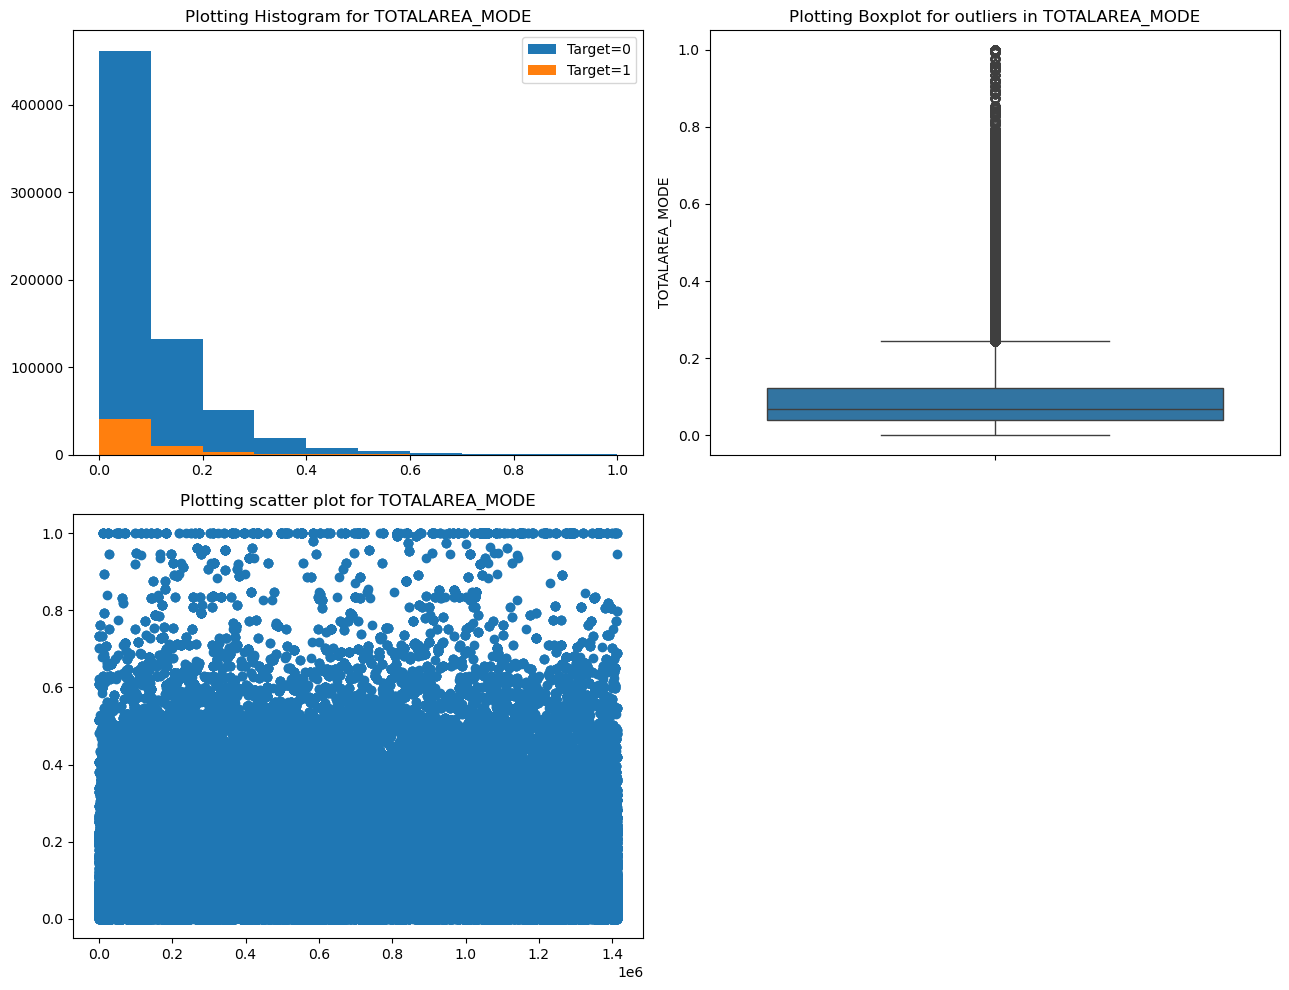



Plotting column OBS_30_CNT_SOCIAL_CIRCLE


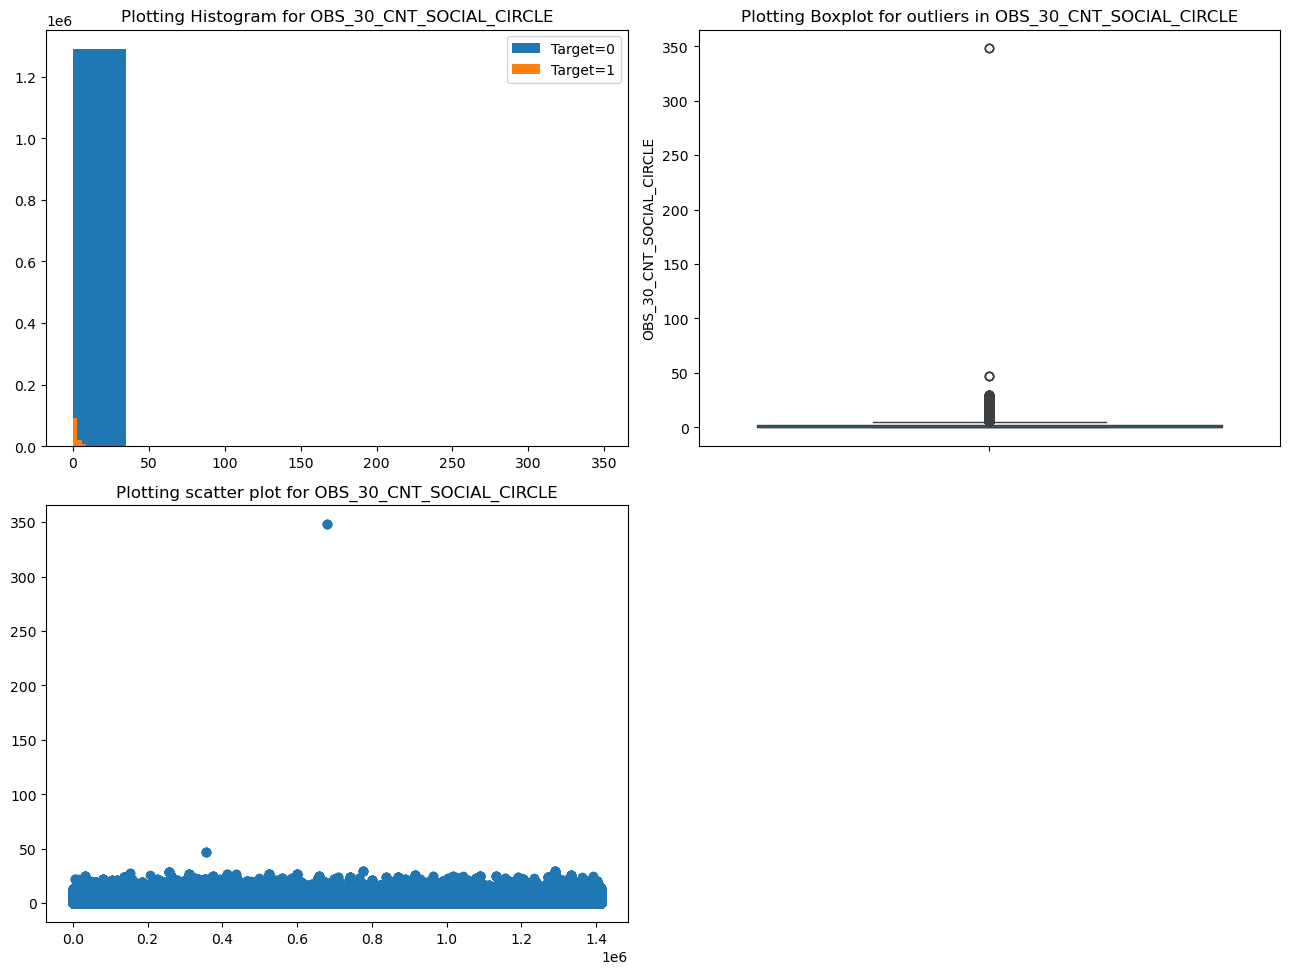



Plotting column DEF_30_CNT_SOCIAL_CIRCLE


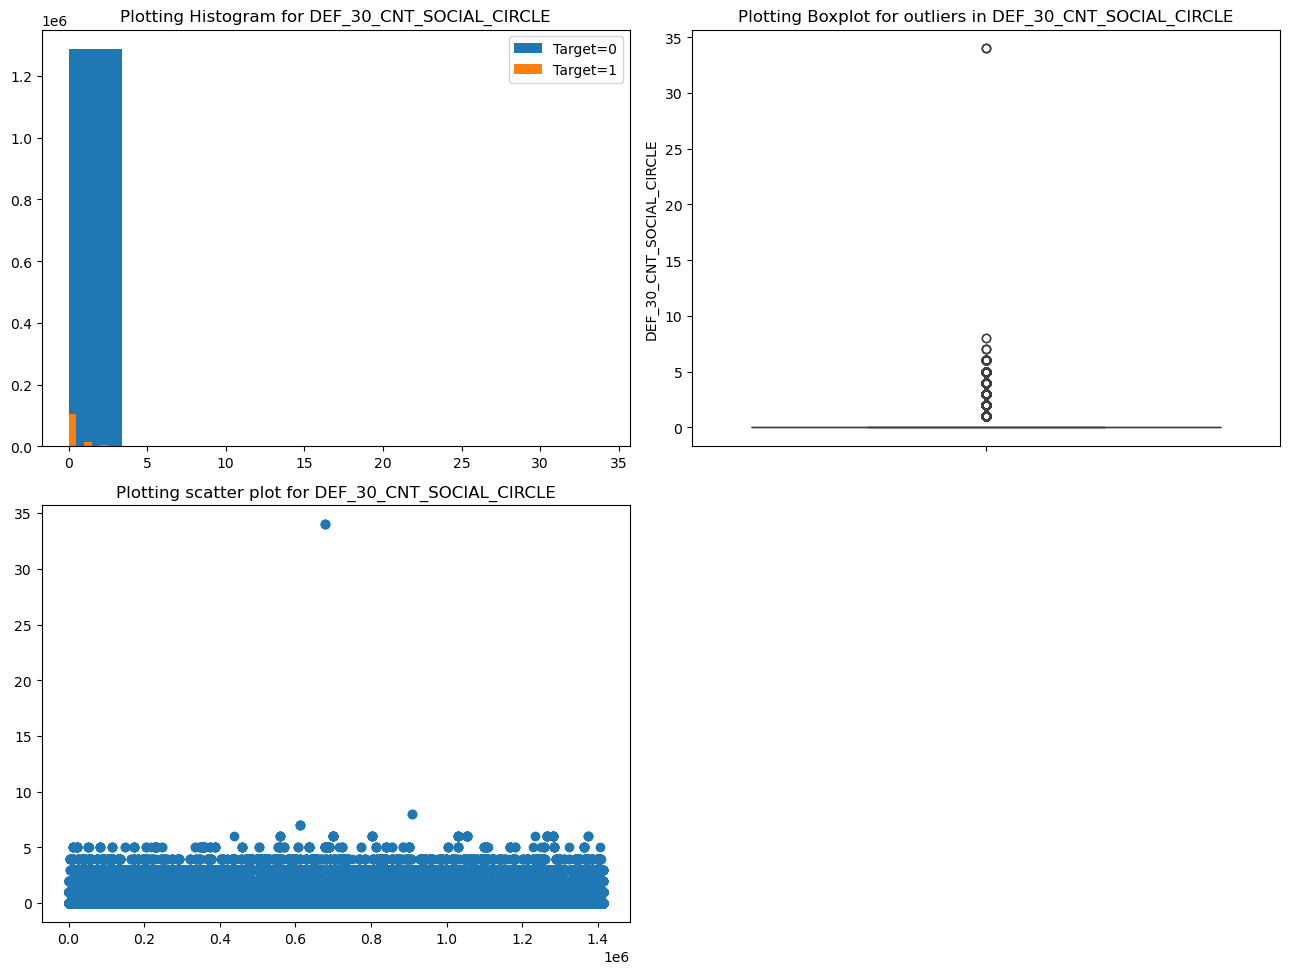



Plotting column OBS_60_CNT_SOCIAL_CIRCLE


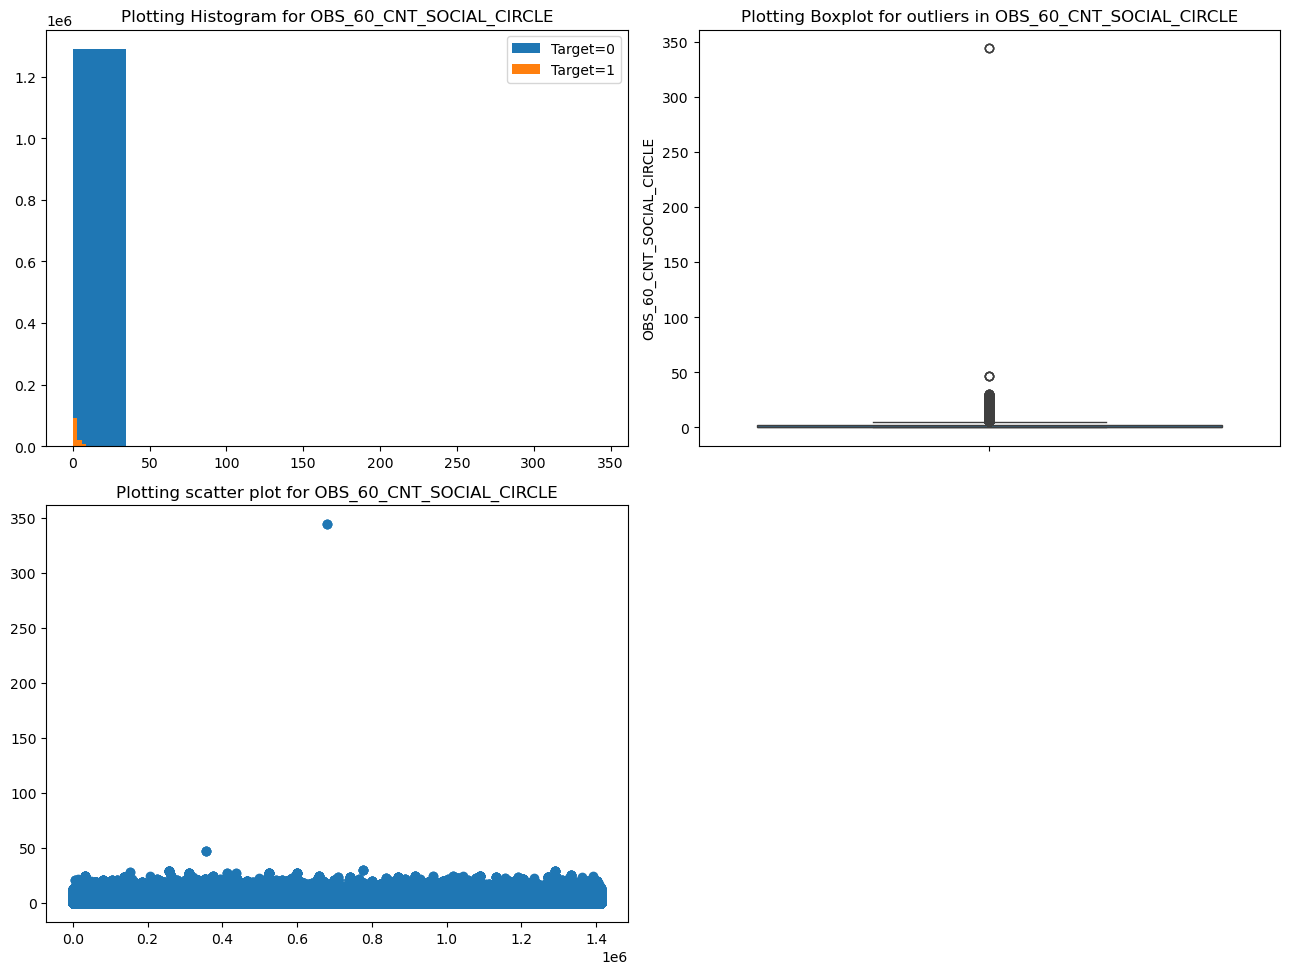



Plotting column DEF_60_CNT_SOCIAL_CIRCLE


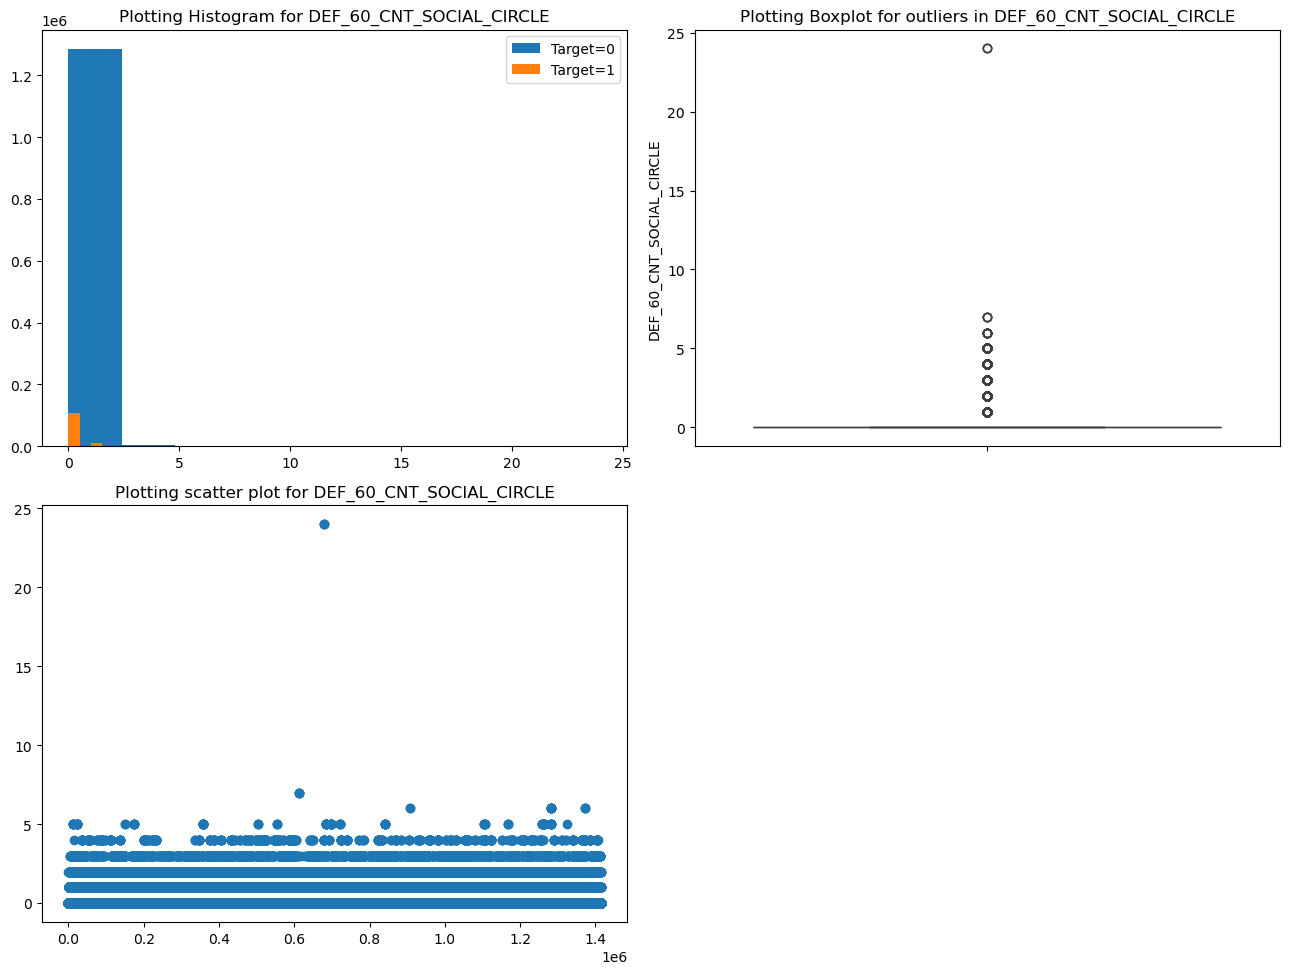



Plotting column DAYS_LAST_PHONE_CHANGE


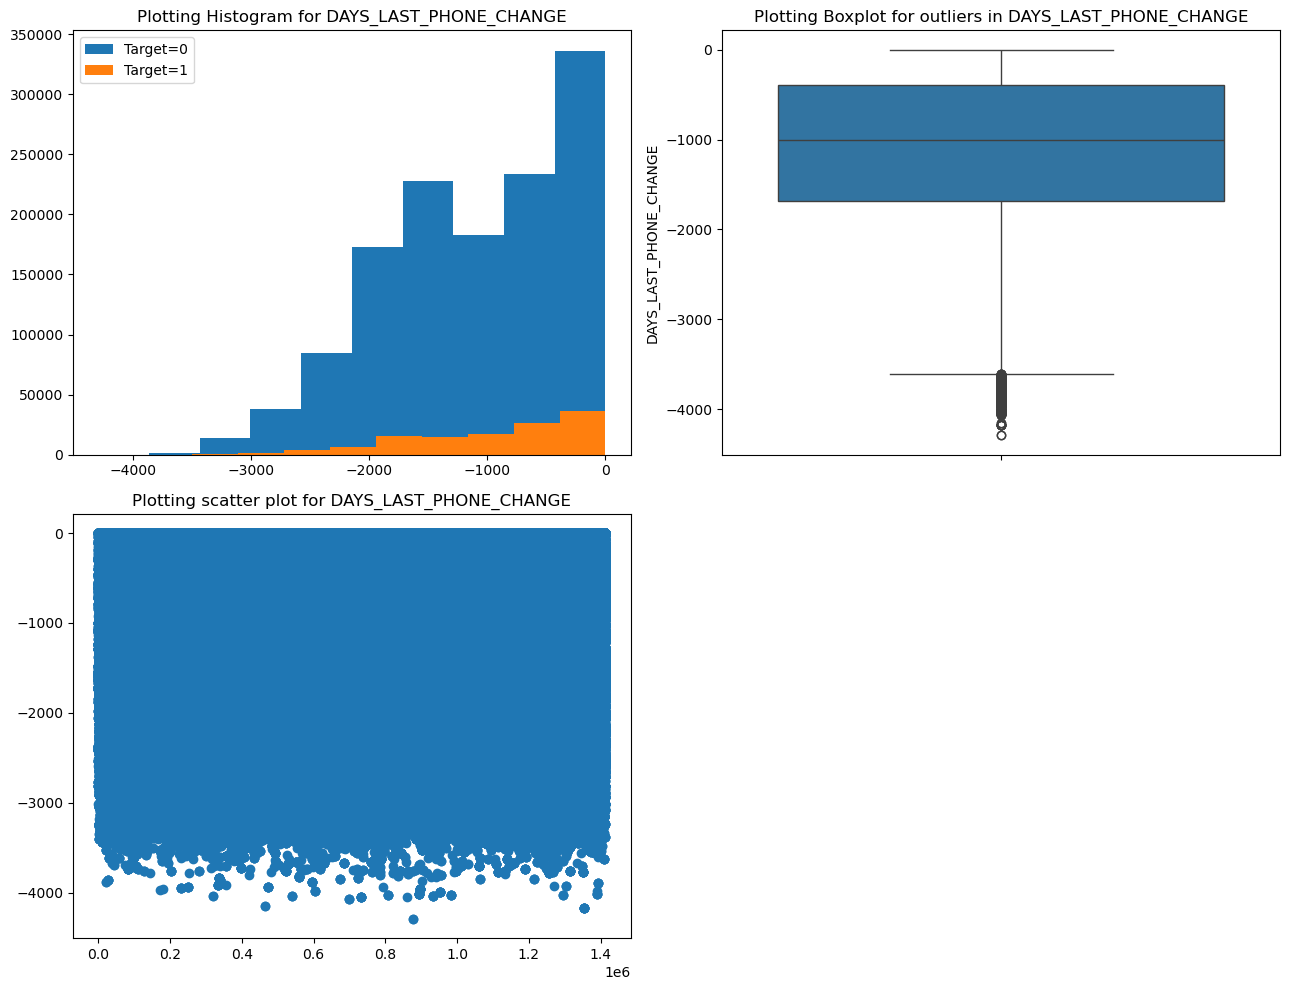



Plotting column FLAG_DOCUMENT_2


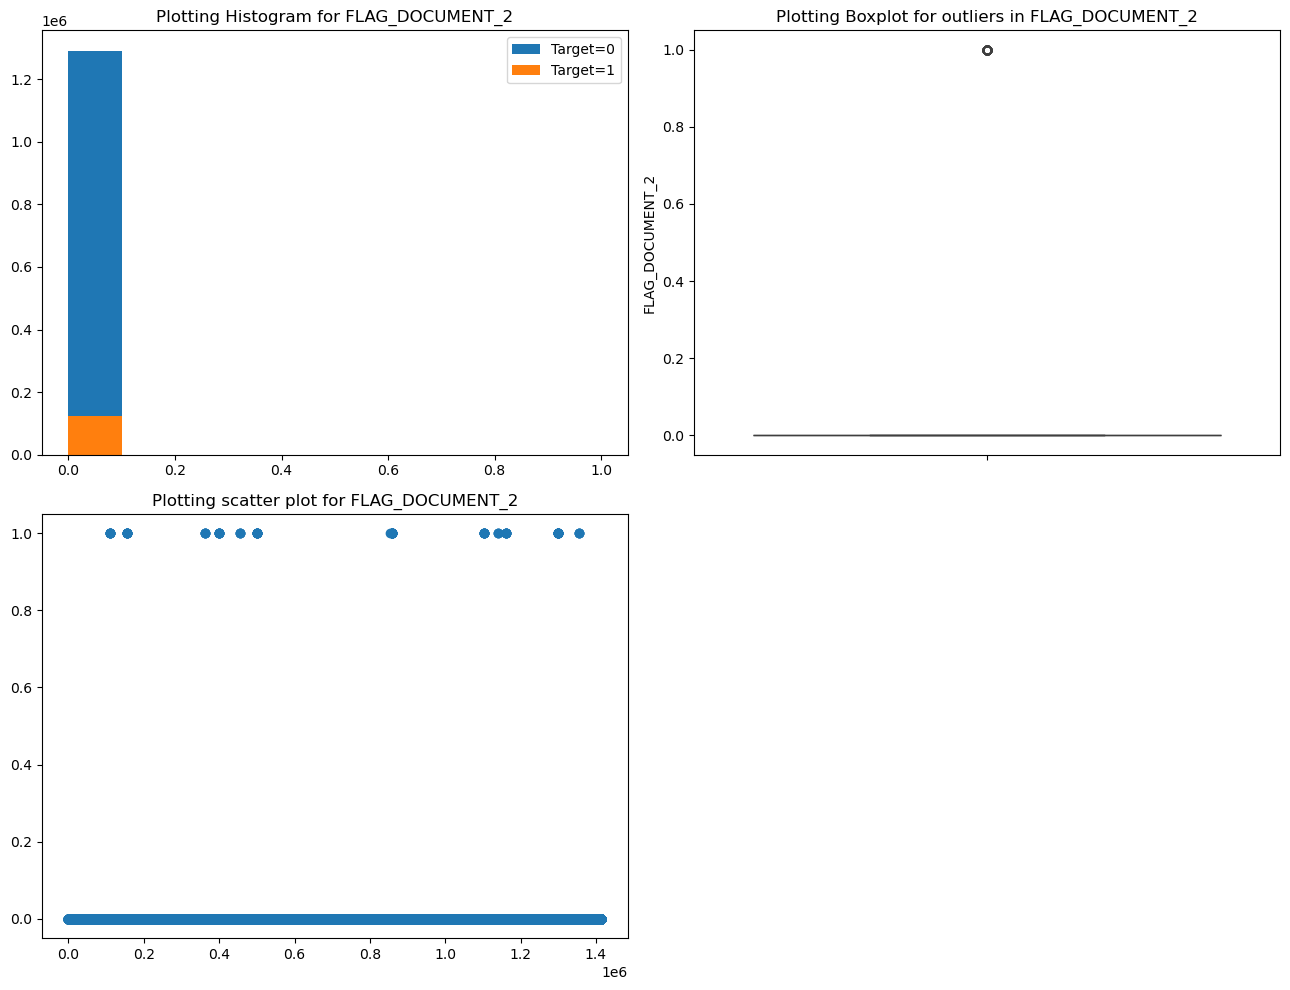



Plotting column FLAG_DOCUMENT_3


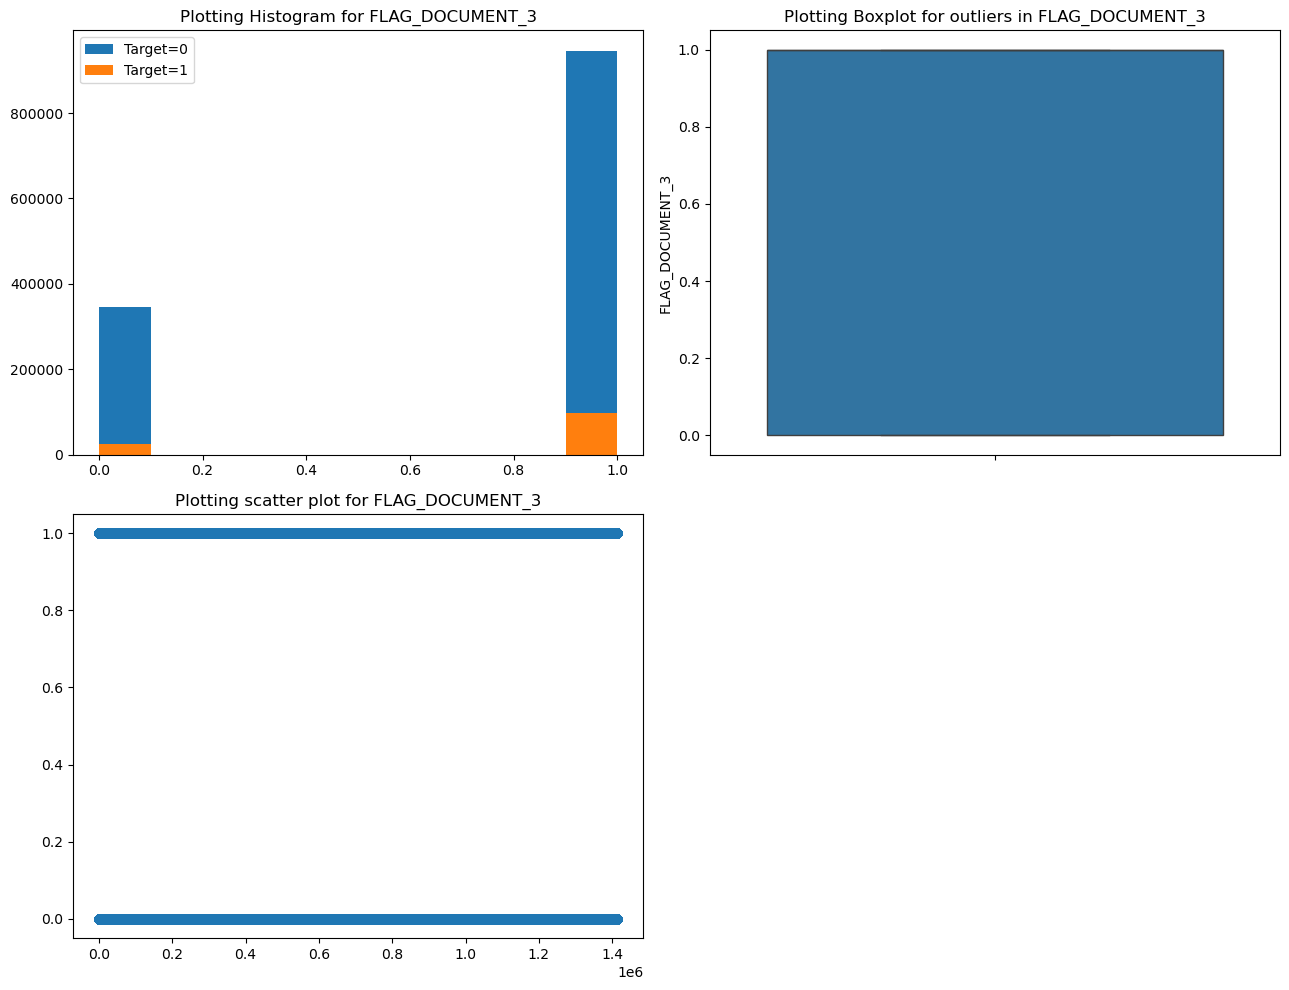



Plotting column FLAG_DOCUMENT_4


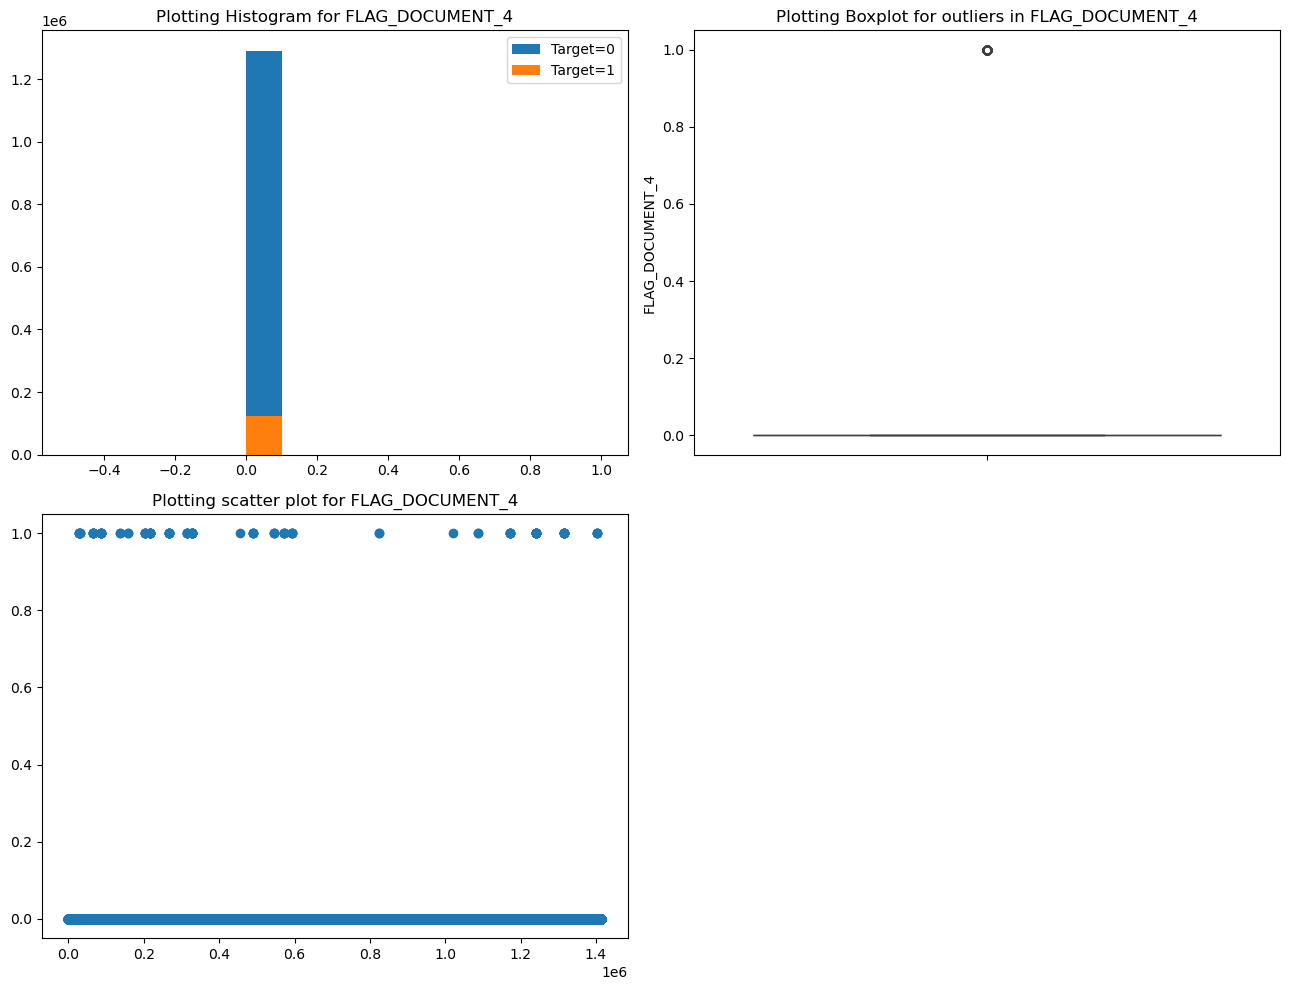



Plotting column FLAG_DOCUMENT_5


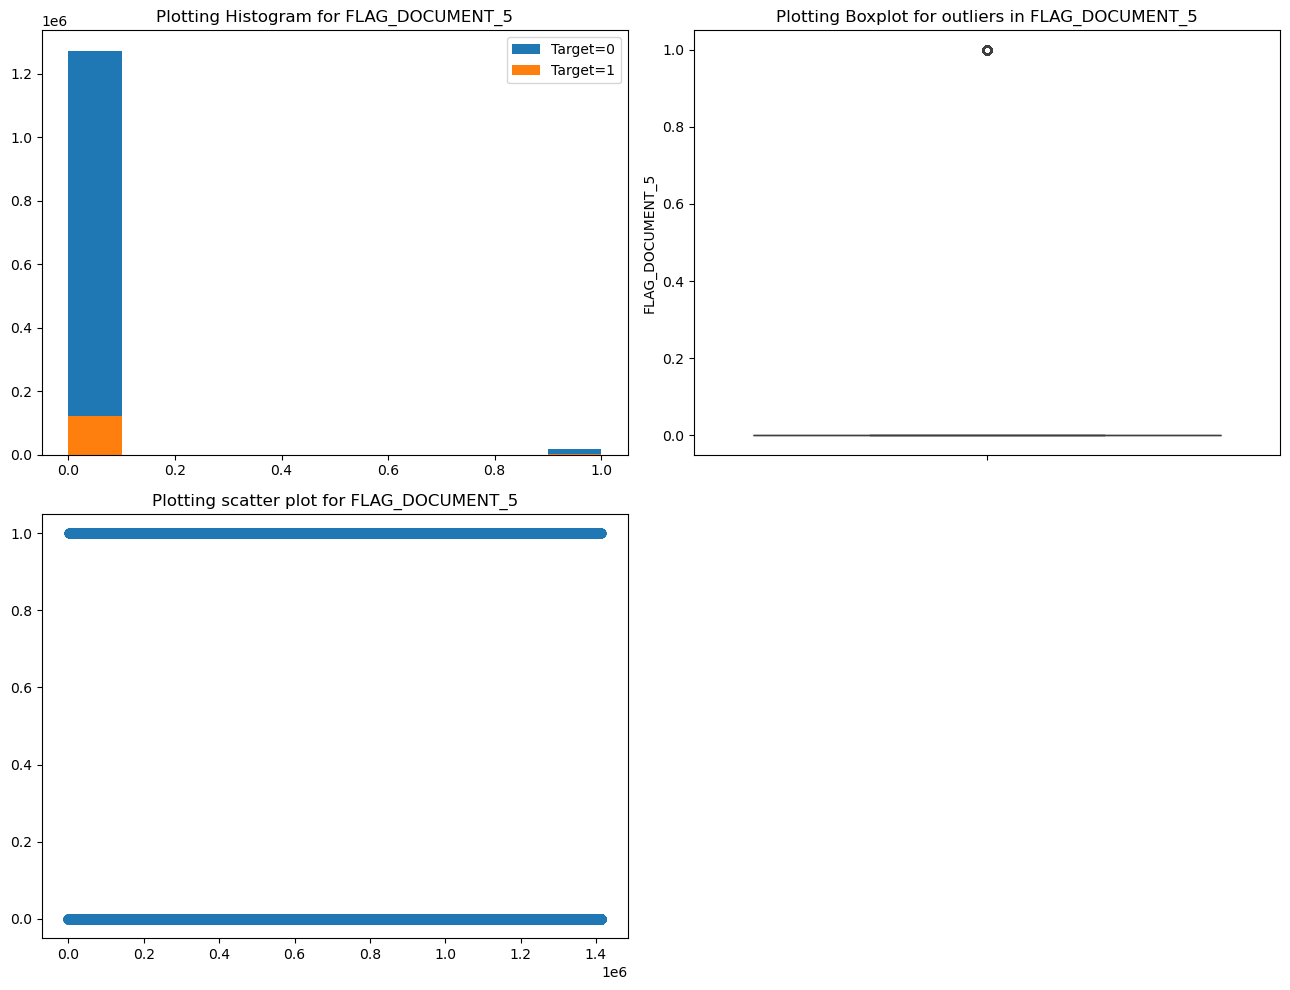



Plotting column FLAG_DOCUMENT_6


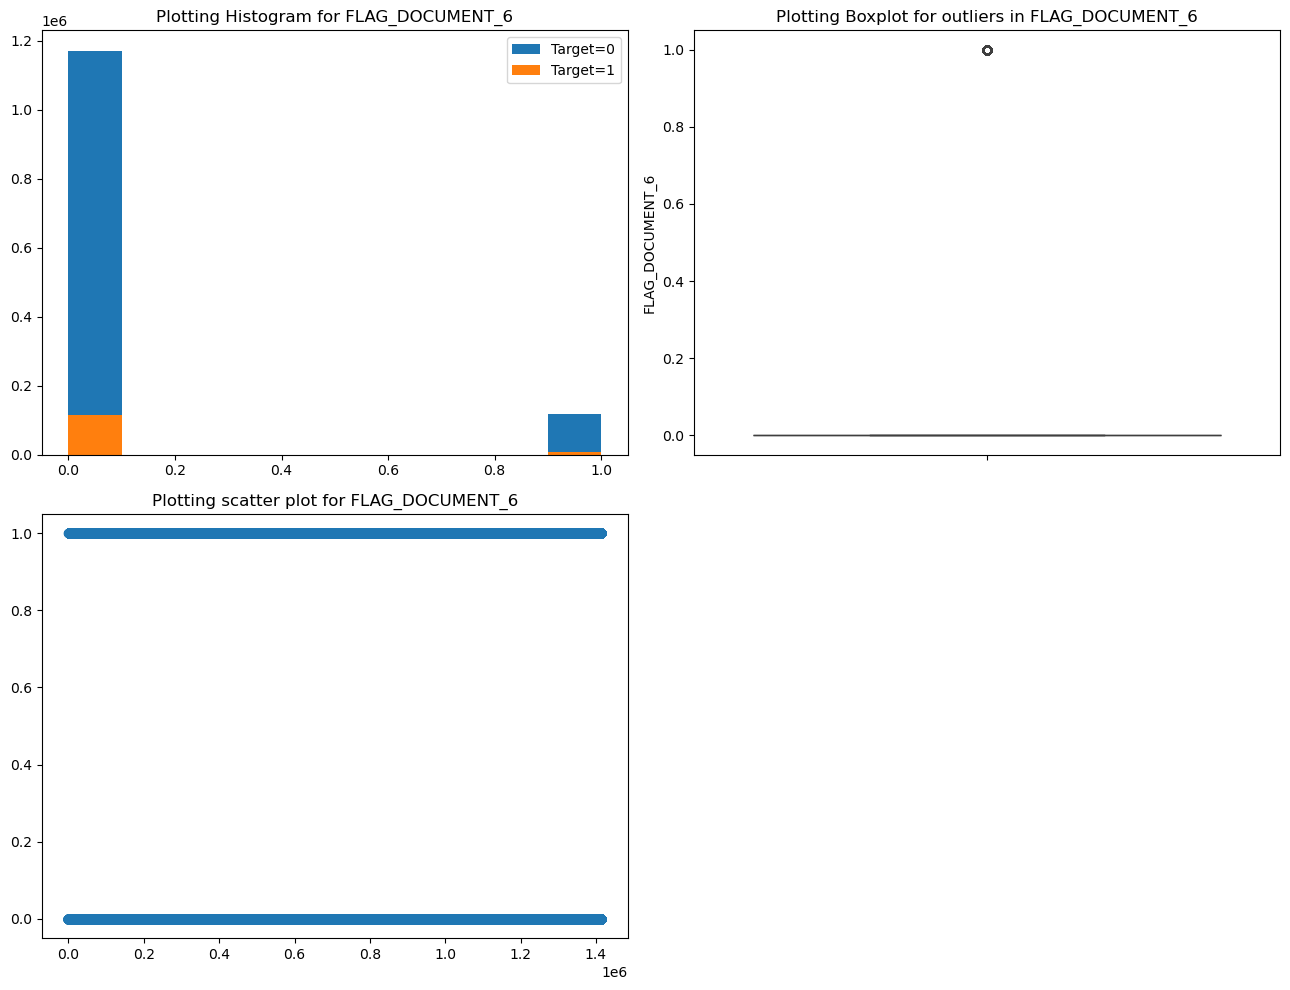



Plotting column FLAG_DOCUMENT_7


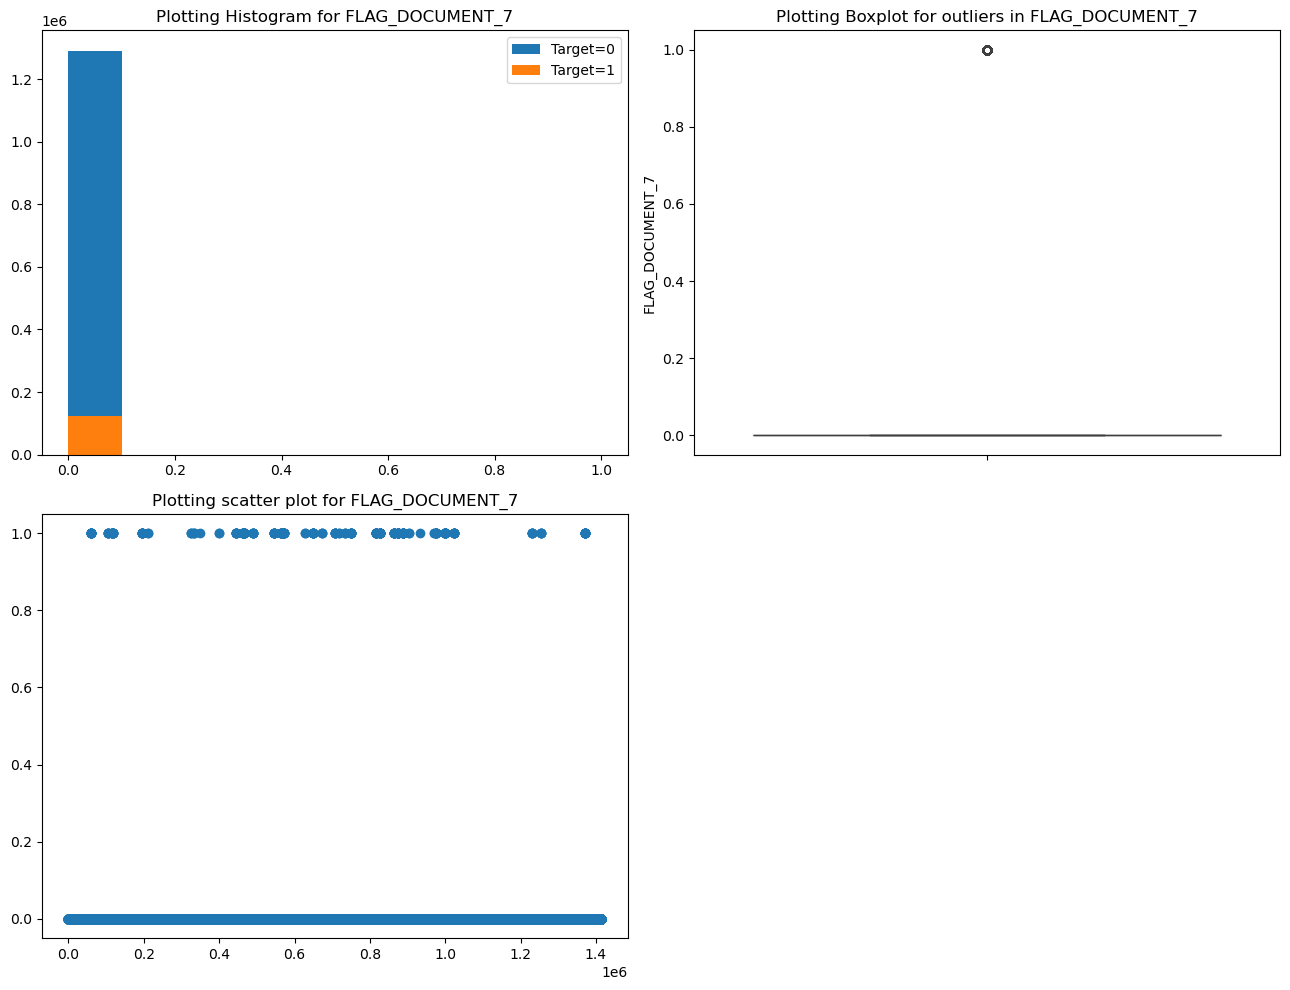



Plotting column FLAG_DOCUMENT_8


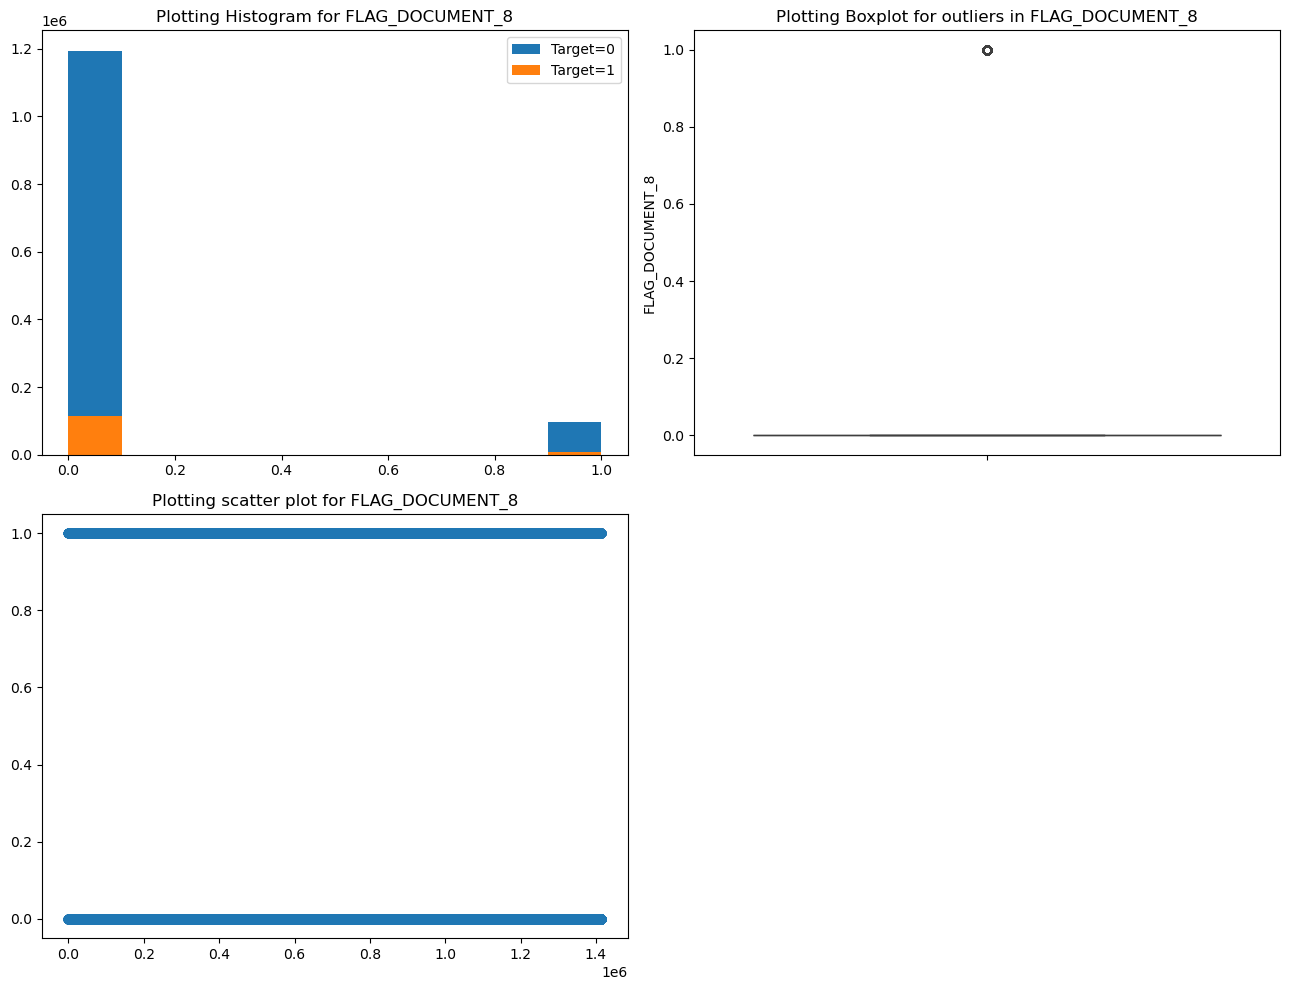



Plotting column FLAG_DOCUMENT_9


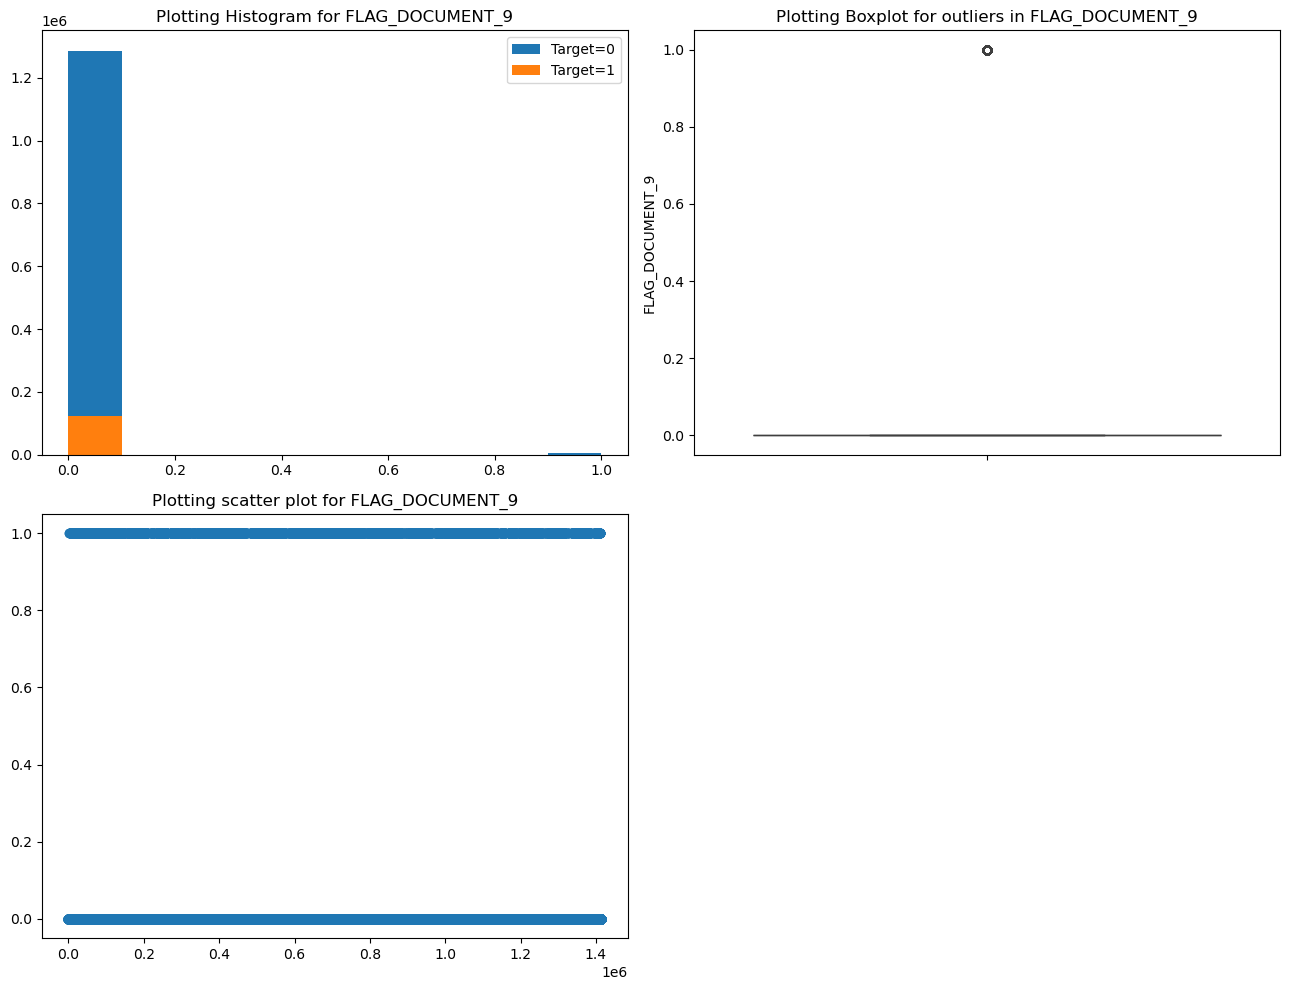



Plotting column FLAG_DOCUMENT_10


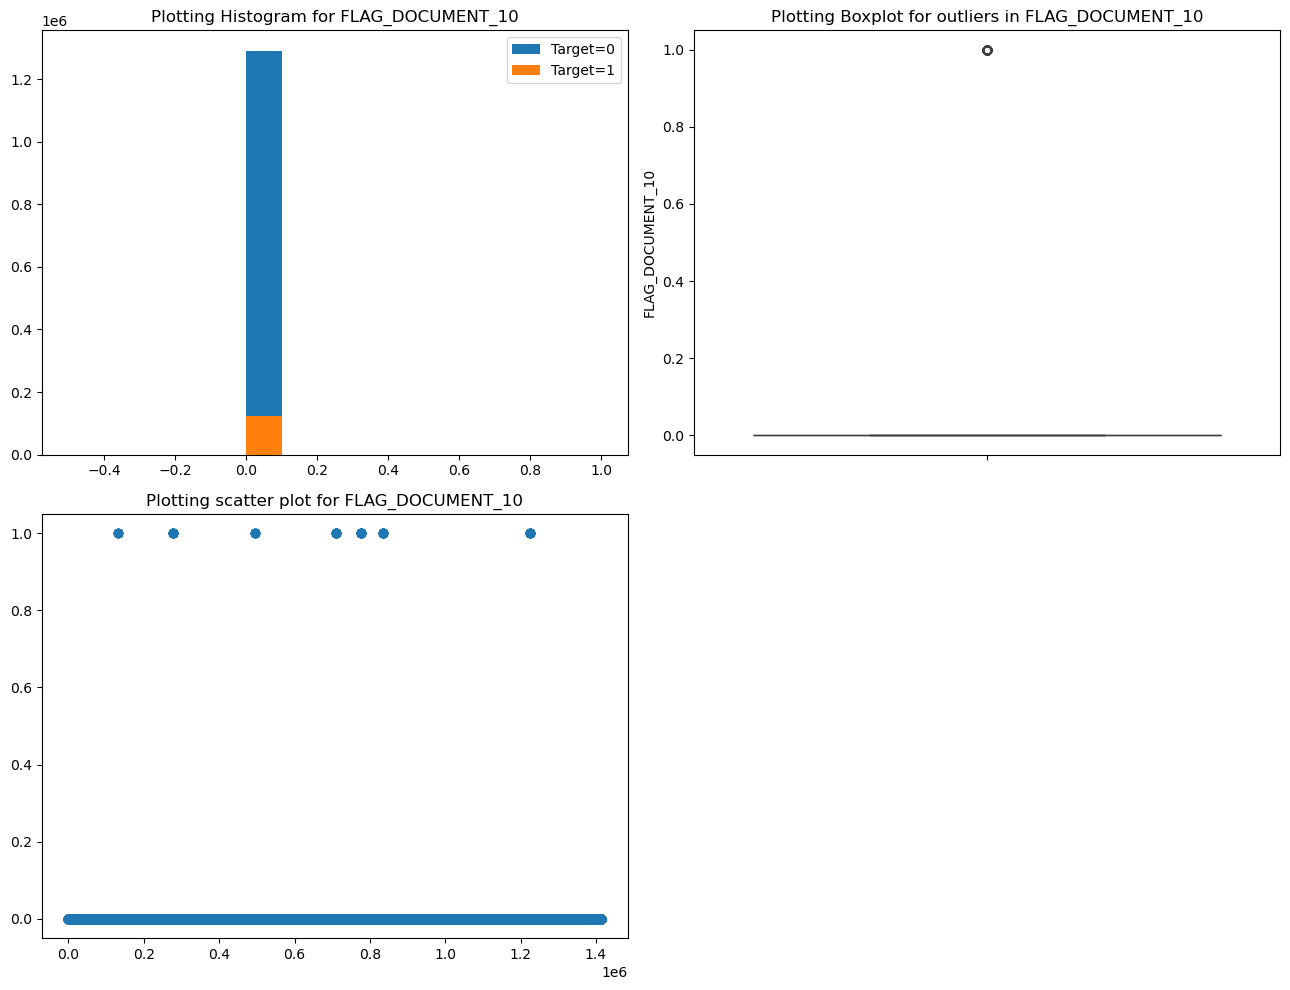



Plotting column FLAG_DOCUMENT_11


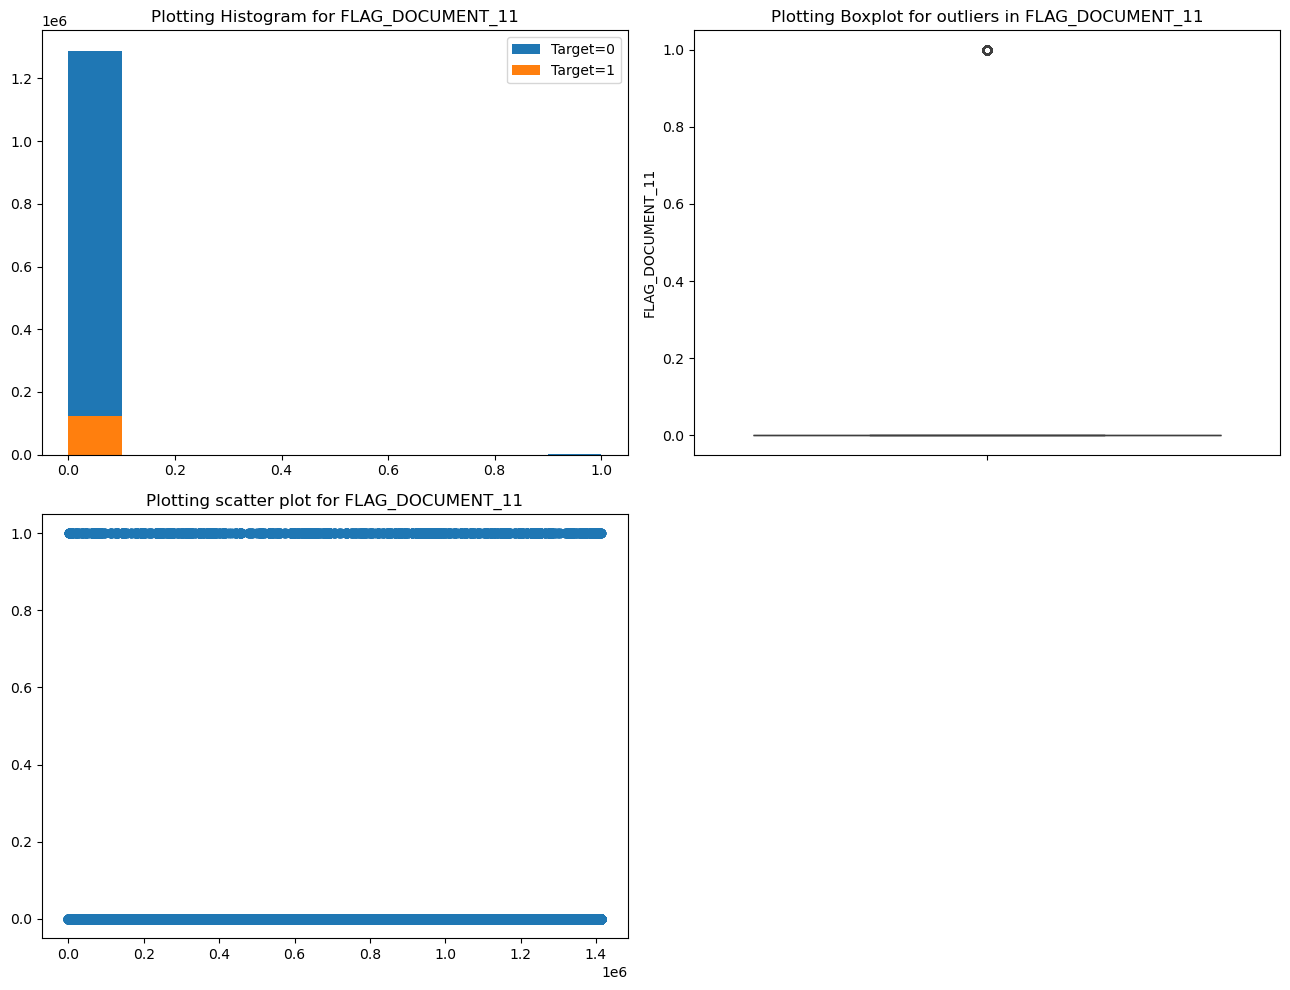



Plotting column FLAG_DOCUMENT_12


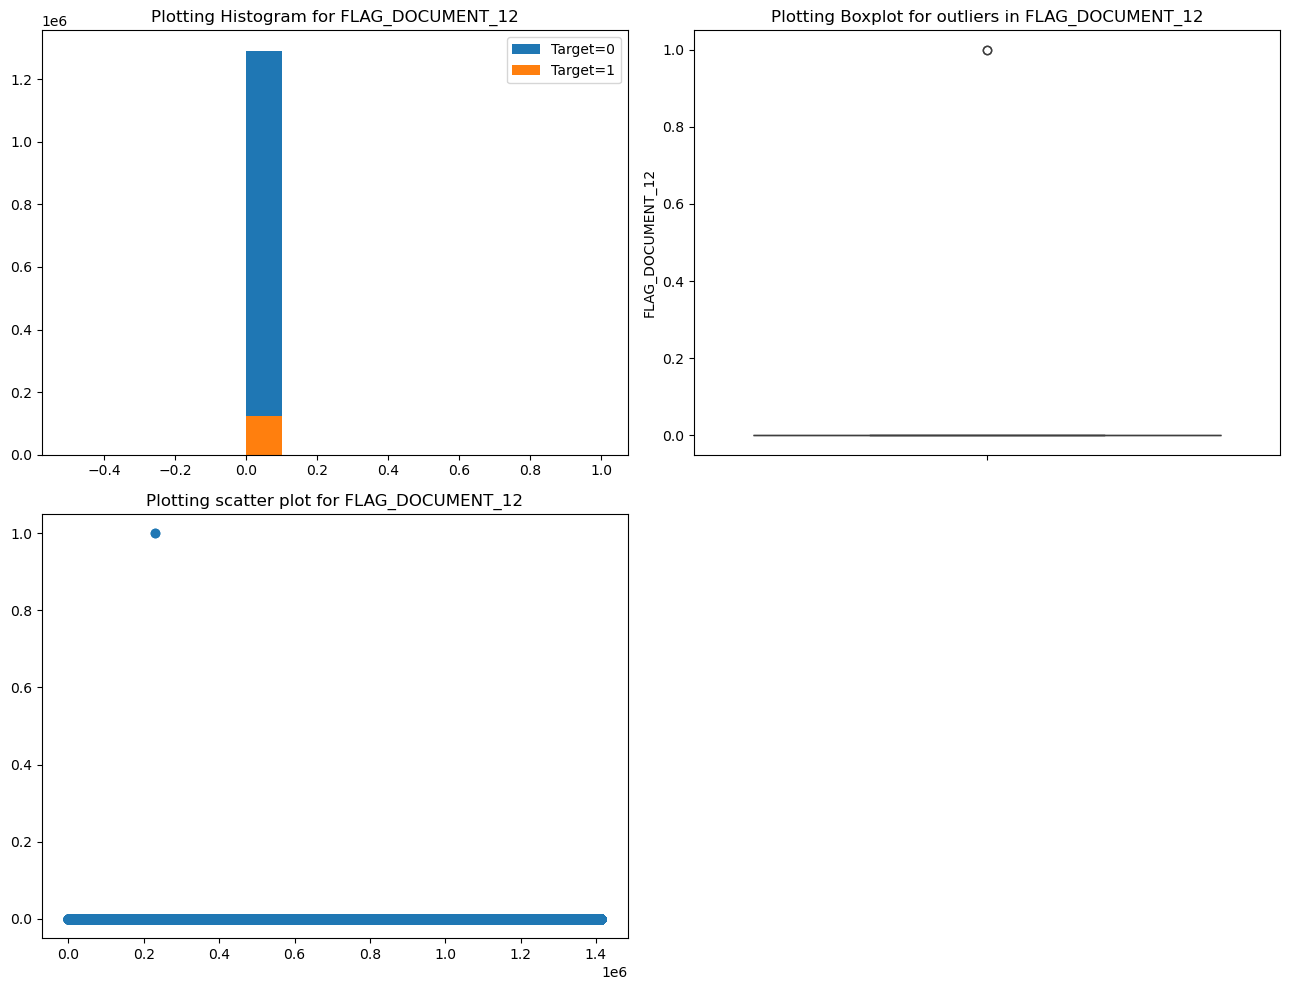



Plotting column FLAG_DOCUMENT_13


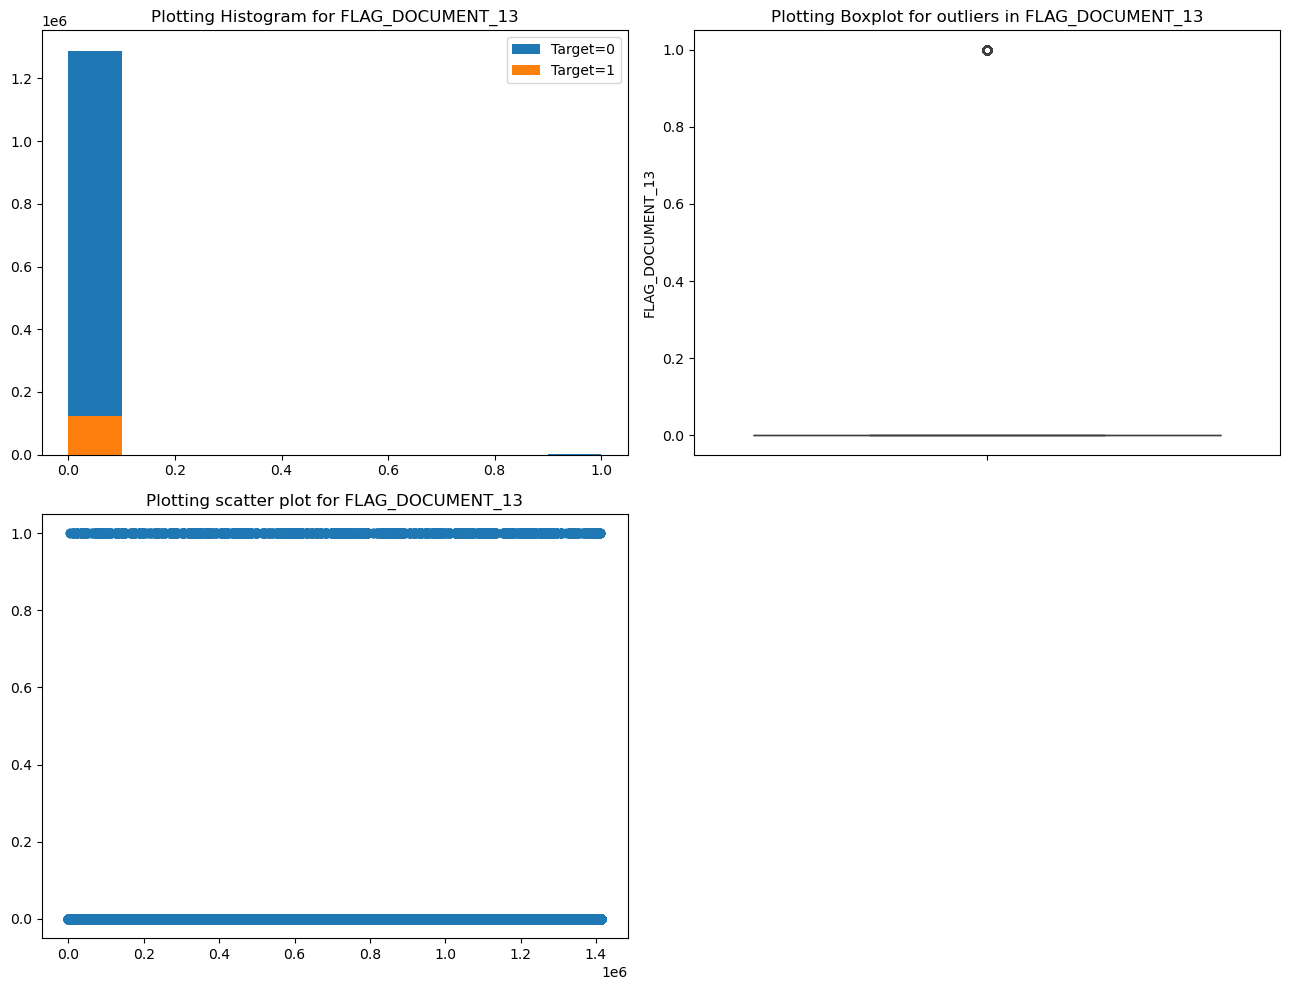



Plotting column FLAG_DOCUMENT_14


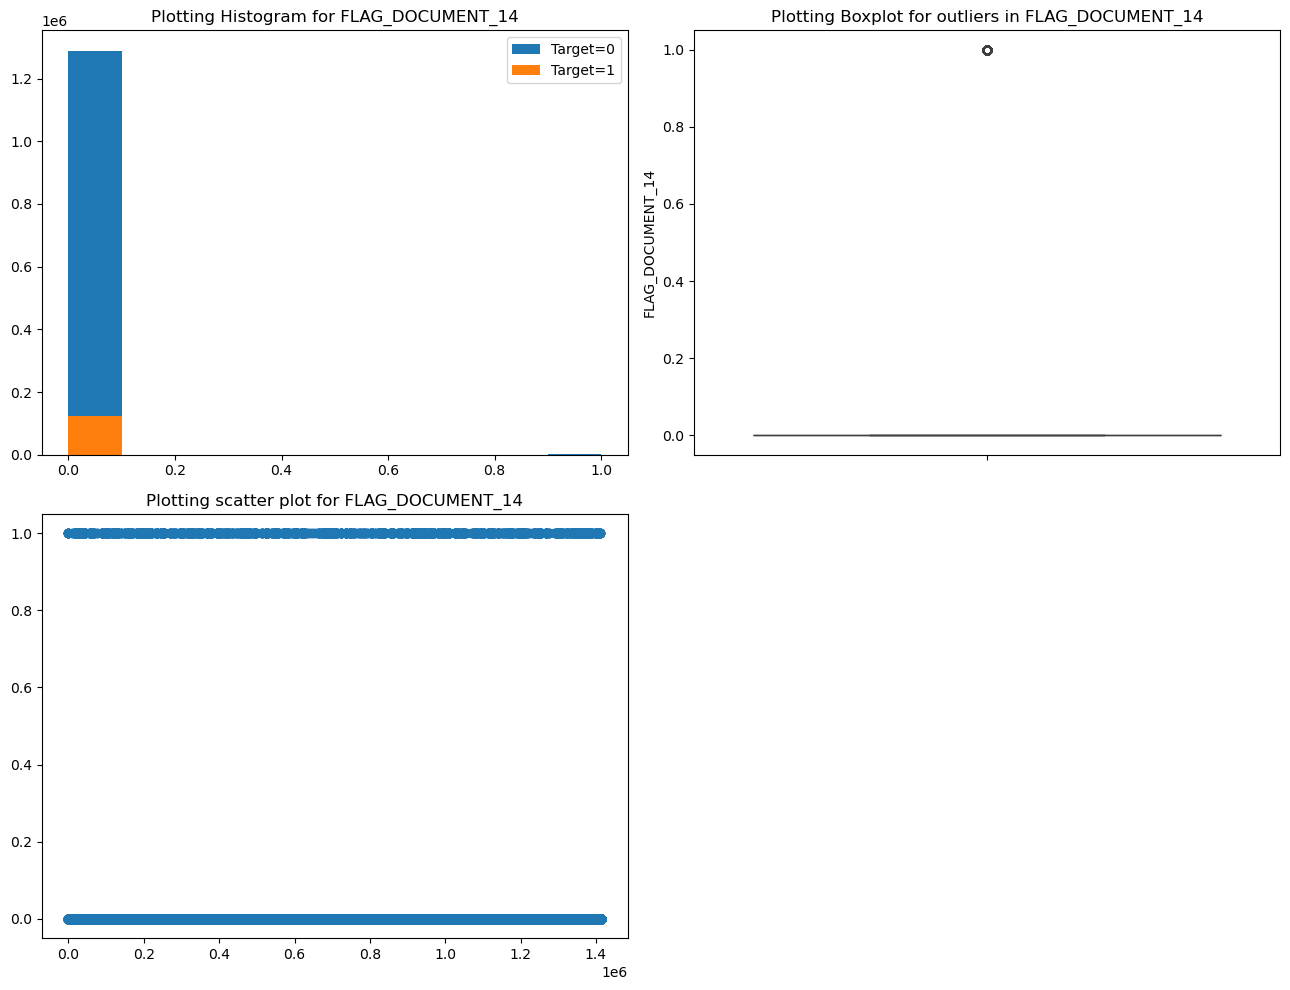



Plotting column FLAG_DOCUMENT_15


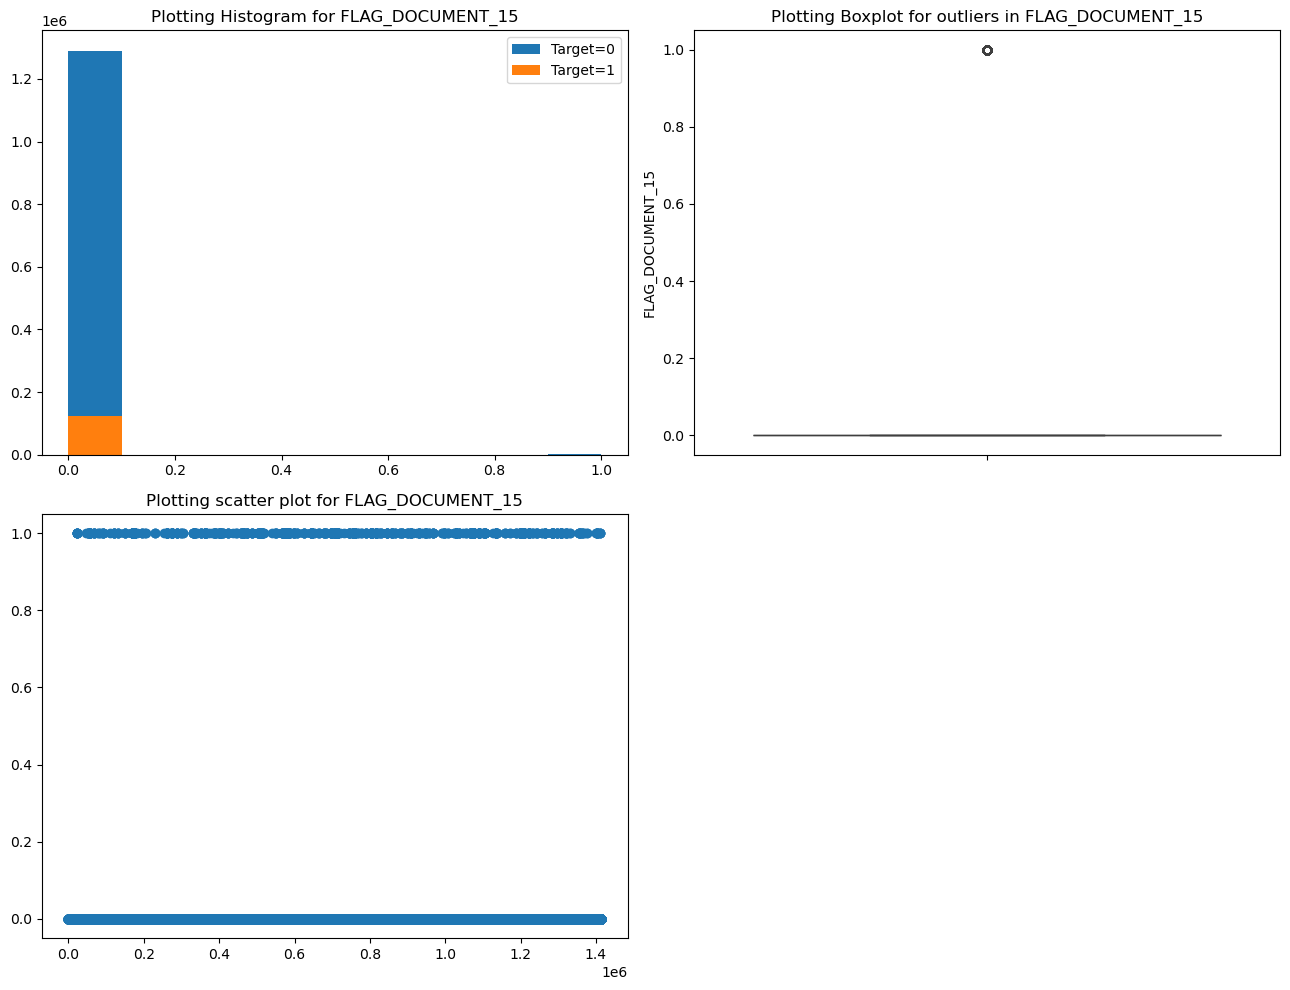



Plotting column FLAG_DOCUMENT_16


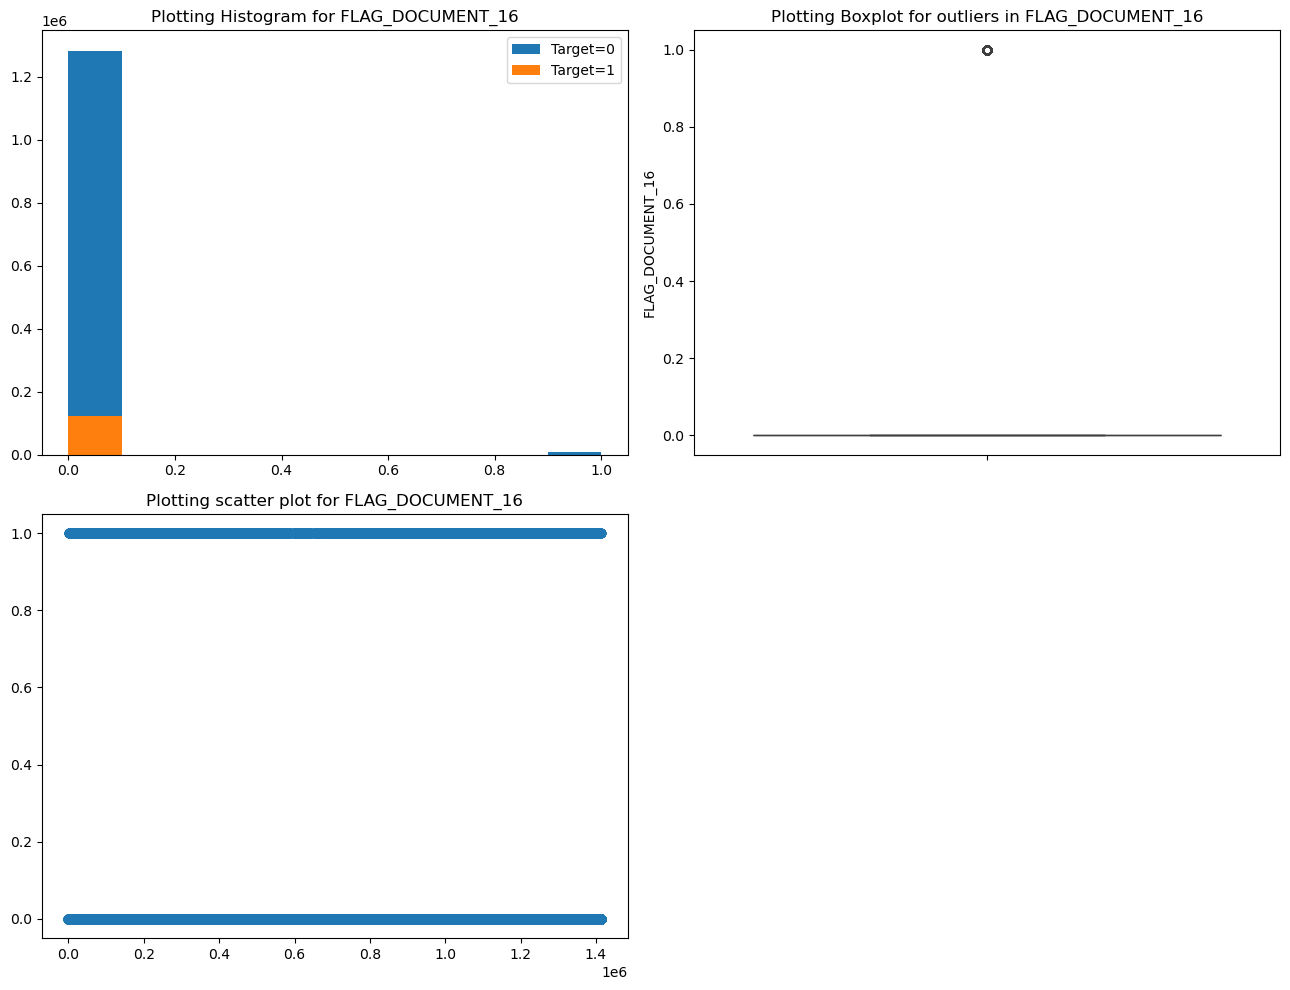



Plotting column FLAG_DOCUMENT_17


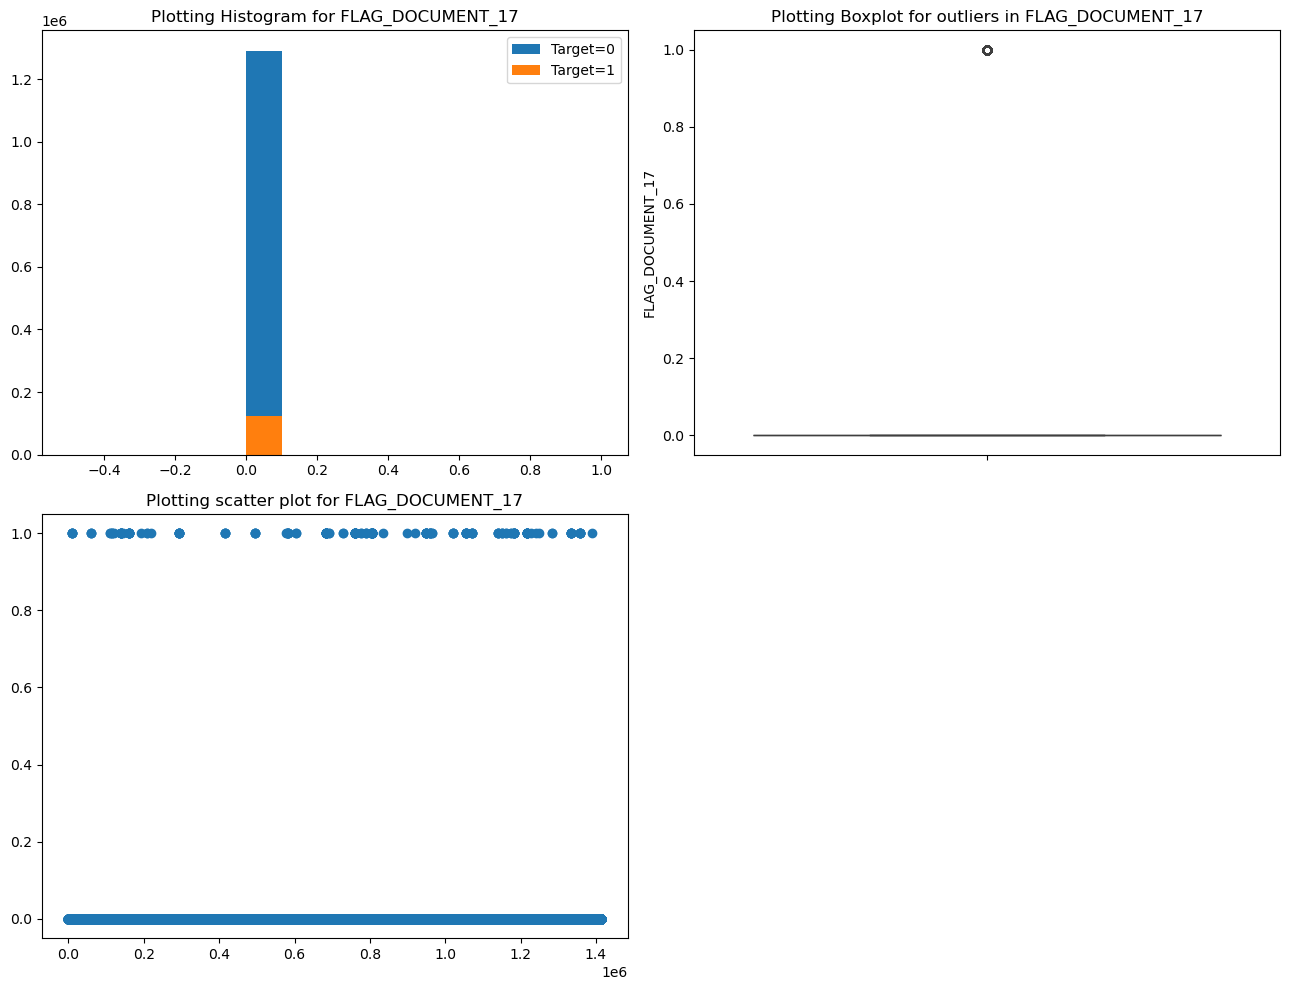



Plotting column FLAG_DOCUMENT_18


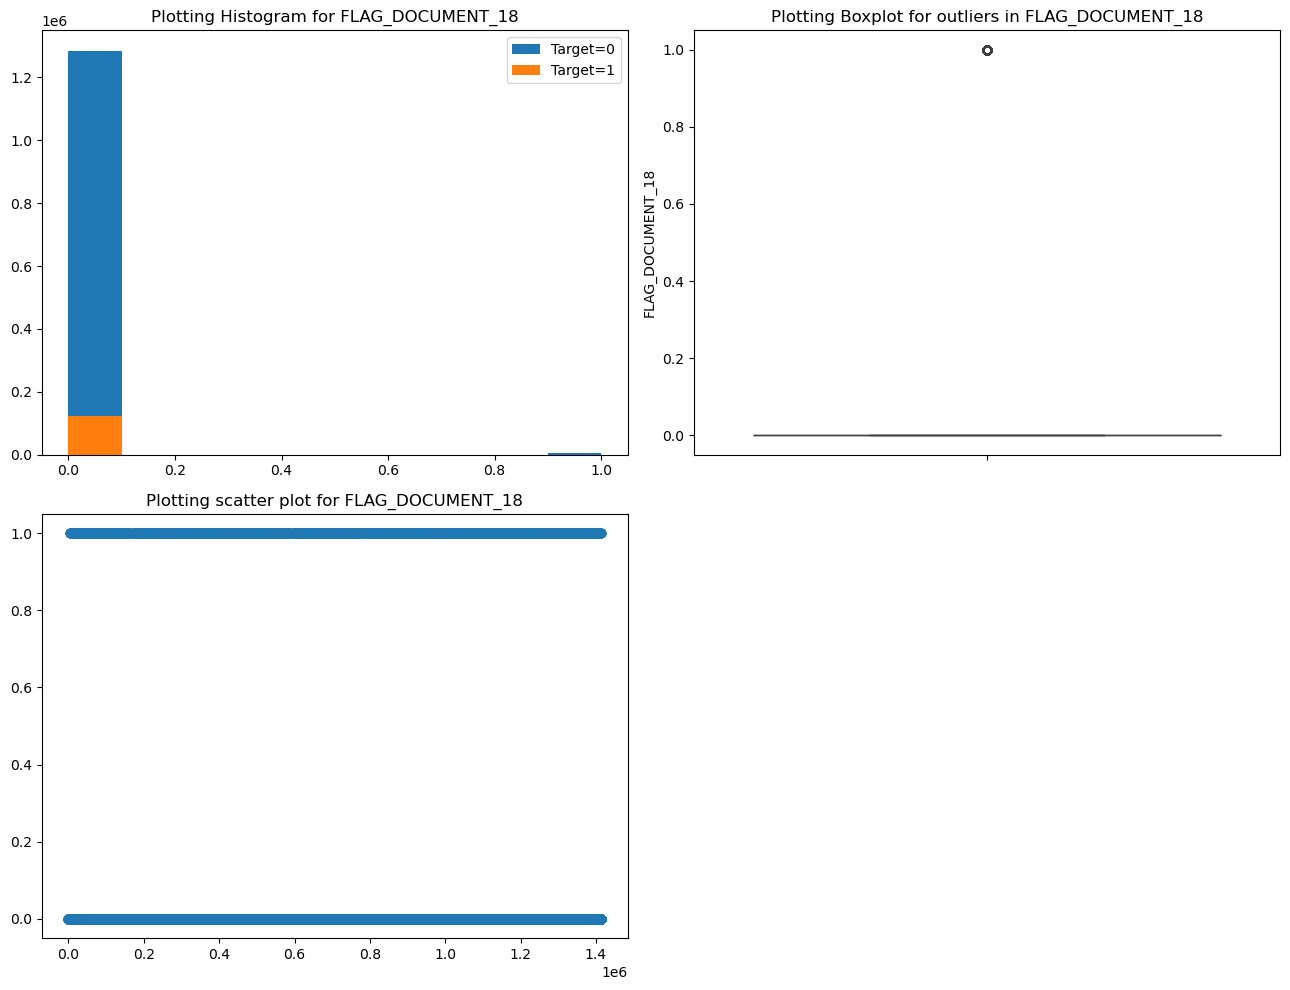



Plotting column FLAG_DOCUMENT_19


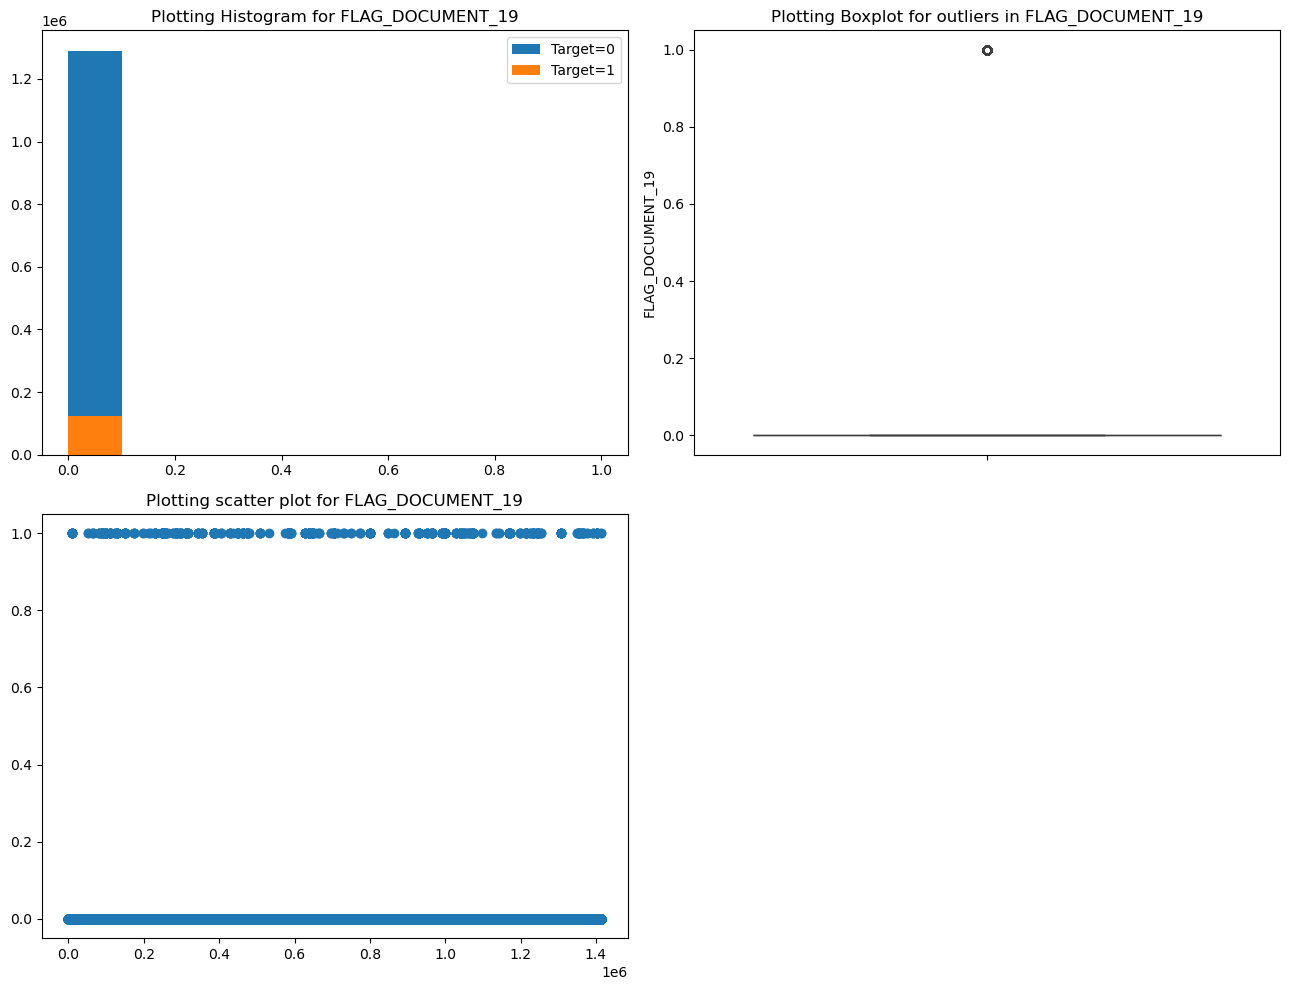



Plotting column FLAG_DOCUMENT_20


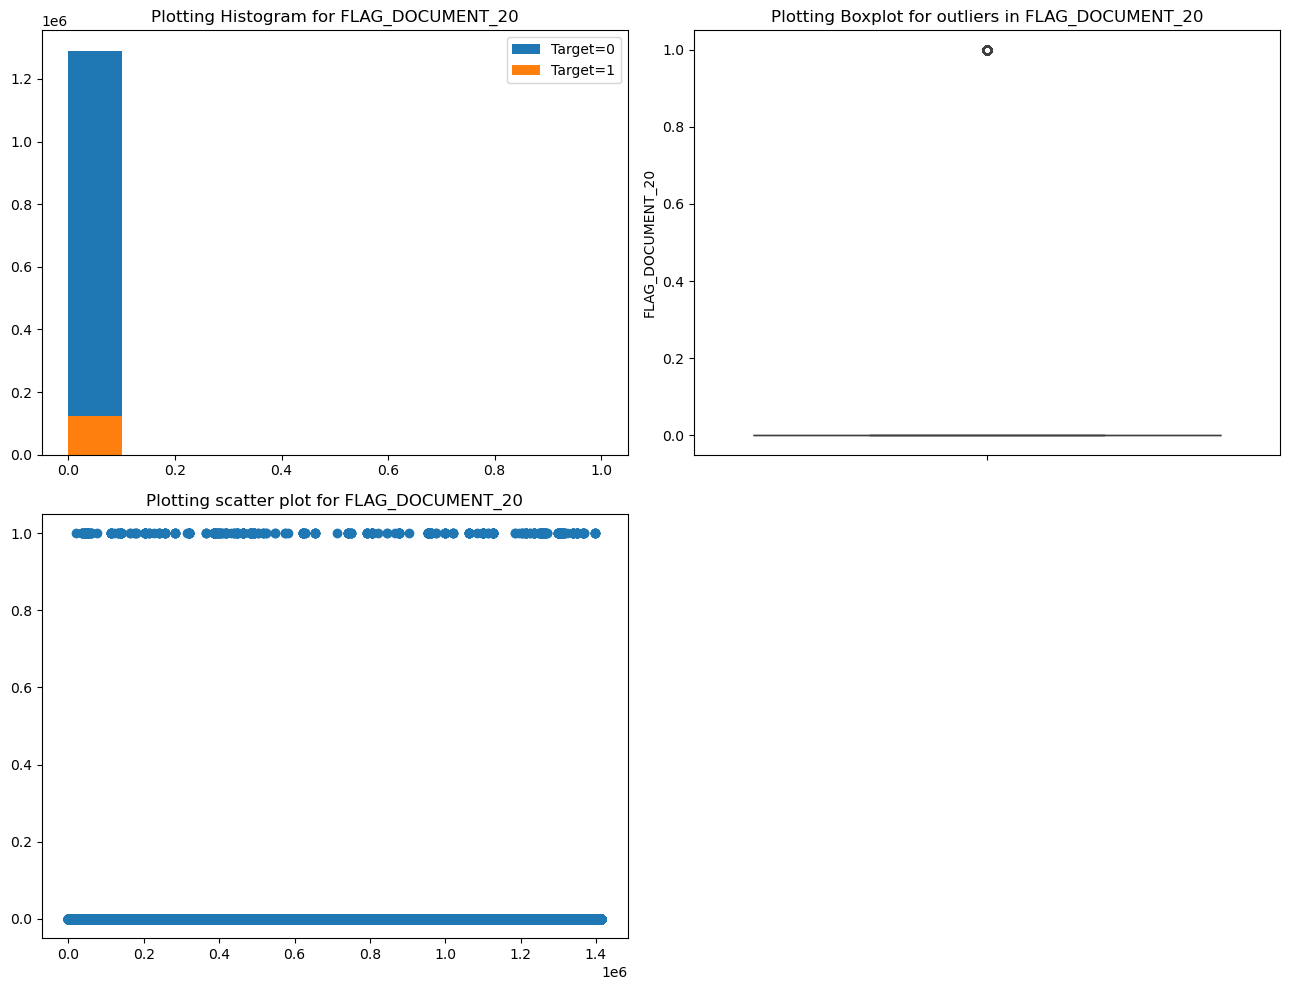



Plotting column FLAG_DOCUMENT_21


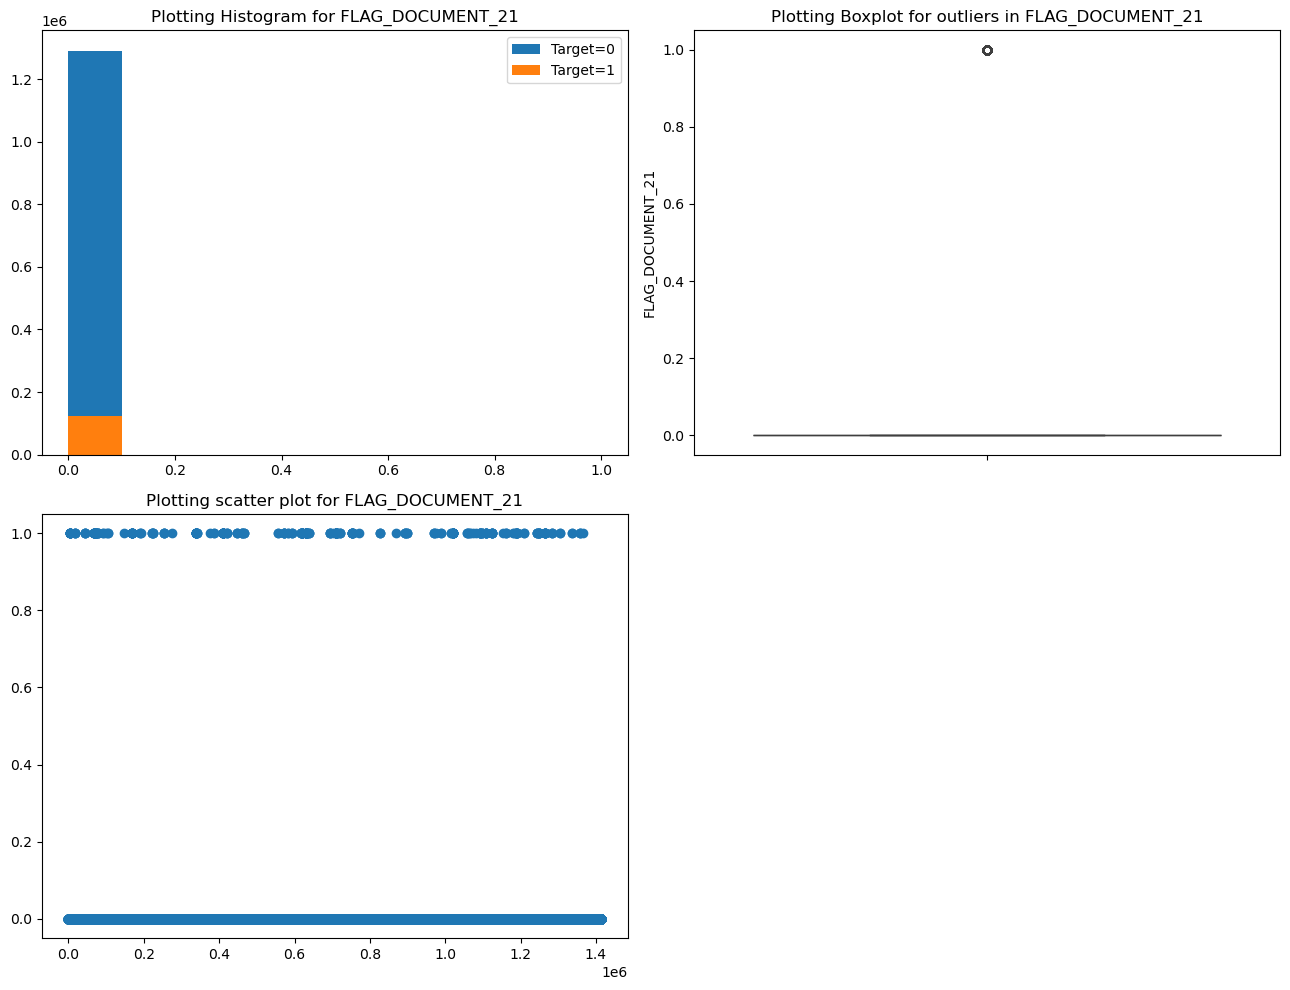



Plotting column AMT_REQ_CREDIT_BUREAU_HOUR


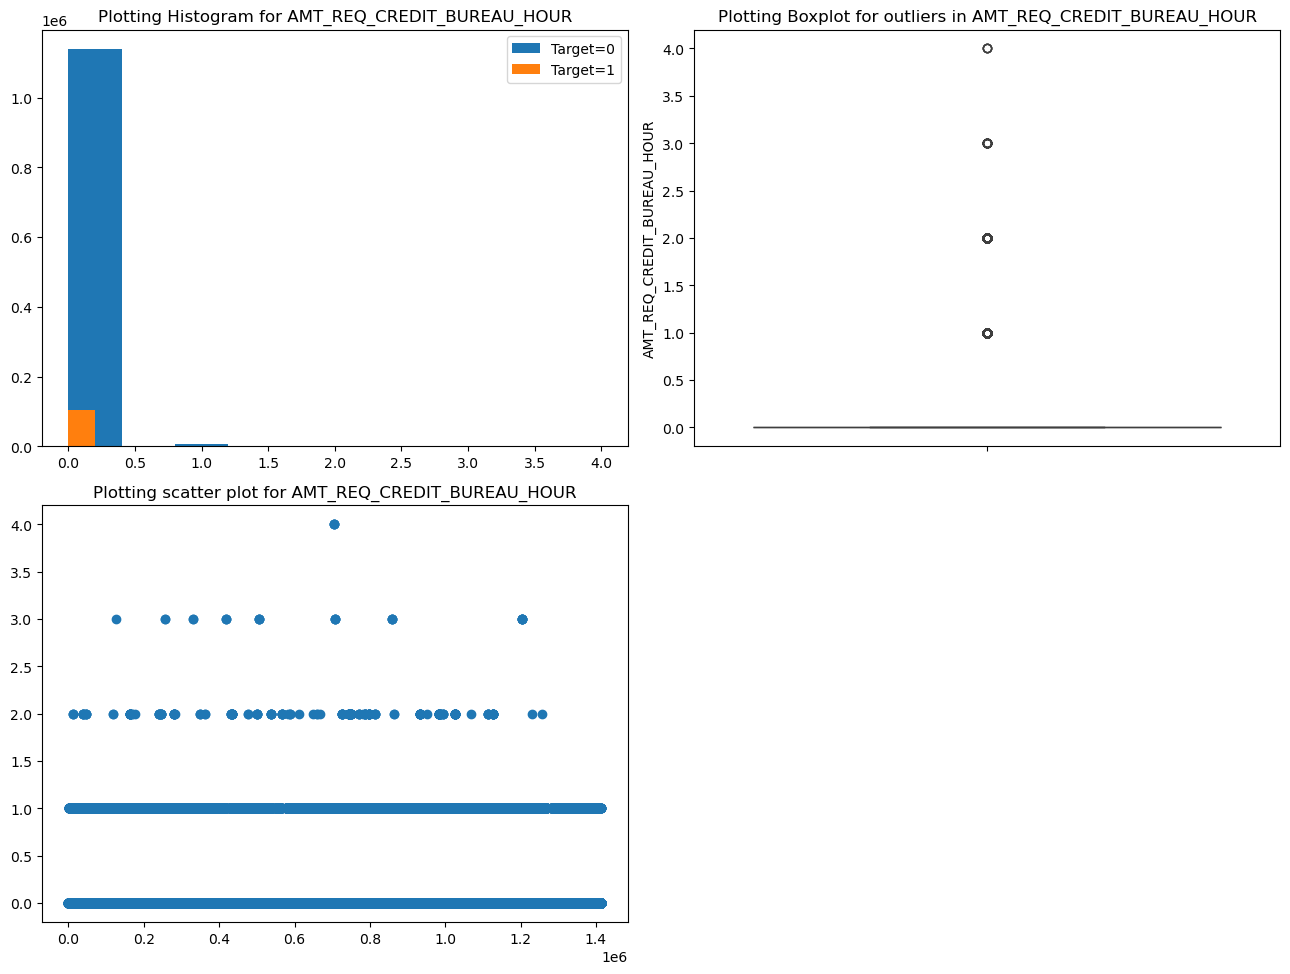



Plotting column AMT_REQ_CREDIT_BUREAU_DAY


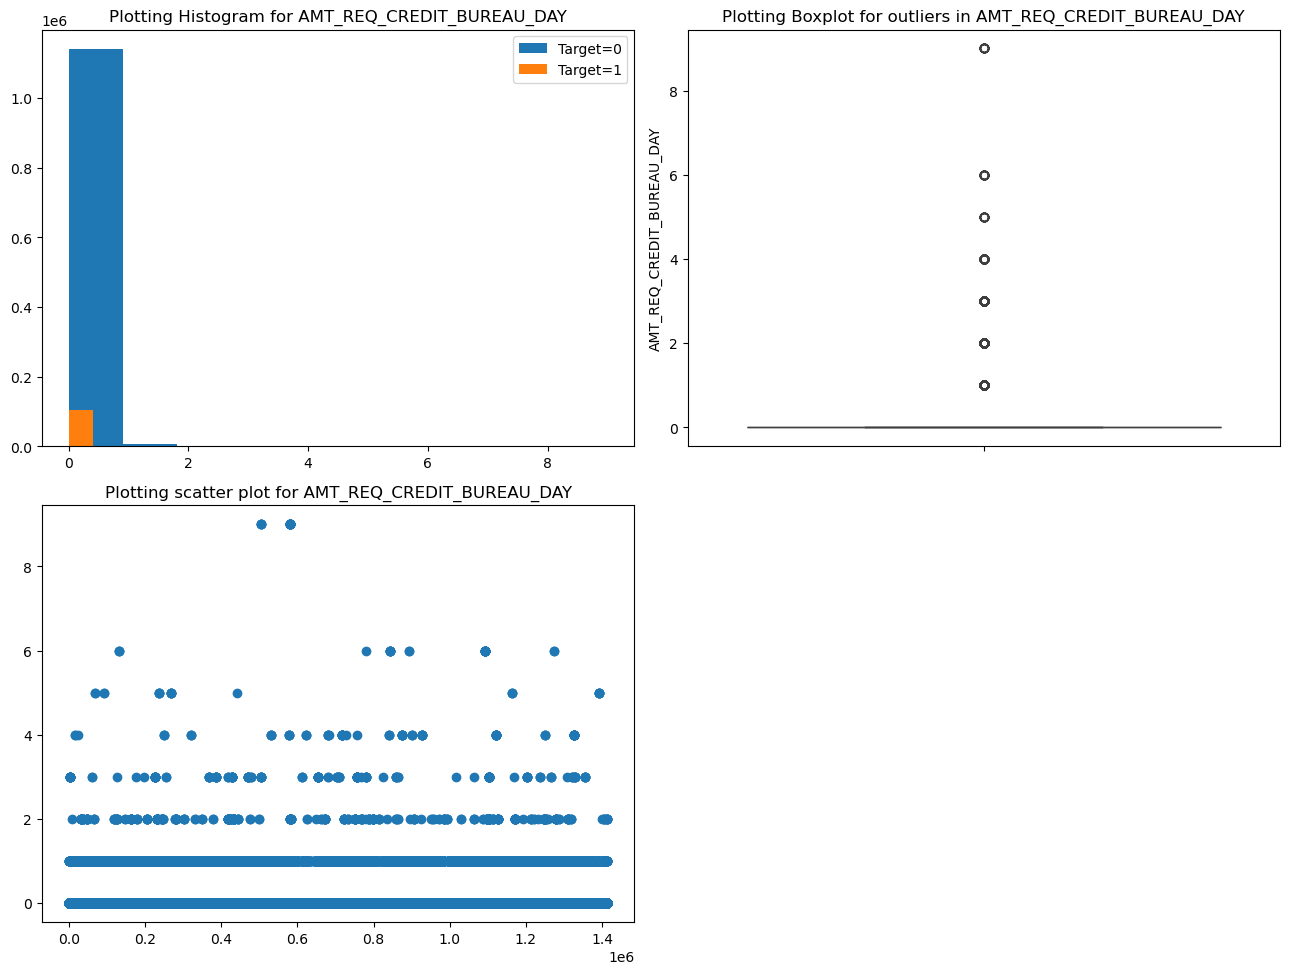



Plotting column AMT_REQ_CREDIT_BUREAU_WEEK


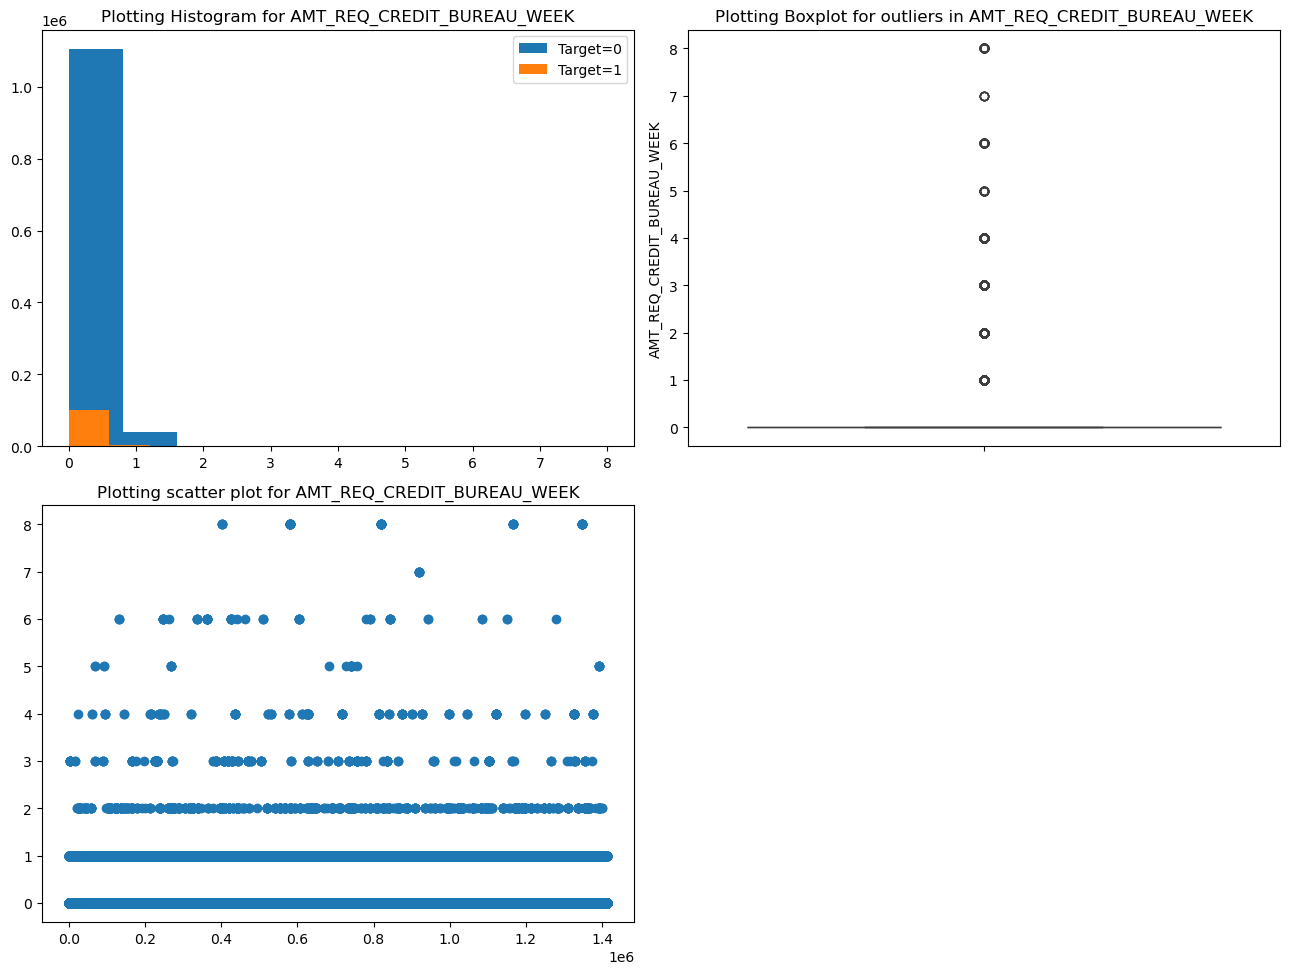



Plotting column AMT_REQ_CREDIT_BUREAU_MON


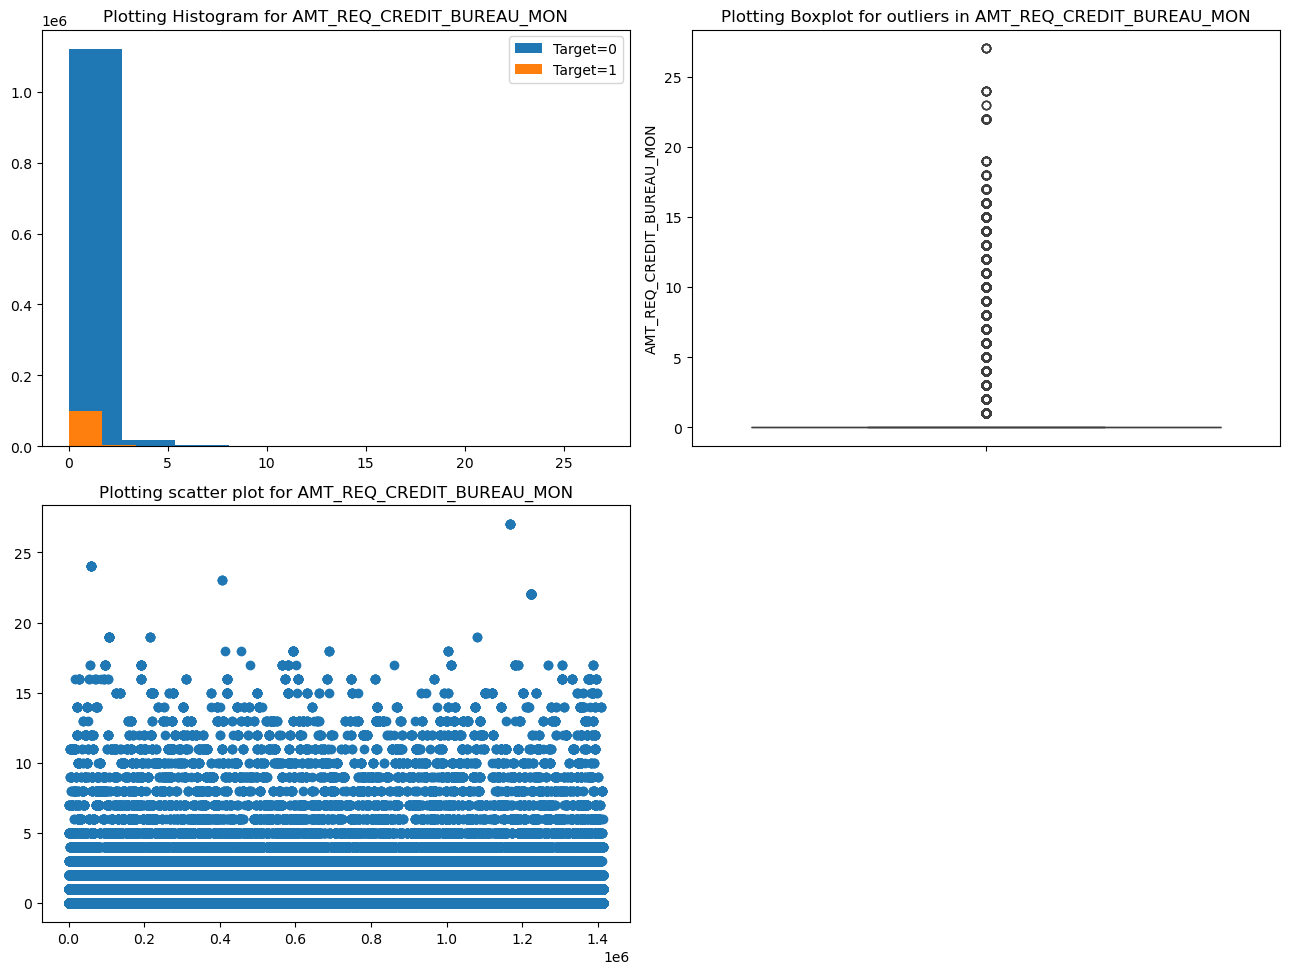



Plotting column AMT_REQ_CREDIT_BUREAU_QRT


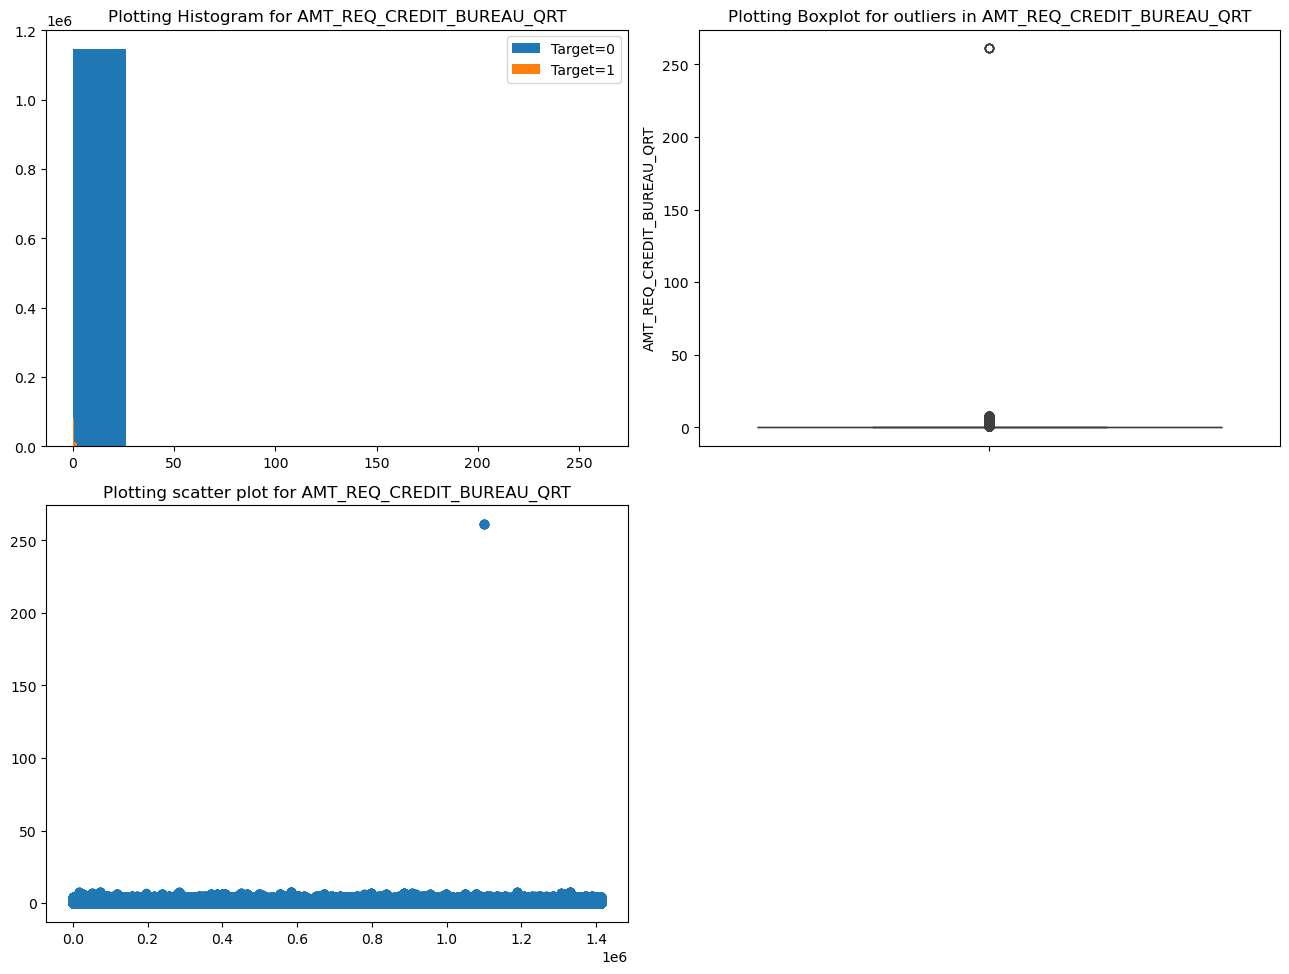



Plotting column AMT_REQ_CREDIT_BUREAU_YEAR


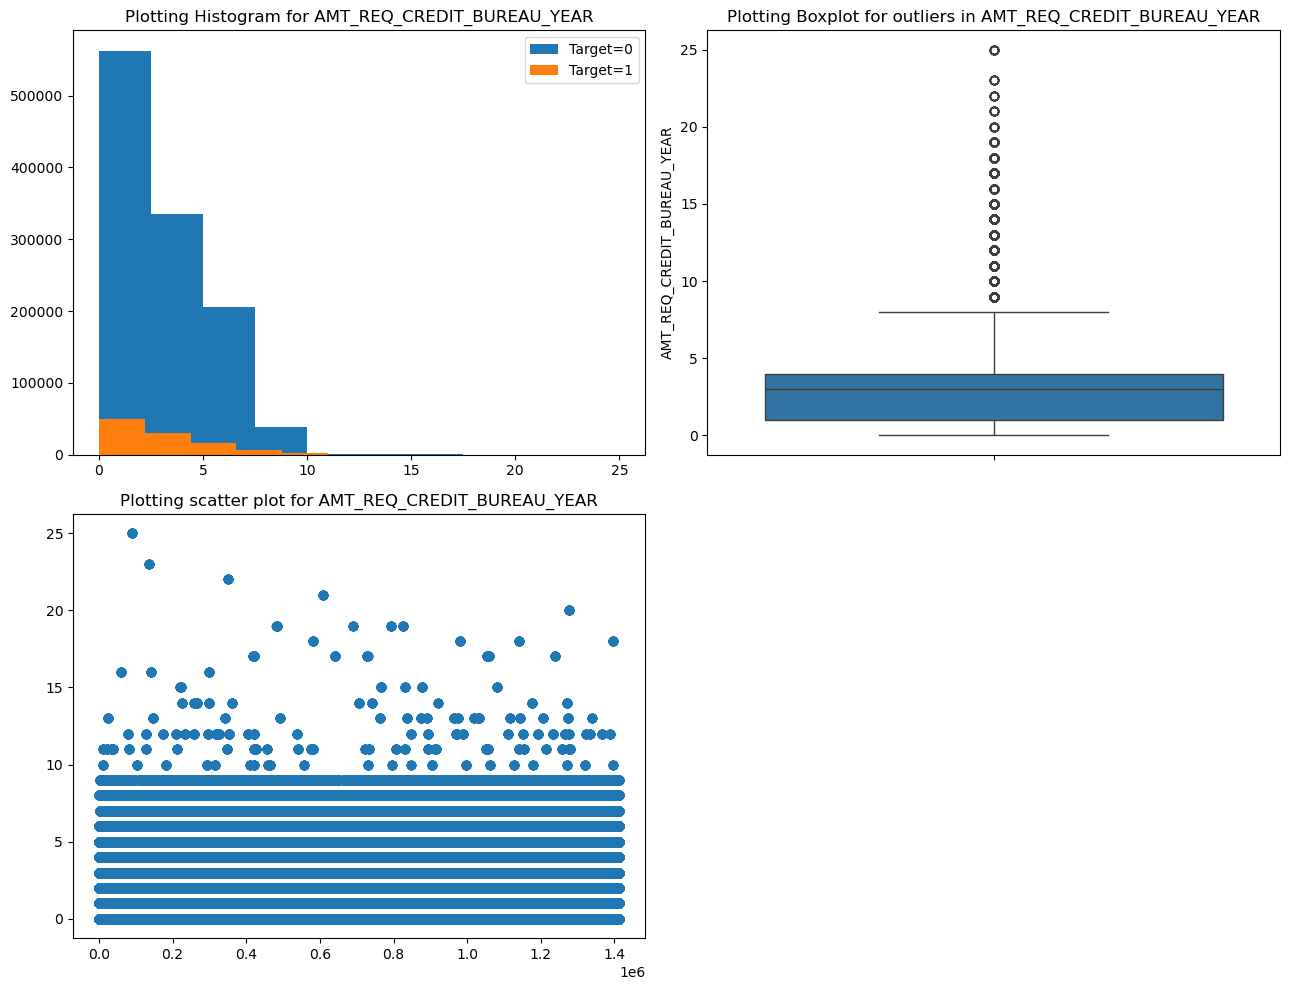



Plotting column SK_ID_PREV


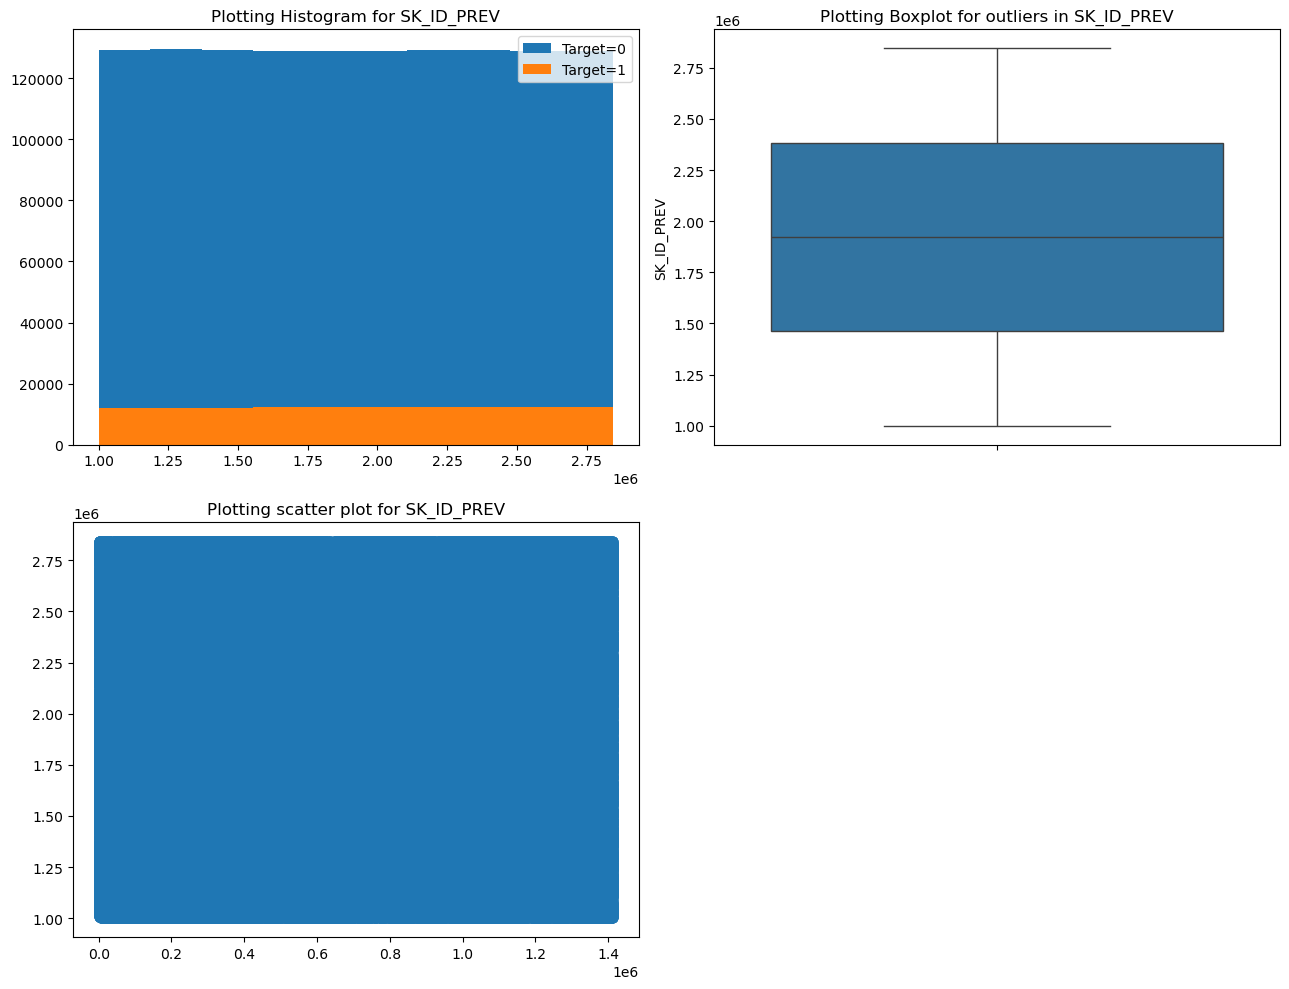



Plotting column AMT_ANNUITY_y


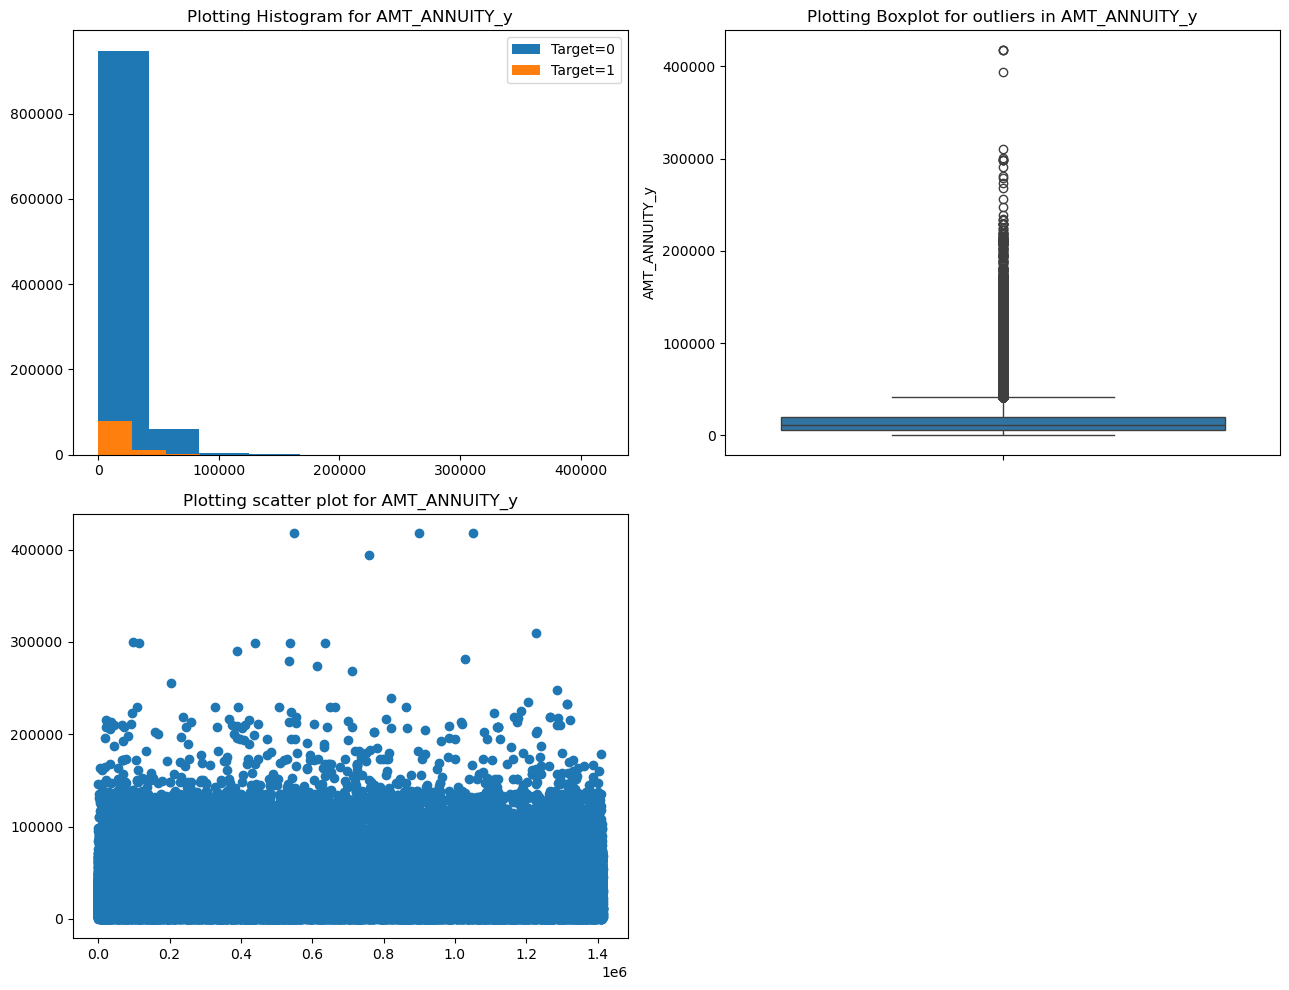



Plotting column AMT_APPLICATION


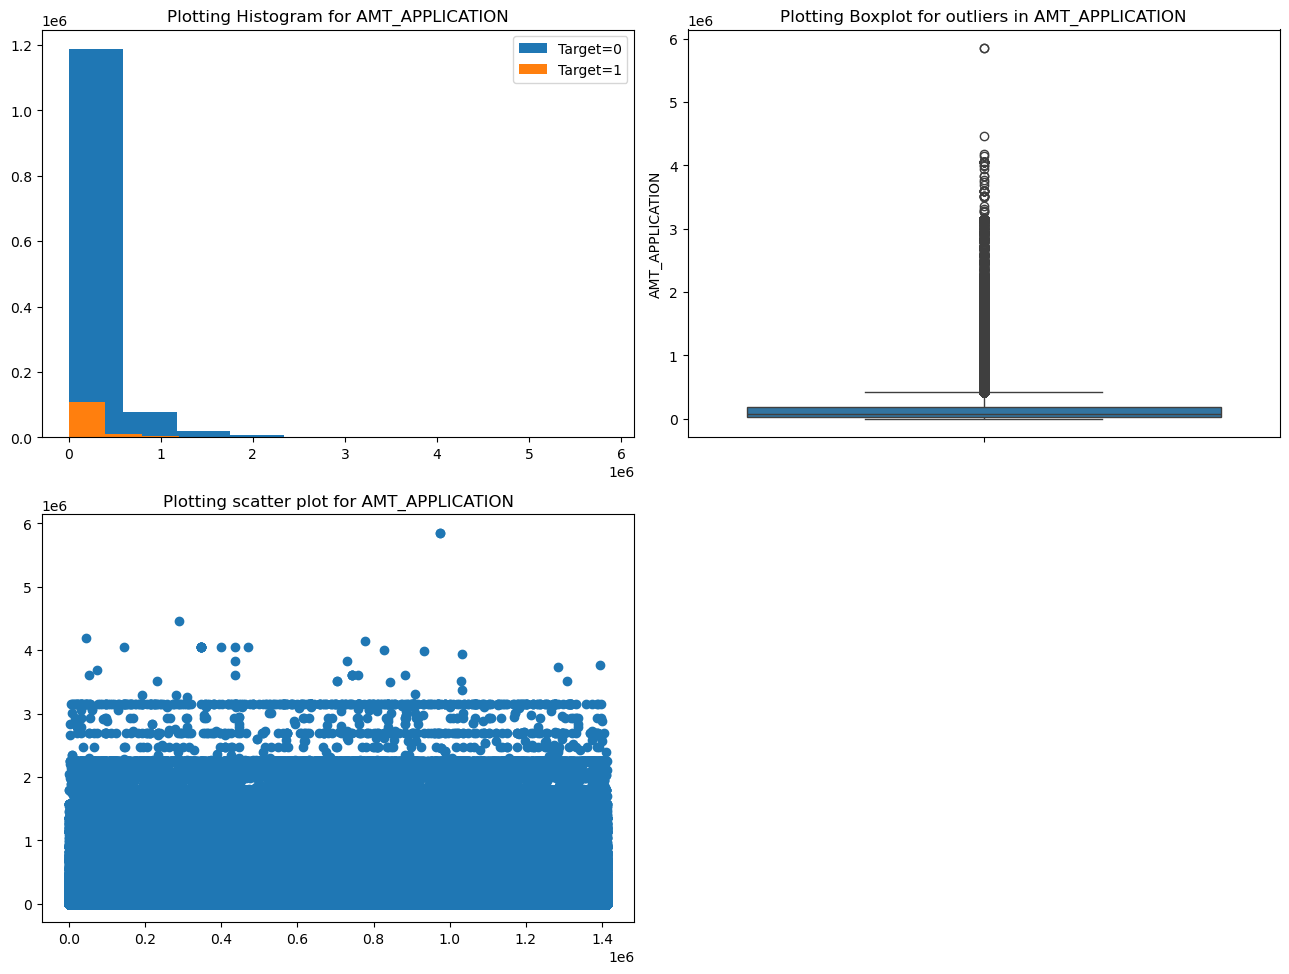



Plotting column AMT_CREDIT_y


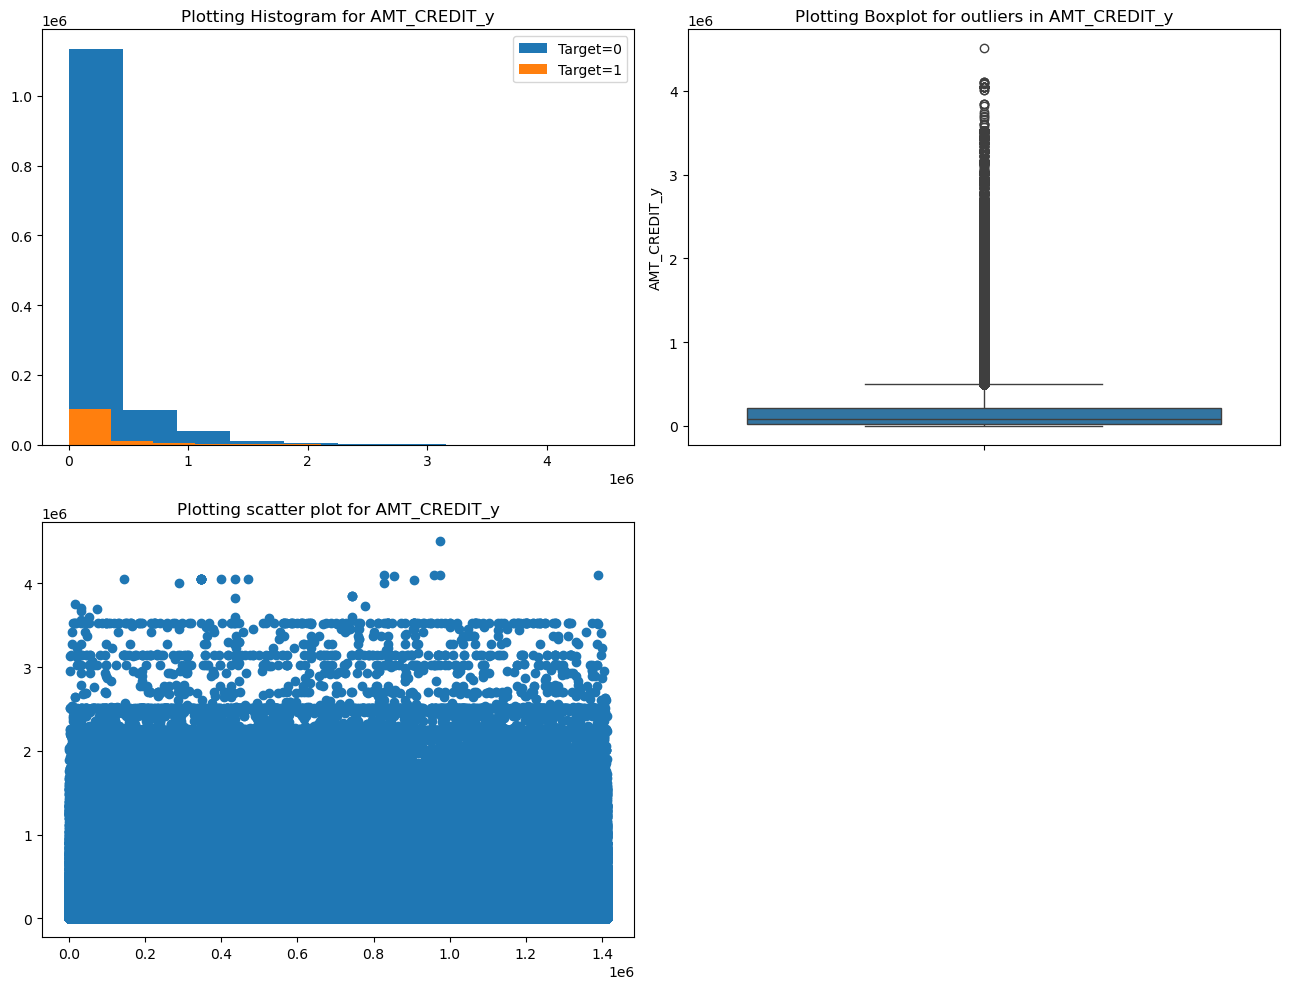



Plotting column AMT_GOODS_PRICE_y


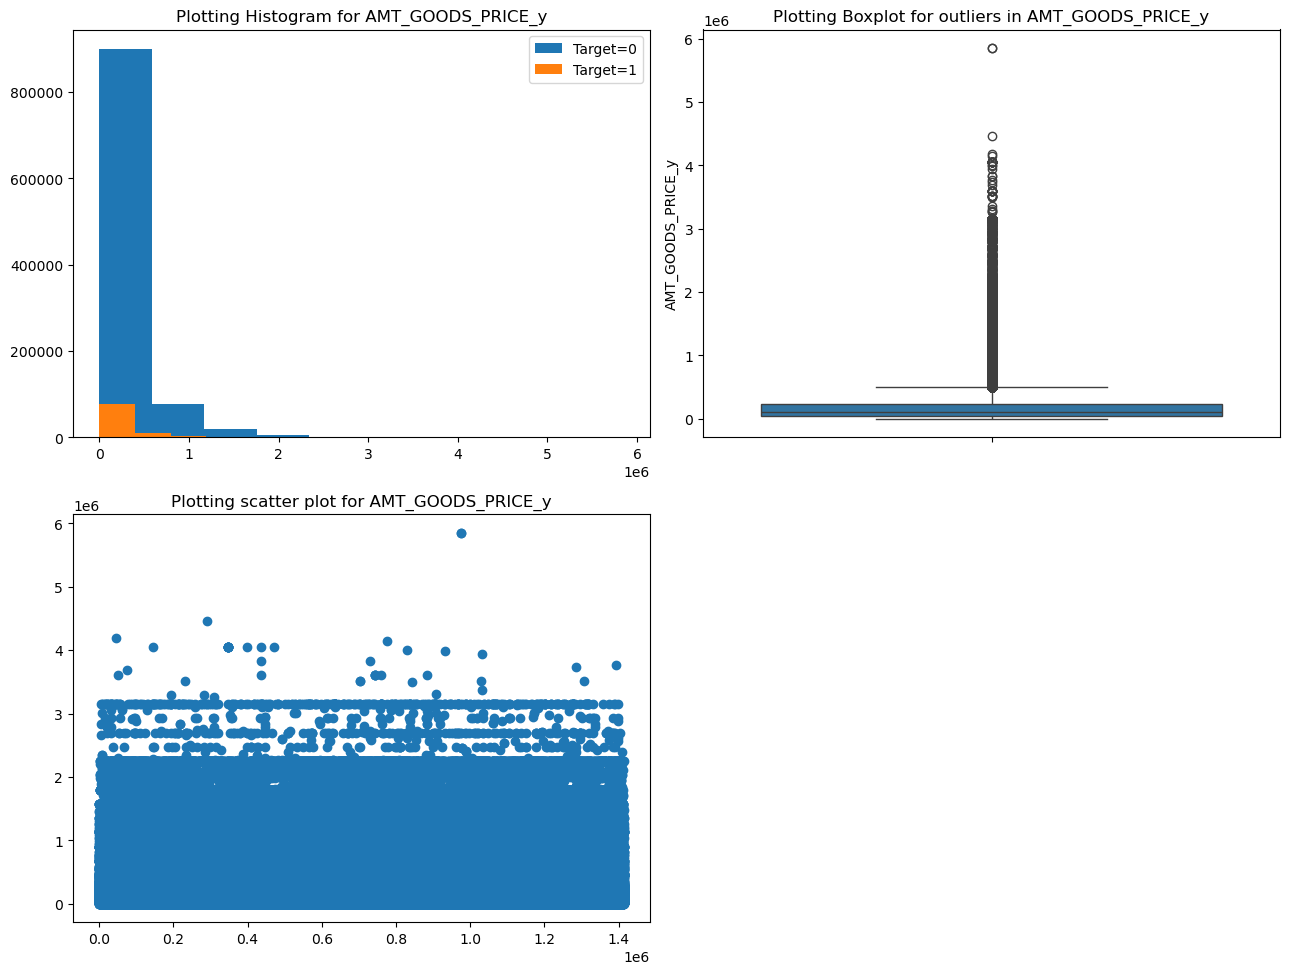



Plotting column HOUR_APPR_PROCESS_START_y


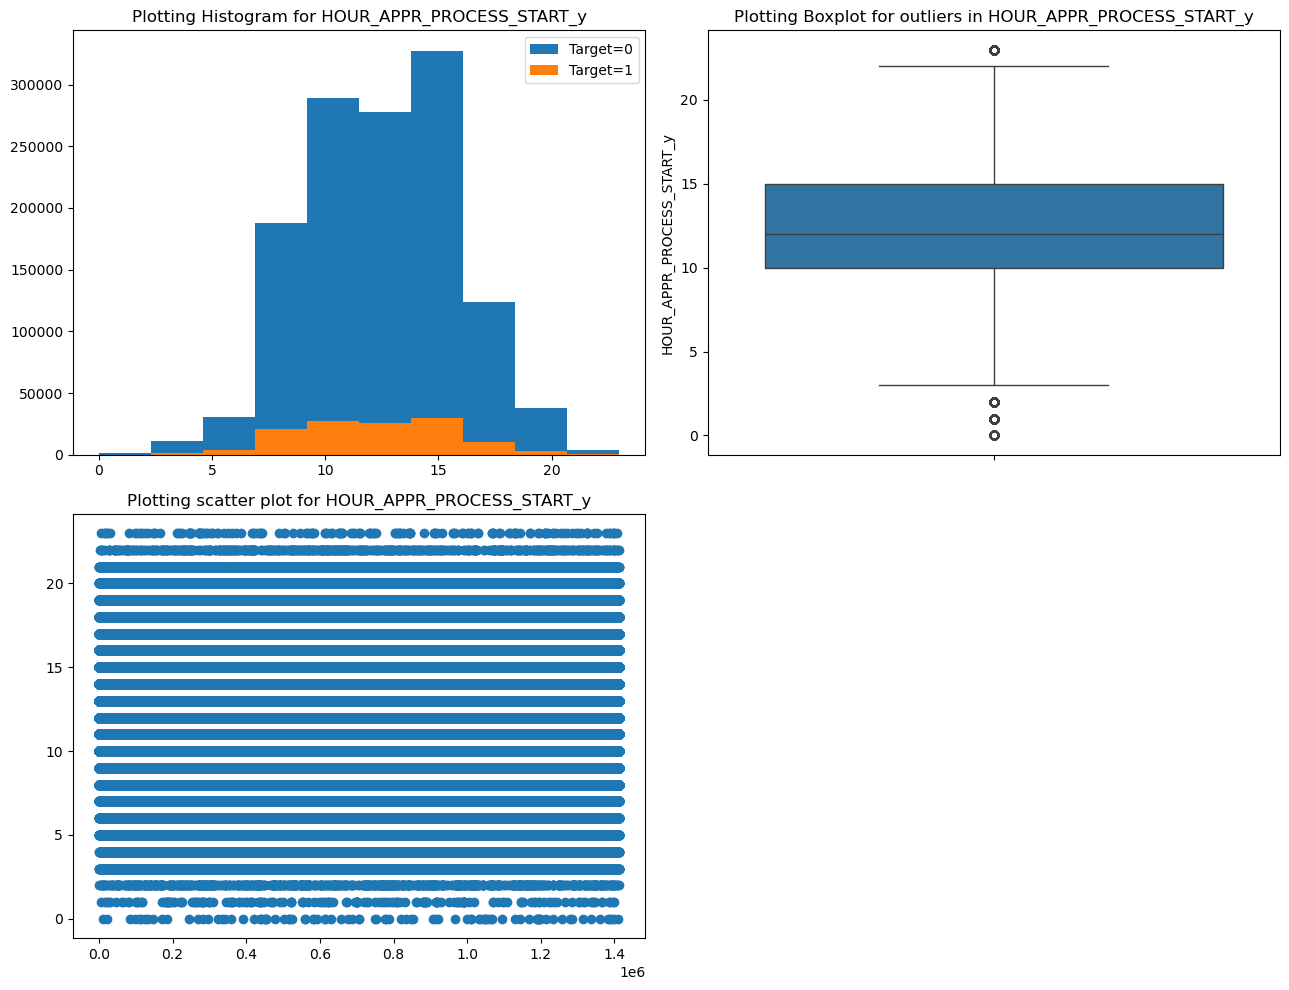



Plotting column NFLAG_LAST_APPL_IN_DAY


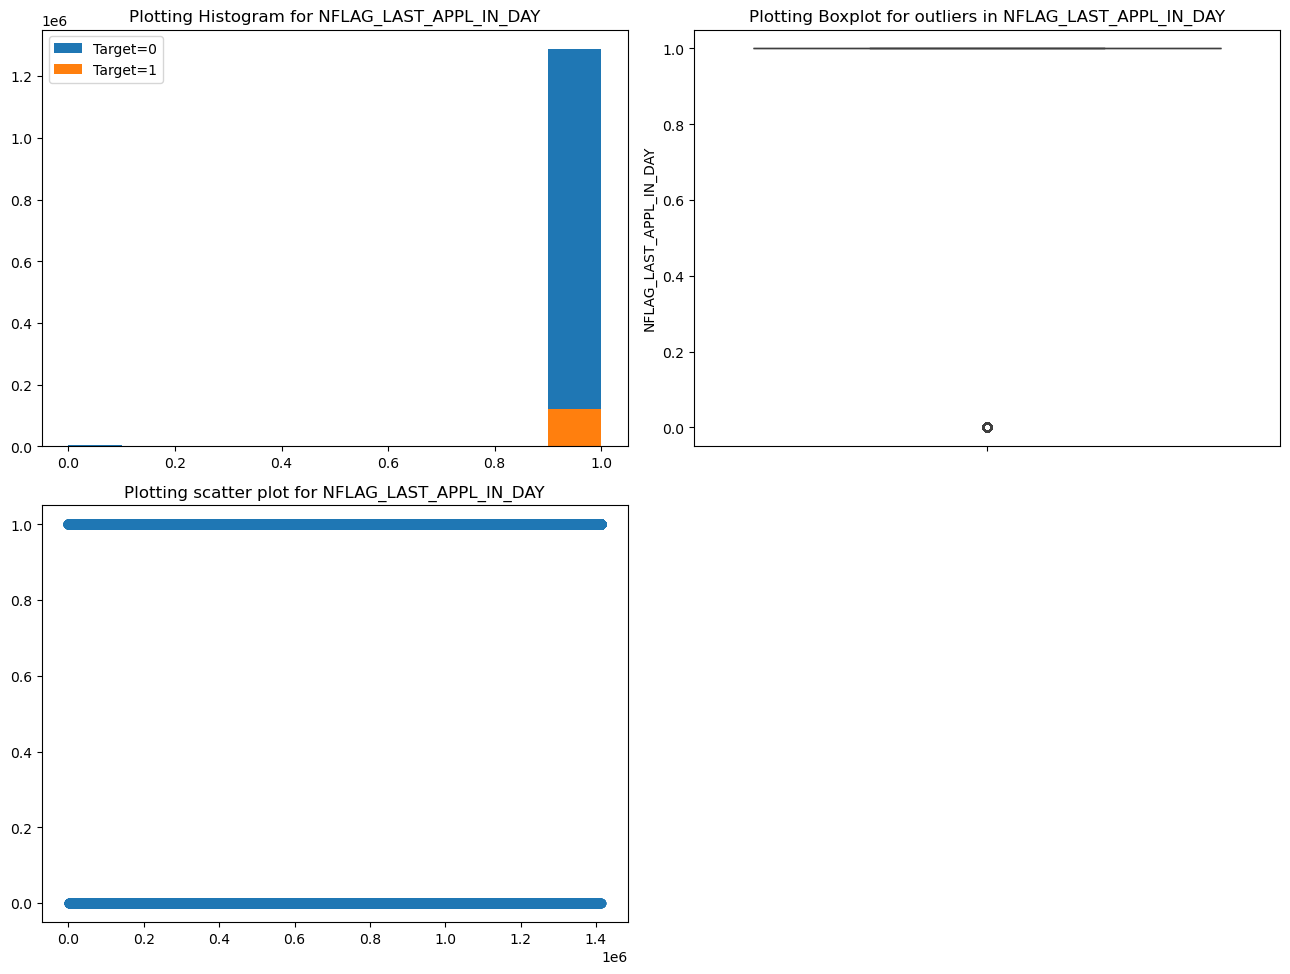



Plotting column DAYS_DECISION


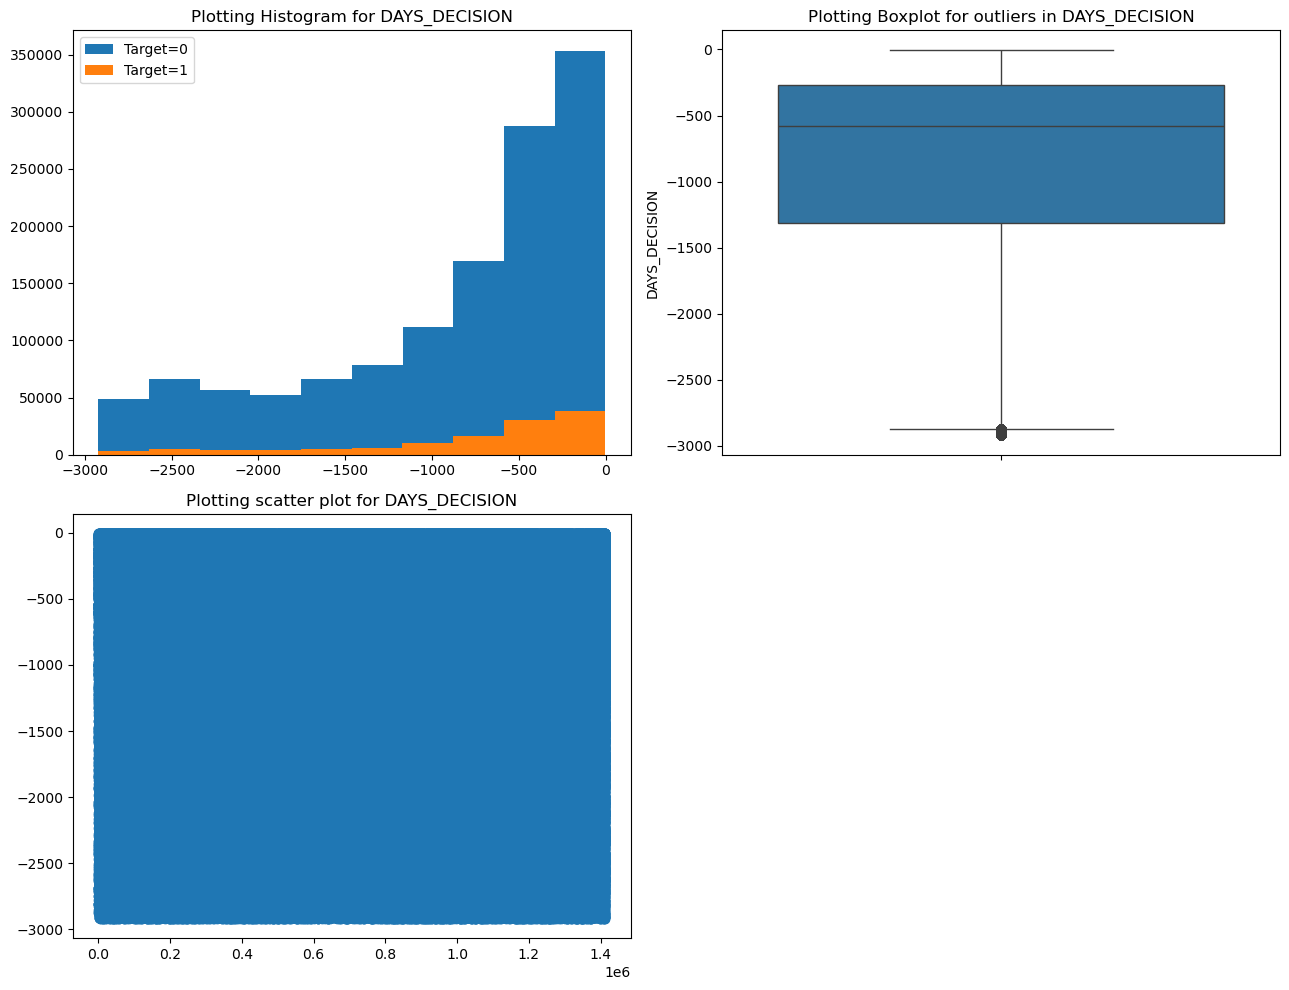



Plotting column SELLERPLACE_AREA


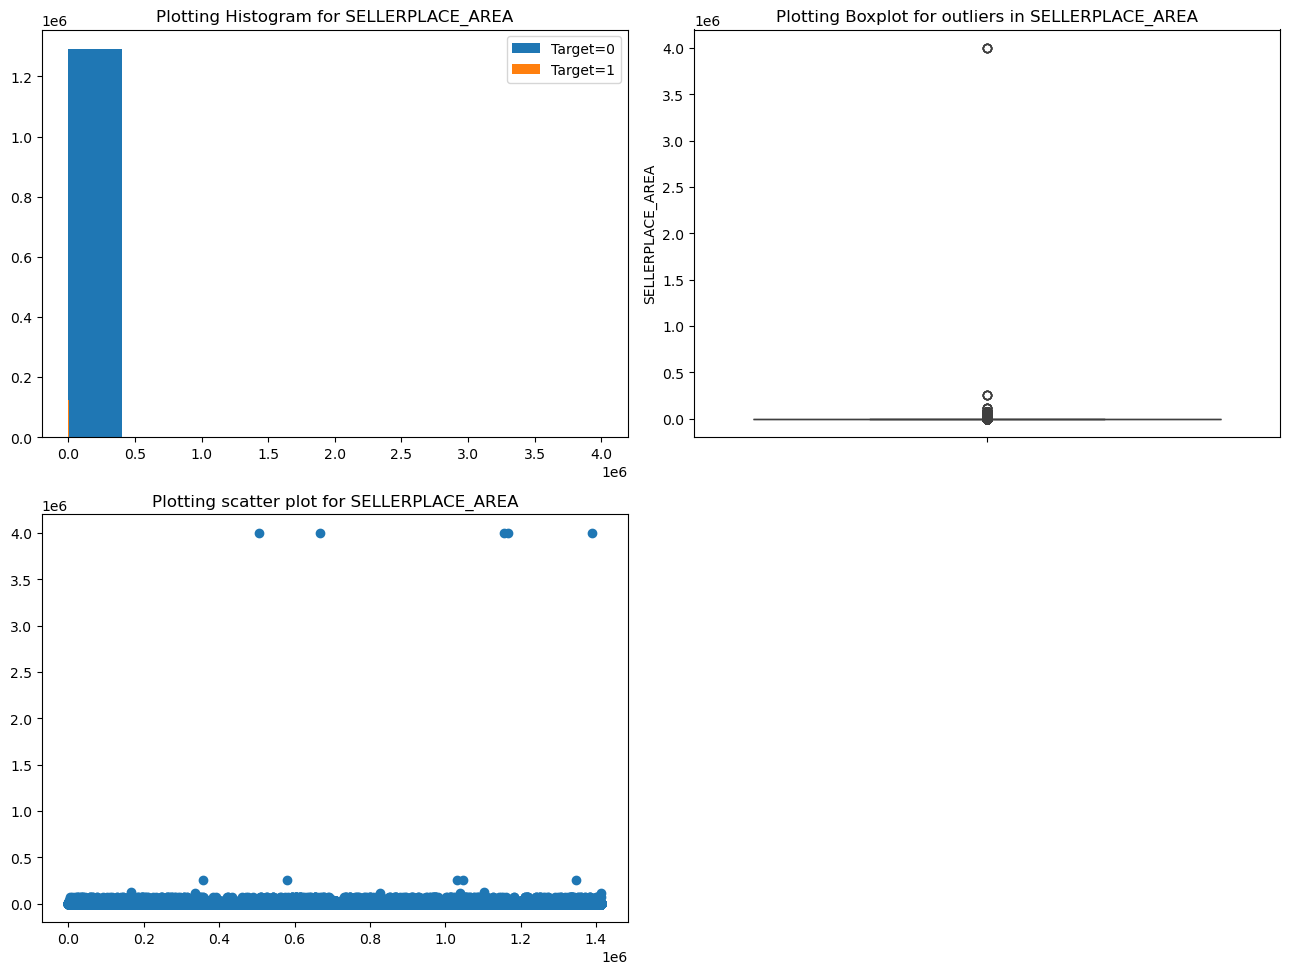



Plotting column CNT_PAYMENT


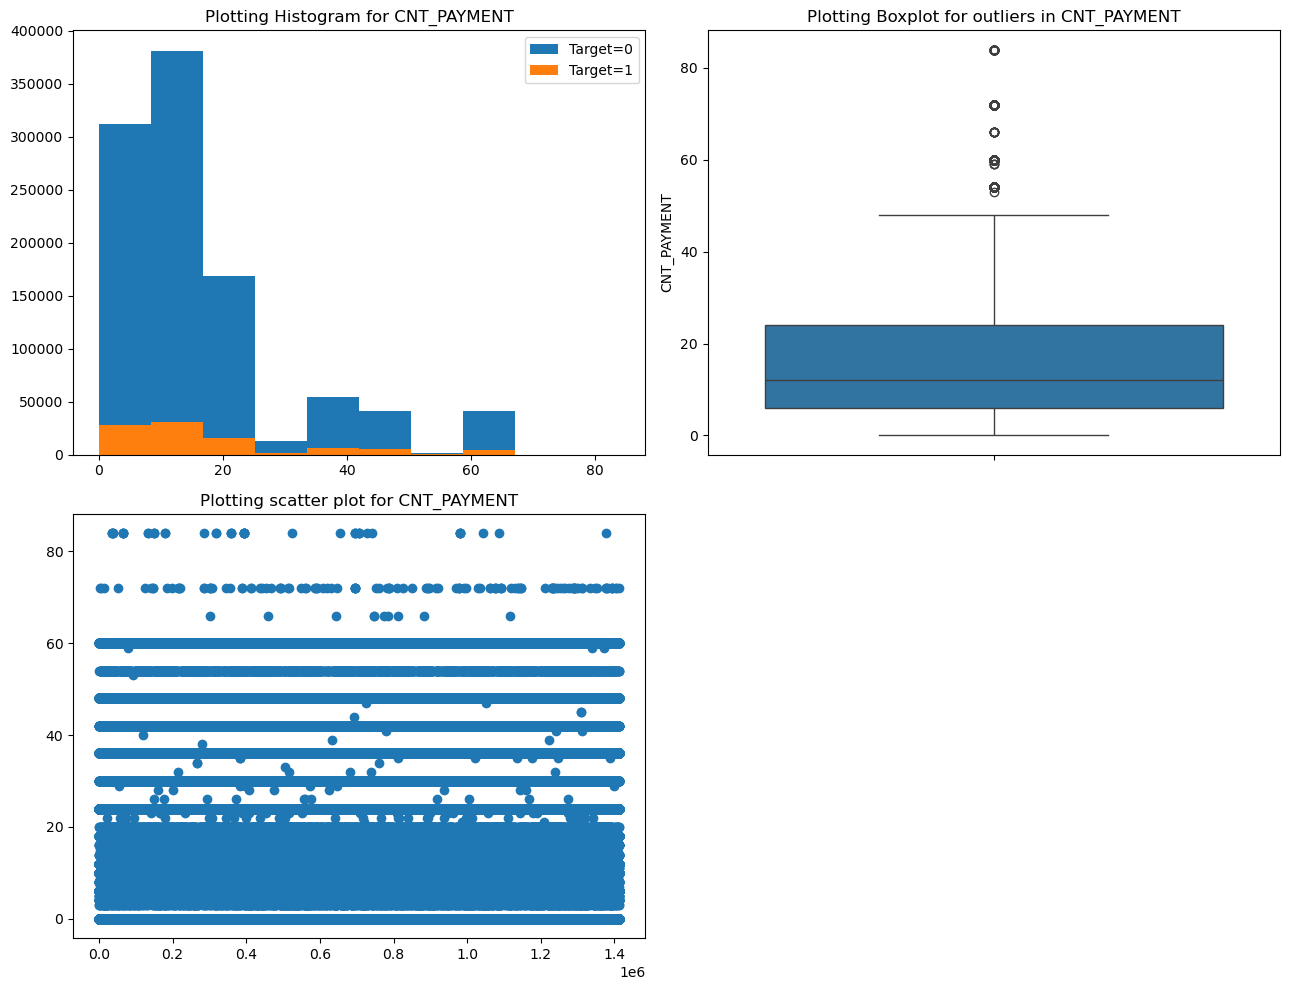



Plotting column DAYS_FIRST_DRAWING


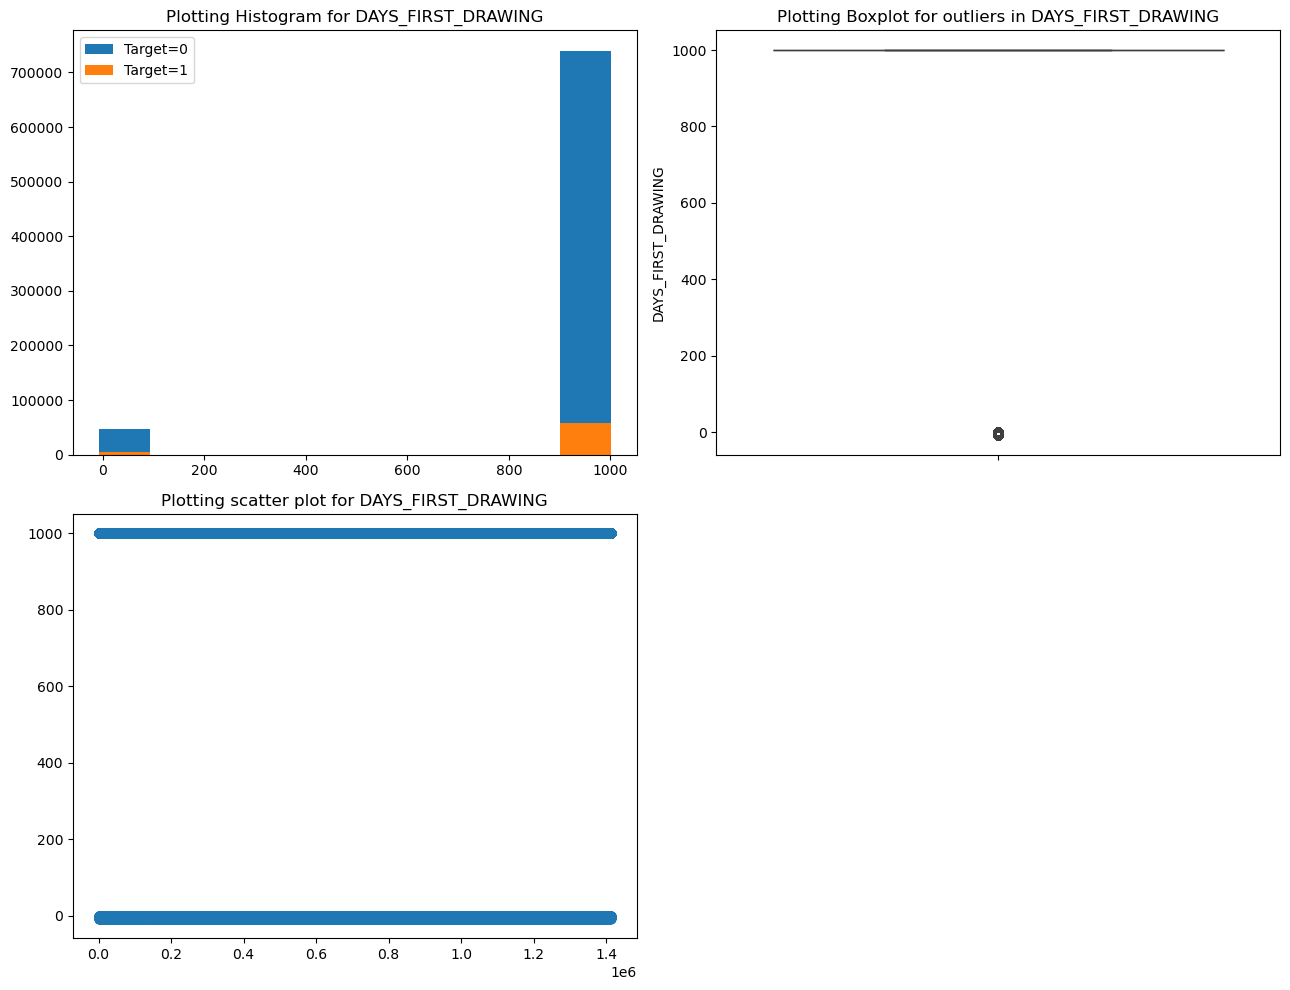



Plotting column DAYS_FIRST_DUE


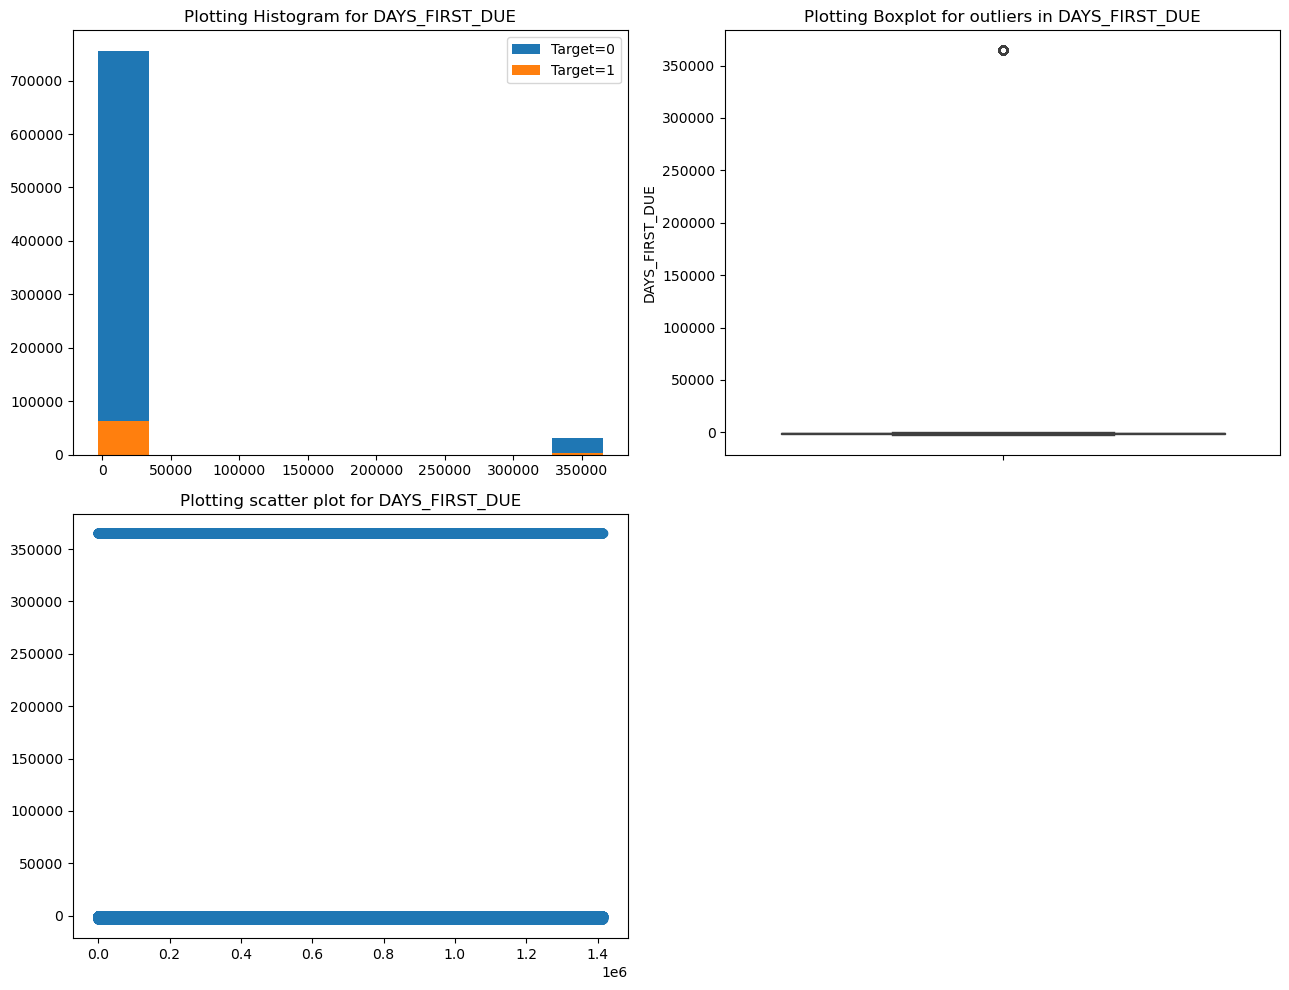



Plotting column DAYS_LAST_DUE_1ST_VERSION


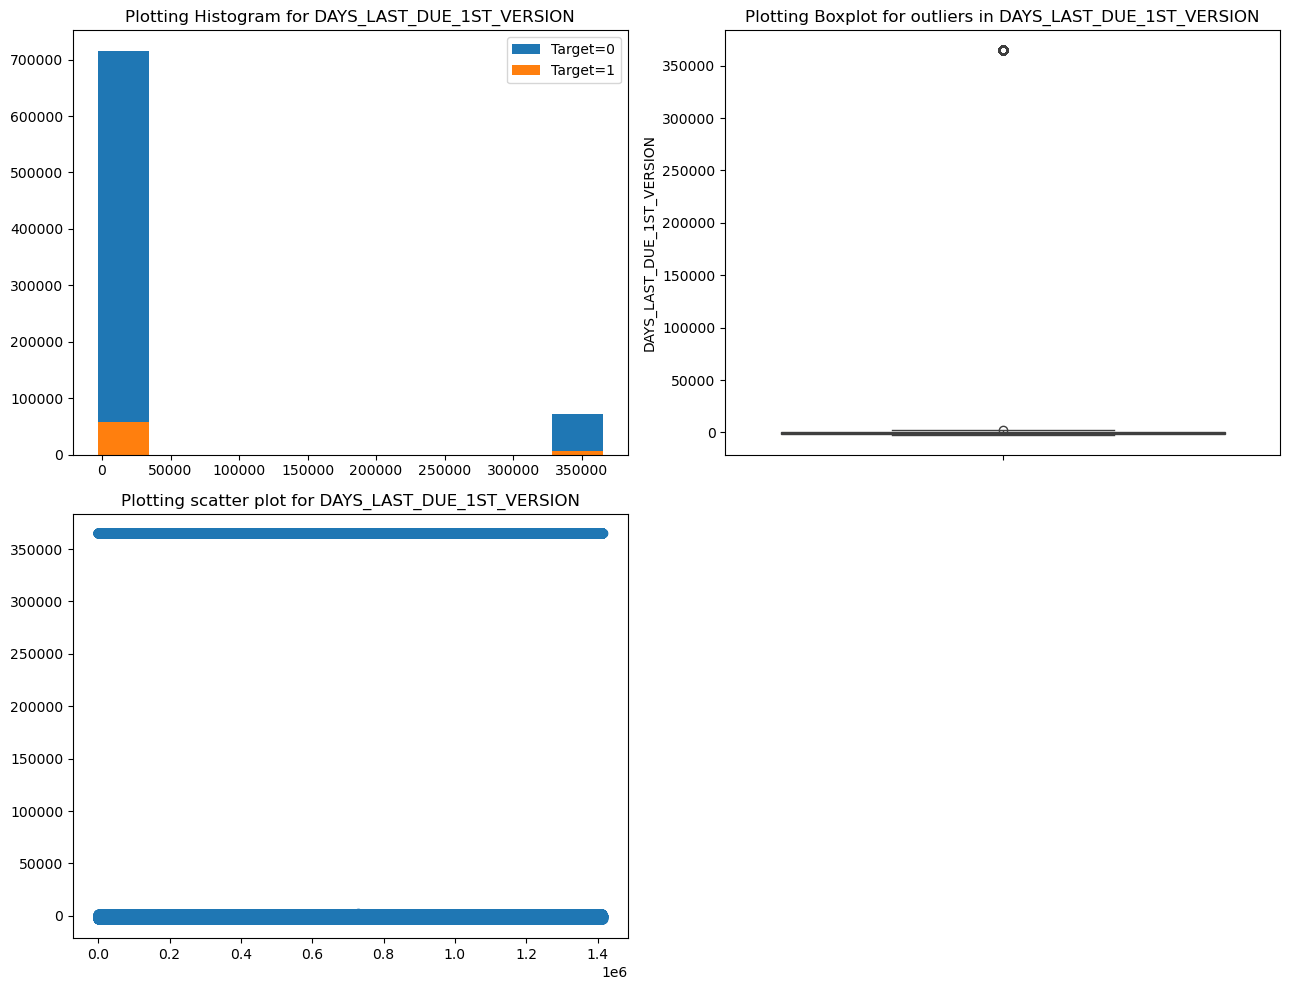



Plotting column DAYS_LAST_DUE


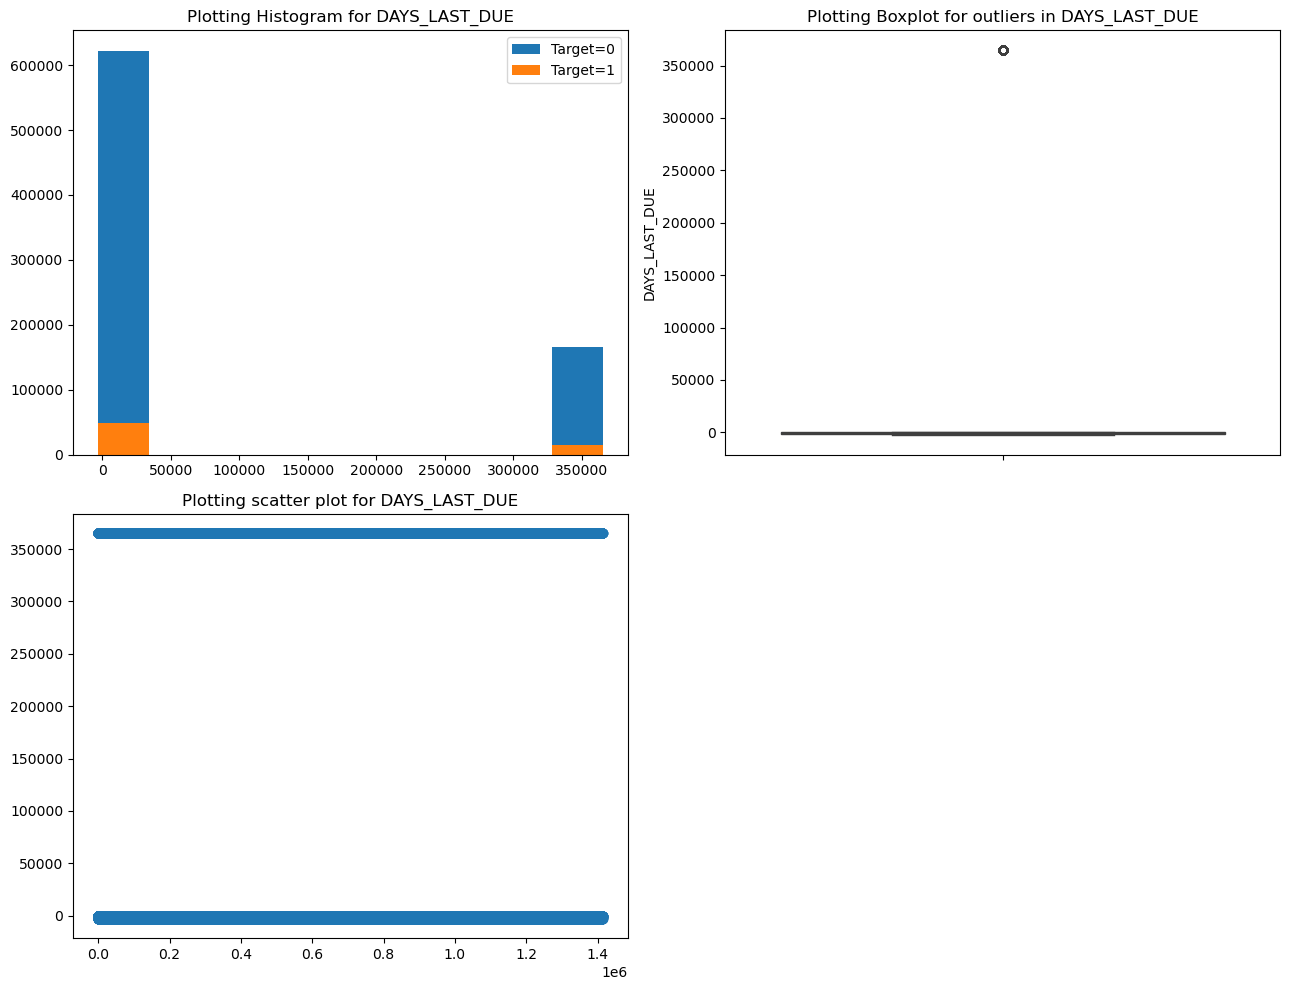



Plotting column DAYS_TERMINATION


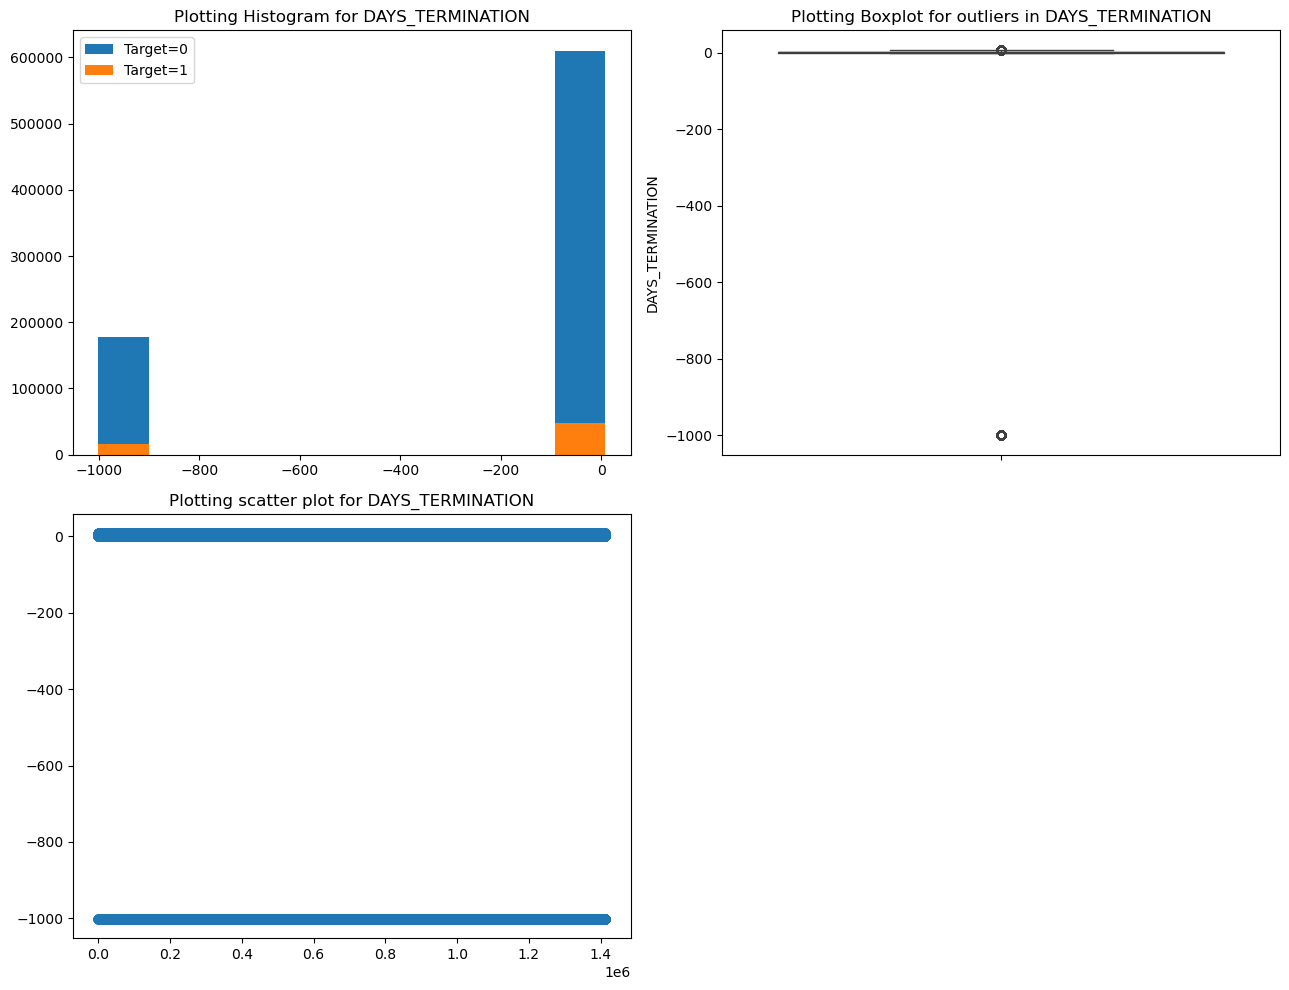



Plotting column NFLAG_INSURED_ON_APPROVAL


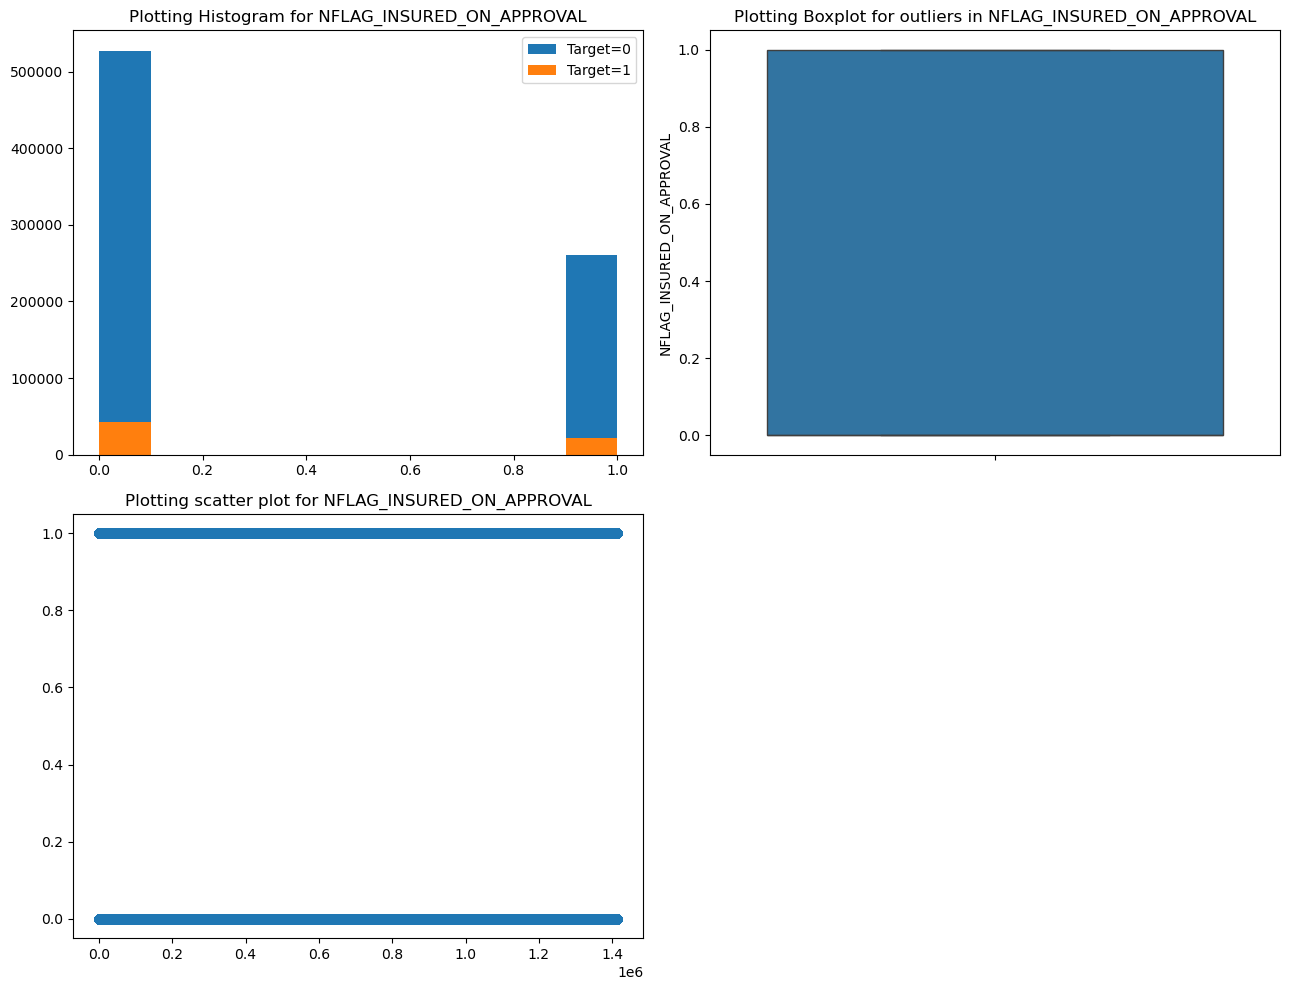

In [38]:
for column in merged_cleaned_numerical:
    # Indicates the column currently being plotted.
    print(f"Plotting column {column}")

    # Generate visualizations for the current column against the TARGET variable.
    plot_numerical(merged_cleaned,target_0,target_1, column)

    print('\n')

**Outlier** analysis depends on the business context. If the data is accurate, whether to remove extreme values is based on the business goals. After reviewing different charts, it seems the data is correctly reported. Therefore, instead of removing these extreme values, we will mark the columns that have them for further review and analysis.

**Columns that need further review include:**

CNT_CHILDREN: This indicates how many children a client has. Clients with more than 10 children are considered unusual and need closer inspection.

AMT_INCOME_TOTAL: This shows the total income of a client. A specific income value around 120 million (1.2e8) seems very far from the others, making it an outlier that might need to be removed.

FLAG_MOBILE: This tells whether a client has a mobile phone. Whether the lack of a mobile phone is an outlier should be investigated.

OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE: These columns track social behaviors and may also need further attention to understand if any values are unusual.

**The columns which seems different where both the histogram and distribution plot are different for the target = 0 and target = 1 are:**

- AMT_CREDIT:
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

#### Task-5.3 : Bivariate Analysis

In [39]:
def bivariate(target_0,target_1,column1, column2):
    fig = plt.figure(figsize=(13,10))
    
    # Subplot 1: Count plot showing the distribution of values for Target=0
    ax3 = plt.subplot(221)
    sns.countplot(x=column1, hue=column2, data=target_0)
    plt.xticks(rotation=45)
    plt.title('Distribution of values for Target=0')

    # Subplot 2: Count plot showing the distribution of values for Target=1
    ax4 = plt.subplot(222)
    sns.countplot(x=column1, hue=column2, data=target_1)
    plt.xticks(rotation=45)
    plt.title('Distribution of values for Target=1')
    
    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()

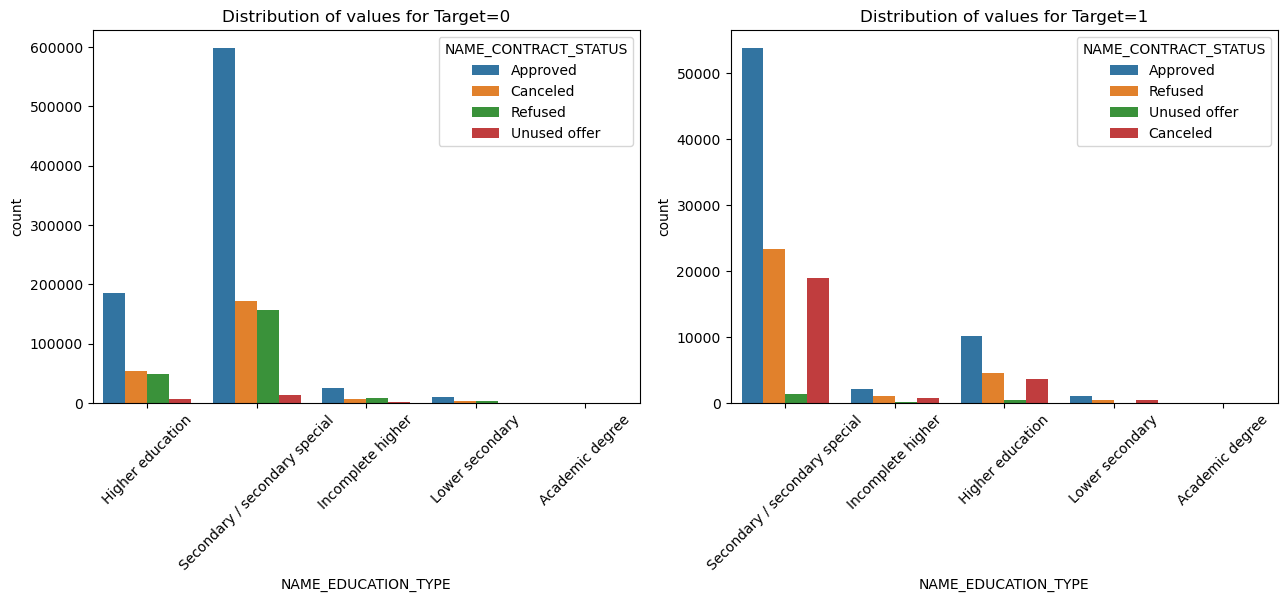

In [40]:
#observing relationship between column 'NAME_EDUCATION_TYPE' and 'NAME_CONTRACT_STATUS'
bivariate(target_0,target_1,'NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

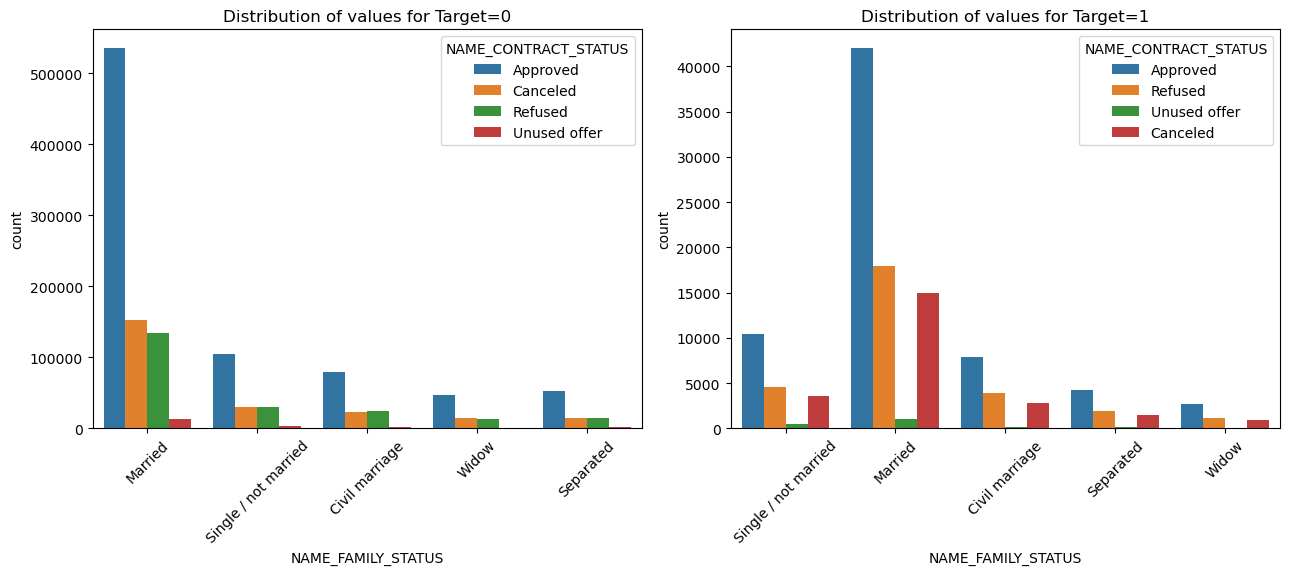

In [41]:
#observing relationship between column 'NAME_FAMILY_STATUS' and 'NAME_CONTRACT_STATUS'
bivariate(target_0,target_1,'NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

Insights:

- Most people who apply for loans have an education level of "Secondary special." These individuals not only apply for more loans but also tend to get their loans approved.
- Married people are better at repaying their loans on time compared to single people. This is evident from the data showing that married individuals have a higher rate of loan approval.

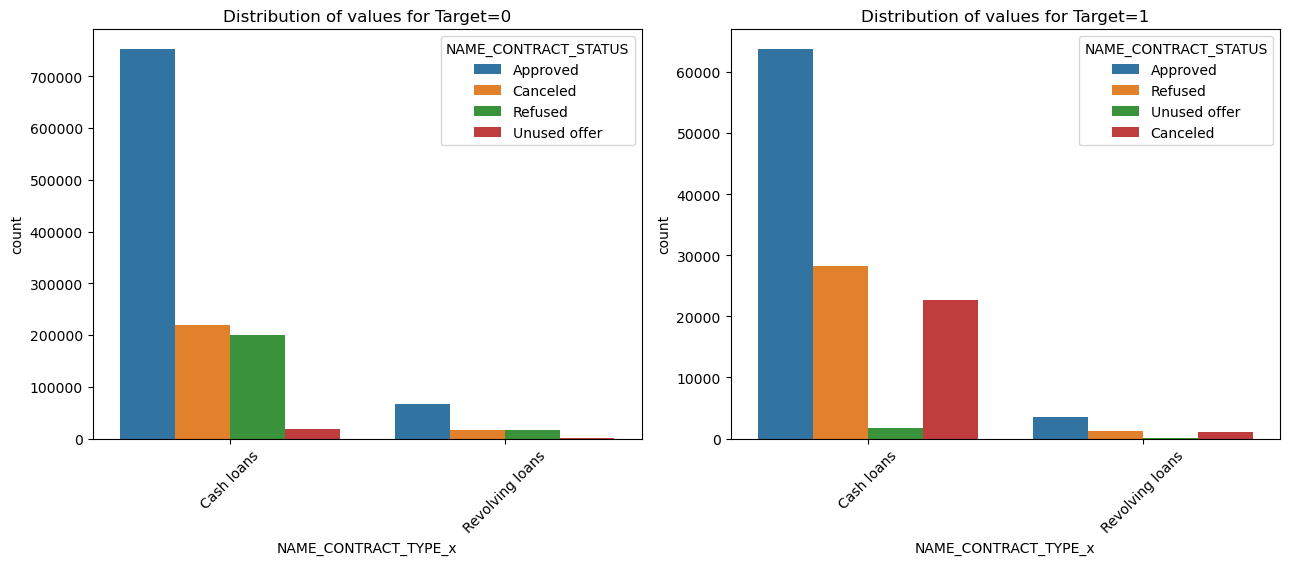

In [42]:
bivariate(target_0,target_1,'NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS')

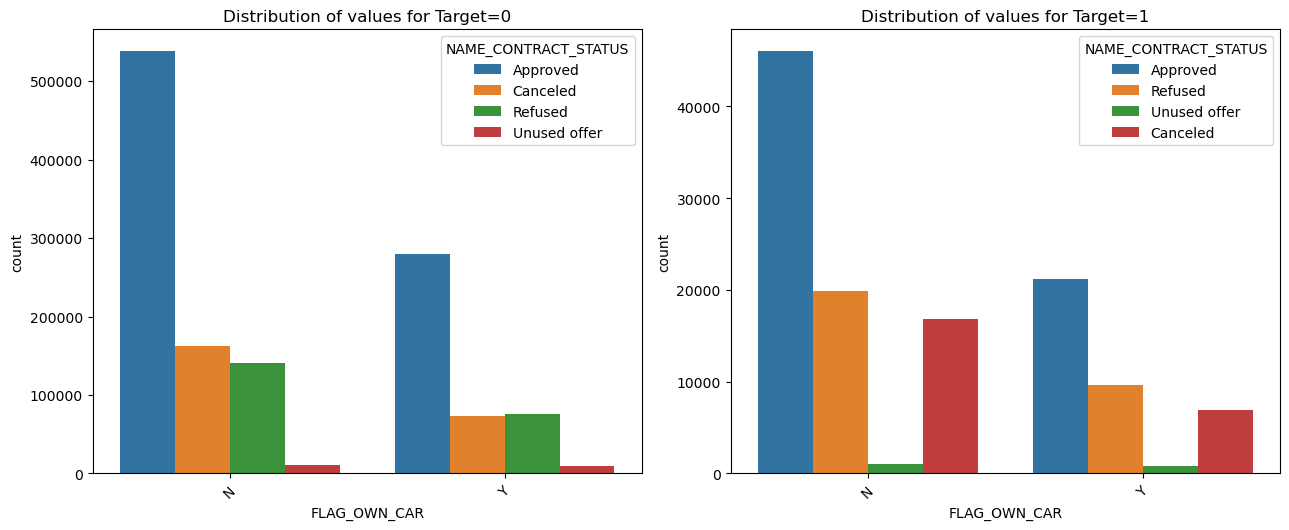

In [43]:
bivariate(target_0,target_1,'FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

Insights:

- People mostly apply for cash loans and are highly approved
- People without car are more linkely to repay loans

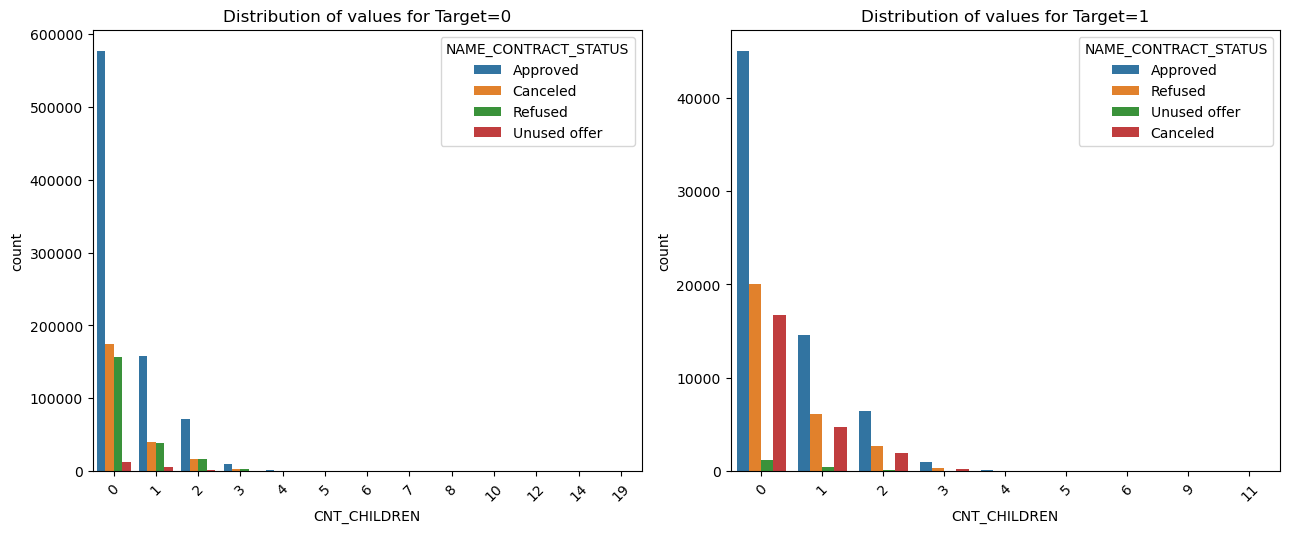

In [44]:
bivariate(target_0,target_1,'CNT_CHILDREN','NAME_CONTRACT_STATUS')

#### Task-6: Summarize the Analysis 

During this practice session, we explored the loan applicant dataset and learned some important things. We identified missing data, studied how different variables are distributed, looked at unusual values (outliers), and analyzed how different factors are related to each other.

This analysis gives us a basic understanding of the dataset and how it can be used to manage loans and assess risks. These insights can help in making better decisions, like creating models to predict loan approvals or improving loan approval rules. This can make lending practices more effective and reduce the chances of defaults.